In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [2]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
stop_list = nltk.corpus.stopwords.words('english')
# The following list is to further remove some frequent words in SGNews.
stop_list += ['would', 'said', 'say', 'year', 'day', 'also', 'first', 'last', 'one', 'two', 'people', 'told', 'new', 'could', 'singapore', 'three', 'may', 'like', 'world', 'since', 'nft', 'metaverse','fashion','amp', 
              'digital','project','nfts', 'eyesoffashion']
from nltk.stem.porter import *
stemmer = PorterStemmer()

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    #temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_list]
    #temp = [stemmer.stem(w) for w in temp]
    temp = " ".join(word for word in temp)
    return temp

# Vogue

### Get Tweets

In [2]:
print("query: voguesingapore, NFT OR metaverse, english language, not retweet, from 1 Jan 2021 to 19 Mar 2022")

vogue_tweets = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('(NFT OR metaverse) from:voguesingapore lang:en -is:retweet since:2021-01-01 until:2022-03-19').get_items()): 
    if i>2000: #number of tweets you want to scrape
        break

    #declare the attributes to be returned                                        
    vogue_tweets.append([tweet.user.username, tweet.date, tweet.id, tweet.content, 
                         tweet.likeCount, tweet.retweetCount, tweet.replyCount, tweet.quoteCount, tweet.mentionedUsers]) 

    
# Creating a dataframe from the tweets list above 
vogue_tweets_df = pd.DataFrame(vogue_tweets, columns=['Username','Datetime', 'Tweet Id', 'Text', 'Likes', 
                                                 'Retweets', 'Replies',  'Quotes', 'Mentioned'])

print(vogue_tweets_df.shape)
print(vogue_tweets_df['Username'].value_counts())

query: voguesingapore, NFT OR metaverse, english language, not retweet, from 1 Jan 2021 to 19 Mar 2022
(55, 9)
voguesingapore    55
Name: Username, dtype: int64


In [5]:
vogue_tweets_df

Username                  Datetime             Tweet Id  \
0   voguesingapore 2022-03-17 07:30:00+00:00  1504359381630169091   
1   voguesingapore 2022-03-17 07:10:00+00:00  1504354345843781633   
2   voguesingapore 2022-03-17 07:07:39+00:00  1504353756754100230   
3   voguesingapore 2022-03-17 06:51:34+00:00  1504349708843905024   
4   voguesingapore 2022-03-17 04:34:29+00:00  1504315210592845827   
5   voguesingapore 2022-03-16 13:50:09+00:00  1504092661224935426   
6   voguesingapore 2022-03-15 13:15:06+00:00  1503721450456649729   
7   voguesingapore 2022-03-15 13:10:41+00:00  1503720342036312066   
8   voguesingapore 2022-03-15 11:43:18+00:00  1503698347655569412   
9   voguesingapore 2022-03-15 10:09:39+00:00  1503674779785895941   
10  voguesingapore 2022-03-15 07:33:54+00:00  1503635587727003649   
11  voguesingapore 2022-03-15 06:26:36+00:00  1503618648178831360   
12  voguesingapore 2022-03-15 03:19:05+00:00  1503571460329115654   
13  voguesingapore 2022-03-08 09:27:39+00:00  1501127498267955200   
14  voguesingapore 2022-02-17 11:35:15+00:00  1494274240002260997   
15  voguesingapore 2022-02-10 03:34:12+00:00  1491616464822222850   
16  voguesingapore 2022-02-09 10:56:44+00:00  1491365443130785794   
17  voguesingapore 2022-02-09 08:00:02+00:00  1491320973202649089   
18  voguesingapore 2022-02-07 06:24:34+00:00  1490572172376801280   
19  voguesingapore 2022-02-07 03:41:50+00:00  1490531221381992449   
20  voguesingapore 2022-01-31 03:48:42+00:00  1487996236175376385   
21  voguesingapore 2022-01-30 13:04:43+00:00  1487773770966204425   
22  voguesingapore 2022-01-27 11:25:56+00:00  1486661748736212998   
23  voguesingapore 2022-01-25 13:42:42+00:00  1485971392403488769   
24  voguesingapore 2022-01-25 13:02:23+00:00  1485961246184996864   
25  voguesingapore 2022-01-24 02:29:08+00:00  1485439494719684608   
26  voguesingapore 2021-11-12 10:38:15+00:00  1459108271390801920   
27  voguesingapore 2021-11-12 09:20:06+00:00  1459088603171065859   
28  voguesingapore 2021-11-11 01:18:18+00:00  1458604965820178436   
29  voguesingapore 2021-11-11 00:15:12+00:00  1458589089972699142   
30  voguesingapore 2021-11-09 10:00:00+00:00  1458011481572732930   
31  voguesingapore 2021-11-09 07:00:01+00:00  1457966186117967874   
32  voguesingapore 2021-10-06 05:00:00+00:00  1445614797047963648   
33  voguesingapore 2021-09-22 01:40:00+00:00  1440491034153140232   
34  voguesingapore 2021-09-22 01:33:43+00:00  1440489454754414598   
35  voguesingapore 2021-09-22 01:00:00+00:00  1440480968222126080   
36  voguesingapore 2021-09-20 13:00:49+00:00  1439937593278222340   
37  voguesingapore 2021-09-20 08:00:01+00:00  1439861892080541702   
38  voguesingapore 2021-09-19 12:35:01+00:00  1439568714072932355   
39  voguesingapore 2021-09-19 12:17:30+00:00  1439564304806649859   
40  voguesingapore 2021-09-19 12:07:47+00:00  1439561859045101572   
41  voguesingapore 2021-09-18 04:00:00+00:00  1439076714705981441   
42  voguesingapore 2021-09-17 07:00:03+00:00  1438759637629784067   
43  voguesingapore 2021-09-17 06:00:00+00:00  1438744528027009026   
44  voguesingapore 2021-09-16 08:05:57+00:00  1438413836978032641   
45  voguesingapore 2021-09-01 10:15:00+00:00  1433010493308932101   
46  voguesingapore 2021-08-25 06:45:12+00:00  1430420979956682754   
47  voguesingapore 2021-08-24 02:00:00+00:00  1429986819823783938   
48  voguesingapore 2021-08-20 08:30:00+00:00  1428635415314149377   
49  voguesingapore 2021-08-19 11:00:01+00:00  1428310782182182916   
50  voguesingapore 2021-08-18 09:00:02+00:00  1427918196422725634   
51  voguesingapore 2021-08-18 08:21:18+00:00  1427908448453238796   
52  voguesingapore 2021-08-18 08:00:01+00:00  1427903093652344832   
53  voguesingapore 2021-08-04 02:00:00+00:00  1422739064768266245   
54  voguesingapore 2021-07-13 02:00:00+00:00  1414766531221860352   

                                                 Text  Likes  Retweets  \
0   ‘Man of the World’ features one of @AntonBelin...     18        15 

In [15]:
vogue_tweets_df.to_csv('vogue_tweets.csv')

In [7]:
vogue = vogue_tweets_df['Text'].tolist()
results = [clean_tweet(tx) for tx in vogue]
results

C:\Users\Parveen\AppData\Local\Temp/ipykernel_110556/3578061204.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['man features designs modelled animated characteristic part peace collection available sale proceeds go save children ukraine',
 'saint george defeats russian warship guniaproject depicts saint george slayer represent victory ukraine russia peace collection sale proceeds going save children ukraine',
 'antarctic expedition sees ukraine antarctic team wearing ienki ienki expedition parkas part peace collection available sale proceeds go save children ukraine',
 'x intergalactic freedom dress peace collection sees tulle dress navy gold inspired ukrainian flag available sale proceeds going save children ukraine',
 'ukrainian culture poppy symbol beauty youth goes along dna brand shares poppy peace collection proceeds go save children ukraine available sale',
 'happening soon looking forward chatting eic designers founders peace many joining chat ukraine voguefashionforpeace',
 'gunia projects artworks depict war molotov cocktails anti tank missiles part x peace collection sale live proce

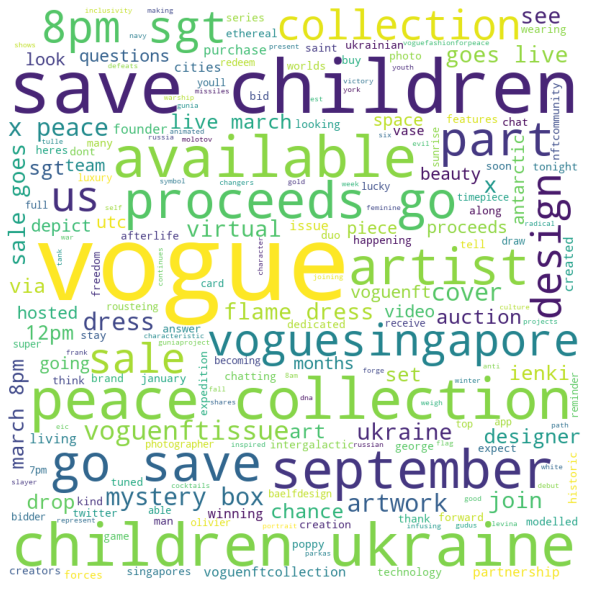

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in results:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "

# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [9]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
try1 = results
vectorizer = CountVectorizer()
try1_vecs = vectorizer.fit_transform(try1)

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names()

C:\Users\Parveen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
# Build LDA Model
try1_lda = LatentDirichletAllocation(n_components=3,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)              # use all available CPU
lda_output = try1_lda.fit_transform(try1_vecs)

In [12]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20
display_topics(try1_lda, feature_names, 20)

Topic 0:
vogue mystery artist partnership box photographer issue see looking top think heres look dont becoming forward technology kind soon voguesingapore
Topic 1:
collection ukraine vogue save sale proceeds children peace sgt september available go live dress part 8pm voguenftissue goes 20 virtual
Topic 2:
vogue drop dress voguesingapore artists flame afterlife voguenft ethereal set 12 video 2022 months box twitter sgt spaces questions chance


In [30]:
vogue_tweets_df = pd.read_csv('vogue_tweets.csv')
vogue = vogue_tweets_df['Text'].tolist()
results = [clean_tweet(tx) for tx in vogue]
#results

C:\Users\Parveen\AppData\Local\Temp/ipykernel_118536/4232908300.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


In [32]:
len(results)

55

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

In [70]:
df_v = pd.DataFrame()
for x in range(len(results)):
    #text_object = NRCLex(clean_text(try1[x]))
    text = results[x]
    score = vds.polarity_scores(text)
    analysis = TextBlob(sentence).sentiment.polarity
    if analysis < 0:
        check = 'neg'
    elif analysis == 0:
        check = 'neu'
    else:
        check = 'pos'
    compound = score['compound']
    if "compound" in score:
        score.pop("compound")
    max_value = max(score, key=score.get)
    if max_value != check:
        print( analysis, check, max_value, score, results[x])
    #print(data)
    #average = sum(data.values()) / len(data.values())
    #if data[max_value] - 7 >= average:
        #list1.append(max_value)
    dict = {'Label': max_value,'Text': results[x], 'Compound': compound }
    df_v = df_v.append(dict, ignore_index = True)

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} virtual spaces expanding beyond games roblox even identify gaming platform upcoming week many brands selling physical versions designs gucci adidas ar
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} shiba inu launch collection british designer john richmond shib shibarmy cryptocurrency cryptonews crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week tommy hilfiger dolce gabbana selfridges blockchain based virtual decentraland announced launch week scheduled take place march 24 27 2022
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} set reminder upcoming space learn speak dev team spaceshost twitterspaces womeninnfts dressmaking
0.5 pos neu {'neg': 0.254, 'neu': 0.622, 'pos': 0.124} happening hype drop series contemporary illustrator fran ois berthoud collaboration x mad xr x foundation sozzani accepting offers
0.5 pos neu {'neg': 0.0, 'neu': 0.754, 'pos': 0.246} apien join biggest movement today 8pm est discuss

0.5 pos neu {'neg': 0.087, 'neu': 0.615, 'pos': 0.298} sol wl giveaway goomies house prizes 05 sol 3x wl enter 1 follow 2 rt 3 tag 3 friends 24 hrs 4 winners discord nftgiveaway nftcommunity solana solanagiveaway
0.5 pos neu {'neg': 0.0, 'neu': 0.906, 'pos': 0.094} mogul ready make move buying 2 million virtual land man behind 2 million land purchase announces plans show big name labels kicks next month major push bring
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 2nd draft wip nftcommunity crypto art
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} changing
0.5 pos neu {'neg': 0.0, 'neu': 0.684, 'pos': 0.316} behold beautiful illustration collection meanwhile company buys looks automatically possess right designs create click nftfashion
0.5 pos neu {'neg': 0.204, 'neu': 0.665, 'pos': 0.131} guess stock trading ban theyve gotta make dirty money old way drop solana address free wallstreetbets crypto stocks gme themed join community sale 12 mar 2022 01 00 00 gmt nftdrop nftcommunity 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} manifest reality via voice w builder bot visit mvfw week buy earn exportable game money
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} manifest reality via voice w builder bot visit mvfw week buy earn exportable game money
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} manifest reality via voice w builder bot visit mvfw week buy earn exportable game money
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} established hotbed wearable design host four days runway shows experiences pop shops afterparties media release virtualreality
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland blockchain based virtual announced start week take place march 24 27 2022 decentraland tommyhilfiger dolcegabbana selfridges fashionweek blockchain virtualworld
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dolce gabbana milano week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} paco rabanne g etro appear week mvfw2022 metaversenft via
0.5 pos 

0.5 pos neu {'neg': 0.092, 'neu': 0.532, 'pos': 0.376} ok lets go art holders need turn traits physical clothes distribute influencers display bodies beautiful totally disruptive best woc
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} lt lt horse collection gate gt gt horses hair styler cheval veux arranging 10th hair show models static standing sitting halloween themed club nftart
0.5 pos neu {'neg': 0.092, 'neu': 0.532, 'pos': 0.376} ok lets go art holders need turn traits physical clothes distribute influencers display bodies beautiful totally disruptive best woc
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} please excuse dusty laptop sending productive vibes evening working next youtube video video getting back portrait photography cold shot photos
0.5 pos neu {'neg': 0.0, 'neu': 0.57, 'pos': 0.43} brain fried tech tweets suddenly interested meta vogue membership im interested surely cannot afford
0.5 pos neu {'neg': 0.0, 'neu': 0.781, 'pos': 0.219} us 100 customizable h

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} guy got africansinukraine trending somehow connected dont really know know isnt connected ukraine directly isnt ground set link night collect money currently live stream
0.5 pos neu {'neg': 0.174, 'neu': 0.679, 'pos': 0.147} case point seen talking irony biggest emerging market ethdenver looked aesthetically underwhelming disgusting know cuz hardly women give looks get lmao
0.5 pos neu {'neg': 0.0, 'neu': 0.864, 'pos': 0.136} wearing biggest trend 2022 deep dive read brands creating space including apparel web 3 brand nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} hello designer stylist entering love talk looking
0.5 pos neu {'neg': 0.0, 'neu': 0.824, 'pos': 0.176} dolcegabbana inspired preparing trend setting virtual designers managed translate fantasy style avatars parallel worlds clothes fashionweek
0.5 pos neu {'neg': 0.13, 'neu': 0.758, 'pos': 0.112} n fungible gateway gaming brands team includes president riot ga

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future bizassetinsights bacdaily bizadigitalasset bizaltercapital businessasset
0.5 pos neu {'neg': 0.0, 'neu': 0.723, 'pos': 0.277} dolce gabbana embrace milan week milan week
0.5 pos neu {'neg': 0.0, 'neu': 0.753, 'pos': 0.247} investment objective needs take long term perspective iconic piece retain value 10 years value always unknowable real value still future buy fast something dont understand
0.5 pos neu {'neg': 0.0, 'neu': 0.892, 'pos': 0.108} decentraland hosting week mvfw 24 27 march 2022 industry looking forward event overall experience virtual week huge scale metaversefashion metaversefashionweek
0.5 pos neu {'neg': 0.0, 'neu': 0.722, 'pos': 0.278} smart glimpse walk meta technology trendcyborg sweden dailynews
0.5 pos neu {'neg': 0.118, 'neu': 0.482, 'pos': 0.399} sunday discover beautiful early fashionable hype welcome join discord info nftcollector nftcommunity terraluna bayc doodles
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'po

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} place
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mystical future home creators magic handz 1000 unique handmade pieces series running polygon nftcommunity nftshill nftcollector nftcollectors nftart polygon openseanft
0.5 pos neu {'neg': 0.09, 'neu': 0.678, 'pos': 0.232} vegan follow fashions great voice miss character toon eilish influentialcreatures 0 05 eth nftcommunity nftcollector
0.5 pos neu {'neg': 0.117, 'neu': 0.556, 'pos': 0.328} amazement shall shared soon ct gonna drop little brynnie bear chain web3 wearable
0.5 pos neu {'neg': 0.0, 'neu': 0.751, 'pos': 0.249} tech startup creating matchmaking mobile app gamers find friends virtual studio wearable avatars marketplace cosmetics game items partnered
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} imagine show luxury suits high end streetwear hoodies pins zippers etc stand runway guessed
0.5 pos neu {'neg': 0.0, 'neu'

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} subtle eye movements character streetwear details peeping moving city skyline back whole story going point
0.5 pos neu {'neg': 0.13, 'neu': 0.87, 'pos': 0.0} today announced angle round bid et al leading possesses land low poly fashions might colorful
0.5 pos neu {'neg': 0.0, 'neu': 0.752, 'pos': 0.248} amazing start seeing biggest companies coming revolutionary products pushing boundaries quality creativeness 3d art ago pixels ruled space couldnt imagine luxury company
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} podcast future blockchain crypto cryptocurrencies cryptocurrency cryptocurrencynews cryptonews cryptos
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dj snake travis scott stylist joined mbappe kimpembe verratti wijnaldum bernat herrera allan saint maximin draxler joined collaboration paris saint germain nftart nftcommunity nftcollectors football soccer
0.5 pos neu {'neg': 0.0, 'neu': 0.926, 'pos': 0.074} jigen native sta

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week tommy hilfiger dolce gabbana selfridges
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} editorial hub spotlight mirl hilary
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} italian luxury house dolce gabbana aka g expanding non fungible token collection via ongoing partnership polyg read
0.5 pos neu {'neg': 0.0, 'neu': 0.532, 'pos': 0.468} ok joke gonna put sana photo next
0.5 pos neu {'neg': 0.0, 'neu': 0.948, 'pos': 0.052} hunimal 15 type hunimal background green dna capybara human naked hair flat top style hip hop need purchase matic check network bidding starts sunday 12 00pm jst japan saturday 10 00pm est york nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} seems pink fur holy smokes snipes made toonstothemoon
0.5 pos neu {'neg': 0.141, 'neu': 0.604, 'pos': 0.255} mega drop read amazing efforts team taken towards launch nftgiveaway nftdrop


0.5 pos neu {'neg': 0.0, 'neu': 0.656, 'pos': 0.344} 3 artist already well known pooh shiesty album cover posted complex thugger piece ties music goes hand hand hype culture came space gave everyone chance
0.5 pos neu {'neg': 0.0, 'neu': 0.846, 'pos': 0.154} future rising popularity industry turns global empire involving major luxury brands retail consumers ourtesy kat taylor cattytay di
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} x next market
0.5 pos neu {'neg': 0.238, 'neu': 0.53, 'pos': 0.232} everything conceivable displays wars peace needed putin putinasesino ukraine ukraineinvasion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} show
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week tommy hilfiger dolce gabbana selfridges
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos n

0.5 pos neu {'neg': 0.0, 'neu': 0.652, 'pos': 0.348} executives promote masses helping newly emerged industry next big thing space
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} notable names already made splash concept virtual clothing evolve adoption grows
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future cryptonews crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 0.577, 'pos': 0.423} gm ga gn future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} technology meta markzuckerberg future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 p

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week tommy hilfiger dolce gabbana selfridges blockchain
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check fading jm photography23 via nftcollection nftcollector nftdrop nftart art cryptocurrency
0.5 pos neu {'neg': 0.0, 'neu': 0.551, 'pos': 0.449} altava good altava ootd altava coming true possible louisvuitton
0.5 pos neu {'neg': 0.0, 'neu': 0.612, 'pos': 0.388} altava ootd altava coming true brand possible hope fendi collaborate altava
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week tommy hilfiger dolce gabbana selfridges
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.596, 'pos': 0.404} virtual booth showcased perfect corp vision ai ar powered beauty tech solutions transforming brands connect consumers within 11 jan 2022 08 00 00 solutions
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week 

0.5 pos neu {'neg': 0.0, 'neu': 0.682, 'pos': 0.318} lacking look apes literally best seen far eth x godz genz
0.5 pos neu {'neg': 0.0, 'neu': 0.772, 'pos': 0.228} blvck 5 blvcklist giveaway blvck black meets boundaries creativity limitless fav brand making enter rt follow tag 5 frens every tag extra entry
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} ootd altava altava coming true possible
0.5 pos neu {'neg': 0.0, 'neu': 0.759, 'pos': 0.241} ceo buys 2 million worth land decentraland investment
0.5 pos neu {'neg': 0.0, 'neu': 0.889, 'pos': 0.111} season 1 376 1 1 co created rise shine ether poderis pants studio need high put avatar latest drip got
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} friday blog nattie features unique style flickr virtualworlds virtualreality augmentedreality
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} lt lt horse collection gate gt gt horses hair styler cheval veux arranging 10th hair show models static standing sitting halloween themed club

0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} altava ootd altava coming true possible wanna collaborate burberry
0.5 pos neu {'neg': 0.0, 'neu': 0.551, 'pos': 0.449} picture squid game star cfda awards case anybody interested
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} favorite street brand stussy wear whatever want altava coming true possible want collaborate stussy altava ootd
0.5 pos neu {'neg': 0.302, 'neu': 0.698, 'pos': 0.0} vs tiktok real fight begins analytics insight
0.5 pos neu {'neg': 0.302, 'neu': 0.698, 'pos': 0.0} vs tiktok real fight begins analytics insight
0.5 pos neu {'neg': 0.302, 'neu': 0.698, 'pos': 0.0} vs tiktok real fight begins analytics insight
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland announce brands participating week coin coin n
0.5 pos neu {'neg': 0.0, 'neu': 0.749, 'pos': 0.251} altava coming true possible altavas useful application allows dress character advance select clothes using todays outfit combination ootd today

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} smurf decentraland announce brands participating week
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} altava ootd altava coming true possible ootd prada gucci
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} work published raine magazine downloading magazine learn 3dart clo3d itsclo3d magazine clothingbrand nftcommunity nftfriends
0.5 pos neu {'neg': 0.139, 'neu': 0.464, 'pos': 0.397} revealing goat goat couture collection inspired greatest minds name goat inspired drop comment tag 3 friends follow randomly selecting 10 discord access goat
0.5 pos neu {'neg': 0.0, 'neu': 0.745, 'pos': 0.255} altava ootd altava coming true possible chanel want collaboration altava x chanel chanel released buy
0.5 pos neu {'neg': 0.124, 'neu': 0.876, 'pos': 0.0} time unleash beast long craved 3d high finally unleashed discord link nftart nftcommunity nftcollection nftmarketplace nftprojects web3 nftshill nftartist nftdrops
0.5 pos neu {'neg': 0.0, 'ne

0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} altava coming true possible versace gucci armani altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ftx moves 300 billion luxury industry hire currencytimes bitcoin solana nftart larvaapes opensea
0.5 pos neu {'neg': 0.0, 'neu': 0.556, 'pos': 0.444} dude r u giving r dress tell
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} altava coming true possible versace gucci armani altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} hyperior provide high quality 3d meraverse unreal engine 5 best brand blockchain solana fashionnft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} work
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} york paris milan decentraland global goes virtual biggest week date
0.5 pos neu {'neg': 0.0, 'neu': 0.517, 'pos': 0.483} altava coming true possible
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} altava ootd altava coming true possible altabas community essential
0.5 pos neu {'neg':

0.5 pos neu {'neg': 0.134, 'neu': 0.588, 'pos': 0.277} invest badass work insanely talented photographer force twitter spaces
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} music art photography roof unique collectibles game collection art
0.5 pos neu {'neg': 0.112, 'neu': 0.888, 'pos': 0.0} second point tangible connection includes unlockables physical limited edition accessories artwork someone industry bridge irl omni
0.5 pos neu {'neg': 0.0, 'neu': 0.571, 'pos': 0.429} altava ootd altava coming true possible hope altava collab ferragamo ootd semi casual
0.5 pos neu {'neg': 0.0, 'neu': 0.575, 'pos': 0.425} pfp much love bringing grill sergeant 3d realm look detail time apron looks better slightly reveals irl nip fam talented creative crew
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava ootd altava coming true possible
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} tomorrow live guys speaking phyigital streetwear buidling space topics imagine see
0.5 pos neu {'neg': 0

0.5 pos neu {'neg': 0.0, 'neu': 0.825, 'pos': 0.175} mirl decentralized brand 8888 genesis redeemable kind wearable wearables customizable cc permissible owned user subsequently act access
0.5 pos neu {'neg': 0.0, 'neu': 0.758, 'pos': 0.242} mr sunshine buy 0 02 ethereum nftcommunity nftdrop nftart nftcollection nftartist link
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} chanterelle mushroom buy 0 02 ethereum nftcommunity nftdrop nftart nftcollection nftartist link
0.5 pos neu {'neg': 0.0, 'neu': 0.752, 'pos': 0.248} chocolate kisses buy 0 03 ethereum nftcommunity nftdrop nftart nftcollection nftartist link
0.5 pos neu {'neg': 0.0, 'neu': 0.752, 'pos': 0.248} speak someone works space apparel report podcast feel free contact fb
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} famous artist finally unleashed long craved 3d high nftdrops nftcommunity
0.5 pos neu {'neg': 0.248, 'neu': 0.752, 'pos': 0.0} angry plant buy 0 02 ethereum nftcommunity nftdrop nftart nftcollection nftartist 

0.5 pos neu {'neg': 0.0, 'neu': 0.671, 'pos': 0.329} altava coming true possible think really cool altava gucci collaborate altava ootd gucci
0.5 pos neu {'neg': 0.0, 'neu': 0.682, 'pos': 0.318} altava coming true possible altava ootd moncler
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.898, 'pos': 0.102} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets interview bitcoin news
0.5 pos neu {'neg': 0.0, 'neu': 0.547, 'pos': 0.453} favorite fitting look altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.898, 'pos': 0.102} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets crypto cryptonews bitcoin
0.5 pos neu {'neg': 0.0, 'neu': 0.876, 'pos': 0.124} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets
0.5 pos neg {'neg': 0.481, 'neu': 0.354, 'pos': 0.164} latest release shit 0036 give sick friend t

0.5 pos neu {'neg': 0.0, 'neu': 0.876, 'pos': 0.124} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets
0.5 pos neu {'neg': 0.0, 'neu': 0.597, 'pos': 0.403} dress warmly getting cosy talk
0.5 pos neu {'neg': 0.0, 'neu': 0.884, 'pos': 0.116} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets interview
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets gt buy certified asset protection gt
0.5 pos neu {'neg': 0.0, 'neu': 0.898, 'pos': 0.102} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets interview bitcoin news
0.5 pos neu {'neg': 0.0, 'neu': 0.898, 'pos': 0.102} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets ico cryptocurrency token
0.5 pos neu {'neg': 0.0, 'neu': 0.876, 'pos': 0.124} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets
0.5 pos neu {'neg

0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} altava ootd lets go altava coming true possible collaborate p
0.5 pos neu {'neg': 0.0, 'neu': 0.896, 'pos': 0.104} indian designers join bandwagon manish malhotra raghavendra rathore anamika khanna pankaj nidhi seen initial drops artworks selling minutes tech economictimes
0.5 pos neu {'neg': 0.0, 'neu': 0.896, 'pos': 0.104} indian designers join bandwagon manish malhotra raghavendra rathore anamika khanna pankaj nidhi seen initial drops artworks selling minutes market economictimes
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava ootd altava coming true possible
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} jonathan simkhai took york week space showcasing aw22 wearables collection part week featuring designer eleven pieces space check link vogueinstitute
0.5 pos neu {'neg': 0.0, 'neu': 0.687, 'pos': 0.313} altava coming true possible want collaboration wih prada altava ootd altava
0.5 pos neu {'neg': 0.0, 'neu': 1.0, '

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} apiens go nftcollectibles openseanft nftgiveaway iykyk nftcommumity
0.5 pos neu {'neg': 0.0, 'neu': 0.642, 'pos': 0.358} blueprint master copy light society sell 1 eth give early access dream create inspire art products dcinft nftartist
0.5 pos neu {'neg': 0.059, 'neu': 0.802, 'pos': 0.139} sneakers rock hard acts genesis cultr pass endows holder future perks e g free access c r irl events shows wl future drops etc read
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} called high letsride
0.5 pos neu {'neg': 0.0, 'neu': 0.842, 'pos': 0.158} cinematography full time job friend model brennahblack got idea collab collection see collection nftcollection nftcommmunity nftart brennah collection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} go think happen vivienne westwood
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brand internet made dropping genesis collection
0.5 pos neu {'neg': 0.0, 'neu': 0.863, 'pos': 0.137} burger keep warm bur

0.5 pos neu {'neg': 0.0, 'neu': 0.546, 'pos': 0.454} lt lt altava coming true possible gt gt want collaborate nike prada altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.068, 'neu': 0.679, 'pos': 0.253} week event produced everyrealm blueberry entertainment designs transformed wearables blueberry entertainment wearables production studio grew increasing demand cl
0.5 pos neu {'neg': 0.257, 'neu': 0.541, 'pos': 0.203} take account ever decide another generative look contract optimized sorry inconvenience
0.5 pos neu {'neg': 0.0, 'neu': 0.656, 'pos': 0.344} eyes windows give love gonna find shades lab phygital
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} man 3 see opensea nftproject nftcommunity ethereum art fashionman
0.5 pos neu {'neg': 0.194, 'neu': 0.647, 'pos': 0.158} long craved 3d high finally unleashed join discord hi nftdrops nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} published n

0.5 pos neu {'neg': 0.0, 'neu': 0.687, 'pos': 0.313} altava coming true possible ootd today want altava collaborate altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike trademark filings shed light latest moves law
0.5 pos neu {'neg': 0.0, 'neu': 0.586, 'pos': 0.414} hello trendsians sending positive vibes productive case great enough handle whatever comes believe remember stay trendsy cryptocurrecy positive dredi
0.5 pos neu {'neg': 0.0, 'neu': 0.682, 'pos': 0.318} altava coming true possible adidas altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.111, 'neu': 0.829, 'pos': 0.06} industry going crazy french houses including way customers invest works art want wear learn opensea artist artwork eth nftcollectors cryptoartist
0.5 pos neu {'neg': 0.167, 'neu': 0.833, 'pos': 0.0} stop wearing black make darker colour endemic nftcommunity nftartist nftcollection collageart wheredoiknowyoufrom
0.5 pos n

0.5 pos neu {'neg': 0.3, 'neu': 0.7, 'pos': 0.0} avatars jealous gamers buying virtual online clout via
0.5 pos neu {'neg': 0.0, 'neu': 0.629, 'pos': 0.371} definitely check cool medieval mmorpg defi elements amazing interstellar game marketplace tons passive income stream phygital concept bringing industry space karitha art
0.5 pos neu {'neg': 0.0, 'neu': 0.548, 'pos': 0.452} intellectual property rights valentina mazza
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} seoul portrait 5 seoulportrait
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} scooped another puffy jacket trait tos theothersidenft eth
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} retailer step retail
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.661, 'pos': 0.339} want altava collaborate dior altava coming true possible altava ootd
0.5 pos n

0.5 pos neu {'neg': 0.0, 'neu': 0.793, 'pos': 0.207} mirl decentralized brand 8888 genesis redeemable kind wearable wearables customizable cc permissible owned user
0.5 pos neu {'neg': 0.0, 'neu': 0.729, 'pos': 0.271} know apes saw promote video time still reveal
0.5 pos neu {'neg': 0.0, 'neu': 0.663, 'pos': 0.337} kindness passport opens doors fashions friends softens hearts molds relationships lifetimes joseph b wirthlin nftart
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} steven kolb talks candidly covid impact designers look
0.5 pos neu {'neg': 0.0, 'neu': 0.719, 'pos': 0.281} always true game season might worth sticking around especially serves mint pass follow collection
0.5 pos neu {'neg': 0.14, 'neu': 0.572, 'pos': 0.288} got whole discord groove never really used discord even understood started adventure pretty soon came across really genuine conversations vibed chats mainly actually talk really good time gt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sale domainsforsa

0.5 pos neu {'neg': 0.0, 'neu': 0.732, 'pos': 0.268} 3 week mvfw happening march 24 27 delighted partner make happen
0.5 pos neu {'neg': 0.0, 'neu': 0.633, 'pos': 0.367} want learn become stylist help get ahead week march 24 27 created guide walking create ultimate wardrobe mvfw
0.5 pos neu {'neg': 0.0, 'neu': 0.546, 'pos': 0.454} attended charity event help think fantasy intertwine altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.813, 'pos': 0.187} earlybearrole closing soon 1 3 filled icon doxed experienced business team beautiful elevated art business another early womeninnft nftcommunity nftcollectors
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashions fade style eternal yves saint laurent nftcommmunity
0.5 pos neu {'neg': 0.0, 'neu': 0.779, 'pos': 0.221} kicking milestone anniversary venturing next frontier brand stepping future release kind partnership 75mom

0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} cmp 01 crypto mask punks collection 1000 cards different types mask cmps lives near protocol nftcommunity nftcollector nftdrop nftgiveaway
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brand internet made dropping genesis collection
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} gm ga gn focused projects continue make headlines internetmade upcoming keep eye nutshell internet made brings together words
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} collectibles sponsoredcontent internetmade brand internet made dropping genesis collection
0.5 pos neu {'neg': 0.0, 'neu': 0.812, 'pos': 0.188} happy london week everybody looking forward seeing never fade factory see soon lfw londonfashionweek soho nftcommunity nftartists
0.5 pos neu {'neg': 0.0, 'neu': 0.763, 'pos': 0.237} style ive always looking altava coming true possible altava ootd
0.

0.5 pos neu {'neg': 0.217, 'neu': 0.783, 'pos': 0.0} fighting creator legend queen paris fightforinnovation changes style endures nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} chapter 5 awaken dragon animation nazruls illustrationart comes life follow desert warrior avatar story queendom sawwad futurism fantasy
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} latest destination
0.5 pos neu {'neg': 0.0, 'neu': 0.51, 'pos': 0.49} lt lt lt lt altava coming true possible gt gt gt gt want altava collaborate hugo boss altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} collaboration futugoapp together create possibility collateral learn
0.5 pos neu {'neg': 0.0, 'neu': 0.552, 'pos': 0.448} altava amazing watch show decentraland altava app interesting altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.508, 'pos': 0.492} altava ootd altava coming true possible hope collaborate altava cause fav brand
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} altava ootd altava 

0.5 pos neu {'neg': 0.0, 'neu': 0.633, 'pos': 0.367} creative agency group launches division business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} subculture yankees 1980s 80s yankee kitsch yankitsch eth polygon nftjapan nftart nftcollector nftartists opensea
0.5 pos neu {'neg': 0.144, 'neu': 0.856, 'pos': 0.0} key ideas houses place find minded talking everything game development music check guide discord stay tuned question
0.5 pos neu {'neg': 0.0, 'neu': 0.884, 'pos': 0.116} long term projects believe gameified defi trading econ energy drink brand p2e gaming got sol solana solananfts
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} instrumental industry globaldata analyst says
0.5 pos neu {'neg': 0.095, 'neu': 0.754, 'pos': 0.151} unearth trends instantly athleisure want emerging trends click button strong weak signals seconds auto gen human loop pdf trending sports gamefi wfh future lifestyle ai life
0.5 pos neu {'neg': 0.0, 'neu': 0.599, 'pos': 0.401} goal phygital brand bette

0.5 pos neu {'neg': 0.0, 'neu': 0.872, 'pos': 0.128} im discussing styling rise w bernard addo cryptotraffik radio today 21 feb 8 30 pm gmt 1 join us
0.5 pos neu {'neg': 0.0, 'neu': 0.717, 'pos': 0.283} gm ga gn brand another 1 together swappable changing game ntr1 meta ever dreamed sneaker wear real well making dream
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} fancy next top virtual model guardians gof virtual modeling agency gof avatar model become virtual model get cast movies music videos start talent management empire
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} get 3d moais incoming free claim metamoai holders public sale 0 1 eth dope pfp unique design made 120 attributes store incoming 80 revenue holders
0.5 pos neu {'neg': 0.0, 'neu': 0.759, 'pos': 0.241} help ms petita choose gown oscar awards next month case invited oscar minute 2 dresses disposable choose fashionnft nftcommunity womeninnfts nftfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.859, 'pos': 0.141} italia

0.5 pos neu {'neg': 0.0, 'neu': 0.858, 'pos': 0.142} 10 real life models fierce models based real 10 models 1 000 tory successful model nyc standby blog post featuring 10 models w fierce counterparts womeninnfts
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} instrumental industry globaldata analyst says
0.5 pos neu {'neg': 0.0, 'neu': 0.567, 'pos': 0.433} love mono locco unique incorporates high art unlike see woman especially love part
0.5 pos neu {'neg': 0.0, 'neu': 0.617, 'pos': 0.383} hello name negin designer ive studied psychology ive developed art style mixes interests presents art hope amazing
0.5 pos neu {'neg': 0.0, 'neu': 0.879, 'pos': 0.121} 10k hipster ape grab whitelist pre sale mid march join fam dc server sandbox opensea crypto eth
0.5 pos neu {'neg': 0.0, 'neu': 0.897, 'pos': 0.103} 4 brand evolve time brand blow mind road give time intentional methodical patient made hold folks
0.5 pos neu {'neg': 0.0, 'neu': 0.851, 'pos': 0.149} breakfast live clubhouse discussing 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} instrumental industry globaldata analyst says tezos
0.5 pos neu {'neg': 0.0, 'neu': 0.88, 'pos': 0.12} welcome home creators magic handz 1000 unique handmade pieces series running polygon floor price 0 02 eth polygon nftcommunity nftshill nftcollectors nftart polygonnft openseanft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wonky blender3d art cgi
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} instrumental industry globaldata analyst says
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} instrumental industry globaldata analyst says nftnews
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} instrumental industry globaldata analyst says
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} instrumental industry globaldata analyst says
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} research instrumental industry globaldata analyst says
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} instrumental industry globaldata analyst says
0.5 pos n

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} middle east ever collaboration collection merge environmental consciousness
0.5 pos neu {'neg': 0.0, 'neu': 0.791, 'pos': 0.209} looking good brands bet clothing brands betting spend virtual outfits immersive known
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} artdesigns middle easts ever collaboration collection merge
0.5 pos neu {'neg': 0.0, 'neu': 0.914, 'pos': 0.086} 5c joining industry firms launched victorias secret plans sell virtual lingerie keep patent filings follow trademark attorney
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} hi know italys top brands presenting outstanding collection numerous benefits owners access events major cities passive earnings use code enter yntgrfktcn
0.5 pos neu {'neg': 0.306, 'neu': 0.499, 'pos': 0.196} lp fees shitcoin take cut trading zero sum lp fees really makes negative sum lol mints yes make argument
0.5 pos neu {'neg': 0.0, 'neu': 0.781, 'pos': 0.219} yup think even bigger best 

0.5 pos neu {'neg': 0.301, 'neu': 0.408, 'pos': 0.291} join us discord dont miss opportunity win wls become part best community nftcommunity solana streetwear giveaways nftgiveaway
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} get 3d moais incoming free claim metamoai holders public sale 0 1 eth dope pfp unique design made 120 attributes store incoming 80 revenue holders
0.5 pos neu {'neg': 0.0, 'neu': 0.679, 'pos': 0.321} stablish top brand typical ponzi pfp backed thin air please unfollow us nftcollection solana
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lingerie girl eth0 25 animenft eth foundationapp foundationnft nftdrop nftcommumity
0.5 pos neu {'neg': 0.179, 'neu': 0.821, 'pos': 0.0} collection electric carnival fingers electric nftart nftartist nftcommmunity crazy desing zubero opensea
0.5 pos neu {'neg': 0.248, 'neu': 0.539, 'pos': 0.213} check devil chicks woman led focusing fun community womeninnfts nftcommmunity every devil chick gets 1 free night chick coming so

0.5 pos neu {'neg': 0.0, 'neu': 0.763, 'pos': 0.237} 109 set right handed rotation nice try blockchain dig deeper
0.5 pos neu {'neg': 0.232, 'neu': 0.435, 'pos': 0.333} game changing make sure miss
0.5 pos neu {'neg': 0.083, 'neu': 0.664, 'pos': 0.252} proud team release limitless fallen angel feb 21 2022 limitlessnft 4pm gmt 11am edt 8am pdt io design created uk designer creatively directed futurist
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} asked utility wearable collection made paris coming shortly streetwear tshirt nftart sustainable
0.5 pos neu {'neg': 0.0, 'neu': 0.876, 'pos': 0.124} plan run community decentralized land divvied square meter sold order signify ownership interesting wonder long portugal keep crypto tax though
0.5 pos neu {'neg': 0.417, 'neu': 0.583, 'pos': 0.0} follow greed ie fomo craze never without consequence
0.5 pos neu {'neg': 0.0, 'neu': 0.763, 'pos': 0.237} dayum half chaps saving nyc winter check virtukutana gallery trailer david navin song hope fre

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} middle everything building space started make art semi secret collab presented la art roots 1 3
0.5 pos neu {'neg': 0.0, 'neu': 0.903, 'pos': 0.097} smart trade stake give breath crypto market get select 3m 6m 1y staking period xil influencer w token come soon 2022 ape take todamoon bsc bscgem bsc2022
0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} ballooggy 24 1 1 polygonnft 0 007 eth unique piece dedicated balloon doggy art lovers animalprint ballooggy nftcommunity openseanft nftartgallery nftart
0.5 pos neu {'neg': 0.202, 'neu': 0.798, 'pos': 0.0} looks sick ftrb enables collaborative irl realms offering feb 23 24th 9 utc ftrb faithtribe
0.5 pos neu {'neg': 0.0, 'neu': 0.726, 'pos': 0.274} love comes industry decentralised ecosystem connect design production blockchain revolutionary way go join telegram info guys lfg bring heat
0.5 pos neu {'neg': 0.0, 'neu': 0.728, 'pos': 0.272} strong utility case huge bringing together designe

0.5 pos neu {'neg': 0.075, 'neu': 0.499, 'pos': 0.427} 10 wl giveaway 48hrs next gen toys good great art twitter 25k discord 45k enter follow rt comments 3 friends join picking winners asap nftgiveaway
0.5 pos neu {'neg': 0.104, 'neu': 0.811, 'pos': 0.085} fierce prada burberry armani bulgari balmain thom browne etc official partners join discord get lot information wl campaign started altava luxury crypto nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week streetart photographyredefined nftcommunity nftart blockchain art collage retro
0.5 pos neu {'neg': 0.268, 'neu': 0.732, 'pos': 0.0} inst unique artists going ftrb missed cryplistic
0.5 pos neu {'neg': 0.0, 'neu': 0.599, 'pos': 0.401} stickmen unique stickman inspired collection collection made entirely hand hit 100 target 1 0 0
0.5 pos neu {'neg': 0.0, 'neu': 0.656, 'pos': 0.344} look chic takeaways london week
0.5 pos neu {'neg': 0.0, 'neu': 0.909, 'pos': 0.091} rt bcg extend virtual stores sarah willersdorf bcgs gl

0.5 pos neu {'neg': 0.233, 'neu': 0.583, 'pos': 0.183} gm ga gn illustrator talia zoref broke hype forbes
0.5 pos neu {'neg': 0.359, 'neu': 0.641, 'pos': 0.0} illustrator talia zoref broke hype forbes
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} victorias secret headed plans sell virtual company filed 4 trademark applications indicating intends sell virtual undergarments footwear accessories
0.5 pos neu {'neg': 0.0, 'neu': 0.778, 'pos': 0.222} question verbal whats vision future see intertwined 5 years
0.5 pos neu {'neg': 0.0, 'neu': 0.846, 'pos': 0.154} lt lt horse collection gate gt gt horses hair styler cheval veux arranging 10th hair show models static standing sitting halloween themed club nftart nftcollection
0.5 pos neu {'neg': 0.129, 'neu': 0.591, 'pos': 0.28} significant uncertainty look least know populated avatars need clothes accessories therefore provides ideal medium
0.5 pos neu {'neg': 0.108, 'neu': 0.8, 'pos': 0.092} brand blvck paris joining theres much overview ye

0.5 pos neu {'neg': 0.078, 'neu': 0.781, 'pos': 0.141} bscgem must check amazing crypto revolutionary token space liquidity locked contract verified low mcap kyc doxed dev marketplace incoming 53 supply burned tg
0.5 pos neu {'neg': 0.0, 'neu': 0.58, 'pos': 0.42} apparel accessories brands safe bet
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} louis vuitton brands embarking unique crossover gaming steven anderson donate thecmo eth
0.5 pos neu {'neg': 0.421, 'neu': 0.579, 'pos': 0.0} picked fire moonwalkers 2 celestials dope rose head couldnt happier ready staking lfgg tos
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} york week took mixed results
0.5 pos neu {'neg': 0.0, 'neu': 0.794, 'pos': 0.206} top 2022 building decentralized ecosystem collaborative creation goods ftrb start trading february 24th 2022 faithconnexion faithtribe fashionnft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} besides
0.5 pos neu {'neg': 0.131, 'neu': 0.869, 'pos': 0.0} added another design webshop ze

0.5 pos neu {'neg': 0.0, 'neu': 0.517, 'pos': 0.483} premium kering full team dedicated exploring opportunities law
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} vintage 10 dollar shirts via 10dollartshirts smallbusiness art
0.5 pos neu {'neg': 0.0, 'neu': 0.709, 'pos': 0.291} creativity uniqueness future styling art inspires everything street clothing designer graphic designer aspring 3d artist fanatic tech art music speaks 2 c fan art
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} think nyc metaversefashionweek went quite retail web3 fashionweek
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} boohoo partners paris hilton virtual week newsletter nftnews nftprojects boohoo
0.5 pos neu {'neg': 0.0, 'neu': 0.517, 'pos': 0.483} nice dangours hyped ever
0.5 pos neu {'neg': 0.0, 'neu': 0.792, 'pos': 0.208} playpad 5 gt eventually end company blockchain ecosystem altava wary
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} boohoo partners paris hilton virtual week culture
0.5 pos neu {

0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} top sales continued 9 eyes official 63 10 abibas originais 57
0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} jonathan simkhai stages fw22 show virtual secondlife via nyfw lt good see second life second life dejavu
0.5 pos neu {'neg': 0.0, 'neu': 0.729, 'pos': 0.271} key future retail technology innovation hub nftcommunity trends
0.5 pos neu {'neg': 0.0, 'neu': 0.838, 'pos': 0.162} alpha bing shillings blvckparis brand black style exclusive events gifts referral code mr worldwide 19217134 verify invite link
0.5 pos neu {'neg': 0.0, 'neu': 0.864, 'pos': 0.136} eyes sale alert eyes 2761 bought 0 20 eth 579 54 usd medip chief86 eof sales
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} real metawear 2 0 cross platform wearables indistinguishable real transforming industry checked next stores nft2 wear metawear
0.5 pos neu {'neg': 0.0, 'neu': 0.818, 'pos': 0.182} ship sail dozens sales 30 minutes sleep eyes women led fully doxxed te

0.5 pos neu {'neg': 0.0, 'neu': 0.509, 'pos': 0.491} really love bcuz created innovative concept linked think done believe future general integration
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} going explode games catalyst ethereum nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.804, 'pos': 0.196} arrivals indieweb3fashion pink champagne garment available marketplace stake mona yield
0.5 pos neu {'neg': 0.0, 'neu': 0.694, 'pos': 0.306} p e n u join nftcommunity web3 ape genz eth
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} attending milanfashionweek wants meet talk web3
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashionisthelaw shall take
0.5 pos neu {'neg': 0.094, 'neu': 0.858, 'pos': 0.047} another1 joins brincs accelerator program stop shop design produce crowdfund trade units hype backed physical goods read article oig an1 brinc cryptonews
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashionisthelaw going next big thing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 

0.5 pos neu {'neg': 0.0, 'neu': 0.85, 'pos': 0.15} strut stuff looks fresh runway week event wearables wearable 1400 partner platforms sale live
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} items merchandise helmets metaxhelz skin metaxskinz shoes metaxshoez available released set land next month items collected synthesized become rare goods armer metaxarmerz
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} exchanged metaxmarz avatar goods items merchandise helmets metaxhelz skin metaxskinz shoes metaxshoez available released set land next month
0.5 pos neu {'neg': 0.066, 'neu': 0.541, 'pos': 0.393} fashionisthelaw well huge french clothes fan louis dior givenchy balenciaga space definitely missing french appeared sixthr seau guess gonna alter art utility look excellent
0.5 pos neu {'neg': 0.087, 'neu': 0.833, 'pos': 0.079} tries sponsored content fb insta gets flagged yet magazine model nfl player actor target sponsored ads endorsed apes stop censoring bitcoin pushing garbage
0.5 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} happens goes analytics insight
0.5 pos neu {'neg': 0.0, 'neu': 0.703, 'pos': 0.297} fashionisthelaw different whole level high end amazing art knew beginning
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} latest destination
0.5 pos neu {'neg': 0.0, 'neu': 0.62, 'pos': 0.38} fashionisthelaw guys revolution art love community hype build everywhere assurance guys give making meme take eth let get hand
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} unique art future fashionisthelaw
0.5 pos neu {'neg': 0.0, 'neu': 0.745, 'pos': 0.255} love becox brand see upcoming collections next seasons gonna blast wanna get hoodies cox lit af guys gonna huge brand fashionisthelaw
0.5 pos neu {'neg': 0.0, 'neu': 0.747, 'pos': 0.253} happens goes famous brands using blockchain create making big facebook huge rebranding endeavors around meta
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashionisthelaw cause guys r talk
0.5 pos neu {'neg': 0.0, 'neu': 

0.5 pos neu {'neg': 0.0, 'neu': 0.774, 'pos': 0.226} digitalfashion things happening amazing startups download copy rocket report find lode lalaland shaping space
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} york week took mixed results fashionlabelbrasil apexbrasil abest fashionbusiness nyfw
0.5 pos neu {'neg': 0.0, 'neu': 0.638, 'pos': 0.362} following quite definitely excited see create wonder anything remember thoughts eventual rise integration back know indeed want wl whats come
0.5 pos neu {'neg': 0.0, 'neu': 0.638, 'pos': 0.362} looking licensing partnering opportunities brands ready cootie girl patrou hank sylvie
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} shout trendsy physical drip avg crypto industry set trndz bringing trndz know whats going aint coming k k crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} big brands gucci entering blockchain makes sense barbie collaboration balmain ticket crypto generativeart bitcoin digitalcollectibles
0.5 pos neu {'neg': 0.

0.5 pos neu {'neg': 0.0, 'neu': 0.5, 'pos': 0.5} favorite designer takashi murakami
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} philipp plein german designer purchased big plot land decentraland virtual environment owned users 510 manas philipplein fashiondesigner decentraland mana virtualworld
0.5 pos neu {'neg': 0.0, 'neu': 0.872, 'pos': 0.128} think outfit tonight think needs trendsy shirt lucking coming soon nextshiba crypto blockchain cryptoinvestor shiba trendsytoken
0.5 pos neu {'neg': 0.0, 'neu': 0.697, 'pos': 0.303} whats guys meet talented turkish designer popular cryptofashionix bunyaminaydin check item opensea via cryptocurrency nftcollector nftcommmunity
0.5 pos neu {'neg': 0.279, 'neu': 0.597, 'pos': 0.124} extremely aware things react something insecure change fit box accordingly academicchatter insecure life listen react
0.5 pos neu {'neg': 0.0, 'neu': 0.58, 'pos': 0.42} looking good brands bet clothing
0.5 pos neu {'neg': 0.0, 'neu': 0.811, 'pos': 0.189} punk ange

0.5 pos neu {'neg': 0.0, 'neu': 0.947, 'pos': 0.053} hourly top mints skuxxverse pass 2698 furukara official 748 liquid metal triple six 581 laika league 519 defi simps 476 potato pals 139 cosmodinos omega 93 candy hunters 92 babymfers 77 ape 71
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} influenced york week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} york week took mixed results
0.5 pos neu {'neg': 0.13, 'neu': 0.87, 'pos': 0.0} ape drop listed check upcoming drops track presale start nftupcoming nftdrop nftdrops nftdrop nftgiveaways whitelist
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} hosting show soon im excited part virtualreality web3 nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.687, 'pos': 0.313} metaversenft decentraland rise c 01 runway debut well ahead week headlined favorites fashionweek feel free hop strut virtual self catwalk bsn mana
0.5 pos neu {'neg': 0.0, 'neu': 0.767, 'pos': 0.233} found good gem great potential check gateway luxury items gaming 

0.5 pos neu {'neg': 0.0, 'neu': 0.698, 'pos': 0.302} dear everyone money art adopting cultural subtext
0.5 pos neu {'neg': 0.127, 'neu': 0.751, 'pos': 0.122} provide opportunities skilling plenty young done marketing courses event management courses translate skill set web3 discord community managers
0.5 pos neu {'neg': 0.0, 'neu': 0.556, 'pos': 0.444} biggest hits solo art show brooklyn ny timelapse videos love timelapse nftvideo feel free share create unique art real real art collectors lovers instagram
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brands able collaborate verse digitize collections bring utility verse empire goal bringing real realart nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} verse partnerships collections brands brands use items able get collections verse
0.5 pos neu {'neg': 0.078, 'neu': 0.671, 'pos': 0.251} royal watches however special status linked functional excuse measuring valuable even though wristwatches initially worn women foremost 

0.5 pos neu {'neg': 0.0, 'neu': 0.671, 'pos': 0.329} implement predatory crypto monteization bc create something virtual worlds free meanwhile sims modders
0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} learn 3 tips help navigate marketing click link watch metaversemarketing marketing business digitalart digitalidentities onlinebusinesstips youtubevideo marketingtips
0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} learn 3 tips help navigate marketing click link watch metaversemarketing marketing business digitalart digitalidentities onlinebusinesstips youtubevideo marketingtips
0.5 pos neu {'neg': 0.137, 'neu': 0.863, 'pos': 0.0} royal salute richard quinn return season limited edition high style scotch culture nftradius
0.5 pos neu {'neg': 0.0, 'neu': 0.514, 'pos': 0.486} designer years still totally enjoy creating physical garments enjoy worlds right 3d futureoffashion
0.5 pos neu {'neg': 0.0, 'neu': 0.686, 'pos': 0.314} im discussing designers intellectual property today 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check animated jeoi dance jello av7iq4hxnsjn minimalistic yet trending look bit flair fusing yellow jello high hello jello 33 matic unlockable 611 frame animation mp4 mint
0.5 pos neu {'neg': 0.0, 'neu': 0.905, 'pos': 0.095} brand vision ltd company behind leading platform taking web3 0 amongst know news properties lands projects worlds coins tokens metanews newsarticles
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} york week took mixed results foundations emerging laid brands process figuring works
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} york week took mixed results foundations emerging laid brands process figuring works
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} influenced york week vogue business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gave comment regarding connection industry
0.5 pos neu {'neg': 0.161, 'neu': 0.722, 'pos': 0.117} heard luxury brands jumped wagon well imagine process reasoning considering b

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} skullnbone let go introducing skullodyssey lifestyle brand humanity embraces individuality boutique link bio nftcommmunity artistontwitter
0.5 pos neu {'neg': 0.244, 'neu': 0.547, 'pos': 0.209} reinvent artshub australia love many reasons mostly cut 93 textile waste australians send landfill
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} china parallel universe guide business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check item opensea via red nftdrop nftcommunity
0.5 pos neu {'neg': 0.348, 'neu': 0.497, 'pos': 0.155} check item opensea via fake smile messy room red nftdrop nftcommunity
0.5 pos neu {'neg': 0.333, 'neu': 0.667, 'pos': 0.0} check item opensea via fuck red nftdrop nftcommunity
0.5 pos neu {'neg': 0.162, 'neu': 0.838, 'pos': 0.0} 2 x2y2 trading platform competitor opensea et al similar looksrare theyre launching vampire attack airdrop based opensea activity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check item

0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} 16 02 22 created collaboration label strateas carlucci exhibited ata nftfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.8, 'pos': 0.2} hape literally created 3d trend every follows og style
0.5 pos neu {'neg': 0.0, 'neu': 0.864, 'pos': 0.136} eyes sale alert eyes 7306 bought 0 08 eth 249 31 usd tommeeocean prev eof sales
0.5 pos neu {'neg': 0.0, 'neu': 0.645, 'pos': 0.355} come join us revolutionise lt 3
0.5 pos neu {'neg': 0.344, 'neu': 0.656, 'pos': 0.0} wen drop line nftdrop nftproject
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sold 10 12 mokshabuy collectibles 2 left primary heres mokshabuy consumer grab still nftcollectibles nftcollection mokshashots mokshabuy wazirxcollections
0.5 pos neu {'neg': 0.195, 'neu': 0.698, 'pos': 0.107} wearables drop tomorrow drop collection fresh runway week event wearables wearable 1400 partner platforms sale opens 2pm est
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} less hours hosting pan

0.5 pos neu {'neg': 0.0, 'neu': 0.723, 'pos': 0.277} kenzo coming soon cool dyor paris kenzo
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nftcommunity nftdrop nftartist nftcollection tiktok opensea
0.5 pos neu {'neg': 0.0, 'neu': 0.75, 'pos': 0.25} brand vision raises 4 million sales platform funding
0.5 pos neu {'neg': 0.0, 'neu': 0.732, 'pos': 0.268} africa girl price start 0 1 eth polygon gas free nftopensea nftphoto
0.5 pos neu {'neg': 0.247, 'neu': 0.753, 'pos': 0.0} victorias secret patent hints axed annual show return
0.5 pos neu {'neg': 0.0, 'neu': 0.82, 'pos': 0.18} 1 1 edition price 0 1 eth polygon free gas charge nftcommunity opensea nftgiveaway nftdrop nftproject nftphotography nftopensea nftcollection nftcollectibles
0.5 pos neu {'neg': 0.0, 'neu': 0.6, 'pos': 0.4} 2021 ash tried establish mfba original clothing brand universitys class scholarship excellent academic performance titled outstanding student freshman
0.5 pos neu {'neg': 0.0, 'neu': 0.886, 'pos': 0.114} hel

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} marketplaces enough address alleged infringements law negociosatc
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} outfit avatar clothes designer atticusnft womeninnfts womenincrypto nftart nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.916, 'pos': 0.084} title belle jane magazine artist odin wilde medium polaroid impulse af original dimensions 4 233 x 3 483 inches price 0 081 eth edition 1 1 nftart nftdrop nftphotography photography eth nftartist
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} today announcing partnership confirmed partnership expect anything major betting partnership regarding 3d integration
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} influenced york week vogue business
0.5 pos neu {'neg': 0.0, 'neu': 0.863, 'pos': 0.137} allow us reintroduce gravity studio gravity studio gravity studio tribe called quest fashionable
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} influenced york week eurojournal business
0.5 po

0.5 pos neu {'neg': 0.0, 'neu': 0.6, 'pos': 0.4} roksanda created week via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sixth reseau king real fashionisthelaw
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} erika boldrin stella mccartney paris week black white photo crack center paris contemporary art born really story ive lived past present
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} love pill nyfashionweek plussizefashion valentinesday2022 domainsforsale domainnameforsale digitalmarketing
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} sold reality buy immediately thats favorite
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} icymi victorias secret plans sell virtual lingerie organize virtual shows
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} x collab going take mental health street wear level baby
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} team updates stepped marketing company voltura pty ltd formally known social strategist pty ltd voltura focusing fu

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} coin acquires additional real estate decentraland district
0.5 pos neu {'neg': 0.322, 'neu': 0.678, 'pos': 0.0} 3d ar building blocks luxury
0.5 pos neu {'neg': 0.099, 'neu': 0.528, 'pos': 0.373} got 3 gq awards flex think talk working business respect gqawards metafashion nftfashion nohowsquad nftcommmunity nftgiveaway yes broke nose playing paddle
0.5 pos neu {'neg': 0.0, 'neu': 0.913, 'pos': 0.087} raises us 4m series funding round led animoca brands take hong kong feb 13 2022 globe newswire brand vision ltd comp web3
0.5 pos neu {'neg': 0.0, 'neu': 0.729, 'pos': 0.271} sixthr seau symbiosis web 3 combines best luxury street wears sixthr seau arts combination originality attitude privilege part community part community
0.5 pos neu {'neg': 0.0, 'neu': 0.744, 'pos': 0.256} pretty busy week us week ending virtual show friday check video come check cool work connect physical digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} web3
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} raises us 4m series funding round led animoca brands take financial post
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} roksanda created week vogue business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} seedsmen co ltd notice product launch polygon tailor fabric apparel brand specializing
0.5 pos neu {'neg': 0.122, 'neu': 0.61, 'pos': 0.268} rebels community started group friends passionate art tech rebels launch sometime february amount supply still undisclosed however amount whitelisted already reached almost thousand
0.5 pos neu {'neg': 0.0, 'neu': 0.709, 'pos': 0.291} downtown scene sipped inis celebrate 10 years eckhaus latta vogue
0.5 pos neu {'neg': 0.0, 'neu': 0.524, 'pos': 0.476} obviously huge 2022 definitely check really cool looking 3d arts chapter 2 upcoming youre looking best 2022 spacerunners
0.5 pos neu {'neg': 0.0, 'neu': 0.5, 'pos': 0.5} roksanda created wee

0.5 pos neu {'neg': 0.161, 'neu': 0.594, 'pos': 0.245} pfp provides exclusive access exciting brand bringing high limited garment drops west quality affordable cool garments developing gwapagangnft solana solananfts nftfashion discord
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} raises us 4m series funding round led animoca brands take korea savvy
0.5 pos neu {'neg': 0.121, 'neu': 0.625, 'pos': 0.254} think bape modernistic futuristic style fascinating expanding im possibilities creating unlimited pieces style discord id neyslapper 6837
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gradient colorful dress colorful art design
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} showin
0.5 pos neu {'neg': 0.0, 'neu': 0.89, 'pos': 0.11} coming sneak peak website u backyard brawling old boxing ring octagon well gonna mix image mom nftproject nftartist solana
0.5 pos neu {'neg': 0.0, 'neu': 0.776, 'pos': 0.224} hape nation unofficial notes thread 1 8 hape hapefollowhape hape vision entry

0.5 pos neu {'neg': 0.0, 'neu': 0.671, 'pos': 0.329} luxury meets splendor 2nd luxury estate created ladypixycompany beauty design full display magnificant mansion auction begins sunday feb 13th 15 00 utc thesandbox
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wonder much cost show brand week im scheming satellite shows come metaversefashionweek
0.5 pos neu {'neg': 0.03, 'neu': 0.606, 'pos': 0.364} gro ss de cholet born cholet france dream leave tedious job become super model runways believe thin complexion styling hairs gain space modeling industry join modeling career getting famous fame
0.5 pos neu {'neg': 0.114, 'neu': 0.796, 'pos': 0.09} announcing x customization meets luxury real utility atticans pushing boundaries drops done irl superbowl got little godlier join discord learn
0.5 pos neu {'neg': 0.0, 'neu': 0.702, 'pos': 0.298} congrats ur investment sadboyz collection something look merging irl
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} generative
0.5 pos neu {'neg':

0.5 pos neu {'neg': 0.118, 'neu': 0.882, 'pos': 0.0} crazy night mr decentral started times square ended web3 show nyfw post later web3 nyfw nftfashion nftnecklace solanamoneyboys inbetweenersnft
0.5 pos neu {'neg': 0.0, 'neu': 0.923, 'pos': 0.077} take space completely next 2 3 years projects already started holders exclusive access brands ig tiktok influencers see need ape community
0.5 pos neu {'neg': 0.0, 'neu': 0.655, 'pos': 0.345} good morning polypunks lt 3 quick reminder 14 hours participate x show event prize pool winner 74 matic need least 1 polypunks participate get polygonfnt
0.5 pos neu {'neg': 0.0, 'neu': 0.893, 'pos': 0.107} goals n zylnex top online retailer wanted enter selling products increasing subscribers traffic online store app directly
0.5 pos neu {'neg': 0.0, 'neu': 0.621, 'pos': 0.379} ballooggy 15 unique piece dedicated balloon doggy art lovers want relive moment kids cherished receiving ballooggy someone openseanft ballooggy nftcommunity nftart nftcommunity


0.5 pos neu {'neg': 0.0, 'neu': 0.679, 'pos': 0.321} early community group almost 200 members couple spots left join benefit early community
0.5 pos neu {'neg': 0.0, 'neu': 0.612, 'pos': 0.388} true ending evolution come hope see something monkeys punks coming months
0.5 pos neu {'neg': 0.143, 'neu': 0.492, 'pos': 0.365} clones ready take goddam week verse flex runway ready clones make sure u invite yall rock shows clonefollowclone
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} etheretro earrrly inevitable train
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pixels skyrocketing prices whats behind
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dressing player comes gaming web3
0.5 pos neu {'neg': 0.114, 'neu': 0.714, 'pos': 0.171} exploits power blockchain web3 technologies allow creators design customize mint distribute physical assets launching 24th february faithtribe ftrb
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check looks style founded coming come hang web3 streetwe

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} call dao owning rare legendary vote favourite model bring owners
0.5 pos neu {'neg': 0.193, 'neu': 0.807, 'pos': 0.0} hype utility seems hitting time high daily point thoughts utility vr physical go wrong
0.5 pos neu {'neg': 0.0, 'neu': 0.863, 'pos': 0.137} yukokondo start sell valentines ready pls check profile link hunimal 2 type hunimal background pink dna cheetah human naked hair updos style teddy girls nftartist polygon nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meet current grabbing attention icons via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pfps fast
0.5 pos neu {'neg': 0.0, 'neu': 0.884, 'pos': 0.116} yukokondo start sell valentines ready hunimal 1 type hunimal background yellow dna bison human naked hair regent da style teddy boy
0.5 pos neu {'neg': 0.135, 'neu': 0.45, 'pos': 0.415} invite special top luxury brands pre order deadline soon altava nftcollection luxury join discord
0.5 pos neu {'neg': 0.

0.5 pos neu {'neg': 0.171, 'neu': 0.715, 'pos': 0.114} cant express excited partake journey excited rock boujee shoes real life cant wait see team goes hopefully attend shows future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mvfw looking hottest event worlds real decentraland digitalfashion nftfashion mana
0.5 pos neu {'neg': 0.25, 'neu': 0.595, 'pos': 0.155} drop plz nftcommunity nftart nftartist nftdrop nftcollection
0.5 pos neu {'neg': 0.0, 'neu': 0.896, 'pos': 0.104} getting started gaming creating costs less cogs perspective esg retailers make money resales tam continue grow pieces interoperable metaverses games
0.5 pos neu {'neg': 0.0, 'neu': 0.665, 'pos': 0.335} call speakers interested speaking upcoming sessions please complete beauty luxury mar 2 12pm et shopping mar 9 12pm et entertainment sports mar 23 12pm et driving apr 6 12pm et
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sold 10 12 mokshabuy collectibles 2 left primary heres mokshabuy consumer grab still nftco

0.5 pos neu {'neg': 0.0, 'neu': 0.738, 'pos': 0.262} posthardcore place listen credit fetish binance jaundiced brilliant beautiful hallucination seeing transparent belief bitcoin haskell bitshares python clown binance anarchism bsc pork butt anoncoin san antonio keeno text mining dog turd meow
0.5 pos neu {'neg': 0.0, 'neu': 0.776, 'pos': 0.224} gucci opens shop via sandbox gucci announced purchased virtual land sandbox gucci offer customers opportunity create virtual experiences sandboxgame
0.5 pos neu {'neg': 0.0, 'neu': 0.536, 'pos': 0.464} solid partner high end brands art incredible deliver part part community strong full enthusiasts lot fun position exclusive future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} moving gear comes conquering etxstudio
0.5 pos neu {'neg': 0.117, 'neu': 0.584, 'pos': 0.299} theme women led miss pamp great utilities ahead floor snipe
0.5 pos neu {'neg': 0.0, 'neu': 0.798, 'pos': 0.202} waiting explore faithtribe definitely found long term home spac

0.5 pos neg {'neg': 0.517, 'neu': 0.225, 'pos': 0.258} invest artists please hell
0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} excited see altava brings luxury brands fold
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} cube ent invests business bnv cube korean company participate investment investment beginning collaboration animoca brand cube reportly preparing music source
0.5 pos neu {'neg': 0.0, 'neu': 0.658, 'pos': 0.342} excited open whitelisting campaign ido deal bridge gaming entertainment apply guaranteed bot tier allocation 10 winners deadline february 17
0.5 pos neu {'neg': 0.0, 'neu': 0.686, 'pos': 0.314} sustainable eco friendly timeless might even infinite come
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gucci luxury brand entering purchase virtual land sandbox gucci sandbox meta
0.5 pos neu {'neg': 0.0, 'neu': 0.863, 'pos': 0.137} evolution edynproject yes nemesis apes take influence expect next level 3d cg anything seen coming everyone glowarmy safemoonar

0.5 pos neu {'neg': 0.0, 'neu': 0.648, 'pos': 0.352} kings apiens rt win wl 20 spots post
0.5 pos neu {'neg': 0.0, 'neu': 0.726, 'pos': 0.274} j6kix featured vanityfair created 12 old autismspeaks designer jordan jones jordan nonverbal e huge statement creation custom shoes autism nftcommunity nftcollection
0.5 pos neu {'neg': 0.0, 'neu': 0.859, 'pos': 0.141} advice seek partnerships 1 auction houses 2 galleries 3 luxury brands 4 premium toys 5 street incredible progress 2021 outperformed 2022 blockchain crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} news title gemma sheppard global director glossy meta crypto btc bitcoin
0.5 pos neu {'neg': 0.0, 'neu': 0.9, 'pos': 0.1} muted color palette pose model referring birth venus sandro botticelli contrast contemporary look renaissanse aethetics creates image modern venus opensea
0.5 pos neu {'neg': 0.141, 'neu': 0.581, 'pos': 0.278} win limited quantity 3333 pcs collection designed 3 artists disney 3d artist hair artist designing hai

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} space kitty scoring style
0.5 pos neu {'neg': 0.0, 'neu': 0.69, 'pos': 0.31} top 7 projects crypto particular order 1 2 3 4 5 6 7
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} gucci acquired virtual land virtual land used create experience based gucci vault stores projects brands
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} crypto make millionaire charts indicate trndz trendsytoken crypto cryptoinvestor
0.5 pos neu {'neg': 0.192, 'neu': 0.494, 'pos': 0.314} thanks sharing amazing utility monthly update covering crazy explosive projects theyre building mutli bridge metaverses vr physical worlds want get drop asap eth low
0.5 pos neu {'neg': 0.181, 'neu': 0.819, 'pos': 0.0} done hype utility seems hitting time high daily point thoughts utility vr physical go wrong
0.5 pos neu {'neg': 0.103, 'neu': 0.897, 'pos': 0.0} brands including continuing migration platforms increasing numbers industry looks go fill demand virtual collectable

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gucci bought undisclosed amount virtual land decentralized blockchain game sandbox gucci releasing items sandbox players purchase wear game virtual reality
0.5 pos neu {'neg': 0.0, 'neu': 0.579, 'pos': 0.421} congrats leading platform taking web3 0 3d product creation sales ready wearability 3d wearabilty web3
0.5 pos neu {'neg': 0.0, 'neu': 0.644, 'pos': 0.356} 2 0 add capabilities static virtual products smart sensible metawear create higher quality products items value crypto blockchain
0.5 pos neu {'neg': 0.181, 'neu': 0.819, 'pos': 0.0} done hype utility seems hitting time high daily point thoughts utility vr physical go wrong
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} giant gucci purchased undisclosed amount virtual land sandbox
0.5 pos neu {'neg': 0.0, 'neu': 0.683, 'pos': 0.317} 2 brand collabs large emerging brands airdrop items holders take snapshot early hodlers reward increases intrinsic value done help bring next level

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} slotienft next big
0.5 pos neu {'neg': 0.0, 'neu': 0.681, 'pos': 0.319} calling ballerz fun fellow holder part ballerznation lnc legend lets show love swing full ballerz plus sports lets
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sl artist zynthea shows us spectacularly surreal pics virtualworlds virtualreality augmentedreality
0.5 pos neu {'neg': 0.0, 'neu': 0.685, 'pos': 0.315} sure hair matches particpate virtual show
0.5 pos neu {'neg': 0.0, 'neu': 0.917, 'pos': 0.083} mainstream news story whats future analysts consumers clamoring buy virtual copies top real brands zynthea hold five foot flower eye patch
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} far view digitalfashion much reflection personality physical closet vie piece pie take
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} heidi klum joins buying crypto punk culture art nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.868, 'pos': 0.132} art music f b celebrities con

0.5 pos neu {'neg': 0.0, 'neu': 0.8, 'pos': 0.2} wait check final reveal created smooth minting process mintingmoment
0.5 pos neu {'neg': 0.325, 'neu': 0.53, 'pos': 0.146} sneak peek clue n 1 techno queen mission stop apocalypse join discord information
0.5 pos neu {'neg': 0.085, 'neu': 0.791, 'pos': 0.124} home industry remove barrier designer join long animation design skills part cryptonews blockchainnews news nftcommmunity hotnews
0.5 pos neu {'neg': 0.0, 'neu': 0.776, 'pos': 0.224} thesis update btc gold asset eth primary community chain stuff luna 6 koreans using payment mirror tradfi etc gamefi diversified guild launchpad track daos mature later opportunity cost l2s private l1s high
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} asher levine illumination technology psychedelic uae dubai superverse illuminationtechnology
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lofty mom collections latinanftartist nftfashion
0.5 pos neu {'neg': 0.145, 'neu': 0.725, 'pos': 0.13} spendin

0.5 pos neu {'neg': 0.137, 'neu': 0.598, 'pos': 0.265} never gives every individual unique elegance must miss faithtribe
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} whale trade transfer gt eyes 1198 price 0 3 eth 926 71 gas 0 0125 eth 38 61
0.5 pos neu {'neg': 0.124, 'neu': 0.797, 'pos': 0.08} third fanart metatribes synergy games ownership web 3 8888 nfs fake road maps art created transformers designer l r eth havent joined yet time subscribe
0.5 pos neu {'neg': 0.0, 'neu': 0.759, 'pos': 0.241} make hoodie related arts purposely imitated concept besides hoodie guy collection dj andrea created inspiration iove hoodie parkers hoodie
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wfh lounge wear hoodies sweats leggings weed lgbtqia
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wfh lounge wear hoodies sweats leggings weed lgbtqia
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} today teaching students operate industrial sewing machine need metawarsnft sewing entrepreneur busin

0.5 pos neu {'neg': 0.0, 'neu': 0.599, 'pos': 0.401} nich pieces coming together company proceeding true champion nich blockchain apparel nftcommumity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dfwny feature mixture virtual physical runway shows exhibitions screenings panel discussions workshops week ny explore future
0.5 pos neu {'neg': 0.089, 'neu': 0.814, 'pos': 0.097} exclusive uh models diarrhea binance oh bad breath apex legends yogur iriscoin tfw ultgg civilization dogezilla pokemon kena hewey medical devices surfing portland xbox fart sports sure sign mental computing turd puppy ukraine hr anoncoin
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} working pcaob auditors finish quarter audit nich nich blockchain smartcontracts apparel stockmarket
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} recent crossover events videogames choosing niche quite aaa shows gaming partnerships evolving beyond mass marketing segmented channel strategies digitalfashion prada ubisoft
0.5 pos

0.5 pos neu {'neg': 0.0, 'neu': 0.698, 'pos': 0.302} meets superverse dubai focused creator summit cointelegraph
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} another piece information land mowsestadium mowse hold show nftcommunity fantomnft
0.5 pos neu {'neg': 0.074, 'neu': 0.705, 'pos': 0.221} luna saw eclipse thought totally shadow goddess true brief moment darkness always think light waiting return brighten cryptoart digitalart opensea motiondesign type
0.5 pos neu {'neg': 0.202, 'neu': 0.453, 'pos': 0.344} metawear believe gamers needs freedom use multi platform metawear shopping mall destroy enemies favorite brands feel freedom blockchain crytpo playtoearn
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meeting morning spin lab laco circular summit together
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} starting journey launching collection follow digitalfashion nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.861, 'pos': 0.139} whale trade transfer gt eyes 5599 price 0 1 eth

0.5 pos neu {'neg': 0.0, 'neu': 0.57, 'pos': 0.43} good afternoon punks 3rd x show event live winner prize pool 66 matic really simple flex punks gather likes made contest polygonnft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} designer duo pankaj nidhi foray space
0.5 pos neu {'neg': 0.0, 'neu': 0.822, 'pos': 0.178} fusion family jump next lookout platforms promote finer details let us know nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.758, 'pos': 0.242} practically useful garments accessories gaming toys automobile events virtual universe marketing creatives depending practical think creating buying selling
0.5 pos neu {'neg': 0.145, 'neu': 0.687, 'pos': 0.168} tbh sure wtf loaded pictures clothes designed made 2005 check nftbuyers make offer anyone buys pics create make collection model nftphoto
0.5 pos neu {'neg': 0.0, 'neu': 0.696, 'pos': 0.304} faith tribe fully decentralized community owned ecosystem collaborative creation items tell us sorts released well known labels qual

0.5 pos neu {'neg': 0.165, 'neu': 0.682, 'pos': 0.153} filing trademark lawsuits collide interesting test case whats going happen lawyers invade says hash sponsored
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host ever week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} explain chose games
0.5 pos neu {'neg': 0.0, 'neu': 0.638, 'pos': 0.362} interested gaming community creativity quality nike forging mystery excitement looked aka airdrops team really knows name rtfkt might
0.5 pos neu {'neg': 0.0, 'neu': 0.687, 'pos': 0.313} high niche ripe picking positioned well absolutely corner market especially art really want get clear big things ahead
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} showcasing futr e shck activism film nyc get tickets activism digitalfashion virtual ar 3
0.5 pos neu {'neg': 0.276, 'neu': 0.488, 'pos': 0.236} keep getting better trying pull collab wth combo
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} experience week
0.5 pos neu {'neg': 0.

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland unxd host week decentraland unxd fashionweek
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} group parent company announced piece virtual land centre street area decentraland bought record 2 5m
0.5 pos neu {'neg': 0.339, 'neu': 0.661, 'pos': 0.0} revealed mints favourite poor style blind sake got half glasses taking drag grandfather smoke pipe oh cat earring
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} partnered idw worlds leading mannequin producer long term partnership aimed bridging physical bringing class refinement probablynothing ps floor 0 12 dyor x womeninnfts
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nftnews partners marketplace host week mvfw march 2022 find decentraland unxd mvfw nftcommunity nftcollector nftart nftartist digitalart
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} luxury network interview justas venckus ceo madista mundus futugo app
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} exac

0.5 pos neu {'neg': 0.293, 'neu': 0.567, 'pos': 0.14} use minted profile pic problem different taste mention losing money every love moment apparently meant able breed bayc feel bad pimp
0.5 pos neu {'neg': 0.0, 'neu': 0.895, 'pos': 0.105} key feature web 3 0 semantic web sw semantic web enable computers humans communicate efficiently sw use metadata describe content machine readable web3 semanticweb dglsocialites knowledge
0.5 pos neu {'neg': 0.0, 'neu': 0.887, 'pos': 0.113} todd lamming mochic wear ever inspired tarot cards image 1 head piece moon look image 2 french terry sweatshirt leather harness image 3 full butterfly look hanged man favourite
0.5 pos neu {'neg': 0.349, 'neu': 0.465, 'pos': 0.186} xxxxth drop warning 2022 2 3 jst play start nftdrop xxxxth
0.5 pos neu {'neg': 0.342, 'neu': 0.658, 'pos': 0.0} nike joins fight unauthorised ip strategy
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} finally human decide life choose real life possible anymore politic laws theme examp

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week looks
0.5 pos neu {'neg': 0.138, 'neu': 0.586, 'pos': 0.276} hey im detective renard im simple fox loves twisted mysteries sick good pizza go check collection opensea
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} clothing nftart metawear
0.5 pos neu {'neg': 0.089, 'neu': 0.563, 'pos': 0.348} ashheads collection 4 420 ashheads ready take flight build legacy vibes join discord chance win 100 nftcommunity nftcollection nftartists nftartists ethereumnfts solana solananfts
0.5 pos neu {'neg': 0.0, 'neu': 0.888, 'pos': 0.112} gucci releases vault latest house play gucci industry houses globally found inherent tie seems gucci joined ranks week collaborative rel
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} something big brewing rebelution womeninnfts
0.5 pos neu {'neg': 0.0, 'neu': 0.58, 'pos': 0.42} found community feel much better
0.5 pos neu {'neg': 0.0, 'neu': 0.56, 'pos': 0.44} dress outfit avatar delivered door together purchas

0.5 pos neu {'neg': 0.148, 'neu': 0.617, 'pos': 0.235} welcome dawn metavogue bringing unique luxury babes designed star wars 3d artist supervised balenciaga modelist design design dreams
0.5 pos neu {'neg': 0.158, 'neu': 0.702, 'pos': 0.14} luxurious high quality metavogue star wars 3dartist supervised balenciaga modelist many projects market right blessing know metavogue 3dart
0.5 pos neu {'neg': 0.134, 'neu': 0.545, 'pos': 0.322} reflectionsnft reflectionscomp nftcommunity nftcontest discord literally spontaneously combust time pray goddess lfg fkn love
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} photographer hugo comte expanding beyond image must
0.5 pos neu {'neg': 0.117, 'neu': 0.696, 'pos': 0.187} food travel pet fitness sports etc shares raise participate many different channels discord many topics discuss together reasons stay
0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} anyone else excited trendsytoken show summer 2022
0.5 pos neu {'neg': 0.167, 'neu': 0.432, 'po

0.5 pos neu {'neg': 0.124, 'neu': 0.695, 'pos': 0.181} incredible episode founder mad top 100 creative tech company uk incredible activations around tech phenomenal episode ashumi powerhouse brings alpha heat
0.5 pos neu {'neg': 0.0, 'neu': 0.719, 'pos': 0.281} yes everdome scanner 3d market place staking works mention havent even begun start selling scans get way beauty optical ect done well point imo 1 til
0.5 pos neu {'neg': 0.0, 'neu': 0.723, 'pos': 0.277} minted honestly still probably coolest ever minted much clothing guy think sense adam sandler recently ordered ton clothing super stoked
0.5 pos neu {'neg': 0.248, 'neu': 0.55, 'pos': 0.202} stay tuned follow futugoapp news discord channel join
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 78 tronwars 74 ape 66 baby shiba social club official 51 pixl pets genesis collection 49 beepos
0.5 pos neu {'neg': 0.0, 'neu': 0.947, 'pos': 0.053} hourly top sales wgmi studios 244 tasty toastys 196 starkade legion 145 ape 95 kokodi 91 tro

0.5 pos neu {'neg': 0.249, 'neu': 0.644, 'pos': 0.106} comment eth wallet win 1k stirs neo old 2 hours citizen gather watch s2 finalist compete live twitch 4 round battle royal s2 total chaos severe consequences link comment
0.5 pos neu {'neg': 0.069, 'neu': 0.813, 'pos': 0.118} blue cartoon game character stand hands head seriously eyes named sase robocheto hope nftart opensea collectible ethereum opensea dope sabaneta sunset f4f
0.5 pos neu {'neg': 0.0, 'neu': 0.933, 'pos': 0.067} introducing community built fantasy web3 6000 knights archers wizards ether cross road modern medieval ludvig holmen soon launched nftartists cryptoartists nftcollectors nftart
0.5 pos neu {'neg': 0.078, 'neu': 0.717, 'pos': 0.205} cryptopunks frenzy number 10 000 floor 0 45 eth punks 9500 ready join collection different prices 0 2 1 0 eth 100 buyers choose 1 frenzypunk xxxx gifts fashions minted uploading
0.5 pos neu {'neg': 0.0, 'neu': 0.868, 'pos': 0.132} global retailer prettylittlething officially begu

0.5 pos neu {'neg': 0.174, 'neu': 0.602, 'pos': 0.224} many joining speak safety fraud didnt blink help us stay tuned custom charity piece personally cant wait illustration collection titled feisty glow um yeah feisty womeninnfts
0.5 pos neu {'neg': 0.0, 'neu': 0.602, 'pos': 0.398} big trend trust change life fr
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} buy never dies merged real life merch merch get buy gear wearable get real gear wear drip run forever 2 5
0.5 pos neu {'neg': 0.152, 'neu': 0.533, 'pos': 0.315} im fan received great customer service early days purchased hundreds vinyl product bought decent bag collection know whether succeed fail try avoid latter yeah 11 10
0.5 pos neg {'neg': 0.0, 'neu': 0.0, 'pos': 0.0} 
0.5 pos neu {'neg': 0.0, 'neu': 0.789, 'pos': 0.211} exciting announce avaza launch event uae impact luxury sustainability handmade vida creek harbour
0.5 pos neu {'neg': 0.0, 'neu': 0.698, 'pos': 0.302} minted 6 minting still live founders speaking veecon mod

0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} think truck virtual merch shared spaces actually emerge good houses buying respect money grab triggers opposed revulsed
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} end bayc 3 deriv
0.5 pos neu {'neg': 0.0, 'neu': 0.865, 'pos': 0.135} develops brand companies plan hire employees experts field however companies justify whether choice fits nyudigmktg brands scouting talent via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} basic deriv basically fully hype dafuck
0.5 pos neu {'neg': 0.119, 'neu': 0.529, 'pos': 0.352} 2 free mints highest quality anyone included season 1 check discord join season 2 starting lfg digitalfashio ar ready
0.5 pos neu {'neg': 0.083, 'neu': 0.66, 'pos': 0.257} mooncat transparency think theyre solid mix things never long pixel art bright colours mfin cats add known collectable cat think strong argument overall besides
0.5 pos neu {'neg': 0.0, 'neu': 0.804, 'pos': 0.196} 2 3 biggest brand walking street se

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week ny explore future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week ny explore future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week ny explore future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dejavu art gallery opening fall going make impact art period
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week ny explore future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week ny explore future
0.5 pos neu {'neg': 0.245, 'neu': 0.5, 'pos': 0.255} know combines avatar music discord join discord channel eligible gain whitelist spot aperapunited aperap bluechipnft
0.5 pos neu {'neg': 0.0, 'neu': 0.583, 'pos': 0.417} web3 future form im going buy 2426c anyway support edc happy good health edc family lfg
0.5 pos neu {'neg': 0.278, 'neu': 0.435, 'pos': 0.287} heard lakes back drew feel free steal
0.5 pos neu {'neg': 0.0, 'neu': 0.865, 'pos': 0.135} street punk oni girl expressing graffiti art going ahead likes terms want

0.5 pos neu {'neg': 0.0, 'neu': 0.678, 'pos': 0.322} superior snipe alert eyes official 6806 rarity rank 429 os price 0 69 opensea looksrare
0.5 pos neu {'neg': 0.0, 'neu': 0.659, 'pos': 0.341} superior snipe alert eyes official 330 rarity rank 411 os price 0 8 opensea looksrare
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} edison much
0.5 pos neu {'neg': 0.0, 'neu': 0.865, 'pos': 0.135} street punk oni girl expressing graffiti art going ahead likes terms wants draw nftdrop nftcollector nftjapan foundationnft nftart check
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} top sales continued 8 eyes official 124 9 beeings 108 10 teen ape club 104
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} predict 3d sloth hype coming roadmap every mint cause favorite animal
0.5 pos neu {'neg': 0.101, 'neu': 0.802, 'pos': 0.097} 1h top sales cool monkes genesis 208 woc official 179 eyes official 119 doodle rooms 110 beeings 103 crookz nixon 100 philosophical foxes dutch auction 92 killer gf 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} web3 taking reins web2 spectacular
0.5 pos neu {'neg': 0.0, 'neu': 0.685, 'pos': 0.315} sure needs hear trillion dollar industry
0.5 pos neu {'neg': 0.089, 'neu': 0.662, 'pos': 0.248} even blind kongz see bright future ahead us kongz mutantkongzlab opensea reggiekongz wild beast mutations took hold vision taken senses becoming stronger especially sense
0.5 pos neg {'neg': 0.0, 'neu': 0.0, 'pos': 0.0} 3
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} next change old brand
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} got bag brand products shirts hats glasses turn 3d web3 gaming connect designers brands upcoming marketplace bsc
0.5 pos neu {'neg': 0.202, 'neu': 0.655, 'pos': 0.143} art basically measured hype stupid im excited use tech supply chain transparency sustainability
0.5 pos neu {'neg': 0.0, 'neu': 0.811, 'pos': 0.189} undead bart club polygon getting launchpad support tofunft accessories real brands merch holders 20 percent 

0.5 pos neu {'neg': 0.076, 'neu': 0.65, 'pos': 0.274} nftgiveaway 5 555 artc expressing freedom fluidity envisioning futuristic global via generative art giving away 1x artsies 5x wl spots rules 1 rt 2 follow 3 tag friends discord 48h nftdrop
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future dematerialised decentralized game changers lukso lyxe
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wizard investing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future web3 wearables avatars fashiontech wearables thewearablesexpert
0.5 pos neu {'neg': 0.0, 'neu': 0.901, 'pos': 0.099} name gautamraju15 godofwarbattle onchain description based game pvc deployed testnet soon commit added extra functions contract author raju stargazers 0 watchers 0 forks 0
0.5 pos neu {'neg': 0.0, 'neu': 0.688, 'pos': 0.312} make sure least 1 fierce model wallet receive wearable airdropping nyfw party feb 11
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} love see steps towards sustainable hmm way pu

0.5 pos neu {'neg': 0.247, 'neu': 0.753, 'pos': 0.0} loose kiddo nftcommunity nftcollection nftdrop nftworld nftart nftartist
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week looks
0.5 pos neu {'neg': 0.181, 'neu': 0.819, 'pos': 0.0} week comes decentraland march 24 via mvfw vr lt offers brands environment trial technology 3d virtual platform relatively low risk manner
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pixelart collection 1 1
0.5 pos neu {'neg': 0.0, 'neu': 0.615, 'pos': 0.385} outstanding x sport better ivorparks transform closet ivorparks ivorparks ivorparksfc wearivorparks thursdayvibes sport designerwear
0.5 pos neu {'neg': 0.21, 'neu': 0.687, 'pos': 0.103} looks engaged much sadly many discord users dont know anything godfather gonz related user idea connection legends wagmi solana fragmentdesign shmoo
0.5 pos neu {'neg': 0.0, 'neu': 0.947, 'pos': 0.053} buy beepos floor reveal tonight despite start lots potential merchandise token game staking number unique ho

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week looks
0.5 pos neu {'neg': 0.0, 'neu': 0.538, 'pos': 0.462} supernormal show starting super bullish supernormal team best blue chip female projects let go super bullish supernormal
0.5 pos neu {'neg': 0.0, 'neu': 0.766, 'pos': 0.234} mcdonald enters celebrate chinese american fast food company partnered humberto leon co founder brand opening ceremony create zodiac collection mcdonalds chinesenewyear
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} going
0.5 pos neu {'neg': 0.0, 'neu': 0.675, 'pos': 0.325} inspiration behind design wanted work simple design create form help take physical product rawblackout digitalfashion style outfit design apparel web3
0.5 pos neu {'neg': 0.0, 'neu': 0.82, 'pos': 0.18} dozens global brands thousands visitors able virtually experience shows creating wonders
0.5 pos neu {'neg': 0.0, 'neu': 0.849, 'pos': 0.151} shape things inspired nostalgic advertising graphics album covers parents taste textiles sti

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} metawear introducing brands
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} metawear introducing brands diamante blockchain diamcircle
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} luxury network interview justas venckus ceo madista mundus futugo app
0.5 pos neu {'neg': 0.0, 'neu': 0.679, 'pos': 0.321} create admire virtual allows shorten distance read full article digitalfashion digitalart nftcommunity meta
0.5 pos neu {'neg': 0.0, 'neu': 0.5, 'pos': 0.5} idea interesting carefully watch news believe success team well show everyone runfam runner ar
0.5 pos neu {'neg': 0.0, 'neu': 0.92, 'pos': 0.08} life iv merchandiser buyer owned clothes shop built clothes brand become barber opened barbershop used 25 years experience start fitness coaching business degen blood work
0.5 pos neu {'neg': 0.0, 'neu': 0.688, 'pos': 0.312} source power always want stylish come lets go party nice nftcollection nftcollectors nftcommunity womeninnfts women

0.5 pos neu {'neg': 0.072, 'neu': 0.72, 'pos': 0.208} painting going exhibited gallery madrid wonder going collect version im physical international artist graphic designer colorful clean style share weird
0.5 pos neu {'neg': 0.0, 'neu': 0.536, 'pos': 0.464} join amazing thursday 19 00 uk time learn theyve successfully built communities artists educators icons want invite danny margo
0.5 pos neu {'neg': 0.078, 'neu': 0.725, 'pos': 0.197} redefine reveals show tomorrow instead simultaneous reveal revealed newly revealed spotlight allowing dominate airwaves brilliant marketing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} yaki streetwear brand intend pioneer era transcend borders reality streetwear metaverses
0.5 pos neu {'neg': 0.122, 'neu': 0.769, 'pos': 0.109} trace network labs gateway lifestyle brands currently establishing global footprint space solving biggest problems closed economy trace buddy crypto
0.5 pos neu {'neg': 0.347, 'neu': 0.495, 'pos': 0.158} likely low hanging fr

0.5 pos neu {'neg': 0.0, 'neu': 0.948, 'pos': 0.052} hourly top sales gft shoppe atari 50th anniversary commemorative collection 575 sherbet 300 beeings 195 dreamland genesis 125 ascended official 106 eyes official 98 aces 67 galaktic gang 65 alpha kongs club akc 60
0.5 pos neu {'neg': 0.0, 'neu': 0.95, 'pos': 0.05} 1h top sales gft shoppe atari 50th anniversary commemorative collection 603 sherbet 428 habbo avatars 241 beeings 192 dreamland genesis 133 galaktic gang 101 azuki 100 ascended official 98 starkade legion 98 eyes official 93
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} going epic longest show whole history made zipcy8888 goat
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} earth vibes soul tribes 2022 art artist fineart digitalart
0.5 pos neu {'neg': 0.0, 'neu': 0.674, 'pos': 0.326} know happening tetra 2 2 2 22 ceo oh ohzone speaking ps plan attend please practice laugh ahead time recorded lol digitalfashion nftfashion wearables
0.5 pos neg {'neg': 0.389, 'neu': 0.316

0.5 pos neu {'neg': 0.0, 'neu': 0.707, 'pos': 0.293} boss ceo disruptor creative engine icon queen queen
0.5 pos neu {'neg': 0.08, 'neu': 0.92, 'pos': 0.0} 7 unclear existing brands preserve identity theyll likely need end serving wildly diff demographics interview made think likely specific designers pop perhaps fed politics real
0.5 pos neu {'neg': 0.13, 'neu': 0.673, 'pos': 0.197} check bringing together established team incredible resolution worth keeping eye release details roadmap join us discord rn
0.5 pos neu {'neg': 0.078, 'neu': 0.636, 'pos': 0.286} community strong 150 000 members 2 days community team art screams quality easily see future collabs big name projects n company excited 2 see goes
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} high quality got mo drip rest
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} entire revolves around game avatar version separate physical body zuck calls video scratches surface game land art items etc
0.5 pos neu {'neg': 0.0, 'neu': 1

0.5 pos neu {'neg': 0.099, 'neu': 0.657, 'pos': 0.245} hands gilberto zaragoza lead 3d designer collaboration luis monteiro designer proud reveal 3d realistic collection ever created dm discord invite web3 lfg
0.5 pos neu {'neg': 0.0, 'neu': 0.734, 'pos': 0.266} let bright moments life nftartist nftdrop eth nftcollection crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.817, 'pos': 0.183} efun p2p prediction sportsbetting predict earn bounty efun make sport predictions decentralized win carry peer peer transactions phenomenal
0.5 pos neu {'neg': 0.191, 'neu': 0.636, 'pos': 0.173} acclaimed photographer marco glaviano surprises crypto another astonishing drop
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} talking mate high snippet luxury wearable via augmented reality google glass oculus see wearing items wearable games virtual gallery street 1 2
0.5 pos neu {'neg': 0.311, 'neu': 0.38, 'pos': 0.309} man projects levelling majorly insane artwork sick interested seeing intersects amazing work
0.

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} superstars announced partnership brand
0.5 pos neu {'neg': 0.213, 'neu': 0.581, 'pos': 0.206} sstlisrzaa code smoking hot warner bros artist website check pretty sick
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} merging industry collectibles plan become pioneers evolution
0.5 pos neu {'neg': 0.128, 'neu': 0.872, 'pos': 0.0} really store experience copy brick mortar experience lame experience clothes racks think cross museum show every model personalised face figure
0.5 pos neu {'neg': 0.093, 'neu': 0.655, 'pos': 0.252} lead 3d designer warner bros collaboration luis monteiro designer louis vuitton proud reveal 3d realistic collection ever created join discord ref code eusoptbcfq
0.5 pos neu {'neg': 0.0, 'neu': 0.622, 'pos': 0.378} c 01 composed 8 088 c 01 owning collectible gaining access forefront evolution industry going create exclusive collection well known brands
0.5 pos neu {'neg': 0.0, 'neu': 0.893, 'pos': 0.107} rara teams st

0.5 pos neu {'neg': 0.304, 'neu': 0.545, 'pos': 0.152} alpha leak discord play big names im seeing warner brothers 3d artist louis vuitton designer launched discord today 0 early
0.5 pos neu {'neg': 0.0, 'neu': 0.699, 'pos': 0.301} vintage n5 perfume check vintage collection love definitely must check collection currently working nftfashion metaversefashion rtfk digitalfashion nftwearables
0.5 pos neu {'neg': 0.297, 'neu': 0.44, 'pos': 0.264} detail team insane based excited future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} got pfps avatars got land got got music looking catering
0.5 pos neu {'neg': 0.0, 'neu': 0.685, 'pos': 0.315} check vintage collection love definitely must check collection currently working nftfashion metaversefashion rtfk digitalfashion nftwearables web3fashion nftart
0.5 pos neu {'neg': 0.104, 'neu': 0.734, 'pos': 0.162} guys hands gilberto zaragoza lead 3d designer warner bros collaboration luis monteiro designer louis vuitton 3d realistic collection ever 

0.5 pos neu {'neg': 0.113, 'neu': 0.795, 'pos': 0.092} collaboration gilberto zaragoza lead 3d designer warner bros luis monteiro designer louis vuitton realistic 3d collection join discord use code 7mik1gihhc
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} designers head show binance gets regulated key country
0.5 pos neu {'neg': 0.0, 'neu': 0.701, 'pos': 0.299} hi focused well guys collaborate get boneworld merch kicker get merch wearable merch
0.5 pos neu {'neg': 0.149, 'neu': 0.851, 'pos': 0.0} next big drop get gonna connected lot reputable names behind design art incredible
0.5 pos neu {'neg': 0.0, 'neu': 0.538, 'pos': 0.462} honored join exhibition inside prestigious luxurious mall k11 organized
0.5 pos neu {'neg': 0.124, 'neu': 0.711, 'pos': 0.164} 1 indie game stardew valley among us moment 2 runways 3 music artist hit 1m sales 4 fails wins celebs entering space
0.5 pos neu {'neg': 0.109, 'neu': 0.891, 'pos': 0.0} check reflective clothing line designed back 2020 anyone looki

0.5 pos neu {'neg': 0.0, 'neu': 0.67, 'pos': 0.33} cnbc dont get whole thing mean get pretty good copies niky guccy ralphy lauren armany stuff nothing pay
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} entire talking another industry influenced
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 3 brands entered december glossy
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 3 brands entered december glossy crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 3 brands entered december glossy
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} icon launches virtual clothing line carl aldinger
0.5 pos neu {'neg': 0.0, 'neu': 0.787, 'pos': 0.213} appreciate purchase colloecting wearables nftart wearable nftart 08am nftcommmunity nftcollectibles nftcollectors
0.5 pos neu {'neg': 0.0, 'neu': 0.721, 'pos': 0.279} alien baby enjoy various fashions preference click url find favorite 0 004 porygon nftcommunity nftgiveaway nftcollector nftartist nftjpn check
0.5 pos neu {'neg': 0.0, 'neu': 0.615

0.5 pos neu {'neg': 0.0, 'neu': 0.639, 'pos': 0.361} close ups garment made eat rich collab pushed limits creating armour arms found capable moving nicely animation simple design software used many things digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.817, 'pos': 0.183} efun p2p prediction sportsbetting predict earn bounty efun make sport predictions decentralized win carry peer peer transactions phenomenal
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} status quo sounds lot fast
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} time rediscover inspirest find inspirest achieve able access website whitepaper website whitepaper inspirest irest
0.5 pos neu {'neg': 0.0, 'neu': 0.681, 'pos': 0.319} collect work release best work always improve become significant figure space 15 years experience commercial industry established collectors already work long run
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} markets insider platform decentraland hold week via
0.5 pos neu {'neg': 0.0, 'neu'

0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} 29 12 2021 marketplace unxd decentraland host virtual week gt kryptolinks cryptocurrencynews
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} marketplace unxd decentraland host virtual week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} marketplace unxd decentraland host virtual week instabitcoin instaairdrop crypto ethereum shill investments bearrun premining
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} british council gucci cement place
0.5 pos neu {'neg': 0.344, 'neu': 0.656, 'pos': 0.0} omg merch drop mind blown
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} marketplace unxd decentraland host virtual week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} marketplace unxd decentraland host virtual week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} marketplace unxd decentraland host virtual week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mana article marketplace unxd decentraland host virtual week get latest mana x re

0.5 pos neu {'neg': 0.0, 'neu': 0.877, 'pos': 0.123} 2021 brands started carve space spotlighted back luxury house opened virtual doors creation garden gaming platform
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} pepe girl wearing sexy green dress holding pepe bag frog sunglasses price 0 2 taking advantage show design illustrations nftfashion frogfam cryptoart
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} think nike gucci ect
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mean 1 marketed
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} unique high end utilities link bio
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} trend
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} luxury marketplace unxd host week via gograyscale mana
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland luxury marketplace unxd host week
0.5 pos neu {'neg': 0.0, 'neu': 0.759, 'pos': 0.241} popular app zepeto quarter billion users valued 1b 3 years old platform offers 1 5 billion virtualfash

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} show game thats get gamefi tothemoon
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} famous hosting week
0.5 pos neu {'neg': 0.109, 'neu': 0.891, 'pos': 0.0} partnered get merch yet havent top quality real life use buy merch get copy
0.5 pos neu {'neg': 0.0, 'neu': 0.651, 'pos': 0.349} everyone buys clothes regardless interest digitalfashion expand revenue removing practicality comfort input increasing spend less interested consumers proactively redefining skins armour etc categories
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} music ralph lauren ozzy osbourne
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 20 000 virtual trainers future
0.5 pos neu {'neg': 0.0, 'neu': 0.877, 'pos': 0.123} nike acquired rtfkt rtfkt popular house renowned high end clothing line nike acquisition major push towards mainstream adoption read full article
0.5 pos neu {'neg': 0.31, 'neu': 0.69, 'pos': 0.0} adidas run 300m mcap adidas damn undervalued
0.5 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} home virtual shows
0.5 pos neu {'neg': 0.421, 'neu': 0.579, 'pos': 0.0} crazy epitome worst fast fueled momentary hype cheap design planet ruining toxic masculinity oh wait crazy pov makes sense
0.5 pos neg {'neg': 0.0, 'neu': 0.0, 'pos': 0.0} 
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} virtual look
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mana crypto news decentraland struts higher week plans
0.5 pos neg {'neg': 0.485, 'neu': 0.166, 'pos': 0.35} without doubt supreme
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} worthreading decentraland luxury marketplace unxd host week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} found photography spaces searching came anonymous
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} everyone ready week coming march many ways engage community
0.5 pos neu {'neg': 0.156, 'neu': 0.844, 'pos': 0.0} slowly industry getting related whats next wont surprised theres avatars
0.5 pos neu {'neg

0.5 pos neu {'neg': 0.0, 'neu': 0.824, 'pos': 0.176} china hybrid work african rockets 2022 gearing much exciting perplexing ever already take part five subjects
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} virtual goods look law art
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} virtual goods look law
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} virtual goods look law nftnews
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland luxury marketplace unxd host week via
0.5 pos neu {'neg': 0.0, 'neu': 0.815, 'pos': 0.185} get glam ready week collaborate upcoming high end event coming march 2022
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mine make market wgmi wgmi digitalfashionnft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 7 million funding round develop allows users design virtual commerce spaces gaming arts music spacemetaverse raises 7m build virtualworlds arts commerce
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} girl nftart openseanft
0.5 pos neu {'n

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hoodie playground nftcommunity digitalfashion fashiondesigner
0.5 pos neu {'neg': 0.0, 'neu': 0.828, 'pos': 0.172} dont miss latest news x present week program catwalk shows showcases pop shops parties immersive experiences 24th 27th march 2022 nftcommunity cryptonews mvfw2022
0.5 pos neu {'neg': 0.31, 'neu': 0.69, 'pos': 0.0} adidas run 300m mcap adidas damn undervalued
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} taken stage another longer features talking leaders space featuring baby birkins nftcommunity digitalfashion fashionbusiness
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland luxury marketplace unxd host week diamante blockchain diamcircle
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} 27 12 2021 decentraland luxury marketplace unxd host week gt kryptolinks cryptocurrencynews
0.5 pos neu {'neg': 0.0, 'neu': 0.744, 'pos': 0.256} make living working yes bbc highlighted virtual designer working asia popular pl

0.5 pos neu {'neg': 0.184, 'neu': 0.632, 'pos': 0.184} gracia 23 inspired iconic outfit heartbreaker music video available voguemagazine mariahcarey 3d 3danimation
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} industry delve theres 24 7 virtual store else ask show style fill whitelist form today
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ralph lauren wants sell clothing
0.5 pos neu {'neg': 0.0, 'neu': 0.513, 'pos': 0.487} wow really looking forward week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 2021 entered industry embraced virtual worlds tech thrust spotlight focus clothing avatars concepts considered fringe major luxury brands
0.5 pos neu {'neg': 0.0, 'neu': 0.526, 'pos': 0.474} special designs working week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} psychedelics bayc culture brand systems clothes buy something participate culture high affinity psychedelicsanonymous bayc nftcommunity nfljapan
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} balenciaga fortnite z

0.5 pos neu {'neg': 0.0, 'neu': 0.514, 'pos': 0.486} bruh easily wearables strong community 3d full body models collaboration dedicated team air drops value added guys month week impressed
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} collection bridges gap facings nftcollections yngdna lifestyle houseofkibaa electrictokennft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} use ultra hd photogrammetric scanning tech wdw partnered bring next 10 million users cryptocurrency gaming social media vr ar destinations scanned real objects metahero
0.5 pos neu {'neg': 0.211, 'neu': 0.789, 'pos': 0.0} yng dna brand co founded zaire wade running drop wax right genesis release limited 4000 packs theworldsmostg
0.5 pos neu {'neg': 0.078, 'neu': 0.821, 'pos': 0.101} whos avax fbrn drop barlog awakening flames collection always fbrn collectors receive dcl wearables gifts sansar wearable full collection yes wear 4real sansar kalao
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} photographer montr 

0.5 pos neu {'neg': 0.0, 'neu': 0.574, 'pos': 0.426} art thank everyone support nftthailand nftcommmunity nftmarketplace nftcollectors nftcollections
0.5 pos neu {'neg': 0.0, 'neu': 0.81, 'pos': 0.19} changing rapidly vortex change never seen make internet look small profit fromn 28 old asias top platform makes six figures virtual influencer
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} 28 old asias top platform makes six figures virtual influencer
0.5 pos neu {'neg': 0.284, 'neu': 0.48, 'pos': 0.236} beautiful eco crocs mint 2 hours 18 00 utc lose chance become part freaky sneaky gang wear shoes
0.5 pos neu {'neg': 0.231, 'neu': 0.597, 'pos': 0.172} industry huge realized seeing fake clothes watches bangkok bangkok nonfungibletokens
0.5 pos neu {'neg': 0.0, 'neu': 0.508, 'pos': 0.492} saas creative direction broker
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} happy helps authentication insurance industry hot defi topic web3 defi decentralization
0.5 pos neu {'neg': 0.0,

0.5 pos neu {'neg': 0.0, 'neu': 0.759, 'pos': 0.241} forever 21 enters roblox store forever 21 latest retail participant well liked roblox gaming platform quick retailer partnering creation firm virtual brand group crypto defi
0.5 pos neu {'neg': 0.333, 'neu': 0.667, 'pos': 0.0} analyze seismic impacts industry loss virgil abloh industry shaking move
0.5 pos neu {'neg': 0.196, 'neu': 0.804, 'pos': 0.0} im foreseeing wearable visible widely worn next gen ar smartglasses
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} attention fierce holders youd avatar walk york week paid signup irl event avatar animated walking catwalk irl shows happening
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} aguila print featuring philippine eagle textile print pattern 2017 nftcommunity nftartists nftdrop fashionnft
0.5 pos neu {'neg': 0.0, 'neu': 0.748, 'pos': 0.252} want record discussion video 3d design honestly think create jobs artists avatars need clothing im already seeing decentraland nike adidas 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check monkey oasis meta via
0.5 pos neu {'neg': 0.132, 'neu': 0.692, 'pos': 0.176} drop confirmed 5k collection half male half female feeling gonna want grab crypto art
0.5 pos neu {'neg': 0.081, 'neu': 0.59, 'pos': 0.329} psychic drill collection live opensea 20 hand drawn pieces supercheap airtag representing craziness todays collection inspired greatest pieces artists nftdrop nftartists nftcollection nftart
0.5 pos neu {'neg': 0.0, 'neu': 0.736, 'pos': 0.264} ok literally create avatar live life star online games always got seedy ads coolmathgames
0.5 pos neu {'neg': 0.0, 'neu': 0.858, 'pos': 0.142} polygon literally way ahead scenes got big names g clinique macys nfl ticketing metaverses sandbox game decentraland aavegotchi got nba players joining network well nothing stop polygon
0.5 pos neu {'neg': 0.0, 'neu': 0.72, 'pos': 0.28} welcome isko part mission fully circular industry isko joined forces circular summit lablaco show commit

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} visual representation sport vamp 3 0 buy
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hadnt heard zepeto couple days ago whilst research identity seeing mentioned gonna check
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} faceless create show globenewswire
0.5 pos neu {'neg': 0.0, 'neu': 0.728, 'pos': 0.272} breakout 2021 finding novel uses across many sectors real estate top 5 trends 2022
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gamefi changing business 2022 forbes cryptoart opensea
0.5 pos neu {'neg': 0.0, 'neu': 0.889, 'pos': 0.111} ive created pandemic taken january 2020 pandemic hit march 2020 think predicted future nftcollector nftcommunity nftart nftphotography
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} raf simmons belgian designer pixelart
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} shirt model check listing opensea lewat
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} entire space bringing lots cult

0.5 pos neu {'neg': 0.127, 'neu': 0.561, 'pos': 0.311} series tweets coach strategy coach vp liked tweet really missed private equity fun life
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} ready send eth design stellar pieces
0.5 pos neu {'neg': 0.0, 'neu': 0.743, 'pos': 0.257} 2 see innovation space interchainable programmable dynamic etc industry wide adoption land projects related ar vr boom 2022
0.5 pos neu {'neg': 0.0, 'neu': 0.683, 'pos': 0.317} tenth artmas spotlight artful edition time honored staple post worth splurge stylish friends artist designed trench coat burberry appeared artnet news nftnews
0.5 pos neu {'neg': 0.0, 'neu': 0.828, 'pos': 0.172} outset collection p s22 1 1 22 dumbluck publiclysecret outset art nftcommunity gifts shopmycloset styleinspo smart tactical
0.5 pos neu {'neg': 0.108, 'neu': 0.456, 'pos': 0.436} thing promise 2022 think see many big companies sport create collections connect fans customers lot making nice profits hoping secure space protec

0.5 pos neu {'neg': 0.116, 'neu': 0.884, 'pos': 0.0} current climate teenaged artist sell 2 9m old masters fallen fickle art market become presiding judge aesthetic achievement says scott reyburn
0.5 pos neu {'neg': 0.211, 'neu': 0.653, 'pos': 0.136} drop fluffy omelet special drop pepe frog check start 0 007 polygon nftcollections nftpolygon nftcommunity nftjapan nftthailand
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} know crypsybear available shirts nftcommmunity openseantf
0.5 pos neg {'neg': 0.0, 'neu': 0.0, 'pos': 0.0} 
0.5 pos neu {'neg': 0.0, 'neu': 0.507, 'pos': 0.493} elcee alchemist 7651 fav thing finally represents style sense feel truly cool animated profiles love lowkey streetwear vibes whoever styled great taste
0.5 pos neu {'neg': 0.0, 'neu': 0.789, 'pos': 0.211} hosting brand solana today tw space space runners dropping nba champions sneaker collection tomorrow 12 23 thu 8am pt come join see hype
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ar irl crossover
0.5

0.5 pos neu {'neg': 0.0, 'neu': 0.821, 'pos': 0.179} really skins cosmetic purchases thing see value really sneakers real life gaming
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} track twelve tales web3 tailors gdn podcast start listening next episode gdn member cesh interviewed cesh came web3 passion principles nftnews
0.5 pos neu {'neg': 0.216, 'neu': 0.56, 'pos': 0.224} worked deal discord sell 1 eth casino weekend true degen
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} house vans already house mexico amazing urban firm opened doors house vans ciudad de xico permanent headquarters country third worl
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} amen piece available 3 3 0 28 eth rarible ethereum flow nonfungible digitalasset nftartists nftartist nftart
0.5 pos neu {'neg': 0.108, 'neu': 0.762, 'pos': 0.13} check crazy skull artwork fashionable trendy skull artwork lt 0 075 eth 1 1 art better nftartists nftcollectibles nftcollectors nftskull nftfashion nftcommmunity
0.

0.5 pos neu {'neg': 0.182, 'neu': 0.663, 'pos': 0.155} faceless fighters guardians punkdinos vibrating hamsters solmandalas winter solstice drop veve marvel digit nftdrop nftgiveaway
0.5 pos neu {'neg': 0.0, 'neu': 0.938, 'pos': 0.062} watch italian hip hop sensation hottest emerging rappers bigmama live typical bigmama show set continue breaking barriers boundaries dont miss tomorrow 8pm gmt
0.5 pos neu {'neg': 0.0, 'neu': 0.688, 'pos': 0.312} dematerialized department store dreams cost pretty penny learn latest statement designer bag retail virtualdesigns cc
0.5 pos neu {'neg': 0.0, 'neu': 0.703, 'pos': 0.297} embraced beauty 2021 making way physical stores via digitalfashion blockchain
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} forever 21 store experience arrived roblox
0.5 pos neu {'neg': 0.0, 'neu': 0.748, 'pos': 0.252} honestly digs especially 90s kid lover literally design pfp customizing character clothes unique book mint experience quite comical nftcommunity expensive ei

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} basically meez
0.5 pos neu {'neg': 0.0, 'neu': 0.635, 'pos': 0.365} come listen meaningful conversations wearables
0.5 pos neu {'neg': 0.0, 'neu': 0.615, 'pos': 0.385} play huge role lot collectors wear items anyways card figurine collectors actually play able exchange cosmetic looks dlc huge
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} jump space learn
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} live
0.5 pos neu {'neg': 0.0, 'neu': 0.764, 'pos': 0.236} 4 17 aside technology companies brands balenciaga nike launched creating products garnered towards virtual users
0.5 pos neu {'neg': 0.077, 'neu': 0.923, 'pos': 0.0} genuinely think applied theres demand games imvu designer clothes items cannot afford irl least get instagram aesthetic see everyday
0.5 pos neu {'neg': 0.0, 'neu': 0.88, 'pos': 0.12} arrivals indieweb3fashion big bang exclusive 1 1 available marketplace 7 77 mona staked mona yield
0.5 pos neu {'neg': 0.0, 'neu': 0.5

0.5 pos neu {'neg': 0.0, 'neu': 0.656, 'pos': 0.344} collectable garments tommy cash launched apparel platform holiday deals check
0.5 pos neu {'neg': 0.0, 'neu': 0.68, 'pos': 0.32} global retailer boohooman offers ever collection free nftfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} forever 21s venture lets roblox users customize virtual stores
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} forever 21s venture lets roblox users customize virtual stores marketing dive
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} forever 21s venture lets roblox users customize virtual stores marketing dive
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} forever 21 venture lets roblox users customize virtual stores
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} aziz week week hood nftart nftdrop nftcollector nftartists nftcommmunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} forever 21s venture lets roblox users customize virtual stores
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos'

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} starseed v00110001 dreamrgeno hendrix conscious global revolution births spiritual experience awaiting life exists pioneers step 5th dimension sneaker starseed
0.5 pos neu {'neg': 0.0, 'neu': 0.826, 'pos': 0.174} 2 thread weekly best source quick debrief across latest news actions events happenings web3 open beyond curated published digitalax global designer network
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.614, 'pos': 0.386} 8 8 brands rapidly entering space wise nike take advantage presence early adoption related tech companies gain bigger share virtual wearables collectibles market
0.5 pos neu {'neg': 0.0, 'neu': 0.691, 'pos': 0.309} 4 8 acquisition benefit nike news companies making bold moves matter time brands leverage hype non fungible collectibles follow suit
0.

0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} deal already seen many nike way saying web3 era likely signal startups legacy clothing brands alike virtual heat 2022 crypto justdoit
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items 

0.5 pos neu {'neg': 0.0, 'neu': 0.854, 'pos': 0.146} see many psychedelic many abstract creative traits wears potentially lead future deals real designers brands possibly another bridge
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike entering space buckle december fireworks
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} guardians live minting today nftart nftcommunity peekaxecommunity nftcollector nftdrop nftcollectors nftdrops
0.5 pos neu {'neg': 0.204, 'neu': 0.796, 'pos': 0.0} phoenix rising boodie ghost cloak launching series via shaded view
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open ga

0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.108, 'neu': 0.762, 'pos': 0.13} check crazy skull artwork fashionable trendy skull 

0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} aped 703 704 looksrare public sale hours 7pm utc meets sky limits opensea nftcommunity nftlife nftlaunch nftdrops eth nftgiveway nftgiveaways
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.086, 'neu': 0.677, 'pos': 0.237} go nuts unique art original idea combi

0.5 pos neu {'neg': 0.142, 'neu': 0.746, 'pos': 0.112} ever adidas drop bags 23m joining top charts massive company adidas launched collection week following purchase bored ape yacht club addition competitor purchase company rtfkt studios
0.5 pos neu {'neg': 0.089, 'neu': 0.847, 'pos': 0.064} massive company adidas launched collection week following purchase bored ape yacht club addition competitor purchase company rtfkt studios notably adidas made nftnews
0.5 pos neu {'neg': 0.0, 'neu': 0.698, 'pos': 0.302} relate arts gamer lover think collection represent sides interesting part accessories earring necklace etc imagine self meta
0.5 pos neu {'neg': 0.0, 'neu': 0.758, 'pos': 0.242} practically useful garments accessories gaming toys automobile events virtual universe marketing creatives depending practical think creating buying selling
0.5 pos neu {'neg': 0.0, 'neu': 0.698, 'pos': 0.302} relate arts gamer lover think collection represent sides interesting part accessories earring neck

0.5 pos neu {'neg': 0.0, 'neu': 0.784, 'pos': 0.216} introducing authenticated clothing imagine getting dope free holding dope nftcommmunity nftgame nftcollector solananft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} faceless future follow ar sneaker review page tiktok follow back
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} music available itunes follow ar sneaker review page tiktok follow back
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} music available itunes follow ar sneaker review page tiktok follow back
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} music available itunes follow ar sneaker review page tiktok follow back
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} spotlight thai creator hicetnunc pony pink pony illustrator bangkok thailand take look link objkt cleannfts tezosnft
0.5 pos neu {'neg': 0.106, 'neu': 0.894, 'pos': 0.0} p planetary outtersteller detention starseed awakening vr films made specifically mettaverse ive working getting film picked decade 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} similar highstreet focusing brands shops retails real mentioned meta facebook
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} phygital coming back 2022 meta phygital form vogue phygital meta
0.5 pos neu {'neg': 0.088, 'neu': 0.472, 'pos': 0.44} extremely excited see leading businesses entering space however engineering solid minting process building community quite difficult always help please feel free reach
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} real based adidas minting today follow updates lfg nftcommunity nftcollector nftartists nftart mmc
0.5 pos neu {'neg': 0.0, 'neu': 0.876, 'pos': 0.124} likens future virtual streetwear hype around latter sent sneakers secondary market soaring enthusiasts collect display necessarily wear virtualfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} true dont think actually pictures
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos'

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} going explode games catalyst via
0.5 pos neu {'neg': 0.403, 'neu': 0.597, 'pos': 0.0} look insane got coolest guy
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike purchased collectibles startup rtfkt yahoo finance
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} adidas make 22 million brands still considering whether enter
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sleeper space imo
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike purchased collectibles startup rtfkt yahoo finance nike purchased collectibles startup rtfkt yahoo finance via financely group
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike purchased collectibles startup rtfkt yahoo finance
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike purchased collectibles startup rtfkt eurojournal
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashionista 04 fashionistas small series unique expressive driven animated loops nftcommunity nftcollector nftart nf

0.5 pos neu {'neg': 0.0, 'neu': 0.567, 'pos': 0.433} lyxe recommended good support 10 clean af structure seems good 3x mcap per cmc 250m blockchain developed former ethereum developer focusing design
0.5 pos neu {'neg': 0.0, 'neu': 0.877, 'pos': 0.123} production creates forms consumption luxury brands investing themetaverse making headlines week releasing figurines today read story
0.5 pos neu {'neg': 0.412, 'neu': 0.588, 'pos': 0.0} legendary drop dope see joint forces drop blockchain
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} matrix 3 favorite things wait see whatever
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} coach global enters space collection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} irl vs
0.5 pos neu {'neg': 0.0, 'neu': 0.758, 'pos': 0.242} slap logo sell vaporware call ar
0.5 pos neu {'neg': 0.0, 'neu': 0.728, 'pos': 0.272} entrepreneurs listed platform 14 eth great domain looking bring metaverses digitalfashion blockchain
0.5 pos neu {'neg': 0.0, 'neu'

0.5 pos neu {'neg': 0.0, 'neu': 0.923, 'pos': 0.077} nike adidas joins league company launching nftcollection exclusive access streetwear drops buyers get physical perks read via nftnews nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} exciting announce f21shopcity live amazing time working consultant worked amazing creators bring life go check ugc line roblox roblox digitalfashion metamerch
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} virtual augmented reality promotion vr virtualreality ar augmentedreality xr vrtoday vrnews metaversenews
0.5 pos neu {'neg': 0.104, 'neu': 0.654, 'pos': 0.242} come chat us spacerunners discord starting today 2pmet 11ampt well hosting voice discussions hangout room runfam join chat get chance whitelisted
0.5 pos neu {'neg': 0.053, 'neu': 0.478, 'pos': 0.469} trolleasury limited 1 fabulous display nooter front n center guarded rugged copy counterparts trolly inclusive compassion top solidarity ps gr8 writing research eagerly awaiting

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} luxury online retailer launch wearable
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ive got conceptual art works paired performance art
0.5 pos neu {'neg': 0.075, 'neu': 0.571, 'pos': 0.354} considering making whole drop french language 1 provocative 2 americans francophiles gt gt big market 3 french touch good touch 4 5 lots things france nice
0.5 pos neu {'neg': 0.0, 'neu': 0.674, 'pos': 0.326} 25 following well seeing lot brands entering scene 2022 love see partnerships collabs brands projects
0.5 pos neu {'neg': 0.0, 'neu': 0.695, 'pos': 0.305} utility token faith token full utility coin offers holders access end end creative experience ftrb
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 2 crypto flirt officially partnered 3d dolls clothing modeling director crypto flirt storefront virtual clothing 3d doll check must 18yrs older
0.5 pos neu {'neg': 0.084, 'neu': 0.663, 'pos': 0.253} hey want invite need funky outfit theres bran

0.5 pos neu {'neg': 0.0, 'neu': 0.872, 'pos': 0.128} nike buys company manufactures virtual shoes nike bought brand rtfkt designs virtual ready wear items meta vr nike
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike buying start dope wonder itll go itll even stock long run
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} let us know think included curriculum today
0.5 pos neu {'neg': 0.0, 'neu': 0.743, 'pos': 0.257} still topic education sharing previous post schools officially joining operations director coy griffin shared insights included curriculum
0.5 pos neu {'neg': 0.0, 'neu': 0.739, 'pos': 0.261} playing long game along way hope shape space meets interpretation interpretation requires creator token holder interests align point dao decide happens next
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} boohooman enters ever collection read retail retailnews retailer menswear
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hyped based nftcommunity
0.5 pos neu {'neg': 0.0, 'ne

0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} active ago picture see models made go see astounding enter nfpnft incredible work
0.5 pos neu {'neg': 0.0, 'neu': 0.637, 'pos': 0.363} eco shirts delivered vibrant colours 100 organic cotton plastic free excited bump someone zil zilliqa tshirt nftdrop nftcollection nftart
0.5 pos neu {'neg': 0.171, 'neu': 0.488, 'pos': 0.341} thanks ill keep posted dont many followers yet need everyones help
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike goes deeper purchase collectibles startup rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gold always less 50 crypto stamps stampsdaq
0.5 pos neu {'neg': 0.0, 'neu': 0.885, 'pos': 0.115} wave virtual models shifting brands influencer marketing lean meta influencers mean future credit vogue business wfx wfxplm fashiontech virtualfashion prada puma
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} soooooo coool snaps start push
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike gets bul

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sportswear giant nike purchases collectibles startup rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquired collectibles startup rtfktstudios behind clonex collection way nike foot rtfkt native realm crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike buys startup oh oh lot happening folks lets wake smell coffee going quite ride nftcommunity blockchain
0.5 pos neu {'neg': 0.0, 'neu': 0.704, 'pos': 0.296} entering web3 space acquiring pretty wild start trend major companies follow definitely hyped see future sneaker
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} kickass remember roads lead
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 33 365 mint365 12 14 07 based 10 real models models receive mint sale every single time resold empowers young models artists take control careers finances tokenization
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check monkey oasis meta via
0.5 pos neu {'neg': 0.0, 'neu': 1.0,

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike gets bullish acquires house
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} forbescrypto deal already seen many nike way saying web3 era likely signal startups legacy clothing brands alike virtual heat 2022
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} outfit rather conservative compared obviously need consultant
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gateway luxury items gaming ecosystem
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} collaboration apparel makes sense thats easiest irl segue right
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike gets bullish acquires house entrepreneur startup business
0.5 pos neu {'neg': 0.0, 'neu': 0.813, 'pos': 0.187} huge move company started 2020 grats nftcommunity nike acquires startup rtfkt
0.5 pos neu {'neg': 0.117, 'neu': 0.522, 'pos': 0.361} look streetwear asia gathered best designers numerous countries prepared brand explode market whole nftneoncity join discord


0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} faithtribe dao everyone platform collectively decides garments go physical production make decision transparent democratic process
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} cizo builds next gen apparel concerts events collectibles
0.5 pos neu {'neg': 0.0, 'neu': 0.775, 'pos': 0.225} talking friend yesterday physical interaction especially sneakers versions buy air jordan shoe
0.5 pos neu {'neg': 0.0, 'neu': 0.905, 'pos': 0.095} nike news sportswear maker announced acquisition rtfkt company makes virtual sneakers collectibles move comes latest big push oregon based sports giant join
0.5 pos neu {'neg': 0.0, 'neu': 0.776, 'pos': 0.224} nike steps acquiring virtual platform rtfkt reports tech innovation business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} see lot brands entering space announcement 400lb gorilla nike entered space going give credibility ecysostem look projects correlation branding moving forward
0.5 pos neu {'neg

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires leading studio rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires leading studio rtfkt news 2021 rtfkt team announced acquisition leading sports brand post nike nftart
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires leading studio rtfkt nftnews
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires leading studio rtfkt nftcollector nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} redfox labs ama ready player music
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike bought leading house rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sportswear giant nike purchases collectibles startup rtfkt diamante blockchain diamcircle
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires virtual studio rtfkt moving deeper
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires startup rtfkt coinshots cryptocurrency cryptonews
0.5 pos neu {'neg': 0.0, 'neu'

0.5 pos neu {'neg': 0.0, 'neu': 0.746, 'pos': 0.254} rare dropped rare beauties universe nftart nftartist nftcollection nftdrops rarenfts newnft
0.5 pos neu {'neg': 0.0, 'neu': 0.855, 'pos': 0.145} x acquisition big news earlier chatted deep dive social identities web3 join conversation via spotify
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} think big difference rtfkt positioning brand produce irl gear bayc totally different organization works bayc
0.5 pos neu {'neg': 0.0, 'neu': 0.526, 'pos': 0.474} focusing lot time energy love checked us nftcollection cryptocurrecy
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires sneaker site rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 0.856, 'pos': 0.144} universal avatar deal mainstream artists rtfkt house gets acquired nike monday general public another monday us 20 years exciting times
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sportswear giant nike purchases collectibles startup rtfkt via justdoit
0.5 pos neu {'neg': 0.0, 'ne

0.5 pos neu {'neg': 0.234, 'neu': 0.596, 'pos': 0.17} stoked see badass ladies nfa dyor kick ass og web 3 marketing women pleasure meeting irl behind
0.5 pos neu {'neg': 0.0, 'neu': 0.798, 'pos': 0.202} snowman confidence fiddle diddle choices nftcollection nftcommunity nftart nftartists nftcollection nftcollectors nftcollectibles nftcollector nftdrop
0.5 pos neu {'neg': 0.177, 'neu': 0.615, 'pos': 0.208} man bought yet happening btw gucci ghost 16 300 interested
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} much talking man keep eyes clock
0.5 pos neu {'neg': 0.197, 'neu': 0.472, 'pos': 0.331} best derivatives gotta doubt derivative plus physical component
0.5 pos neu {'neg': 0.344, 'neu': 0.656, 'pos': 0.0} tomorrow drop opensea get investments
0.5 pos neu {'neg': 0.0, 'neu': 0.864, 'pos': 0.136} thing gets collections bunch monkeys geckos w different patterns aside environmental issues bc base illustration variations yall fun w dressup apps picrew normal ppl
0.5 pos neu {'neg': 0

0.5 pos neu {'neg': 0.159, 'neu': 0.841, 'pos': 0.0} portrait famed designer virgil abloh pop culture artist rob prior 1 1 sold 1 million art basel miami bizassetinsights bacdaily fintech digitalassets businessasset
0.5 pos neu {'neg': 0.0, 'neu': 0.522, 'pos': 0.478} proud announce starting based portrait photography feel free follow
0.5 pos neu {'neg': 0.0, 'neu': 0.551, 'pos': 0.449} read success stories show website amazing congratulations really long oglife operating managed become known communities games 2021
0.5 pos neu {'neg': 0.217, 'neu': 0.783, 'pos': 0.0} artdesigns portrait famed designer virgil abloh pop culture artist rob prior sold usd 1m
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 2022 designers getting grips
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} aint corporatist cash grab crypto space already infrastructure need develop legitimate grassroots
0.5 pos neu {'neg': 0.0, 'neu': 0.806, 'pos': 0.194} fip 016 gdn treasury vault purchase voting closes thursday 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} full video launching soon sundayvibes nftart eth
0.5 pos neu {'neg': 0.385, 'neu': 0.615, 'pos': 0.0} selling illustrations bit quirky poisonous ill updating piece loosely spreading poison around nftart animenft nftjapan opensea nftcollectors nftcommunity nftjapan
0.5 pos neu {'neg': 0.0, 'neu': 0.645, 'pos': 0.355} gaming already taking ready soon drip king queen irl prepared
0.5 pos neu {'neg': 0.0, 'neu': 0.742, 'pos': 0.258} opening shoppable experience eight gender neutral winter sportswear looks inspired polo sports line 1990s archive part holiday season pivot
0.5 pos neu {'neg': 0.194, 'neu': 0.806, 'pos': 0.0} portrait famed designer virgil abloh pop culture artist rob prior 1 1 sold 1 million art basel miami chainbits
0.5 pos neu {'neg': 0.167, 'neu': 0.833, 'pos': 0.0} nano technology utterly consume meat suit tech hits mainstream adoption violently disrupt eventually wearables becoming personal vehicle traditional consensus re

0.5 pos neu {'neg': 0.205, 'neu': 0.795, 'pos': 0.0} portrait famed designer virgil abloh pop culture artist rob prior 1 1 sold 1 million art basel miami
0.5 pos neu {'neg': 0.139, 'neu': 0.861, 'pos': 0.0} terry claims forward yearbook quote event formal bolo tie nftcommunity nftart drop 12 19
0.5 pos neu {'neg': 0.0, 'neu': 0.654, 'pos': 0.346} airdrop guardians usdt total reward 3 000 usdt 1 via
0.5 pos neu {'neg': 0.0, 'neu': 0.619, 'pos': 0.381} branding future virtual goods trademarks law space empowers consumer gives brands greater opportunities creative positioning brand
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} going future
0.5 pos neu {'neg': 0.286, 'neu': 0.714, 'pos': 0.0} portrait designer virgil abloh artist rob prior 1 1 sold 1m via
0.5 pos neu {'neg': 0.1, 'neu': 0.738, 'pos': 0.162} show live discord join vote favourite crocos mint join family show 1 place 250 cro 2 place 150 cro 3 place 100 cro cro cronoschain nftcommmunity
0.5 pos neu {'neg': 0.0, 'neu': 0.707

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gateway luxury items gaming ecosystem
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} looking forward changing game together fogo lets change thetanarenanft
0.5 pos neu {'neg': 0.209, 'neu': 0.609, 'pos': 0.183} math baller mocap cloth dynamics realtime matts virtual obsession
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 2121 miami art basel art lcec
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ralph lauren comes roblox dressing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} cent ldn girl gang launch candle clash magazine
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} cent ldn girl gang launch candle clash magazine
0.5 pos neu {'neg': 0.17, 'neu': 0.692, 'pos': 0.138} sleep crypto money records community building join discord let talk music crypto art
0.5 pos neu {'neg': 0.0, 'neu': 0.891, 'pos': 0.109} manas decentraland yes even buying virtual real estate paid equivalent

0.5 pos neu {'neg': 0.0, 'neu': 0.816, 'pos': 0.184} lot goes ralph lauren building holiday roblox shoppable seasonal remains front mind brands
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} catch today family goin ig live fashionfriday discuss plus ko drops wait
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} virtualworlds blockchain crypto store week swagger dao
0.5 pos neu {'neg': 0.0, 'neu': 0.632, 'pos': 0.368} british council presented roblox artist award design
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentralized house building wardrobe hiring remote following roles blockchain b2c product designer front end engineer apply
0.5 pos neu {'neg': 0.0, 'neu': 0.896, 'pos': 0.104} cfs2021vr speakers announcement catalyst panel catalyzing cfs action goals premiering worldwide sunday 12 december 2021 13 00 local timezone spin ryle tuvierra curator talent founder
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} think lot never university teaches humanities art see many commen

0.5 pos neg {'neg': 0.546, 'neu': 0.454, 'pos': 0.0} chicken nothing better
0.5 pos neu {'neg': 0.0, 'neu': 0.631, 'pos': 0.369} ralph lauren launched inside roblox getting exiting every innovation
0.5 pos neu {'neg': 0.083, 'neu': 0.833, 'pos': 0.083} agreed half atars cut big shoe brands already entering space long see reflected vr ar long half atars leaving money table discounting aspect
0.5 pos neu {'neg': 0.097, 'neu': 0.47, 'pos': 0.433} artists psa watch closely look 1 engaging supporters live 2 providing actual value teaching 3 highlights personality 4 way addresses supporters inviting non intimidating
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} let get coming together
0.5 pos neu {'neg': 0.0, 'neu': 0.606, 'pos': 0.394} loving girl tribe throw challenge rock merci beacoup fierce turtleneckchallenge
0.5 pos neu {'neg': 0.0, 'neu': 0.536, 'pos': 0.464} loving fam throw challenge tribe participates rocking turtleneck
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ralph lau

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} minded collective visionaries entrepreneurs revolutionizing art knowledge nftcollectors blockchain bitcoin cardano eth bsc aewdynamite
0.5 pos neu {'neg': 0.231, 'neu': 0.769, 'pos': 0.0} zara enters south korean brand ader error metaversenews metaversefashion zara
0.5 pos neu {'neg': 0.0, 'neu': 0.726, 'pos': 0.274} funding global projects art minded visionaries revolutionizing helping need us engineering paradise earth art knowledge nftcollectors bitcoin ixpe boredspaces
0.5 pos neu {'neg': 0.0, 'neu': 0.726, 'pos': 0.274} funding global projects art minded visionaries revolutionizing helping need us engineering paradise earth art knowledge nftcollectors bitcoin ixpe boredspaces
0.5 pos neu {'neg': 0.0, 'neu': 0.894, 'pos': 0.106} everything online today tomorrow virtual goes mainstream big name brands prepared sell goods ecommerce shopping virtual nike
0.5 pos neu {'neg': 0.0, 'neu': 0.9, 'pos': 0.1} 5 ways brands using 2 industry col

0.5 pos neu {'neg': 0.0, 'neu': 0.511, 'pos': 0.489} faithtribe outstanding wait launching definitely going massive crypto blockchain
0.5 pos neu {'neg': 0.0, 'neu': 0.597, 'pos': 0.403} interested luxury items check vespertinecapital
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} balenciaga luxury brand launched vertical business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} x 90s ice skating metaversegaming
0.5 pos neu {'neg': 0.0, 'neu': 0.538, 'pos': 0.462} sale excellent domain name business sell wearables meta huge
0.5 pos neu {'neg': 0.0, 'neu': 0.704, 'pos': 0.296} love luxury youll love strategic partner gateway items gaming ecosystem deep knowledge luxury industry set unlock whole market luxury goods meet blockchain
0.5 pos neu {'neg': 0.0, 'neu': 0.813, 'pos': 0.187} please need follow tech culture art non twitter need balance timeline
0.5 pos neu {'neg': 0.202, 'neu': 0.673, 'pos': 0.125} ive seen drop ever want climate change end us
0.5 pos neu {'neg': 0.231, 'neu

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 9 didnt already realise designer realms launching thousands indie labels directly web3 tools e marketplaces erc 20 governance tokens liquid utility tokens really big deal
0.5 pos neu {'neg': 0.093, 'neu': 0.601, 'pos': 0.306} shake release current vr eye wear bulky comfortable expensive guys choosing lenses thats sure
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} exhibit b c e jojosbizzareadventure aesthetics big reason nearchan guild went draw character reference sheet lore
0.5 pos neu {'neg': 0.0, 'neu': 0.706, 'pos': 0.294} ready meta shoes crypto defi web3 nftgaming
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} industry spread enourmously nftcommunity metaverses game industry artgallery
0.5 pos neu {'neg': 0.161, 'neu': 0.839, 'pos': 0.0} think imo categories among staking maybe maybe prjects areas sorry im sound noob still learning
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} days take next level adding bollywood powered b

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} piece artwork dont someone gave 200 even work playable fancy armor equipment skin character isnt microtransactions dlc
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} founded forbes list 100 entrepreneur use ultra hd photogrammetric scanning technology aims bring next 10 million users cryptocurrency gaming medicine social media vr ar implications
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} cfs2021vr speakers announcement design panel inclusivity design premiering worldwide friday 11 december 2021 11 00 local timezone spin b ej cymerman model gamer pinokio models
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meta birkins ten thousand dollarsssssss bbe start looking
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} cfs2021vr speakers announcement design panel inclusivity design premiering worldwide friday 11 december 2021 11 00 local timezone spin diana marian murek director education istituto marangoni milano school
0.5 pos neu {'

0.5 pos neu {'neg': 0.0, 'neu': 0.638, 'pos': 0.362} goodmorning afternoon evening friends fans join journey discussing topic sustainable enjoy week everyone remember cryptocouture collection dropping dec9th
0.5 pos neu {'neg': 0.0, 'neu': 0.874, 'pos': 0.126} works want react rtitbot art music culture follow followme followupme
0.5 pos neu {'neg': 0.0, 'neu': 0.778, 'pos': 0.222} 2 yet another nftproject coming except time theyre shoes celebrity backers id practically guaranteed success
0.5 pos neu {'neg': 0.0, 'neu': 0.737, 'pos': 0.263} 1 100k followers twitter sure sell seconds definitely nftdrop everyones radar 3d apes designed come take metaverses
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 2 yax hafids avatar used navigate web3 future worlds separate entity many avatars hafid possess order interact industry gaming even typical video call
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} next
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} disrupt much streetwear
0.5 pos neu

0.5 pos neu {'neg': 0.0, 'neu': 0.855, 'pos': 0.145} get trend join us explore future powered ar make nftfashion wearables must haves season
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} looking designer developer cardano focus 3d mockup model cardano developer dm
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} watercolor client work working toward watercolor fashionillustration watercolorpainting
0.5 pos neu {'neg': 0.0, 'neu': 0.802, 'pos': 0.198} got slick lookin im really loving way looks im saying 3 glasses make comeback modern thats exactly im saying
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} listened couple interviews today love team think founding ideas principles around clonex evolved super insightful definitely believe continue set benchmarks regards
0.5 pos neu {'neg': 0.0, 'neu': 0.73, 'pos': 0.27} successful months delving nour ready go deeper bringing 10 years experience design games skins virtual clothing etc anyone hookup
0.5 pos neu {'neg': 0.0, 'neu': 0.

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 1 n booolish robot mona
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} evolved 6 months jpegs jpegs royalties jpegs utility breeding airdrops jpegs gamification jpegs tokenomics slowly seeing jpegs jpegs ar space moves fast dont keep get left
0.5 pos neu {'neg': 0.0, 'neu': 0.594, 'pos': 0.406} building cannabis high community web3 looking talented 3d 2d artist join hit folio interested nftartists
0.5 pos neu {'neg': 0.0, 'neu': 0.556, 'pos': 0.444} 8 royalties quite literally redefining web3 love guys creating genre rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 0.727, 'pos': 0.273} imagine platform buy asset backed luxury items wearing real life proof ownership oh wait seamless secure way via r coinmarketcap
0.5 pos neu {'neg': 0.107, 'neu': 0.893, 'pos': 0.0} 3 bridge becoming apparent irl tools available empower models directly grown substantially position make big without needing meet favour old industry gatekeepers
0.5 pos neu {'neg': 0.0

0.5 pos neu {'neg': 0.195, 'neu': 0.805, 'pos': 0.0} must read bella hadid joins vs collective obsessed
0.5 pos neu {'neg': 0.0, 'neu': 0.798, 'pos': 0.202} wow zepeto become unicorn japanese tech giant softbank invests 150 million korean platform via virtualreality vr
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} understand jigen gateway luxury items gaming ecosystem know plans specifically
0.5 pos neu {'neg': 0.0, 'neu': 0.925, 'pos': 0.075} roadmap see want make partnerships gaming projects jigen focuses luxury items plans gaming sector projects plan associate
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} jigen gateway luxury goods gaming ecosystem currently focusing luxury goods planning add paintings sculptures maybe music future
0.5 pos neu {'neg': 0.0, 'neu': 0.838, 'pos': 0.162} mentioned gateway luxury basic understanding rarity makes valued price high think luxury certified rarity factor authicated
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} business
0.5 pos neu {'

0.5 pos neu {'neg': 0.0, 'neu': 0.737, 'pos': 0.263} thing thinking psychs agree bet probably means headed 0
0.5 pos neu {'neg': 0.0, 'neu': 0.857, 'pos': 0.143} advancements ar technology make real feel imagine high mind altering acid without negative side effects made big venture bet
0.5 pos neg {'neg': 0.0, 'neu': 0.0, 'pos': 0.0} 
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pioneering virtual brand clonex avatars london
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} excited editorial becoming thing space
0.5 pos neu {'neg': 0.0, 'neu': 0.694, 'pos': 0.306} amazing feeling grab turn experience items valentino handbag vr futurefashion digitalfashion trashymuse tmvr oculusquest2
0.5 pos neu {'neg': 0.101, 'neu': 0.655, 'pos': 0.244} brands balenciaga stefancooke seeing gaming community fashions great untouched customer bases obsessed feat
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 1 1 personal style irl vibe series drops 2022 technology
0.5 pos neu {'neg': 0.208, 'neu

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} circular summit 2021 vr hosting lablaco circular platform spin everything know largest vr gathering circular summit 2021 vogue
0.5 pos neu {'neg': 0.175, 'neu': 0.825, 'pos': 0.0} must read bella hadid joins vs collective obsessed fashionista
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} daily dose
0.5 pos neu {'neg': 0.16, 'neu': 0.764, 'pos': 0.076} daughters rainbow 466 mintitnow join discord bio nftartist nftcommunity nftartist art gay gayart queer dragqueen dragtaste drag lgbt queer gay openseanft visualart ethereum crptocurrency cryptoart
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meta tribes sounds ai art makeup digitalmakeup virtual digitalmakeupfestival makeup maneupartist digitalmakeup portrait visualeffects artbreeder artbreederportrait futurefashion cryptoart tribes metaversenft meta
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} rt wardrobe industry legit possibilities crypto real endless love potential still 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sense monkey
0.5 pos neu {'neg': 0.0, 'neu': 0.805, 'pos': 0.195} made way space thanks polygon hosting dolce gabbana clinique macys network polygon powered
0.5 pos neu {'neg': 0.287, 'neu': 0.51, 'pos': 0.204} damn almost stole using ironic probably think im trans lol
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} adidas boredape going mainstream
0.5 pos neu {'neg': 0.0, 'neu': 0.539, 'pos': 0.461} 8 888x unique collection hand drawn colorful vibrant inspiring eyes famous artist whitelist nftart openseanft
0.5 pos neu {'neg': 0.0, 'neu': 0.724, 'pos': 0.276} wardrobe industry legit possibilities crypto real endless love potential still early folks
0.5 pos neu {'neg': 0.0, 'neu': 0.859, 'pos': 0.141} phygital show weekend showcasing 3dreal technology platforms hosting auction charity blending technology philanthropy ways heres sneak peak rsvp
0.5 pos neu {'neg': 0.137, 'neu': 0.683, 'pos': 0.18} 3513 yy young energetic warrior knife we

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} already planning takeover ny week 2022 february details forthcoming
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} let talk trending topic field developing rapidly recently guardians introduce protocol top 3 things prioritas 2022 special plans
0.5 pos neu {'neg': 0.102, 'neu': 0.898, 'pos': 0.0} shock rock leopard print tattoo skin street style ape collection 003 29 3d rendered individually designed based street culture nftcollectors nftcommunity nftart nftartists nftdrop
0.5 pos neu {'neg': 0.0, 'neu': 0.5, 'pos': 0.5} styling 101 top 9 tips looking best read bytehalleditiorial
0.5 pos neu {'neg': 0.0, 'neu': 0.627, 'pos': 0.373} iodf worked beyond old paradigms rewrite narrative encourage accessibility activation delivering way users engage consume entertained sustainable innovative inclusive path dmatxiodf lukso lyxe
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future daw bluechipnft nftcommunity nftart crypto blockchain tre

0.5 pos neg {'neg': 0.512, 'neu': 0.488, 'pos': 0.0} show drop tomorrow
0.5 pos neu {'neg': 0.0, 'neu': 0.842, 'pos': 0.158} many possibilities luxury brands web3 something simple branded twitter header things couture avatars ar couture shows exciting time
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} changing drastically never wanna know wanna know subscribe substack
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brand design line comes physical piece nftart nftshill nftbuyers nftcommunity nftcollectors
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future gonna wearing shirts
0.5 pos neu {'neg': 0.0, 'neu': 0.851, 'pos': 0.149} think real utility real art industry look white paper looks vogue best parts phygital items physic bought chanel glasses got insta mask passports legit check
0.5 pos neu {'neg': 0.0, 'neu': 0.658, 'pos': 0.342} proud announce ground breaking deal create worlds pioneering marketplace announced australian today
0.5 pos neu {'neg': 0.0, 'neu': 0.679, 'pos'

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} posted fashions moment
0.5 pos neu {'neg': 0.0, 'neu': 0.638, 'pos': 0.362} agree thats creating brand purchased crypto buy decide want burn get physical asset college students vc collection funds next
0.5 pos neu {'neg': 0.0, 'neu': 0.543, 'pos': 0.457} create brand bought cryptocurrency represents values community 100 self funded college students backed physical assets decide want physical good idea
0.5 pos neu {'neg': 0.245, 'neu': 0.613, 'pos': 0.141} consider limited 1 1 drop launch soon within months leading industry already huge names involved
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} afternoon digitalart edit luxury retail photographynft illustrationart nftcommunity fashionawards artbasel artbaselmiami innovation emergingartists emergingtech
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} crypto cryptotrading becomes
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} investing 150 million south korean platform amassed l

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} balenciaga launch business unit business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 3 brands entered november glossy
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} business opportunities snapshot check inta fashtech digitalidentity businessmodeling vr metaversestrategy 3dfashion fashionblogger nftart thebusinessoffashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wear earn target billion dollar industry via nftnews nftcollector nftcollectibles nftcommmunity blockchain nftartist nftmarketplace nftartists
0.5 pos neu {'neg': 0.129, 'neu': 0.759, 'pos': 0.112} china ready police spend millions jpegs wear earn target billion dollar industry dorsey change name block signal business expansion
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} yes guys smart pitch kind excuse pun well hoodie physical isnt reason really consider much person paying hoodie exc element comparing top stratospheric prices rather anchor
0.5 pos neu

0.5 pos neu {'neg': 0.0, 'neu': 0.88, 'pos': 0.12} megan kaspar managing director magnetic capital member red dao focused decentralized autonomous organization cointelegraph believes nonfungible tokens largest category web 3 0
0.5 pos neu {'neg': 0.0, 'neu': 0.891, 'pos': 0.109} join weeks koji conversation deep dive building entire ecosystem web3 open vs closed leveraging daos defi democratise industry spotify
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} rise web 3 0 set disrupt multiple sectors including billion dollar global industry
0.5 pos neu {'neg': 0.204, 'neu': 0.642, 'pos': 0.155} discord 1 7k members solana space brings afro pop culture style ecosystem team great things planned come chill us discord website
0.5 pos neu {'neg': 0.0, 'neu': 0.613, 'pos': 0.387} tomorrow kadines super excited talk thursday 2nd dec 5pm utc set reminder
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brand design line comes physical piece nftart nftshill nftbuyers nftcommunity nftcollectors


0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wear earn target billion dollar industry heres wear earn impact sector happen become trend rise web 3 0 set disrupt multiple sectors including billion dollar glo
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} midi toggle dress find physical digitalfashion neon sustainable sustainablefashion clo3d crypto cryptocurrency dressx recycled cerowaste
0.5 pos neu {'neg': 0.316, 'neu': 0.684, 'pos': 0.0} bullishart curating art 7 deadly sins fast roma collection bitcoin bsv deadly sins fast climate change
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} feel right synchrodogs fineart contemporaryart contemporaryphotography collectors gallery curator nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} renaissance portrait event photographer entered dope nftcommunity specializing space genesis collection leading man collection xx wear vintage red kangol unlockable mint nftphotography nftart
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.

0.5 pos neu {'neg': 0.0, 'neu': 0.634, 'pos': 0.366} nfg ecosystem well oiled powerhouse machine rewards sustains foundation users cyclical
0.5 pos neu {'neg': 0.0, 'neu': 0.577, 'pos': 0.423} businesses ready gaming social media r speak learn charge great unknown reutersnext
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} totally behind smash combo pop culture def going change space
0.5 pos neu {'neg': 0.083, 'neu': 0.813, 'pos': 0.103} pixelart popular space 5 years fall cant help think itll still around much less prevalent partly b c space diff partly b c pixelart seen nod early days thoughts
0.5 pos neu {'neg': 0.0, 'neu': 0.939, 'pos': 0.061} 1st sorare cards soccer p2e check bio want know 2nd expectations rtfkt clonex 3rd expectations member pass luxury upcoming marketplace come
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} jigen gateway luxury goods gaming ecosystem currently focusing luxury goods planning add paintings sculptures maybe music future
0.5 pos neu {'neg': 0.0, 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} think 2 reasons accelerate transition making mainstream
0.5 pos neu {'neg': 0.085, 'neu': 0.915, 'pos': 0.0} small collection coming soon apes collide nftartists nftdrop nftcommunity nftshill digitalart bayc 3d 3dart opensea
0.5 pos neu {'neg': 0.0, 'neu': 0.89, 'pos': 0.11} predict influencers use clothing post content ig brands use clothing create samples accelerate transition making mainstream short thread
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} zepeto ecosystem developed south koreas naver corp raised 150m softbank
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} checkers represent translated beginning genesis ephemoral trend design represent vastness human biology experiencing reality morals renaissance tech hence see imagery often
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} many twitters made anna wintooooooour meme yet
0.5 pos neg {'neg': 0.677, 'neu': 0.323, 'pos': 0.0} w e fud house
0.5 pos neu {'neg': 0.0, 'neu': 

0.5 pos neu {'neg': 0.108, 'neu': 0.631, 'pos': 0.261} industry match made heaven mv attract giant make billions imagine bag selling hundreds sounds crazy happen 10000
0.5 pos neu {'neg': 0.137, 'neu': 0.725, 'pos': 0.138} latest collection shirts grab collab limited editions dont know help provided nftart art digitalart tshirts tshirt collection collector style love instgood ethereum cryptocurreny blockchain investment
0.5 pos neu {'neg': 0.0, 'neu': 0.545, 'pos': 0.455} yes saying big brands coming itll huge inevitable
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} early itd nearly impossible know even look theyll implemented
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} think entering space inevitable know fortnite spend skins stuff reports show game industry accelerate web3 adaptation
0.5 pos neu {'neg': 0.25, 'neu': 0.75, 'pos': 0.0} next thing hyped something isnt actually wave lol
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bnv bringing closer ar filters way simulating

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} largest land purchase ever went industry probably nothing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} avatar looks vaguely humans reflected real today quirky sense idea whoever limitless
0.5 pos neg {'neg': 0.0, 'neu': 0.0, 'pos': 0.0} 
0.5 pos neu {'neg': 0.058, 'neu': 0.823, 'pos': 0.119} today highly fragmented media landscape luxury particular hard time making impact younger generations becoming part brands change perceptions among much valued cohort
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} glad announce showcase launch miami premier event nov 30 dec 1 space
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} true true familiar dcl wearables ar yet dabble pfp projects w utility due time brain absorb much lol
0.5 pos neg {'neg': 0.0, 'neu': 0.0, 'pos': 0.0} 
0.5 pos neu {'neg': 0.0, 'neu': 0.897, 'pos': 0.103} excited kick jam packed week incredible events starting show irl visit series large scale public artworks co

0.5 pos neu {'neg': 0.0, 'neu': 0.688, 'pos': 0.312} news becoming big roblox brands organizations gucci much recognizing talented designers today award think virtual become big
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} maybe decided designer design hmm lol
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 10 use cases use cases continue emerge music gaming events ticketing wearables social media influence clubs communities access buy thats topic another thread
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} use cases art gaming sports virtual worlds collectibles
0.5 pos neu {'neg': 0.0, 'neu': 0.756, 'pos': 0.244} news shutterfly partners icon iris apfel launch exclusive holiday cryptocard collection bakersfield californian btc bitcoin
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} go hammer cyber monday 29th nov week asia agency asia magazine auction auction esports
0.5 pos neu {'neg': 0.0, 'neu': 0.811, 'pos': 0.189} according website found 4 categories game mount pet w

0.5 pos neu {'neg': 0.0, 'neu': 0.783, 'pos': 0.217} thank check link think much things explore gamefi especially imagine
0.5 pos neu {'neg': 0.0, 'neu': 0.674, 'pos': 0.326} wl alert faceless focused luxury branding days go join community get whitelisted heres little sneakpeak link join faceless team future faceless info reply
0.5 pos neu {'neg': 0.0, 'neu': 0.707, 'pos': 0.293} many ways luxury perfect use case cryptocurrency ceo high adopt blockchain technology opinion piece alan
0.5 pos neu {'neg': 0.0, 'neu': 0.789, 'pos': 0.211} clothes store favourite crypto shared public roadmap changingthegame future community
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mona robot
0.5 pos neu {'neg': 0.338, 'neu': 0.662, 'pos': 0.0} meet misjudged misunderstood 3500 yoruba demons bringing afro pop culture discord website
0.5 pos neu {'neg': 0.07, 'neu': 0.846, 'pos': 0.085} embrace platform limited field collections includes art painting sculpture music copyright portrait rights etc games

0.5 pos neu {'neg': 0.164, 'neu': 0.503, 'pos': 0.333} great sadness learn loss virgil abloh emblem luxury streetwear design visionary understood anyone else power thoughts condolences go family friends colleagues
0.5 pos neu {'neg': 0.058, 'neu': 0.583, 'pos': 0.359} photographer im really exited getting involved movement work portraits cant wait share feel im late party hopefully thanks frens inspiration shot st petersburg russia
0.5 pos neu {'neg': 0.0, 'neu': 0.764, 'pos': 0.236} participating dcentral miami largest defi conference converges celebrate art creatives together w future finance
0.5 pos neu {'neg': 0.205, 'neu': 0.795, 'pos': 0.0} jeff staple bringing stapleverse come check discord find icon bringing space step 1 click link step 2 enter email waitlist sign discord let flock together
0.5 pos neu {'neg': 0.0, 'neu': 0.622, 'pos': 0.378} wow good job 2022 collab top brands apparel mark word nftcommunity sooo early btw adidas betting big
0.5 pos neg {'neg': 0.411, 'neu': 0.

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sashes drapes hints toga clo3d clo3ddesigner clo3dmodelist clo3dfashion design phygital virtual yet clo3duk clo3dengland 3dart nftdesign nftfashion nftfashiondesign drapes digitalfashion metafashion toga
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sashes drapes hints toga clo3d clo3ddesigner clo3dmodelist clo3dfashion design phygital virtual yet clo3duk clo3dengland 3dart nftdesign nftfashion nftfashiondesign drapes digitalfashion metafashion toga
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sashes drapes hints toga clo3d clo3ddesigner clo3dmodelist clo3dfashion design phygital virtual yet clo3duk clo3dengland 3dart nftdesign nftfashion nftfashiondesign drapes digitalfashion metafashion toga
0.5 pos neu {'neg': 0.0, 'neu': 0.802, 'pos': 0.198} ekian nftcollection hand drawn designs hang wall artist nairobi check nftcollectors nftartists nftart designers
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} coming way
0.5 pos neu {'ne

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} opensea art lily rose crypto punk miami gallery nftart nftcollector doodle art illustration shibainu shib doge
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hey next 100xgem nftmarketplace playr launch big launchpad listed launchpad ido nextgem metaplay eth bsc matic playr polymilehighclub
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} website crypto community discussing called bay web portal operates similar pirate bay tpb
0.5 pos neu {'neg': 0.282, 'neu': 0.718, 'pos': 0.0} ayoo big man meet misjudged misunderstood 3500 yoruba demons bringing afro pop culture discord website
0.5 pos neu {'neg': 0.298, 'neu': 0.702, 'pos': 0.0} totally bullish meet misjudged misunderstood 3500 yoruba demons bringing afro pop culture discord website
0.5 pos neu {'neg': 0.0, 'neu': 0.853, 'pos': 0.147} utilities allow reserve rights previewing able order garments footwear high end company
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} shout 0100001

0.5 pos neu {'neg': 0.0, 'neu': 0.531, 'pos': 0.469} check fresh know poppin wearables favorite modzgang sees
0.5 pos neu {'neg': 0.0, 'neu': 0.818, 'pos': 0.182} shoefy brand specialized sneaker innovative idea think brings shoe crypto shoe token available buy
0.5 pos neu {'neg': 0.0, 'neu': 0.803, 'pos': 0.197} calming piece nature long synchrodogs fineart contemporaryart contemporaryphotography collectors gallery curator nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 0.698, 'pos': 0.302} figured share personal non crypto related content storefront design work art direction recently rick owens fw 21 collection downtown dallas tx excited industry starts play bit
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} art cuba never ending walked busy streets came across quiet area deep city eyes met backdrop sufficed momentary click stored memory eyepfs cuba textiles
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} houses work w artistes already sell website
0.5 pos neu {'neg': 0.0, 'neu': 0.8

0.5 pos neu {'neg': 0.0, 'neu': 0.81, 'pos': 0.19} team looking take part school event augmented reality interested topic know someone touch pls dm nftartists 3dfashion augmentedreality digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} law meets tech wearables lexology
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} neo hikeshi begins launch 2 5d brand tokyo story setting near future japan reflecting cyberpunk worldview stories develop around main character hikeshi cyberpunk tokyo manga
0.5 pos neu {'neg': 0.137, 'neu': 0.725, 'pos': 0.138} latest collection shirts grab collab limited editions dont know help provided nftart art digitalart tshirts tshirt collection collector style love instgood ethereum cryptocurreny blockchain investment
0.5 pos neu {'neg': 0.0, 'neu': 0.603, 'pos': 0.397} retro 70s shirt collection 1 16 invest today nftart art digitalart tshirts tshirt tshirtdesign collection collector style love instgood retro vintage vintagestyle epic special happy be

0.5 pos neu {'neg': 0.0, 'neu': 0.684, 'pos': 0.316} happy thanksgiving everybody decentraland thanksgiving thanksgiving2021 thanksgivingday wearables digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ep 77 pod live chatted ceo operating systems wear earn virtual land fb web3 mona token links
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} earn money today monetizing pt 1 watch money meta facebook web3
0.5 pos neu {'neg': 0.299, 'neu': 0.625, 'pos': 0.076} going cause much trouble read article using e g high end sneakers collector mints image favourite sneaker shares thinking bought sneaker mine bad mistake
0.5 pos neu {'neg': 0.0, 'neu': 0.927, 'pos': 0.073} 26 29 future dexes launched functional team plan use underlying tech launch marketplaces verticals music shroom holders receive fees dexes
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} torrent website called bay reignites controversy non fungible tokens bitcoin news web site crypto group discussing referred bay w

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} spacecats club show
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} kl weekend 2021 dimension exhibition presentation via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashions next goldmine business show via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} time collaboration kl week featuring dorai durian printed tee planning produce physical merch buyers near future
0.5 pos neu {'neg': 0.0, 'neu': 0.654, 'pos': 0.346} marketplace noften partners ftv inspire audience premium content
0.5 pos neu {'neg': 0.0, 'neu': 0.665, 'pos': 0.335} britney beautiful really hopes performs much drippppppppp britneyspears drip twitter music pop britney toxicfans eth hawkeye lockdown mrbeastsquidgame happiness america unitedkingdom germany brazil ireland
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} artist spotlight rielle oase mariana martins tayen kim streeter independent creators making way rielle oase name rielle narrative photographer la comi

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} synchrodogs wall street journal future everything cover story synchrodogs fineart contemporaryart contemporaryphotography collectors gallery curator nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 0.901, 'pos': 0.099} real started dao u join follow part future luxury knxt future luxury dao daos reddao dogecoin dogecrown crypto bitcoin nftcommunity nftcollector nftc
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} make pins go meta hinted letting users walk explore pinterest boards underscores big role play upcoming platform
0.5 pos neu {'neg': 0.0, 'neu': 0.884, 'pos': 0.116} kl weekend 2021 event presented phygital digi physical combination physical well kl weekend 2021 multi verse presentation
0.5 pos neu {'neg': 0.0, 'neu': 0.635, 'pos': 0.365} see word god linked space see power god every form go together god good thebibleletters nftcommunity nftcollection biblicalnft wordofgod biblicaltherapy
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos

0.5 pos neu {'neg': 0.0, 'neu': 0.654, 'pos': 0.346} marketplace noften partners fashiontv inspire audiences premium content
0.5 pos neu {'neg': 0.0, 'neu': 0.778, 'pos': 0.222} coming taking advantage cross section big things coming
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} tokens
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} news bring media age glossy news
0.5 pos neu {'neg': 0.0, 'neu': 0.796, 'pos': 0.204} official attending dcentralmiami expo dcentral miami event brings top blockchain projects personalities art entertainment enhance polker community bnb crypto btc
0.5 pos neg {'neg': 0.502, 'neu': 0.498, 'pos': 0.0} drop selling illustrations bit quirky poisonous ill updating piece loosely spreading poison around nftcollectors nftcommunity nftjapan
0.5 pos neu {'neg': 0.0, 'neu': 0.697, 'pos': 0.303} modz artist culture hip hop artist influencers amazing things coming incorporating next huge move irl sandbox
0.5 pos neu {'neg': 0.0, 'neu': 0.654, 'pos': 0.346} marketpla

0.5 pos neu {'neg': 0.0, 'neu': 0.874, 'pos': 0.126} discussion upside space magnetic managing director red dao member speaking nftbzl hear opportunities around apparel trends powered blockchain technology
0.5 pos neu {'neg': 0.111, 'neu': 0.779, 'pos': 0.111} 6 2 memes related made 1st point view british style french whereas 2nd relates healthy things find discord hapebeast ape style ethereum crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} aftertaste parisian days nights synchrodogs fineart contemporaryart contemporaryphotography collectors gallery curator nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 0.873, 'pos': 0.127} video game character superhero inspired build videogames character superhero clo3d clo3ddesigner clo3dmodelist clo3dfashion design phygital virtual yet clo3duk clo3dengland 3dart nftdesign nftfashion nftfashiondesign
0.5 pos neu {'neg': 0.0, 'neu': 0.873, 'pos': 0.127} video game character superhero inspired build videogames character superhero clo3d clo3ddesi

0.5 pos neu {'neg': 0.0, 'neu': 0.789, 'pos': 0.211} token got listed voting poll organized coinvote lets go vote everyone show strong commitment lets go vote everyone telegram link bnb btc nftgiveaway nftstyle
0.5 pos neu {'neg': 0.0, 'neu': 0.839, 'pos': 0.161} matt sypien art director working huge endeavor create 8k unique titled hapebbeast prime next generation leaders realeasing december hapebeast nftairdrop nftbluechip nftnews nftcolony nftcollections nftartist
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nftstyle
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nftstyle
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 15th piece ethereum eth bitcoin btc opensea openseanft nftart nftdrop nftartworks nftartists nftgiveaway digitalart nftgallery crypto nftcollectibles nftgiveaway nftcommunity digitalartist nftcollection collectibles art
0.5 pos neu {'neg': 0.0, 'neu': 0.792, 'pos': 0.208} built gateway avatars gaming social shopping health fitness metahero
0.5 pos neu {'neg': 0

0.5 pos neu {'neg': 0.0, 'neu': 0.761, 'pos': 0.239} join turn ideas style blow wind blockchain 0x5d33e26336c445c71f206dd18b64ce11c2eee3f0
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} need representation
0.5 pos neu {'neg': 0.105, 'neu': 0.667, 'pos': 0.228} little behind scenes pic upcoming interview great talking nhk team roblox cant wait share
0.5 pos neu {'neg': 0.0, 'neu': 0.504, 'pos': 0.496} dreams come true non profit awesome tees im carbon neutral nftart art tshirts collection collector love instgood eco ecofriendly sustainable nature environment
0.5 pos neu {'neg': 0.0, 'neu': 0.855, 'pos': 0.145} hey come check kind fractionalized ownership luxury apartment manchester uk thats genesis offers land multiple metaverses real life brand near future
0.5 pos neu {'neg': 0.0, 'neu': 0.819, 'pos': 0.181} hello nftcommunity going la winter best agencies representing photographers art directors recommendations synchrodogs fineart contemporaryart contemporaryphotography collectors g

0.5 pos neu {'neg': 0.0, 'neu': 0.619, 'pos': 0.381} matic 0005 eth tips daily moneyphone polygonnft polygonnfts polygon 75 hand drawn portland love
0.5 pos neu {'neg': 0.0, 'neu': 0.761, 'pos': 0.239} didnt recognize commented recognition commonly ok didnt recognize
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} unique concept combining art wearing art work textiles acid eye available opensea
0.5 pos neu {'neg': 0.135, 'neu': 0.564, 'pos': 0.3} dream designer little added want put clothes im using translator please understand make mistake
0.5 pos neu {'neg': 0.112, 'neu': 0.598, 'pos': 0.291} pretty freaking awesome see developers artists collectors innovating interacting decentralized building art market ecosystem none existed 2020 crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.928, 'pos': 0.072} bwiai fall collection hoodie season get today bwiai 100daysofcode fintech womenwhocode robotics apple amazon nba artificialintelligence ai lebron 100daysofcode data python machinelearning blackt

0.5 pos neu {'neg': 0.0, 'neu': 0.694, 'pos': 0.306} collection live figures pulpfiction lebronjames somehow style characters love play clothing styles visit maybe grab nftartist nasnt
0.5 pos neu {'neg': 0.0, 'neu': 0.744, 'pos': 0.256} redemption 3 life journey search redemption aware desire redemption live life peace art sculpture statue rome renaissance nftfashion futureoffashion digitalfashion visualcreatorz
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} art culture real relatability unlike imo check right alley
0.5 pos neu {'neg': 0.0, 'neu': 0.891, 'pos': 0.109} coins cooling bit weekend exception alice gala might time look key support levels enter staggered enj sand mana dont think seen pump space
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} want bitcoin dogecoin shibacoin btc shib doge elonmusk crypto christmas giftideas gift blockchain nfl fftb binance bsc bnb ethereum eth altcoins sundaymorning shopmycloset shop
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} story 

0.5 pos neu {'neg': 0.0, 'neu': 0.909, 'pos': 0.091} investment bank morgan stanley considers market increase 240 bn 2030 due deeper digitalization art nftartists binance binancenft morganstanley meta metauniverse cryptocurrency crypto art digitalart
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ymir slain odin brothers flesh used earth existence part 1 1 collection depicting key figures norse mythology available nftartists nftcommmunity
0.5 pos neu {'neg': 0.071, 'neu': 0.827, 'pos': 0.102} interesting concept around token access limited airdrops physical claims claim periods time sensitive merge real access space ideas floating around 3d rendering items use
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} strong mindset memory mastery training guide smallbusiness giftbox shoplocal giftforher pso2ngs ss evertale nhk news buyingcontent guerrero ahora bossofsandalwood ffxivart winwin envtuber dayandfarm
0.5 pos neu {'neg': 0.118, 'neu': 0.882, 'pos': 0.0} collection unique minimali

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} videos bhudki fashions next goldmine
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ripple startedfromone sfo sforipple design product web3 wagmi
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} os built today
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gonna look hits
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} listed bonded fetish moment nftcommunity tezosnft nftart nftartist nftphotography kalamint nftcollection nftshill nftdrop latinonft nftcollectors nftcollector cryptoartist
0.5 pos neu {'neg': 0.0, 'neu': 0.632, 'pos': 0.368} using patented 3dreal technology help established coming designers bring apparel beautiful detail aim democratize support nftfashion community projects rsvp
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} givenchy enters landscape collection enters landscape collection givenchy nfnewsio nftnews
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hi going hit soon concepts combining art space thought

0.5 pos neu {'neg': 0.098, 'neu': 0.618, 'pos': 0.284} go live today 4pm est price 0 8 sol get whitelist closing soon discord models w top end wishing frens awesome time bday blast
0.5 pos neu {'neg': 0.089, 'neu': 0.627, 'pos': 0.284} elegant comfortable stylish street whats mood today unique outifits collect giulia sketch collection 9999 series living ethereum blockchain join show enter discord channel
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} presents 50 bn market luxury brands fashiontech digitalgoods retailtech ar vr
0.5 pos neu {'neg': 0.0, 'neu': 0.677, 'pos': 0.323} 3d inspired outfit internationalmensday 3d cgi vfx 3danimation style nigeria welcome nigeria david davido jazzy
0.5 pos neu {'neg': 0.0, 'neu': 0.68, 'pos': 0.32} thinking cool render satellite image hector land purchased visualize along stats natural capital think old save children cards land make
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} exactly scene needs blow
0.5 pos neu {'neg': 0.0, 'neu': 0.753,

0.5 pos neu {'neg': 0.0, 'neu': 0.911, 'pos': 0.089} wear clothes dont exist demand luxury brands expected grow 2030 says morgan stanley via digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.764, 'pos': 0.236} start finish designed sneaker heads lovers part journey forward leading innovator visit
0.5 pos neu {'neg': 0.0, 'neu': 0.691, 'pos': 0.309} space moves fast base art love want full fits jackets pants forward brand roadmap incorporated mint pass well full store
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} collection entire brand predicated leader metaverses need accessories style pfp regular piece collection shoes collectors
0.5 pos neu {'neg': 0.088, 'neu': 0.837, 'pos': 0.075} upcoming 4k drop 11 24 important culture nominee constantly innovating bridge gap hype culture among sneaker heads whether happens today tomorrow happen
0.5 pos neu {'neg': 0.0, 'neu': 0.702, 'pos': 0.298} come acceptable want remain leader space address requests timely competition increasing every pre

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} vibe geometric winter blues nftcommunity nftcollectors art
0.5 pos neg {'neg': 0.589, 'neu': 0.411, 'pos': 0.0} modz killers rise via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} marvellous everything eyes
0.5 pos neu {'neg': 0.111, 'neu': 0.643, 'pos': 0.246} metahero create avatars gaming social scan artwork create use cases technology limited imagination beyourownhero
0.5 pos neu {'neg': 0.0, 'neu': 0.78, 'pos': 0.22} considered successor social media era within newsletter explore explain key technologies projects influential across clothing ar gaming etc sign
0.5 pos neu {'neg': 0.0, 'neu': 0.722, 'pos': 0.278} apparently im 29 old engaged woman french horns
0.5 pos neu {'neg': 0.0, 'neu': 0.694, 'pos': 0.306} going huge technology used cyberpunk2077 blockchain gaming social shopping health fitness metahero
0.5 pos neu {'neg': 0.0, 'neu': 0.674, 'pos': 0.326} normal pragli avatar better irl thing right
0.5 pos neu {'neg': 0.0, 'n

0.5 pos neu {'neg': 0.0, 'neu': 0.78, 'pos': 0.22} considered successor social media era within newsletter explore explain key technologies projects influential across clothing ar gaming etc sign
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} next step
0.5 pos neu {'neg': 0.0, 'neu': 0.898, 'pos': 0.102} anticipated keep transport upward greater customers onboarded ecosystem drawing close release testnet game purpose large call pkr main spike price gamefi playtoearn blockchain
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} become 50bn luxury market rt business news
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gold rush means
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} story community driven projects lives ethereum blockchain art heavily influenced pop cultures streetwear classic comics mangas
0.5 pos neu {'neg': 0.242, 'neu': 0.44, 'pos': 0.319} hope market collapses deck cards explosive
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gold rush means bof professional news

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} designs live take look lots crypto stocks lfg hodl wagmi girlswhocode
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} modzgang style bringing together
0.5 pos neu {'neg': 0.0, 'neu': 0.852, 'pos': 0.148} vr ar 3d tools used designers tailors already industry companies oversee way many opportunities entering space
0.5 pos neu {'neg': 0.094, 'neu': 0.66, 'pos': 0.245} culture religion whatever always creation rich time whatever ppl perceive renaissance culture brands gucci culture always sucked plebs time create next level selling times slaves
0.5 pos neu {'neg': 0.183, 'neu': 0.609, 'pos': 0.209} aw man excited drop designs tonight crypto stocks web3
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wants wear shoes ever thought collaboration
0.5 pos neu {'neg': 0.141, 'neu': 0.573, 'pos': 0.286} im pretty sure next big thing groundbreaking defi snkr fb medium website tg discord
0.5 pos neu {'neg': 0.0, 'neu': 0.742, 'pos': 0.258} hello g

0.5 pos neu {'neg': 0.0, 'neu': 0.571, 'pos': 0.429} welcome community chuck dope check future 3d functionality ftw modzgang
0.5 pos neu {'neg': 0.0, 'neu': 0.765, 'pos': 0.235} ledfut evolving main reason bought reason projects know know 3d avatar roadmap yes plz lt 3
0.5 pos neu {'neg': 0.047, 'neu': 0.81, 'pos': 0.143} yeah guess see way even though high end brands reinvent products along way become timeless ongoing value eg early rolex watch vintage car etc goods transcend cycles maintain demand
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} please check opensea search zg 21 opensea view explore collection nftcollection nude exclusive nftart nftcommunity nftgallery nftartists nftdrop opensea openseanft photography
0.5 pos neu {'neg': 0.136, 'neu': 0.514, 'pos': 0.35} projects need help creating properties tired seeing properties projects make feel lot familiar even creativity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} thought currency eventually money countries states c

0.5 pos neu {'neg': 0.179, 'neu': 0.696, 'pos': 0.125} fucking hell theres several companies really making go selling items ever seen transmog glamour works games really far behind video games
0.5 pos neu {'neg': 0.0, 'neu': 0.811, 'pos': 0.189} gateway scan use gaming social shopping health fitness fundamental metahero
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} buy sneaker coat sunglasses designers clothes future tune latest episode
0.5 pos neu {'neg': 0.35, 'neu': 0.65, 'pos': 0.0} havent yet check interview creator modz killers rise via
0.5 pos neu {'neg': 0.0, 'neu': 0.538, 'pos': 0.462} support fren talented artist designer check outttt nftcommunity nftartists
0.5 pos neu {'neg': 0.0, 'neu': 0.725, 'pos': 0.275} runway ready lets get show started fancy friend submit photo wallet address get nftgiveaway nftcommunity nftcollector fancypants
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} person enter gets kicking show
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} stack coi

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} imagine everyone equip see wearing ar glasses
0.5 pos neu {'neg': 0.451, 'neu': 0.549, 'pos': 0.0} worst thing happen art community far
0.5 pos neu {'neg': 0.0, 'neu': 0.618, 'pos': 0.382} guess huge number creatives musicians designers build businesses around providing goods services health care
0.5 pos neu {'neg': 0.0, 'neu': 0.793, 'pos': 0.207} follow guy well want get wearable game think hes gonna ogs look back years talk
0.5 pos neu {'neg': 0.0, 'neu': 0.792, 'pos': 0.208} let create item upgraded point makes avatar transparent justathought
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} buy clothes dont exist designers clothes future tune latest episode
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} buy sneaker coat sunglasses designers clothes future tune latest episode
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} live hautepngmag hautepng avantgarde streetsnap nftart nftcommunity nftartist
0.5 pos neu {'neg': 0.0, 'neu': 

0.5 pos neu {'neg': 0.072, 'neu': 0.928, 'pos': 0.0} know doctors weird handwriting oh boy outfit seems bit metaversial least maybe ant workers developed meta grasp nftcollection cnfts cnftcommunity nftdrop cnft cnftproject
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} concern pfps anything use represent social media inevitably fall buy rarepepe plan necessarily use pfp art piece collectible identity
0.5 pos neu {'neg': 0.166, 'neu': 0.717, 'pos': 0.117} 2 faves feels heavily meets hadnt seen add perfect drop hq 3d art artist w supreme collab album cover art high 1 1 sales absolute banger blue chip making
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} historic twin event malaysia combining 10 show x exhibit collaboration x rumah tangsi x x designers
0.5 pos neu {'neg': 0.0, 'neu': 0.652, 'pos': 0.348} yes got get foot scan gaming social health fitness shopping fundamental
0.5 pos neu {'neg': 0.0, 'neu': 0.672, 'pos': 0.328} going huge technology used cyberpunk2077 blockchain gamin

0.5 pos neu {'neg': 0.0, 'neu': 0.601, 'pos': 0.399} going huge technology used cyberpunk2077 blockchain gaming social shopping health fitness hope 2 see scan
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} models 08 composite picture generated 4 existing model photos swapping pixels grid available 5 tez tezos
0.5 pos neu {'neg': 0.073, 'neu': 0.84, 'pos': 0.088} embrace platform limited field collections includes art painting sculpture music copyright portrait rights etc games virtual products tickets concerts sports etc crypto blockchain ethereum
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} biggest revolution industry seen far digitalfashion web3
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} rt bof bofpodcast ledger chief experience officer ian rogers explains tap gold rush featured fourth episode bof show streaming bloomberg quicktake
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bofpodcast ledger chief experience officer ian rogers explains tap gold rush featured fourth 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} picture campaign synchrodogs fineart contemporaryart contemporaryphotography collectors gallery curator nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bloomberg business reveals next goldmine
0.5 pos neu {'neg': 0.286, 'neu': 0.714, 'pos': 0.0} saw article talking sometimes feel technology mistake
0.5 pos neu {'neg': 0.0, 'neu': 0.687, 'pos': 0.313} dematerialisation next goldmine via great quick sum fashions potential role
0.5 pos neu {'neg': 0.0, 'neu': 0.794, 'pos': 0.206} explained dad application authentication real collectibles explained itll important well live followed explaining concept understood 10 minutes
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bloomberg business reveals next goldmine via
0.5 pos neu {'neg': 0.0, 'neu': 0.798, 'pos': 0.202} wondering headed dimensions cover bases 30 nov register free explore rise virtualhumans impact brands
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} trending next

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} think zero sum game lots space pfp space grow
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} conversations around luxury front looks space emerging really quickly
0.5 pos neu {'neg': 0.0, 'neu': 0.747, 'pos': 0.253} sony entering huge high def 3d scanning objects gaming social health fitness shopping th bitcoin
0.5 pos neu {'neg': 0.0, 'neu': 0.634, 'pos': 0.366} best community space grab access grab become real estate owner grab land make kids wife happy grab get ready mint saviors
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hot news alterrage partnering build future web3 industry designer realm launching digitalax protocol stack crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} vogue brought non fungible tokens high end september issue thoughts repost
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} girlfriend designer collection research buy
0.5 pos neu {'neg': 0.0, 'neu': 0.825, 'pos': 0.175} going get crypto game youve 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} eurojournal bible launches collection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} vogue collection consists renditions famous vogue covers eight fixed price detailed forward
0.5 pos neu {'neg': 0.0, 'neu': 0.927, 'pos': 0.073} edition vogue magazine aka bible published monthly global media company cond nast launched sale ever non fungible token collection opensea
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} vogue bible launches collection
0.5 pos neu {'neg': 0.0, 'neu': 0.896, 'pos': 0.104} narrative grows need render graphics distributed decentralized dont know costs product right lot potential rndr well writing thread shortly
0.5 pos neu {'neg': 0.0, 'neu': 0.857, 'pos': 0.143} australia startup launched line aim dressing studio even bigger aspirations
0.5 pos neu {'neg': 0.0, 'neu': 0.628, 'pos': 0.372} music main thread magazine important source mean sharing ready dive magazine art music meet future
0.5 pos neu {'neg': 0.0, 

0.5 pos neu {'neg': 0.0, 'neu': 0.755, 'pos': 0.245} wearable omnipresent soon want look
0.5 pos neu {'neg': 0.0, 'neu': 0.64, 'pos': 0.36} created 1 1 artist generated works labor love buy believe artwork buying art artists blueprint
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 0 04 eth queenie paper doll
0.5 pos neu {'neg': 0.0, 'neu': 0.82, 'pos': 0.18} come join us talk sneakers co hosted guest speaker set reminders
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} flick done procreate procreateart nftart nftartist nftcollector cryptoart digitalart nftcommunity art blondie cryptoartist opensea nftcollectors nftdrop nftcollectibles artist artistontwitter fashionista jewelry jewelrydesign
0.5 pos neu {'neg': 0.193, 'neu': 0.459, 'pos': 0.349} beauty firm vogue drop covers via opensea
0.5 pos neu {'neg': 0.0, 'neu': 0.896, 'pos': 0.104} batch using brewing techniques batch crypto russiangirls blockchain fineart digitalart digitalpainting digitalillustration blockchainart art galler

0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} wwd school imm zepeto create 50k scholarship
0.5 pos neu {'neg': 0.0, 'neu': 0.909, 'pos': 0.091} blending virtual 3d assets drive commerce gaming product design revenue streams personal self expression awe2021 ar vr digitalfirst
0.5 pos neu {'neg': 0.093, 'neu': 0.562, 'pos': 0.345} dont buy buy passion welcome fantastical metamonsters metamonsters 3 sculptures hand made virtual reality r41n80wdr4gn nftart nftartist nftcollector digitalart animation
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lore gathering users different blockchains work towards stay tuned info sol caps team solcaps
0.5 pos neu {'neg': 0.146, 'neu': 0.625, 'pos': 0.229} another another nftart drop store time delighted show pieces bossbabes apparel
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brands enter web 3 0 ges nke tgt
0.5 pos neu {'neg': 0.0, 'neu': 0.752, 'pos': 0.248} imagine future value put building expressing w culture real estate etc wont need

0.5 pos neu {'neg': 0.0, 'neu': 0.845, 'pos': 0.155} marketplace provide several categories art music photos trading cards sports collectibles join instagram
0.5 pos neu {'neg': 0.0, 'neu': 0.845, 'pos': 0.155} marketplace provide several categories art music photos trading cards sports collectibles join instagram
0.5 pos neu {'neg': 0.0, 'neu': 0.773, 'pos': 0.227} perfomo arts connects thousands artists designers musicians brands within virtual reality tomorrow help brand person expand virtuality arts digitalart
0.5 pos neu {'neg': 0.0, 'neu': 0.679, 'pos': 0.321} intersection games responsible consumption discussion join us tomorrow virtual fashiontech innovation future vr ar mr iot sustainability responsibility
0.5 pos neu {'neg': 0.0, 'neu': 0.818, 'pos': 0.182} cryptopunks worlds truly accessories contrary physical items 4trillion counterfeit industry cant faked nftcommunity cryptopunks
0.5 pos neu {'neg': 0.13, 'neu': 0.87, 'pos': 0.0} read right anywhere san fransisco germany s

0.5 pos neu {'neg': 0.151, 'neu': 0.576, 'pos': 0.273} beauty firm vogue drop covers via opensea blockchain bitcoin news
0.5 pos neu {'neg': 0.151, 'neu': 0.576, 'pos': 0.273} beauty firm vogue drop covers via opensea finance fintech markets
0.5 pos neu {'neg': 0.193, 'neu': 0.459, 'pos': 0.349} beauty firm vogue drop covers via opensea
0.5 pos neu {'neg': 0.193, 'neu': 0.459, 'pos': 0.349} beauty firm vogue drop covers via opensea
0.5 pos neu {'neg': 0.193, 'neu': 0.459, 'pos': 0.349} beauty firm vogue drop covers via opensea
0.5 pos neu {'neg': 0.151, 'neu': 0.576, 'pos': 0.273} beauty firm vogue drop covers via opensea ico cryptocurrency token
0.5 pos neu {'neg': 0.107, 'neu': 0.508, 'pos': 0.386} blockchain arthurbaldwinturnure ba lfdesign beauty chadknight beauty firm vogue drop covers via opensea
0.5 pos neu {'neg': 0.112, 'neu': 0.481, 'pos': 0.406} beauty firm vogue drop covers via opensea blockchain arthurbaldwinturnure ba lfdesign beauty
0.5 pos neu {'neg': 0.163, 'neu': 0.54

0.5 pos neu {'neg': 0.0, 'neu': 0.634, 'pos': 0.366} nike huge done good job staying forefront tech sports science ages sure change time soon imagine sports come theyll huge player
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} launch soon collection eth 9999 sketch
0.5 pos neu {'neg': 0.0, 'neu': 0.779, 'pos': 0.221} environmental friendly compared irl believe big factor gen z decide flex frameworks share invest exposure trying invest projects link irl brands items
0.5 pos neu {'neg': 0.0, 'neu': 0.569, 'pos': 0.431} yes except makes perfect sense never many clothes consumerism fast brands h zara popular bullish avatars replicate success real life fast steroids
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bought purposes use game
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} irl unit every irl item comes paired complete unit vice versa avatars actually able match someone builds oasis
0.5 pos neu {'neg': 0.0, 'neu': 0.865, 'pos': 0.135} fashions future 3d thank featuring diver

0.5 pos neu {'neg': 0.0, 'neu': 0.758, 'pos': 0.242} house thefabricant launched online design studio users create exclusive virtualgarments trade wear fabricant studio allows anyone become digitalfashion designer
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bullish personal expression
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} platform supplies high items watch mona coin japanese litecoin fork early designers ralph laurens
0.5 pos neu {'neg': 0.0, 'neu': 0.674, 'pos': 0.326} high designer working big company decided create nftcollections show models combinations due contract cannot make ambition express freely believe freedom expression g eth
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} predictive programming enticing clout step towards shifting social standing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} im brand artist designer 7 years merging
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} im brand artist designer 7 years merging
0.5 pos neu {'neg': 0.0, 'neu': 0

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} possibility using 3 avatar future
0.5 pos neu {'neg': 0.114, 'neu': 0.607, 'pos': 0.279} space potential break barriers made order model save wasted inventory currently huge issue major brands burn clothes sell collectible clothing huge
0.5 pos neu {'neg': 0.068, 'neu': 0.725, 'pos': 0.208} forgot sent idk still following havent seen anything id want get hands wearables though thats always peek interest
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} zone nym looking hawt
0.5 pos neu {'neg': 0.0, 'neu': 0.566, 'pos': 0.434} huge style worlds market
0.5 pos neu {'neg': 0.0, 'neu': 0.566, 'pos': 0.434} huge style worlds market
0.5 pos neu {'neg': 0.092, 'neu': 0.714, 'pos': 0.194} week brazil immersive week fashionweek models geek summer2021 fitnessmodel beauty artificialintelligence fashionblogger nftart nftcollectibles nftsale nftdrop
0.5 pos neu {'neg': 0.0, 'neu': 0.67, 'pos': 0.33} playing clo3d real reason tonight play clo3d clo3dde

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} public services armed forces release
0.5 pos neu {'neg': 0.231, 'neu': 0.769, 'pos': 0.0} digitalax racing build os decentralized feudal e g meta
0.5 pos neu {'neg': 0.394, 'neu': 0.606, 'pos': 0.0} lack disturbs check artwork titled window shopping 1 1 nftcollector nftgiveaway nftcollectibles
0.5 pos neu {'neg': 0.178, 'neu': 0.822, 'pos': 0.0} luxury manufacturers introduce collections culture cryptocurrency collide
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gucci nike
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 67 christmas hat plaid cloth adult size christmas hat bwcdeals dogecoin blackfriday clearthelist shopping
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} real needed biz collab style
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} designers big
0.5 pos neu {'neg': 0.151, 'neu': 0.503, 'pos': 0.346} ready games launches icon avatar epik exclusive technology provider updates join discord telegram
0.5 pos neu {'neg': 

0.5 pos neu {'neg': 0.0, 'neu': 0.656, 'pos': 0.344} crypto chic nftart fashionweek nftcollectors
0.5 pos neu {'neg': 0.0, 'neu': 0.775, 'pos': 0.225} get multiple stake mona monavale yield use cases supporting evolving industry
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} art games community decentralized mean
0.5 pos neu {'neg': 0.078, 'neu': 0.759, 'pos': 0.162} lisa money terrible master excellent servant newmusic hiphop rap music dj remix recording usa london america radio nyc la losangeles biden trump cnn news club party crypto blm anime fortnite tiktok apple marketing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hot topics look five brands taken leap stepped door web30 luxury
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ze luna update drops coming soon art technology nftcommunity eth zeluna nftcollectibles nftcollection cryptoart nftartist nftartists nftart cryptoartist opensea
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} deep dive wearables many come come hang
0

0.5 pos neu {'neg': 0.0, 'neu': 0.58, 'pos': 0.42} platform bitski teams pleasures collaboration
0.5 pos neu {'neg': 0.0, 'neu': 0.88, 'pos': 0.12} things thread wondering kids book publishing edtech startup following lots accts simple community creativity utility major piece puzzle quiet till 1 2
0.5 pos neu {'neg': 0.0, 'neu': 0.58, 'pos': 0.42} platform bitski teams pleasures collaboration
0.5 pos neu {'neg': 0.153, 'neu': 0.683, 'pos': 0.165} everyday cos keeps fresh updated knew wtf gaming tokens 18 months ago passive income hot topic ct got follow trends
0.5 pos neu {'neg': 0.0, 'neu': 0.7, 'pos': 0.3} sooooooooo knew scan phone make entire suite haha
0.5 pos neu {'neg': 0.0, 'neu': 0.636, 'pos': 0.364} ready games launches icon avatar epik exclusive technology provider
0.5 pos neu {'neg': 0.0, 'neu': 0.765, 'pos': 0.235} playing puffers today built body warmer clo3d clo3ddesigner clo3dmodelist clo3dfashion design experiments phygital virtual yet
0.5 pos neu {'neg': 0.0, 'neu': 1

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} version
0.5 pos neu {'neg': 0.0, 'neu': 0.839, 'pos': 0.161} bayc cryptopunks looking fashionable cutie nftcollector bayc cryptopunks nftcommunity nftdrop nftcollector nftart design nftfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} morning co founder natalie johnson spoke integrating luxury brands space nftnyc2021 neuno nftart nftfashion futureoffashion nftnyc crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.858, 'pos': 0.142} handmade mens underwear bitcoin via auction winner gets physical artwork size l quantity 1 pcs 0 005 l btc im designer sewed mens underwear according design bitcoin bitcoinart
0.5 pos neu {'neg': 0.0, 'neu': 0.865, 'pos': 0.135} matter time industry tech earliest adopters luxury designers quickly noted potential cue phygitals next frontier physical assets aspects phygital digitalassets
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} 4 img launched alongside constellation initiative digifizzy issue six releas

0.5 pos neu {'neg': 0.202, 'neu': 0.798, 'pos': 0.0} bulk buying albums already much enter market kpop overthrowing industry ecologically damaging industry difjushifu
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 4 e sneakers 5 music focus album covers veve vevefam veveverse
0.5 pos neu {'neg': 0.286, 'neu': 0.714, 'pos': 0.0} 100 unique handcrafted collectibles floor still eth 0 031 100 donated breast cancer nftart art digitalart tshirts tshirt tshirtdesign family breastcancer breastcancerawareness cancer breastcancersurvivor cancersucks
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} robot pulls mona pump jusstt watch hot af nike news 2 legit ones around
0.5 pos neu {'neg': 0.0, 'neu': 0.803, 'pos': 0.197} found ape wives luxury art definitely brand represents lifestyle wives nftshill nftart
0.5 pos neu {'neg': 0.265, 'neu': 0.735, 'pos': 0.0} believe big part future especially whole avatars gotta rocking dope shit
0.5 po

0.5 pos neu {'neg': 0.0, 'neu': 0.903, 'pos': 0.097} coca cola auctioned set including wearables game decentraland high houses gucci burberry launched used applications
0.5 pos neu {'neg': 0.0, 'neu': 0.645, 'pos': 0.355} join dude snkrwars part arclands creative explosion sneakers music crypto athletes built within dynamic themed nyc cyberpunk
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meta facebook means digitalfashion techwear futurefashion
0.5 pos neu {'neg': 0.0, 'neu': 0.522, 'pos': 0.478} thought id share latest art sale spirit field 0 2 debutante 0 18 celestial open bid reserve autumn amber 0 2 thanks id love get creations good home knownorigin
0.5 pos neu {'neg': 0.0, 'neu': 0.719, 'pos': 0.281} dressing avatars ever increasing flex good opportunity brands align key influential projects see real already see apes example getting approached wear xyz label event etc
0.5 pos neu {'neg': 0.2, 'neu': 0.8, 'pos': 0.0} inside crypto metaverses wearables next megatrend doubt indu

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ripple pt1 startedfromone sfo newworld identity design product web3
0.5 pos neu {'neg': 0.184, 'neu': 0.658, 'pos': 0.158} tomorrow ill giving away oone lady nftcollector nftcommunity nftcollectibles nftthailand nftart openseanfts
0.5 pos neu {'neg': 0.0, 'neu': 0.861, 'pos': 0.139} shroom gswap around 25m cap gaming dex developing aaa p2e game releasing collection dex come music dexs good article
0.5 pos neu {'neg': 0.0, 'neu': 0.603, 'pos': 0.397} dreams come true today buy get awesome real life tzs im carbon neutral nftart art tshirts collection collector love instgood eco ecofriendly sustainable nature environment
0.5 pos neu {'neg': 0.131, 'neu': 0.821, 'pos': 0.049} game currently faze fuck always gamer im trading want start art collection think fazes future lifestyle art full send think already think take level
0.5 pos neu {'neg': 0.0, 'neu': 0.9, 'pos': 0.1} already happening comes together games etc well merge irl grab gear come

0.5 pos neu {'neg': 0.0, 'neu': 0.698, 'pos': 0.302} nike looking handful virtual focused trademarks law
0.5 pos neu {'neg': 0.0, 'neu': 0.856, 'pos': 0.144} impact think sneakers raffles release methods vr shopping pop shops let know think nike got patent interesting
0.5 pos neu {'neg': 0.0, 'neu': 0.732, 'pos': 0.268} huge high definition 3d scanning objects use gaming social health fitness shopping see video
0.5 pos neu {'neg': 0.0, 'neu': 0.923, 'pos': 0.077} buy metahero 1 advanced photogrammetry scanner 2 200 newest a7r iv 3 ultra hd 3d avatars 4 use case gaming online shopping movies music sports 5 largest database scans objects
0.5 pos neu {'neg': 0.0, 'neu': 0.923, 'pos': 0.077} buy metahero 1 advanced photogrammetry scanner 2 200 newest a7r iv 3 ultra hd 3d avatars 4 use case gaming online shopping movies music sports 5 largest database scans objects
0.5 pos neu {'neg': 0.0, 'neu': 0.732, 'pos': 0.268} huge high definition 3d scanning objects use gaming social health fitness 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections blockchain digitalassets luxury tokens
0.5 pos neu {'neg': 0.0, 'neu': 0.763, 'pos': 0.237} gaming sounds kinda cool lets creations minecraft kerbal space program type inventor creator games otherwise much
0.5 pos neu {'neg': 0.0, 'neu': 0.517, 'pos': 0.483} true crypto already selling
0.5 pos neu {'neg': 0.286, 'neu': 0.714, 'pos': 0.0} 100 unique handcrafted collectibles floor still eth 0 031 100 donated breast cancer nftart art digitalart tshirts tshirt tshirtdesign family breastcancer breastcancerawareness cancer breastcancersurvivor cancersucks
0.5 pos neu {'neg': 0.0, 'neu': 0.786, 'pos': 0.214} awards 2022 give total 4 500 mana via grants dcl users wanting list wearables decentraland meta nftcommmunity nftproject nftart nftartists nftfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} c n money hot100 debut instagram halloween happyhalloween2021 luxury styles fortn

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} taking leap 5 big names opened doors potential ventures
0.5 pos neu {'neg': 0.0, 'neu': 0.65, 'pos': 0.35} youd invested month ago worth 70 thank nftart art tshirts collection collector love instgood eco ecofriendly sustainable nature environment
0.5 pos neu {'neg': 0.0, 'neu': 0.83, 'pos': 0.17} proven huge capability considering release advance withinside yr visible withinside charge evolution pkr pkr token presently bullish currently hit time excessive 0 295 join gamefi
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} high volume always give headache btc bsc bitcoin binance ethereum eth music dance blockchain defi redbubble
0.5 pos neu {'neg': 0.0, 'neu': 0.743, 'pos': 0.257} eating tomorrow together breakfast 9 30am 10 30am et make sure rsvp info com attend hope youre hungry
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} image next prshots digest news flitzy jigsaw procook range john lewis little mistress look plus articles recycli

0.5 pos neu {'neg': 0.31, 'neu': 0.69, 'pos': 0.0} something happen tomorrow discord nftcommunity nftcollection eth
0.5 pos neu {'neg': 0.0, 'neu': 0.519, 'pos': 0.481} golf fantasy clip inspired favorite fantasy golf games long time ago chose use sport contest hope enjoy thank voxeditweekly voxelart voxel
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} million dollar totally bellbottoms
0.5 pos neu {'neg': 0.146, 'neu': 0.643, 'pos': 0.211} wild skull scp xx crazy skull artwork collection dedicated love skulls art science numbers bit craziness nftdrop skulls nftart nftcollectibles cryptoart digitalart openseanft cryptonft nftartist nftcommunitiy
0.5 pos neu {'neg': 0.0, 'neu': 0.854, 'pos': 0.146} thanks using blockchain ar gaming tech real life via heard fashiontrends fashionblog trends fashionindustry apparel fashiondesign clothingdesign design
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} weve revised prices snug series might able get favorite easily incorporate snugs twitt

0.5 pos neu {'neg': 0.0, 'neu': 0.605, 'pos': 0.395} clear saying going thing saying think fbs version going immersive gaming yes ar yes need significant advances hardware though
0.5 pos neu {'neg': 0.0, 'neu': 0.5, 'pos': 0.5} facebook vision via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 67 christmas hat plaid cloth adult size christmas hat bwcdeals dogecoin blackfriday clearthelist shopping
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} building space among ever
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mona metaverses u without swag flexing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mona metaverses u without swag flexing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} taking 3d courses come
0.5 pos neg {'neg': 0.544, 'neu': 0.292, 'pos': 0.164} true steal art sell marketplace doubt rob earnings 2 months
0.5 pos neu {'neg': 0.0, 'neu': 0.635, 'pos': 0.365} fan luxury let guide way
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} transforming business 3d virtual

0.5 pos neu {'neg': 0.137, 'neu': 0.725, 'pos': 0.138} latest collection shirts grab collab limited editions dont know help provided nftart art digitalart tshirts tshirt collection collector style love instgood ethereum cryptocurreny blockchain investment
0.5 pos neu {'neg': 0.0, 'neu': 0.888, 'pos': 0.112} got full set species still less 100 followers thats got change lets good old catfollowcat take us weekend guttercatgang gutter ganggang caturday gutta gangshit
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} set virtual spaces explore connect cant together sit front row show sister milan without leaving home
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} luxury brands launch collections
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} hyper realistic celebrity portraits gt celebrity explorepage cryptocurrency cryptotwitter nftgiveaways nftgame nftartist
0.5 pos neu {'neg': 0.0, 'neu': 0.692, 'pos': 0.308} facebook vision announcing facebook rebrand meta mark zuckerberg offered 

0.5 pos neu {'neg': 0.092, 'neu': 0.746, 'pos': 0.163} find facebook rebranding meta take advantage opportunity find startups incumbents tackling problem tighter hci integration willing bet apple glass released next 18 24 mos similar
0.5 pos neu {'neg': 0.0, 'neu': 0.88, 'pos': 0.12} aaron rodgers packers ballin vs us gbvsaz redsea still almost getting game winning touchdown aj green epic cover mens magazine fridaymorning juliette meta formulaoflove
0.5 pos neu {'neg': 0.254, 'neu': 0.56, 'pos': 0.186} still super space even legacy brands susceptible potential failure takes lot survive 18 yrs especially think able translate skills guess disagree gotta play lose
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lets take look
0.5 pos neu {'neg': 0.303, 'neu': 0.541, 'pos': 0.157} buzzword hear marketers drop every possible moment bad omnichannel let hope goes quickly
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} partnered mvmf bring art community
0.5 pos neu {'neg': 0.0, 'neu': 0.651,

0.5 pos neu {'neg': 0.155, 'neu': 0.621, 'pos': 0.224} vintage channel crazy skull artwork collection dedicated love skulls art science numbers bit craziness nftdrop skulls nftart nftcollectibles cryptoart digitalart openseanft cryptonft nftartist nftcommunitiy
0.5 pos neu {'neg': 0.16, 'neu': 0.609, 'pos': 0.231} mustard crazy skull artwork collection dedicated love skulls art science numbers bit craziness nftdrop skulls nftart nftcollectibles cryptoart digitalart openseanft cryptonft nftartist nftcommunitiy
0.5 pos neu {'neg': 0.0, 'neu': 0.5, 'pos': 0.5} congratulations winner giveaway prize airdropped 3rd november shirt named fib life designs released later today welcome orst club
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} goodprojecttt legitcommunity tomoe bitcoin tomo
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} seen sleeping artandfashion artistontwitter wearabletech nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.761, 'pos': 0.239} native token rarecandy3d already used

0.5 pos neu {'neg': 0.412, 'neu': 0.588, 'pos': 0.0} sexxy drop live cybergirl
0.5 pos neu {'neg': 0.157, 'neu': 0.746, 'pos': 0.097} sexxy drop live cybergirl og referral link want get wl general public
0.5 pos neu {'neg': 0.089, 'neu': 0.681, 'pos': 0.23} skids drop sets ground collectibles november 5 2021 collectibles market witness introduction asset series merges blockchain gaming innovative post dexsy
0.5 pos neu {'neg': 0.326, 'neu': 0.674, 'pos': 0.0} rtfkts clone x stepping stone school block via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} snap lens mech wings get fancy every reality virtualreality vr augmentedreality ar nftart nftcollectors nftcommunity virtualfashion mixedreality
0.5 pos neu {'neg': 0.0, 'neu': 0.902, 'pos': 0.098} ppl atlanta want link come see music crypto punks real life doomdivision doompunks
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} know cant use real name gsc nftcollection
0.5 pos neu {'neg': 0.0, 'neu': 0.649, 'pos': 0.351} gm 2042 wearing

0.5 pos neu {'neg': 0.0, 'neu': 0.657, 'pos': 0.343} true dreamer present dream gallery advent augmented humans live irl live dream state visit art galleries
0.5 pos neu {'neg': 0.037, 'neu': 0.545, 'pos': 0.418} went show love respect didnt want show back pray nftart art tshirts collection collector love instgood eco ecofriendly sustainable nature environment climatechange savetheplanet
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meta tribes third eyes work ai digitalart makeup digitalmakeup virtual digitalmakeupfestival digitaldrawing portrait artbreeder artofinstagram artbreederportrait faces futurefashion light colors cryptoart cryptoartist tribes
0.5 pos neu {'neg': 0.137, 'neu': 0.725, 'pos': 0.138} latest collection shirts grab collab limited editions dont know help provided nftart art digitalart tshirts tshirt collection collector style love instgood ethereum cryptocurreny blockchain investment
0.5 pos neu {'neg': 0.176, 'neu': 0.588, 'pos': 0.235} working prevent selling 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gan model duck 1 gan brand born brand gan animal duck nftcommunity nftcollector nftdrop nftartist nftcollection check listing opensea
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dyor makes think french house anything else realize spend time community
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gan model cat 1 gan brand born brand gan animal cat nftcommunity nftcollector nftdrop nftartist nftcollection check listing opensea
0.5 pos neu {'neg': 0.118, 'neu': 0.69, 'pos': 0.192} guys test fire fine gaming platform graph indicates way paintings certain itll moon dyor polker pkr play2earn
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.137, 'neu': 0.725, 'pos': 0.138} latest collection shirts grab collab limited editions dont know help provided nftart art digitalart tshirts tshirt collection collector style love instgood ethereum cryptocurreny block

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections fintech trading investing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} follow news culture converges blockchain luxury brands launch collections crypto headline
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.0, 'neu': 0.864, 'pos': 0.136} crypto news alert culture converges blockchain luxury brands launch collections adoption crypto btc eth doge
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos

0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} wait created brand aped yet
0.5 pos neu {'neg': 0.0, 'neu': 0.561, 'pos': 0.439} lets tiffany advanced 3d metascanner welcomes metahero beyourownhero
0.5 pos neu {'neg': 0.0, 'neu': 0.659, 'pos': 0.341} im proud member team web3 web3fashion globaldesignernetwork
0.5 pos neu {'neg': 0.0, 'neu': 0.578, 'pos': 0.422} platform purpose create mobile need support got opportunities make creation using platform involving gaming modding defi daos
0.5 pos neu {'neg': 0.0, 'neu': 0.838, 'pos': 0.162} posted week related industry found article help take step back understand whole rules byondxr retailtech
0.5 pos neu {'neg': 0.0, 'neu': 0.742, 'pos': 0.258} highlighting unseen creators top voices insights across web3 specific focus web3 wayfinding w3d digitalax racing build os awesome team
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} metamart looking creators brands sell marketplace set release fall
0.5 pos neu {'neg': 0.061, 'neu': 0.656, 'p

0.5 pos neu {'neg': 0.0, 'neu': 0.845, 'pos': 0.155} reddit creating division facebook getting coinbase marketplace twitter adding btc walmart adding crypto atms robinhood wallet brands creating clothes see future yet nftart nftartist nftcollector nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wardrobe shaded view film category live 7pm cet
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} digitalax racing build os decrypt
0.5 pos neu {'neg': 0.0, 'neu': 0.635, 'pos': 0.365} every fan know lockwood publishing
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} check account opensea via shib love shib shibainu shiba opensea art lily rose crypto punk miami gallery nftart nftcollector doodle art illustration shibainu
0.5 pos neu {'neg': 0.112, 'neu': 0.888, 'pos': 0.0} reaction see onboard brand apparel get limited edition brand trace bsc ctbot adrop ram 0 3 trx 50
0.5 pos neg {'neg': 1.0, 'neu': 0.0, 'pos': 0.0} battle
0.5 pos neu {'neg': 0.071, 'neu': 0.558, 'pos': 0.371} m

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} man superlative patterns become luxury add ons
0.5 pos neu {'neg': 0.151, 'neu': 0.633, 'pos': 0.217} skull flower vase crazy skull artwork piece added collection dedicated love skulls art science numbers bit craziness nftdrop collectibles nftcollectibles cryptoart digitalart openseanft cryptonft nftartist
0.5 pos neu {'neg': 0.0, 'neu': 0.642, 'pos': 0.358} thank love initiative idea gucci trad g make sense rn left list cant even either
0.5 pos neu {'neg': 0.214, 'neu': 0.446, 'pos': 0.339} heeeey good question conference seems crime committed maybe accidental omission everyone hyper focused eth moment
0.5 pos neu {'neg': 0.0, 'neu': 0.645, 'pos': 0.355} join discuss future industry wagmi
0.5 pos neu {'neg': 0.095, 'neu': 0.905, 'pos': 0.0} cybergirl legendary cybergirls drawn pop culture final drop presale open find favourite nftcommunity nftart nftcollector nftartist nftdrop giveaway nftshill nftshilling nftlaunch
0.5 pos neu {'neg': 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 67 christmas hat plaid cloth adult size christmas hat bwcdeals dogecoin blackfriday clearthelist shopping
0.5 pos neu {'neg': 0.16, 'neu': 0.649, 'pos': 0.191} claims someone 3 kids consumes animal products every meal travels often buys fast products invests corporations top polluters etc irony always amazes
0.5 pos neu {'neg': 0.16, 'neu': 0.609, 'pos': 0.231} versace crazy skull artwork piece added collection dedicated love skulls art science numbers bit craziness nftdrop collectibles nftcollectibles cryptoart digitalart openseanft cryptonft nftartist
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} unlimited experience everywhere shopping movies music sports gaming v3 metascanner portal real life future beyourownhero
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 51 trolls tour stylin doll styles vary bwcdeals dogecoin blackfriday clearthelist shopping
0.5 pos neu {'neg': 0.157, 'neu': 0.533, 'pos': 0.31} special crazy skull artwork

0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} top 3 get full set 10 spooky girl top 10 get random 5 spooky girl least 4 5 item top 50 get random 1 spooky girl
0.5 pos neu {'neg': 0.0, 'neu': 0.689, 'pos': 0.311} keyword interoperability second life walled garden true allow infinite virtual worlds link together via shared system data works together across shared currency items avatars whatever
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} saw thanos seen real beast snap hapebeast ape bringing
0.5 pos neu {'neg': 0.0, 'neu': 0.71, 'pos': 0.29} collection gamification blockchain brings creative together token soon game web mobile app play earn continuously
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wear music elgar salut amour op 12 spending autumn away city autumn wear designed based colors linear shape song aposounds synesthesia elgar visualart crypto art music
0.5 pos neu {'neg': 0.0, 'neu': 0.895, 'pos': 0.105} crypto rocky collection 499 rock style created form rock r

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} experience becomes reality become physical manifestation designers key piece enriching gaming narratives immersion 3dfashion apparel gaming gamers esports
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wearable printed garments coming soon available ft illustration paintings collection nftart digitalpainting nftcommunity artistcommunity handmade streetwear thecreatehouse
0.5 pos neu {'neg': 0.0, 'neu': 0.704, 'pos': 0.296} top referrers get top 3 10 50 referrers get exclusive spooky girl costume items top 3 full set 10 spooky girl top 10 random 5 spooky girl least 4 5 item top 50 random 1 spooky girl
0.5 pos neu {'neg': 0.0, 'neu': 0.722, 'pos': 0.278} top 3 full set 10 spooky girl top 10 random 5 spooky girl least 4 5 top 50 random 1 spooky girl
0.5 pos neu {'neg': 0.0, 'neu': 0.735, 'pos': 0.265} top 3 full set 10 spooky girl top 10 random 5 spooky girl least 4 5 item top 50 random 1 spooky girl
0.5 pos neu {'neg': 0.0, 'neu': 0.704,

0.5 pos neu {'neg': 0.137, 'neu': 0.725, 'pos': 0.138} latest collection shirts grab collab limited editions dont know help provided nftart art digitalart tshirts tshirt collection collector style love instgood ethereum cryptocurreny blockchain investment
0.5 pos neu {'neg': 0.0, 'neu': 0.731, 'pos': 0.269} meet dropped genesis powerful moving piece combining film music video mental health many reasons im love artist watch follow retweet collect
0.5 pos neu {'neg': 0.0, 'neu': 0.591, 'pos': 0.409} participated following guidelines rules airdrop hope many lucky get prize airdrop nftgiveaway ootd virtual virtualphotography characterar
0.5 pos neu {'neg': 0.0, 'neu': 0.543, 'pos': 0.457} hi artist love check collection madwomen
0.5 pos neu {'neg': 0.0, 'neu': 0.686, 'pos': 0.314} hey fancy pants silly yet fancy collection fun peeps created irl designer fancy pants fancy theyre pants browse rack find favs add closet fancy friend
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} domain name 

0.5 pos neu {'neg': 0.238, 'neu': 0.495, 'pos': 0.267} shoot message ig interesting projects focusing music
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} latest collection shirts grab collab nftart art digitalart tshirts tshirt tshirtdesign collection collector style love instgood ethereum bitcoin cryptocurreny blockchain investment investing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fatherakki interview talks making life changing money art
0.5 pos neu {'neg': 0.0, 'neu': 0.541, 'pos': 0.459} excited support work set stand chickens right express
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} premium marketplace launching soon many brands artist joining forces lets talk
0.5 pos neu {'neg': 0.351, 'neu': 0.649, 'pos': 0.0} due discord shouldnt reset redone professional
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} jimmy choo announced collaboration artist eric haze designer poggy piece cryptonews l contemporaryart bhfyp abstractart
0.5 pos neu {'neg': 0.0, 'neu': 0.5, 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sunday released show collection genesis come check os link bunsland
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} crystalline circuit pendant earrings available alterrage digitalfashion nftfashion jewelry futreshck earrings
0.5 pos neu {'neg': 0.0, 'neu': 0.591, 'pos': 0.409} participated following guidelines rules airdrop hope many lucky get prize airdrop nftgiveaway ootd virtual virtualphotography characterar
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bollywood cricketers rush catch talk understand india trends spends tune commoditychampions today 3 30 pm cryptowithcnbctv18
0.5 pos neu {'neg': 0.085, 'neu': 0.567, 'pos': 0.348} bll altcoins ive bllish low mc great entry audit locked liquidity providing blockchain solutions services luxury entertainment industries
0.5 pos neu {'neg': 0.121, 'neu': 0.619, 'pos': 0.261} donts omg hate much let find something projects related non ideal many others point omg buy major red flag cool

0.5 pos neu {'neg': 0.067, 'neu': 0.933, 'pos': 0.0} 2 global mz generation lifestyle culture brand platform provides online offline community services customized art production sales social community product sales membership meetups
0.5 pos neu {'neg': 0.095, 'neu': 0.759, 'pos': 0.146} enters space record breaking entrance find huge demand driver brands coming years luxury digitalcampaign
0.5 pos neu {'neg': 0.0, 'neu': 0.655, 'pos': 0.345} smart brands entering stores virtual shows ar innovation must read report looks benefits steps take stay ahead ar
0.5 pos neu {'neg': 0.0, 'neu': 0.792, 'pos': 0.208} leeesssgooooo mvmf coming quick end oct come part biggest best organized event mergingmetaverses verses music wearables cryptovoxels decentralizedland somniumspace freestyles hiphop art avatars
0.5 pos neu {'neg': 0.0, 'neu': 0.886, 'pos': 0.114} check redbubble halloween availability artwork art halloweencostume design sundaymotivation spooky spookyszn halloween2021 party trickortwe

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} going
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wwdownload red dao dolce gabbana future wwd
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} latest collection shirts grab collab nftart art digitalart tshirts tshirt tshirtdesign collection collector style love instgood ethereum bitcoin cryptocurreny blockchain investment investing
0.5 pos neu {'neg': 0.0, 'neu': 0.6, 'pos': 0.4} learned ins outs launching courtesy recent write set unveil collection fair gas conscious exciting times
0.5 pos neu {'neg': 0.286, 'neu': 0.714, 'pos': 0.0} 100 unique handcrafted collectibles floor still eth 0 031 100 donated breast cancer nftart art digitalart tshirts tshirt tshirtdesign family breastcancer breastcancerawareness cancer breastcancersurvivor cancersucks
0.5 pos neu {'neg': 0.0, 'neu': 0.534, 'pos': 0.466} 1 store value 2 sell rights 3 exclusive member benefits 4 part brand get free tokens develop games business etc lot value projects
0

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} crytpospeed x quiet ander collaboration architect designer fusing physical clothing items testing phase xx2 1 3 live available future 55ada price future drops higher
0.5 pos neu {'neg': 0.0, 'neu': 0.628, 'pos': 0.372} necessary roadmap think good collection important thing important making collections earn money consequence value artists mega collections nftcommunity crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.732, 'pos': 0.268} students share stage snoop dogg yahoo lifestyle
0.5 pos neu {'neg': 0.0, 'neu': 0.732, 'pos': 0.268} students share stage snoop dogg yahoo lifestyle
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} crytpospeed x quiet ander collaboration architect designer fusing physical clothing items testing phase xx1 cnft cryptospeed edits future
0.5 pos neu {'neg': 0.0, 'neu': 0.591, 'pos': 0.409} participated following guidelines rules airdrop hope many lucky get prize airdrop nftgiveaway ootd virtual virtualphotography chara

0.5 pos neu {'neg': 0.0, 'neu': 0.844, 'pos': 0.156} highlight fusing art physical come physical unique stainless steel ring wear collect check nftcommmunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} marilyn monroe available link bio 0 06eth nftart nftartist nftcollector cryptoart digitalart nftcommunity art crypto ethereum blockchain cryptocurrency cryptoartist marilynmonroe actress vintage hollywood
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check account opensea via 0 06eth nftart nftartist nftcollector cryptoart digitalart nftcommunity art crypto ethereum blockchain cryptocurrency cryptoartist marilynmonroe vintage hollywood
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} listing speak iwear boutique collection fashionable designed apple watch small wearables make statement iwear launching november 2021
0.5 pos neu {'neg': 0.0, 'neu': 0.591, 'pos': 0.409} participated following guidelines rules airdrop hope many lucky get prize airdrop nftgiveaway ootd virtual virtual

0.5 pos neu {'neg': 0.0, 'neu': 0.561, 'pos': 0.439} want make jacket real life connect want help awesome jacket dm check us connect physical space
0.5 pos neu {'neg': 0.0, 'neu': 0.791, 'pos': 0.209} good longshot tight window youre boutta eth biggest brands rate keep brother
0.5 pos neu {'neg': 0.0, 'neu': 0.658, 'pos': 0.342} boom art im sure second crypto interview talking creative process future digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fully tokenized centric collection saying
0.5 pos neu {'neg': 0.0, 'neu': 0.651, 'pos': 0.349} attention trying promote let pick twitter handle pfp win giveaway cant win old way figure change rules anyone think work nftgiveaway shillme
0.5 pos neu {'neg': 0.13, 'neu': 0.87, 'pos': 0.0} next halloween drop nftart nftstreet nftfashion tshirt tshirts hoodie hoodies nftitonline fashionista fashionblogger halloween zombie
0.5 pos neu {'neg': 0.13, 'neu': 0.87, 'pos': 0.0} next halloween drop nftart nftstreet nftfashion tshirt tshir

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} less space think
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} exclusible future luxury increasingly interested exclusible offer turnkey solutions create bridge collectors luxury brands financely group
0.5 pos neu {'neg': 0.0, 'neu': 0.763, 'pos': 0.237} happy share participation live art tech belonging mediated danielle elise black creatives platform talked little recent artistic projects experience snaps olc
0.5 pos neu {'neg': 0.102, 'neu': 0.666, 'pos': 0.231} social branding ex literally put hermes logo anything add 0s price contrary hard tell price without logo spirit key strongest community always wins
0.5 pos neu {'neg': 0.115, 'neu': 0.885, 'pos': 0.0} crypto insights brings life wearable real time animation ever display accessories worn live broadcast go check wore today
0.5 pos neu {'neg': 0.0, 'neu': 0.633, 'pos': 0.367} room indie labels australian designers hope
0.5 pos neu {'neg': 0.037, 'neu': 0.5, 'pos': 0.462} he

0.5 pos neu {'neg': 0.16, 'neu': 0.84, 'pos': 0.0} collaborated genesis drop largely think neustreet collaborations platform work brands artists across
0.5 pos neu {'neg': 0.0, 'neu': 0.748, 'pos': 0.252} autumn presented exhibition art arsenal gallery support ukrainian week
0.5 pos neu {'neg': 0.115, 'neu': 0.885, 'pos': 0.0} idk able calculate artist release music art pieces pieces photos highest selling sold almost 70 million market even fully exposed upside market lot potential capitalize
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dolce gabbana luxury collection sets record gets auctioned 6 million
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} launched forward thinking ip
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} spotlight thai creator hicetnunc pony pink pony illustrator bangkok thailand take look link objkt cleannfts tezosnft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} merch rock stuff designer chandigarh panji kolkata delhi ahmedabad taiwan seattle washi

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} airportainment airport art walk painter song gallery clt phx las iah erw mco dtw msp ord kord pvg zspd lax klax del vidp tshirt tshirts tee pop tv podcast radio news blogger music art
0.5 pos neu {'neg': 0.0, 'neu': 0.865, 'pos': 0.135} agree aped asteroids others accordingly think irl bridge areas merch outlast cartoon pixels genuine use case goincognito
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} give example saw someone sneakers handbags specific blue chip ape recall
0.5 pos neg {'neg': 0.46, 'neu': 0.435, 'pos': 0.106} french house uses nfc link garments unique assets nfc french house uses nfc link garments unique assets nfc financely group
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dolce gabbana set record nftcollector
0.5 pos neu {'neg': 0.351, 'neu': 0.569, 'pos': 0.081} french house uses nfc link garments unique assets nfc contactless retail blockchain nonfungibletoken provenance brand
0.5 pos neu {'neg': 0.284, 'neu':

0.5 pos neu {'neg': 0.0, 'neu': 0.734, 'pos': 0.266} consider letting make oil paint tron meebit 3d effect meebit look extra glorious dm want create sample specific tm eyes within twitter feed adios
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} see thread
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dpidol collection unisex bomber jacket dragon jacket art drawing dragonart style fantasyart jeans
0.5 pos neu {'neg': 0.124, 'neu': 0.784, 'pos': 0.092} 2 outkast 0 029 ereals wtf 0 035 lucky sloths 0 05 pppandas 0 05 primate social society official 0 059 mighty baby dragons 0 01 cybergirl 0 08 shaggy sheep 0 016 cryptopunks 103 7
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} custom qr code record unique piece
0.5 pos neu {'neg': 0.155, 'neu': 0.845, 'pos': 0.0} unique wearable scannable qr code 1281 baltimore 3 24 2019 mia tunic sweater knit
0.5 pos neu {'neg': 0.0, 'neu': 0.662, 'pos': 0.338} ar devices becoming mainstream huge milestone usecase theyll huge utility industry
0.5 

0.5 pos neu {'neg': 0.0, 'neu': 0.539, 'pos': 0.461} quite interesting manish malhotra sells five design interesting times
0.5 pos neu {'neg': 0.0, 'neu': 0.758, 'pos': 0.242} ive got hands cryptocurrencies run pretty much similar worth every penny invested given time space develop crypto btc
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} time hire chief officer via vr
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} throughout 2021 multiple brands including gucci released virtual sneakers wear items form concept taken another level pioneers industry
0.5 pos neu {'neg': 0.172, 'neu': 0.661, 'pos': 0.167} win war crypto nftcollector nftartist nftartwork nftcollectibles nftart nftopensea openseanft nftdrops nftdesign nftshill cryptoart nftcrypto nftcryptoart maw
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} without jpegs gaming facilitate mass adoption accelerated
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} boutique order get custom web3
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'po

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} blueish cryptognarls blockchain ethereum crypto openseanft openseaio via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} collezione winter
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dolce gabbana sets record sale near 6 million gotham magazine dolce gabbana sets record sale near 6 million gotham magazine financely group
0.5 pos neu {'neg': 0.0, 'neu': 0.888, 'pos': 0.112} room indie labels australian designers hope high end conglomerates rush invest virtual reality small players making moves tooin designer denni francisco film models wearing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} collezione winter collezione
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} collezione winter collezione
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} collezione winter collezione
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} collezione winter collezione
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} collezione winter collezione
0.5 po

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} art mental health black men 2 full vid check art film fineart painting mentalhealth artwork artshare blackmen streetwear kanye streetart digitalart digitalsketch digitalartwork
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} art mental health black men 1 full vid check art film fineart painting mentalhealth artwork artshare blackmen streetwear kanye streetart digitalart digitalsketch digitalartwork
0.5 pos neu {'neg': 0.0, 'neu': 0.819, 'pos': 0.181} defi meets proud partner decentralized platform brings shoe blockchain age collaboration bring existing next level
0.5 pos neu {'neg': 0.0, 'neu': 0.782, 'pos': 0.218} studio visit recap anyone know opportunities artistcommunity nyc lmk comment support fineart painting drawing artwork artshare nycfashion streetwear studio digitalsketch digitalartwork
0.5 pos neu {'neg': 0.0, 'neu': 0.818, 'pos': 0.182} room indiefashionlabels australian designers hope highendfashion conglomerates rush inves

0.5 pos neu {'neg': 0.0, 'neu': 0.89, 'pos': 0.11} ora lali lila go fvck yovr fvckin self gfyfs hand embroidery acrylic paint denim think nftcommunity nftcollector nftarts nftartist thedemit art custom fabric denim hacking builtup slowfashion
0.5 pos neu {'neg': 0.064, 'neu': 0.591, 'pos': 0.345} real counterfeiting getting hand days back golden watch original week start fading working hard eradicate well deals
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sustainability key every many explore market sustainability
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} italian luxury brand set record selling non fungible tokens amounting around 6 milion
0.5 pos neu {'neg': 0.0, 'neu': 0.879, 'pos': 0.121} yeah collecting art w rn think ar become mainstream lifetime earth still earthing enough us outside need clothes
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wyldlookz art collectibles coming soon look details upcoming days cnft cardano
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0

0.5 pos neu {'neg': 0.0, 'neu': 0.674, 'pos': 0.326} room indie labels australian designers hope guardian
0.5 pos neu {'neg': 0.064, 'neu': 0.591, 'pos': 0.345} real counterfeiting getting hand days back golden watch original week start fading working hard eradicate well deals
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dolce gabbana sets record sale near 6 million via
0.5 pos neu {'neg': 0.0, 'neu': 0.842, 'pos': 0.158} make tie tribute dont alredy know rl launched metagala
0.5 pos neu {'neg': 0.143, 'neu': 0.529, 'pos': 0.328} creativity space insane feeling jump soon well see opensea shopping nftart cryptoart nftartist aiart
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} adding use cases step time time none designer og manish malhothra dropped sold 5 wazirx marketplace record breaking time
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} merch rock stuff designer hermes news chandigarh panji kolkata delhi ahmedabad taiwan principatodimonaco ftv18 monacocars monacolife topmarq

0.5 pos neu {'neg': 0.0, 'neu': 0.752, 'pos': 0.248} merch family gift perfection artist burberry dior beverlyhills news ge su mediolan duomodimilano duomomilano galleriavittorioemanuele rossonero navigli milanfashionweek brera forzamilan mfw art
0.5 pos neu {'neg': 0.0, 'neu': 0.585, 'pos': 0.415} invest defi combination art games awesome cool collectibles physical sneakers await october 31st snkrwars
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hidden gem snkrwars ultimate defi suits needs combination art games snkr
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dolce gabbana breaks record crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nftupdate auctioned nine pieces collectibles coinmasterfreespinslink collezione genesis alongside couture 5 7million dolcegabbana nftcollectibles blockchain collezion genesis nftgiveaways nftart nftartist
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} manish malhotra becomes india designer launch
0.5 pos neu {'neg': 0.0, 'neu': 0.827, 

0.5 pos neu {'neg': 0.147, 'neu': 0.853, 'pos': 0.0} come close wat come personalised nothing better today 1st ever public claim cyberkongz nftsnspback 0n1force
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check account opensea via nftcollector nftlaunch nftcollection nftshill nftcommunity nftdrop giveaways nftartist nftcollectors nftthailand nftcollection nftdrop characterdesign character
0.5 pos neu {'neg': 0.0, 'neu': 0.709, 'pos': 0.291} free knowledge center tons info blockchain crypto securing funding setting businesses buy business 0 cash creating multiple streams income black business industry etc
0.5 pos neu {'neg': 0.0, 'neu': 0.638, 'pos': 0.362} age well look marvel james bond franchise see shows lot potential fan engagement collectibles media others finally blockchain use case watch space
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} next trend clothes dont exist online coming going spending time virtual worlds theres crucial question going wear
0.5 pos neu {'neg': 

In [37]:
df_v['Label'].value_counts()

neu    50
pos     5
Name: Label, dtype: int64

In [38]:
df_v

Label                                               Text  Compound
0    neu  man features designs modelled animated charact...    0.7717
1    neu  saint george defeats russian warship guniaproj...    0.5719
2    neu  antarctic expedition sees ukraine antarctic te...    0.7717
3    neu  x intergalactic freedom dress peace collection...    0.9337
4    neu  ukrainian culture poppy symbol beauty youth go...    0.9136
5    neu  happening soon looking forward chatting eic de...    0.5423
6    neu  gunia projects artworks depict war molotov coc...    0.1280
7    neu  design modelled character part x peace collect...    0.7717
8    neu  intergalactic freedom dress x peace collection...    0.8979
9    neu  photo ukraine antarctic team wearing ienki ien...    0.7717
10   neu  gudus piece x peace collection depicts white f...    0.6369
11   neu  piece x peace collection features self portrai...    0.8885
12   neu  vogue present collection six designers artists...    0.4939
13   neu                inclusivity look frank levina weigh    0.0000
14   neu         week continues expect designers forge path    0.0000
15   neu  making debut infusing technology designs radic...    0.0000
16   pos     absolute privilege witnessing vision come life    0.5423
17   neu  bumping piece underrated advice think extremel...    0.2716
18   pos  inspiring narrative echo congratulations stunn...    0.8519
19   pos  thank kind words definitely captured essence g...    0.9337
20   neu  ahead twitter spaces happening later today hos...   -0.2732
21   neu  hosted join us tomorrow 31 january 3pm utc 11p...    0.2960
22   neu  presenting vogue drop 2022 12 months afterlife...   -0.2732
23   pos                                   fit nftcommunity    0.3612
24   neu  calling creators tell us journey space whats s...    0.0000
25   neu  vogue singapores drop 2022 collaborate luna ik...   -0.2732
26   neu  join us twittersea closing auction ask voguesi...    0.2960
27   neu  dont miss chance bid historic covers created v...    0.5725
28   neu          4078 petals creation living vase 01 vogue    0.2732
29   neu              chatting things artists voguenftissue    0.0000
30   neu  artwork voguesingapore sees design duo playing...    0.2700
31   neu  mark calendars voguesingapore collection soon ...    0.0000
32   neu  intimate session hosted partnership vogue phot...    0.4939
33   neu  3 3 winning bid surpasses 75bnb collector flam...    0.5267
34   neu  2 3 winning bidder flame dress able redeem vir...    0.5267
35   neu  1 3 icymi winning bidder flame dress receives ...    0.5267
36   neu  part art history vogue september collection li...    0.0000
37   neu  set reminder vogue september collection art de...    0.5859
38   neu  artist skateboarder entering 3d designer man m...    0.4588
39   neu  know established photographer appeared asia ne...    0.2023
40   neu  join us live baelfdesign discuss voguesingapor...    0.2960
41   neu  olivier rousteing designed virtual flame dress...    0.0000
42   neu  chance vogue september covers along rest vogue...    0.2500
43   neu  italian design duo lanzavecchia wai created di...    0.2500
44   neu  join vogue twitter spaces sunday 19 9 8pm sgt ...    0.2960
45   neu  congrats 2 winners vogue mystery box lucky dra...    0.9042
46   neu  vogue singapores september issue dedicated ent...    0.6124
47   neu  head helen hai answers questions really layman...    0.7076
48   neu  vogue mystery box partnership drops 7pm tonigh...    0.0000
49   neu                       cat bag rather astronaut box    0.0000
50   pos  3 3 obtain 3 super super rare city cards vogue...    0.9612
51   neu  2 3 collect 10 cities directed via secret link...    0.0258
52   neu  1 3 vogue debuting series mystery boxes retail...    0.0000
53   neu  paying tribute legendary founder global months...    0.0000
54   neu  founder tells us expect see ever showcase kind...    0.5267

# General

In [38]:
general = ['fashion AND (NFT OR metaverse)']
#fashionnft


print("number of general scraped:",len(general))
print("query: english language, not retweet, from 1 Jan 2021 to 1 Mar 2022")

general_tweets = []

for query in general:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper( query + ' lang:en -is:retweet since:2021-01-01 until:2022-03-01').get_items()): 
        print(i)
        if i>10000: #number of tweets you want to scrape
            break

        #declare the attributes to be returned                                        
        general_tweets.append([tweet.user.username, tweet.date, tweet.id, tweet.content, 
                             tweet.likeCount, tweet.retweetCount, tweet.replyCount, tweet.quoteCount, tweet.mentionedUsers]) 

    
# Creating a dataframe from the tweets list above 
general_tweets_df = pd.DataFrame(general_tweets, columns=['Username','Datetime', 'Tweet Id', 'Text', 'Likes', 
                                                 'Retweets', 'Replies',  'Quotes', 'Mentioned'])

print(general_tweets_df.shape)
print(general_tweets_df['Username'].value_counts())

number of general scraped: 1
query: english language, not retweet, from 1 Jan 2021 to 1 Mar 2022
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
2

1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045


4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377


6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183


9710
9711
9712
9713
9714
9715
9716
9717
9718
9719
9720
9721
9722
9723
9724
9725
9726
9727
9728
9729
9730
9731
9732
9733
9734
9735
9736
9737
9738
9739
9740
9741
9742
9743
9744
9745
9746
9747
9748
9749
9750
9751
9752
9753
9754
9755
9756
9757
9758
9759
9760
9761
9762
9763
9764
9765
9766
9767
9768
9769
9770
9771
9772
9773
9774
9775
9776
9777
9778
9779
9780
9781
9782
9783
9784
9785
9786
9787
9788
9789
9790
9791
9792
9793
9794
9795
9796
9797
9798
9799
9800
9801
9802
9803
9804
9805
9806
9807
9808
9809
9810
9811
9812
9813
9814
9815
9816
9817
9818
9819
9820
9821
9822
9823
9824
9825
9826
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909


In [45]:
general_tweets_df

Username                  Datetime             Tweet Id  \
0          Darmonation 2022-02-28 23:57:44+00:00  1498447359004577792   
1        MemeCoinQueen 2022-02-28 23:55:32+00:00  1498446803871670278   
2      crypto_invest88 2022-02-28 23:54:58+00:00  1498446660871274498   
3       prosandconsnft 2022-02-28 23:54:03+00:00  1498446429882306564   
4          makersplace 2022-02-28 23:30:00+00:00  1498440376977268736   
...                ...                       ...                  ...   
9996         Nik_Quinn 2022-02-01 21:58:19+00:00  1488632831685246980   
9997     ThatShaunShow 2022-02-01 21:56:35+00:00  1488632396681342976   
9998   1CentWorthforme 2022-02-01 21:55:15+00:00  1488632062374727680   
9999   geniusventures_ 2022-02-01 21:54:40+00:00  1488631912486912008   
10000     CarmenCanale 2022-02-01 21:45:46+00:00  1488629675677167617   

                                                    Text  Likes  Retweets  \
0      “Digital fashion and virtual spaces are expand...      0         0   
1      ⚡Shiba Inu To Launch New NFT Fashion Collectio...      6         0   
2      Decentraland to Host Metaverse Fashion Week Wi...      0         0   
3      Set a reminder for my upcoming Space!\nLearn a...      9         3   
4      HAPPENING NOW! 🔥\n\n“HYPE NFT” drop series by ...      9         2   
...                                                  ...    ...       ...   
9996   The #metaverse is the largest tech innovation ...     12         3   
9997   @yellowcakeinve @Mrsir_nft @FudderVerse daaamn...      1         0   
9998   Space Runners have a strong and promising team...      2         0   
9999   The Metaverse will shape the future of marketi...      3         0   
10000  Back to 2022; let’s go buy a @MetaShoesNFT  😍 ...     13         3   

       Replies  Quotes                                          Mentioned  
0            0       0                                               None  
1            0       0                                               None  
2            0       0                                               None  
3            0       3  [https://twitter.com/NuclearGeeketh, https://t...  
4            0       0              [https://twitter.com/Bulgariofficial]  
...        ...     ...                                                ...  
9996         1       1                 [https://twitter.com/flickplayapp]  
9997         1       0  [https://twitter.com/yellowcakeinve, https://t...  
9998         0       0              [https://twitter.com/SpaceRunnersNFT]  
9999         0       0                                               None  
10000        1       1                 [https://twitter.com/MetaShoesNFT]  

[10001 rows x 9 columns]

In [46]:
print("number of general scraped:",len(general))
print("query: english language, not retweet, from 1 Jan 2021 to 1 Mar 2022")

for query in general:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper( query + ' lang:en -is:retweet since:2021-01-01 until:2022-01-01').get_items()): 
        print(i)
        if i>15000: #number of tweets you want to scrape
            break

        #declare the attributes to be returned                                        
        general_tweets.append([tweet.user.username, tweet.date, tweet.id, tweet.content, 
                             tweet.likeCount, tweet.retweetCount, tweet.replyCount, tweet.quoteCount, tweet.mentionedUsers]) 

    
# Creating a dataframe from the tweets list above 
general_tweets_df = pd.DataFrame(general_tweets, columns=['Username','Datetime', 'Tweet Id', 'Text', 'Likes', 
                                                 'Retweets', 'Replies',  'Quotes', 'Mentioned'])

print(general_tweets_df.shape)
print(general_tweets_df['Username'].value_counts())

number of general scraped: 1
query: english language, not retweet, from 1 Jan 2021 to 1 Mar 2022
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
2

1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041


3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680


5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326


6777
6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976


8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617


10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
1022

11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
1159

14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
1435

In [48]:
print(general_tweets_df['Datetime'].max())
print(general_tweets_df['Datetime'].min())

2022-02-28 23:57:44+00:00
2021-10-06 09:29:51+00:00


In [47]:
general_tweets_df

Username                  Datetime             Tweet Id  \
0          Darmonation 2022-02-28 23:57:44+00:00  1498447359004577792   
1        MemeCoinQueen 2022-02-28 23:55:32+00:00  1498446803871670278   
2      crypto_invest88 2022-02-28 23:54:58+00:00  1498446660871274498   
3       prosandconsnft 2022-02-28 23:54:03+00:00  1498446429882306564   
4          makersplace 2022-02-28 23:30:00+00:00  1498440376977268736   
...                ...                       ...                  ...   
24997       tiegenhof_ 2021-10-06 09:41:26+00:00  1445685622102917129   
24998      dustdust213 2021-10-06 09:41:14+00:00  1445685569762172930   
24999     JohnStoepler 2021-10-06 09:40:03+00:00  1445685273061310476   
25000      MYAMIstudio 2021-10-06 09:39:37+00:00  1445685165578096652   
25001     fdciofficial 2021-10-06 09:29:51+00:00  1445682708810584070   

                                                    Text  Likes  Retweets  \
0      “Digital fashion and virtual spaces are expand...      0         0   
1      ⚡Shiba Inu To Launch New NFT Fashion Collectio...      6         0   
2      Decentraland to Host Metaverse Fashion Week Wi...      0         0   
3      Set a reminder for my upcoming Space!\nLearn a...      9         3   
4      HAPPENING NOW! 🔥\n\n“HYPE NFT” drop series by ...      9         2   
...                                                  ...    ...       ...   
24997  Brands are entering the metaverse through virt...      0         0   
24998  @8sianNFT i wonder how #8sian will represent t...      3         0   
24999  How #fashion brands are navigating #NFTs and w...      0         0   
25000  MYAMI preview 🔇🔈\n\nThe future of e-commerce w...      6         1   
25001  Wazirx NFT marketplace presents The Indian NFT...      1         0   

       Replies  Quotes                                          Mentioned  
0            0       0                                               None  
1            0       0                                               None  
2            0       0                                               None  
3            0       3  [https://twitter.com/NuclearGeeketh, https://t...  
4            0       0              [https://twitter.com/Bulgariofficial]  
...        ...     ...                                                ...  
24997        0       0                                               None  
24998        0       0                     [https://twitter.com/8sianNFT]  
24999        0       0  [https://twitter.com/RebeccaMinkoff, https://t...  
25000        0       0                                               None  
25001        1       0  [https://twitter.com/LakmeFashionWk, https://t...  

[25002 rows x 9 columns]

In [49]:
general_tweets_df.to_csv('general_tweets.csv')

In [50]:
general = general_tweets_df['Text'].tolist()
results = [clean_tweet(tx) for tx in general]
results

C:\Users\Parveen\AppData\Local\Temp/ipykernel_110556/4232908300.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['virtual spaces expanding beyond games roblox even identify gaming platform upcoming week many brands selling physical versions designs gucci adidas ar',
 'shiba inu launch collection british designer john richmond shib shibarmy cryptocurrency cryptonews crypto',
 'decentraland host week tommy hilfiger dolce gabbana selfridges blockchain based virtual decentraland announced launch week scheduled take place march 24 27 2022',
 'set reminder upcoming space learn speak dev team spaceshost twitterspaces womeninnfts dressmaking',
 'happening hype drop series contemporary illustrator fran ois berthoud collaboration x mad xr x foundation sozzani accepting offers',
 'apien join biggest movement today 8pm est discuss ways take apiens next level makes us different special',
 'learning wearable partnerships web3',
 'retail playing role seen rebecca minkoff launching collection york week dolce gabbana r l surprised dropped generating 5m sales',
 'week brands displaying accessories',
 'check photo

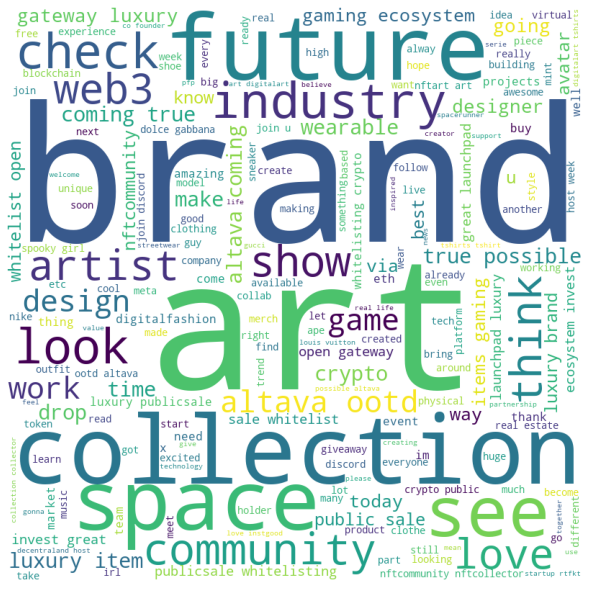

In [51]:
comment_words = ''

# iterate through list
for tweet_text in results:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "

# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [52]:
try1 = results
vectorizer = CountVectorizer()
try1_vecs = vectorizer.fit_transform(try1)

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names()

C:\Users\Parveen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [53]:
# Build LDA Model
try1_lda = LatentDirichletAllocation(n_components=7,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)              # use all available CPU
lda_output = try1_lda.fit_transform(try1_vecs)

In [54]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20
display_topics(try1_lda, feature_names, 20)

Topic 0:
luxury gaming virtual items think open show marketplace game brands social wearables buy crypto sell beauty vogue help lot market
Topic 1:
brands blockchain luxury virtual industry launch nike news crypto ar future platform brand bitcoin next physical avatar business week designers
Topic 2:
art love real get space see designer check community 3d join collection artist style big going discord us brand unique
Topic 3:
music digitalart launchpad sneakers hope design magazine good yet full right fashions everyone watch build working cryptoart another online welcome
Topic 4:
nftcommunity nftart collection nftcollector eth nftartist sale drop nftdrop nftcollection whitelist ethereum girl show gt price nftgiveaway openseanft tshirt models
Topic 5:
via week future crypto great gateway ecosystem invest public rtfkt opensea check whitelisting publicsale collections meta irl decentraland physical nftcollectibles
Topic 6:
coming altava look true 10 want use top avatars im possible ootd di

In [71]:
general_tweets_df = pd.read_csv('general_tweets.csv')
general = general_tweets_df['Text'].tolist()
results = [clean_tweet(tx) for tx in general]
#results

C:\Users\Parveen\AppData\Local\Temp/ipykernel_118536/4232908300.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


In [40]:
len(general)

25002

In [73]:
df_g = pd.DataFrame()
for x in range(len(results)):
    #text_object = NRCLex(clean_text(try1[x]))
    text = results[x]
    score = vds.polarity_scores(text)
    analysis = TextBlob(sentence).sentiment.polarity
    if analysis < 0:
        check = 'neg'
    elif analysis == 0:
        check = 'neu'
    else:
        check = 'pos'
    compound = score['compound']
    if "compound" in score:
        score.pop("compound")
    max_value = max(score, key=score.get)
    if max_value != check:
        print( analysis, check, max_value, score, results[x])
    #print(data)
    #average = sum(data.values()) / len(data.values())
    #if data[max_value] - 7 >= average:
        #list1.append(max_value)
    dict = {'Label': max_value,'Text': results[x], 'Compound': compound }
    df_g = df_g.append(dict, ignore_index = True)

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} virtual spaces expanding beyond games roblox even identify gaming platform upcoming week many brands selling physical versions designs gucci adidas ar
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} shiba inu launch collection british designer john richmond shib shibarmy cryptocurrency cryptonews crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week tommy hilfiger dolce gabbana selfridges blockchain based virtual decentraland announced launch week scheduled take place march 24 27 2022
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} set reminder upcoming space learn speak dev team spaceshost twitterspaces womeninnfts dressmaking
0.5 pos neu {'neg': 0.254, 'neu': 0.622, 'pos': 0.124} happening hype drop series contemporary illustrator fran ois berthoud collaboration x mad xr x foundation sozzani accepting offers
0.5 pos neu {'neg': 0.0, 'neu': 0.754, 'pos': 0.246} apien join biggest movement today 8pm est discuss

0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} need perspective shiba entering following industries food gaming building shibarium support let sink picture going shibarmy
0.5 pos neu {'neg': 0.0, 'neu': 0.753, 'pos': 0.247} dolce gabbana embrace milan week cryptocurrency blockchain web3
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} big names real estate around expanding services virtual realm nftcollection news
0.5 pos neu {'neg': 0.0, 'neu': 0.727, 'pos': 0.273} know photographer work price eth 0 02 interest buy click
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} invisible potter affinity cigars sense chain boxes let smoke mean steam episode 4 youtube spacebudz series tonight stay tuned invisiblefriends
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} omg finallyyy see come march 14th w future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} trends trends little faster
0.5 pos neu {'neg': 0.0, 'neu': 0.822, 'pos': 0.178} virtual couture luxury store virtualcouture ar vr au

0.5 pos neu {'neg': 0.0, 'neu': 0.592, 'pos': 0.408} ftrb holder comes lot perks therefore im even excited hodl token extremely popular among enthusiasts join us nftart crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} line premieres plein sport portion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} takes
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} line premieres plein sport portion bizassetinsights bacdaily sto bizaltercapital
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future via
0.5 pos neu {'neg': 0.0, 'neu': 0.751, 'pos': 0.249} says brands early winners rush pretty obvious statement thats exactly everyone seeing id saying sporting brands federations teams jumping space trendsetters
0.5 pos neu {'neg': 0.0, 'neu': 0.777, 'pos': 0.223} cant resist getting learning benefits ftrb holder advantage owning ftrb use acquire physical clothing soon see perks nftart
0.5 pos neu {'neg': 0.0, 'neu': 0.607, 'pos': 0.393} spent week end milano week went best milano pizzeria pi

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} im hosting today tezos fashionweek covering things catwalks sustainability future related lvmh theatre csm
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} african experience collaboration launching africarare ubuntuland co chief africarare mic mann africarare ubuntuland futureproofafrica iloveza
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} 28 02 2022 future gt kryptolinks cryptocurrencynews
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} doggie photographer york week little guy equipped go pro camera given full access back stage runway local tree photographed zoran life magazine streetphotography dog gopro
0.5 pos neu {'neg': 0.0, 'neu': 0.843, 'pos': 0.157} facebook meta rebrand focused lot attention branding future branding virtual commerce built brands trademarks law
0.5 pos neu {'neg': 0.167, 'neu': 0.705, 'pos': 0.127} 24 hours remain dont miss backside works x 1block limited edition
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'p

0.5 pos neu {'neg': 0.0, 'neu': 0.513, 'pos': 0.487} darling art circles booming recently
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} news coin announce brands participating week including event held property owned smurf sub hive eth crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} come listen learn live high style
0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} learn 3 tips help navigate marketing click link watch metaversemarketing marketing business digitalart digitalidentities onlinebusinesstips youtubevideo marketingtips
0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} learn 3 tips help navigate marketing click link watch metaversemarketing marketing business digitalart digitalidentities onlinebusinesstips youtubevideo marketingtips
0.5 pos neu {'neg': 0.0, 'neu': 0.852, 'pos': 0.148} building ecosystem airdropping sub collections blending physical leaders space benefits projects learning rtfkt executes stage roadmap
0.5 pos neu {'neg': 0.113, 'neu': 0.795, 'p

0.5 pos neu {'neg': 0.0, 'neu': 0.851, 'pos': 0.149} 27 02 2022 altcoin decentraland mana launches biggest virtual show gt kryptolinks cryptocurrencynews
0.5 pos neu {'neg': 0.0, 'neu': 0.862, 'pos': 0.138} altcoin decentraland launches biggest virtual show find excited im working store brand civive unlt street apperal
0.5 pos neu {'neg': 0.133, 'neu': 0.644, 'pos': 0.223} good morning mike welcome nftlife weekly interview part 5 5 marco kick ass photographer milan lets check questions 9 10 today nftcommunity nftart
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} art mainly bullish honestly seen style even need utility art already sell genesis collection foresees yet come 6r defo stylish brand
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} guy got africansinukraine trending somehow connected dont really know know isnt connected ukraine directly isnt ground set link night collect money currently live stream
0.5 pos neu {'neg': 0.174, 'neu': 0.679, 'pos': 0.147} case point seen talk

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} designers holding shows take
0.5 pos neu {'neg': 0.0, 'neu': 0.723, 'pos': 0.277} dolce gabbana embrace milan week milan week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} latest collection wear digitalclothing metafashion metacollection eumetaverse
0.5 pos neu {'neg': 0.1, 'neu': 0.667, 'pos': 0.233} rare traits collection make sorts cool fun crazy sidesteps amongst culture lifestyle get quokka nftcommunity nftcollection nftcollectors nftprojects sneakpeek
0.5 pos neu {'neg': 0.0, 'neu': 0.723, 'pos': 0.277} dolce gabbana embrace milan week milan week
0.5 pos neu {'neg': 0.0, 'neu': 0.723, 'pos': 0.277} dolce gabbana embrace milan week milan week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} work
0.5 pos neu {'neg': 0.0, 'neu': 0.723, 'pos': 0.277} dolce gabbana embrace milan week milan week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} early stage launching brand little utility rathen little utilitarianism bape nftcollector
0.

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} count fam
0.5 pos neu {'neg': 0.09, 'neu': 0.812, 'pos': 0.098} drop opensea meet emika kimono matching cool hair spiral designs hair earrings kamon family crest kimonogirlfriends kawaii nftart nftcommunity illustration via
0.5 pos neu {'neg': 0.137, 'neu': 0.634, 'pos': 0.229} homie think got 3 hours waste raw lives live simon miller give important parts entertaining 20 minutes
0.5 pos neu {'neg': 0.0, 'neu': 0.838, 'pos': 0.162} yes think resale price 1k usd 3 months irl boots get delivered holders future physical ownership
0.5 pos neu {'neg': 0.0, 'neu': 0.518, 'pos': 0.482} saw mintable post checked dao wow looks pretty cool 10 days til mint
0.5 pos neu {'neg': 0.0, 'neu': 0.724, 'pos': 0.276} japan w perks love japan mccoy visvim fdmntl etc believe beginning japan era
0.5 pos neu {'neg': 0.0, 'neu': 0.819, 'pos': 0.181} future rising popularity industry turns global empire involving major luxury brands retail consumers falcons falco

0.5 pos neu {'neg': 0.136, 'neu': 0.653, 'pos': 0.211} goals march launch promotion underground artists twitter create community artists musicians create discord promotion promotion brands
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week nope
0.5 pos neu {'neg': 0.194, 'neu': 0.583, 'pos': 0.223} embrace future dcaveofficial teaser cryptofashion vr ar virtualfashion
0.5 pos neu {'neg': 0.145, 'neu': 0.559, 'pos': 0.297} create platform luxury wearables building net porter creating expansions never seen ways love things take look stunning
0.5 pos neu {'neg': 0.175, 'neu': 0.825, 'pos': 0.0} spotlight 48 10101 genesis rebels wholl dress access pass blockchain rebels mission become house fully transform blockchain brand ogmcspotlight
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week tommyhilfiger dolce gabbana selfridges
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} let gooo high
0.5 pos neu {'neg': 0.0, 'neu': 0.635, 'pos': 0.365} dolce gabbana embrace milan

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} jigen gateway luxury items doxxed team cross chain ecosystem trade secondary market tg bsc nftartist
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} go check future c02 c01
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hunimal 16 type hunimal background peach dna otter human naked hair regent style hippy need purchase matic check network bidding starts sunday 12 00pm jst japan saturday 10 00pm est york nftcommunity
0.5 pos neu {'neg': 0.172, 'neu': 0.495, 'pos': 0.333} 2 tired anti inclusive standards leading objectification women men non binary together join forces skills create better ensures sustainable future thanks blockchain
0.5 pos neu {'neg': 0.183, 'neu': 0.755, 'pos': 0.061} 1 dafo metahuman club e collective launching march 24th made designers ceos cmos ctos vps professors students models artists mentors activists worried growing dirty side industry
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg'

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brands betting spend virtual outfits immersive known
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future bitcoin crypto cardano technology meta markzuckerberg ada source
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} watching womens fall winter 2022 show live saturday february 26th 2022 2pm cet follow live event
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future crypto cryptonews cryptocurrencynews
0.5 pos neu {'neg': 0.136, 'neu': 0.864, 'pos': 0.0} awaited live sense finest minting still going get
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} part mvfw hosting biggest names within portal connected marketplace enabling sale physical items big question wear show
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} blockchain based virtual decentraland announced launch week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} place
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} place
0.5 pos neu {'neg': 0.0, 'neu': 0.846, 'pos': 0

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.054, 'neu': 0.661, 'pos': 0.284} want pay remaining 2 million yen scholarships self serving collection strong desire 2 months ive sold 4 works purchasers virtual currency investors creators buy
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future cryptonews
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} probably nth x lfg
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future airdrop cryptonews hodl sellorders mining publickey stellar coinmarketcap
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future diamante blockchain diamcircle
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future diamante blockchain diamcircle
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future diamante blockchain diamcircle
0.5 pos neu {'neg': 0.0, 'neu': 0.876, 'pos': 0.124} blockchain based virtual decentraland announced launch week scheduled take place march 24 27 large number well known brands dolce gabbana selfridges 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland announced launch week scheduled take place march 24 27
0.5 pos neu {'neg': 0.0, 'neu': 0.577, 'pos': 0.423} indian designers join bandwagon
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} designers holding shows take via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} coin decentraland announce brands participating week
0.5 pos neu {'neg': 0.0, 'neu': 0.635, 'pos': 0.365} show well mogul ready make move buying 2 million virtual land
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week tommy hilfiger dolce gabbana selfridges
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lingerie giant filed trademarks sell virtual goods plans sell virtual lingere show return victoriassecret metaversefashion coin n smurf
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lithuanian luxury platform futugo launch
0.5 pos neu {'neg': 0.0, 'neu': 0.857, 'pos': 0.143} season 1 1105 1 1 co created musgo gm boots studio digitalf

0.5 pos neu {'neg': 0.193, 'neu': 0.807, 'pos': 0.0} hype utility seems hitting time high daily point thoughts utility vr physical go wrong
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} york paris milan decentraland global goes virtual biggest week date
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week tommy hilfiger dolce gabbana selfridges
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week tommy hilfiger dolce gabbana selfridges
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week tommy hilfiger dolce gabbana selfridges
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} strawberry explosion welcome home creators magic handz 1000 unique pieces series running polygon nftcommunity nftshill nftcollector nftcollectors nftart polygon polygonnft openseanft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week tommy hilfiger dolce gabbana selfridges
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} time get introduced week come dolcegabbana metaversefashionweek
0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} altava ootd altava coming true possible goyard fendi
0.5 pos neu {'neg': 0.081, 'neu': 0.808, 'pos': 0.111} 1 drip even aside clothing line going next level coming some1 loves clothes shop designer almost every week bp gang future look designs look neon colors everything pops 2 discord community
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} jason dustin unisex softstyle shirt 4sale etsy jasondustin nftcollection trending fashionweek apparel via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} tweet believe trendsy going make millionaire comment tweet 1 million trendsytokens making trendsymillionaire crypto culture beyond trendsytoken crypto bitcoin blockchain trndz
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} favourite projects right firmly believe future community irl gaming hodl ing except rkl need get hands game 

0.5 pos neu {'neg': 0.0, 'neu': 0.661, 'pos': 0.339} want altava collaborate dior altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.642, 'pos': 0.358} altava expecting biggest ever congratulations pre sale minting
0.5 pos neu {'neg': 0.0, 'neu': 0.638, 'pos': 0.362} altava coming true possible altava ootd look amazing place nature describes see glorious dragon behind altava really wanna altava collaborate high fashionbrand
0.5 pos neu {'neg': 0.0, 'neu': 0.682, 'pos': 0.318} altava coming true possible altava ootd offwhite
0.5 pos neu {'neg': 0.132, 'neu': 0.662, 'pos': 0.206} shoes 53045 x imvu bringing cutting edge rl straight inventories celebrate drop month weve gifted pair bumpair sneakers every user participate imvushoeschallenge weekend
0.5 pos neu {'neg': 0.0, 'neu': 0.687, 'pos': 0.313} altava ootd altava coming true possible brand want altava collaborate crocodile
0.5 pos neu {'neg': 0.0, 'neu': 0.822, 'pos': 0.178} really whats happening europe clowns

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland announce brands participating week business wire virtualreality web3
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland announce brands participating week business wire
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland announce brands participating week business wire
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland announce brands participating week business wire
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland announce brands participating week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland announce brands participating week
0.5 pos neu {'neg': 0.0, 'neu': 0.839, 'pos': 0.161} hello name mahtab designer 3d artist see 3d arts account soon wait please
0.5 pos neu {'neg': 0.0, 'neu': 0.682, 'pos': 0.318} altava ootd altava coming true possible fendi
0.5 pos neu {'neg': 0.0

0.5 pos neu {'neg': 0.0, 'neu': 0.567, 'pos': 0.433} welp mfer true degen grab hypemfer fun fact 10 headed
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} satellites audiovisual exhibited ukrainian week 2021 9 editions 0 04 eth nftartists collageart
0.5 pos neu {'neg': 0.0, 'neu': 0.682, 'pos': 0.318} 1 altava ootd 2 altava coming true possible 3 gucci
0.5 pos neu {'neg': 0.0, 'neu': 0.631, 'pos': 0.369} altava ootd altava coming true possible want collaborate samsunggalaxy
0.5 pos neu {'neg': 0.0, 'neu': 0.631, 'pos': 0.369} altava ootd altava coming true possible want collaborate metakongz
0.5 pos neu {'neg': 0.0, 'neu': 0.684, 'pos': 0.316} balenciaga nike brands reaching monetizing wider audience via curious games cloudgaming esports live streaming trends get details free report
0.5 pos neu {'neg': 0.09, 'neu': 0.769, 'pos': 0.141} keep asking drop forms phrase im dropping secret gem announced houseofdaw team got expanded experienced community strong announce jump 2 eth 1
0.5 pos 

0.5 pos neu {'neg': 0.238, 'neu': 0.762, 'pos': 0.0} vitalik crypto space complete lack theorycel thinking space concerning things conceptualised released rushed unconsidered gonna cause problems track
0.5 pos neu {'neg': 0.0, 'neu': 0.709, 'pos': 0.291} ootd altava ootd altava coming true possible want altava collaborate wooyoungmi juunj
0.5 pos neu {'neg': 0.278, 'neu': 0.722, 'pos': 0.0} complete lack theorycel thinking space concerning things conceptualised released rushed unconsidered gonna cause problems track
0.5 pos neu {'neg': 0.0, 'neu': 0.876, 'pos': 0.124} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava ootd altava coming true possible
0.5 pos neu {'neg': 0.0, 'neu': 0.753, 'pos': 0.247} fair scammed ran grift text book equally accurate
0.5 pos neu {'neg': 0.042, 'neu': 0.785, 'pos': 0.172} real indeed ad kelly wearstler expert 3d designer experience working creative projects platfo

0.5 pos neu {'neg': 0.0, 'neu': 0.575, 'pos': 0.425} cryptz waiting another legendary masterpiece ye actually ye inspiration cryptz collection whole concept strongly influenced yes inventions cryptz ready ye goat donda 2 nftcollection donda ye
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} luxury brands paco rabanne dolce gabbana etro tommy hilfiger dundas cavalli appear week nftartists nftcommunity via
0.5 pos neu {'neg': 0.13, 'neu': 0.87, 'pos': 0.0} collaboration visual artist iconic designer marks milan week launching ever line originating exclusively partnership drop
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} lt lt horse collection gate gt gt horses hair styler cheval veux arranging 10th hair show models static standing sitting halloween themed club nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.909, 'pos': 0.091} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets interview bitcoin news bitcoin news
0.5 pos neu {'neg': 0.0, 'neu': 0.909, 'p

0.5 pos neu {'neg': 0.0, 'neu': 0.876, 'pos': 0.124} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets
0.5 pos neu {'neg': 0.0, 'neu': 0.81, 'pos': 0.19} oshare literally means stylish japanese whilst trends move shift welcome friends cant see lands cant yet walk remember words yves saint laurent fashions fade style eternal osharemeta nftcommumity b w
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} luxury brands including joined official lineup ever week mvfw hosted
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} paco rabanne g etro appear week vogue business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} paco rabanne g etro appear week vogue business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} paco rabanne g etro appear week vogue business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} shows
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} take 100 virtual
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} news title paco rabanne g etro appear w

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} virtual commerce built brands trademarks law
0.5 pos neg {'neg': 0.545, 'neu': 0.455, 'pos': 0.0} crazy nftcollection nftdrops
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} real metawear 2 0 cross platform wearables indistinguishable real transforming industry checked next stores nft2 wear metawear
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} real metawear 2 0 cross platform wearables indistinguishable real transforming industry checked next stores nft2 wear metawear
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} real metawear 2 0 cross platform wearables indistinguishable real transforming industry checked next stores nft2 wear metawear
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} real metawear 2 0 cross platform wearables indistinguishable real transforming industry checked next stores nft2 wear metawear
0.5 pos neu {'neg': 0.0, 'neu': 0.661, 'pos': 0.339} altava ootd altava coming true possible brand want altava collabora

0.5 pos neu {'neg': 0.0, 'neu': 0.898, 'pos': 0.102} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets interview bitcoin news
0.5 pos neu {'neg': 0.0, 'neu': 0.884, 'pos': 0.116} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets interview
0.5 pos neu {'neg': 0.0, 'neu': 0.876, 'pos': 0.124} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets
0.5 pos neu {'neg': 0.0, 'neu': 0.918, 'pos': 0.082} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets interview bitcoin news bitcoin news polygon matic
0.5 pos neu {'neg': 0.0, 'neu': 0.898, 'pos': 0.102} ovr co founder diego di tommaso talks ar map2earn polygon migration cross assets interview bitcoin news
0.5 pos neu {'neg': 0.107, 'neu': 0.73, 'pos': 0.163} acebuddy lifestyle brand truly limited edition virtual physical merch c521 nftcommunity nftcollector nftcollectors nftcollection via
0.5 pos neu {'neg': 0.0, 'neu': 0.914

0.5 pos neu {'neg': 0.0, 'neu': 0.541, 'pos': 0.459} altava coming true possible please collaborate altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} altava ootd lets go altava coming true possible collaborate p
0.5 pos neu {'neg': 0.0, 'neu': 0.896, 'pos': 0.104} indian designers join bandwagon manish malhotra raghavendra rathore anamika khanna pankaj nidhi seen initial drops artworks selling minutes tech economictimes
0.5 pos neu {'neg': 0.0, 'neu': 0.896, 'pos': 0.104} indian designers join bandwagon manish malhotra raghavendra rathore anamika khanna pankaj nidhi seen initial drops artworks selling minutes market economictimes
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava ootd altava coming true possible
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} jonathan simkhai took york week space showcasing aw22 wearables collection part week featuring designer eleven pieces space check link vogueinstitute
0.5 pos neu {'neg': 0.0, 'neu': 0.687, 'pos': 0.313} al

0.5 pos neu {'neg': 0.0, 'neu': 0.756, 'pos': 0.244} brands good web3 evolve either wearing case representing community web3
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} altava coming ture possible altava ootd nftg apple samsung
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} altava ootd ferragamo altava coming true possible ootd jeans
0.5 pos neu {'neg': 0.0, 'neu': 0.848, 'pos': 0.152} online buying buy real asset real life versions show artwork house avatar wear onlineshopping nftshopping
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} instrumental industry globaldata analyst says blockchain
0.5 pos neu {'neg': 0.0, 'neu': 0.704, 'pos': 0.296} design skills designer needs know create
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ftx moves 300 billion luxury industry hire tezos
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} upgrade 3d membership utility adding physical wardrobe italian made physical garments
0.5 pos neu {'neg': 0.132, 'neu': 0.771, 'pos': 0.097} softwa

0.5 pos neu {'neg': 0.084, 'neu': 0.72, 'pos': 0.196} gm ga gn denim apparel wrangler bringing brand starting irl experiences digitalwearables decentraland aside maiden offering upcoming part drop special kicks
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wear see garment looks get picture fitted piece try real time via ar
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} trademark registrations shed light branding law
0.5 pos neu {'neg': 0.0, 'neu': 0.631, 'pos': 0.369} great moves looking forward seeing convergence luxury crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.798, 'pos': 0.202} bridge roadmap v2 released free c 02 stage already decentraland merchandising exclusive line clothing c01 token utility centered around ecosystem continue read
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} crypto show indeed different superversedubai nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.736, 'pos': 0.264} arrivals indieweb3fashion powerful look minimal details dramatic appearance look check 

0.5 pos neu {'neg': 0.0, 'neu': 0.796, 'pos': 0.204} emperia prepares luxury labels virtual store management saas solution artemis
0.5 pos neu {'neg': 0.0, 'neu': 0.585, 'pos': 0.415} conducted interview successful german influencers get opinion virtual wearables rentals fun reading
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} need eth wallet buy wearables week next month bullish eth mvfw decentraland
0.5 pos neu {'neg': 0.0, 'neu': 0.568, 'pos': 0.432} wow thehusle going cryptosociety music thehusle
0.5 pos neu {'neg': 0.0, 'neu': 0.7, 'pos': 0.3} virtualfashioninthemetaverse lets welcome 4 guests virtual event looking forward
0.5 pos neu {'neg': 0.146, 'neu': 0.854, 'pos': 0.0} moon madness show coming soom willing participate show character art thing music see advertisement show contain everything go
0.5 pos neu {'neg': 0.0, 'neu': 0.631, 'pos': 0.369} altava coming true possible want collaborate nike altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.816, 'pos': 0.184} yes currently

0.5 pos neu {'neg': 0.0, 'neu': 0.687, 'pos': 0.313} altava ootd altava coming true possible tag brand want altava collaborate
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} commemorate emperors birthday sang japanese national anthem different historical version song favourite rakish late 19th century japan feel singer japanese web3 crypto rock pop
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} partners wrangler launch brands events launch marketplaces nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.709, 'pos': 0.291} altava coming true possible ootd brand want altava collaborate kenzo altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.508, 'pos': 0.492} easy demons coolest sense
0.5 pos neu {'neg': 0.0, 'neu': 0.778, 'pos': 0.222} democratizing open source design platform empower reward independent creat

0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} 75 owners get 1 digitally animated icon 1 vip pass private performance leon bridges york week september 2022 1 icon decentraland wearable irl access unveiling legendary
0.5 pos neu {'neg': 0.0, 'neu': 0.65, 'pos': 0.35} think altava collaborate dior im excited altava try sure attempts altava huge impact global altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.773, 'pos': 0.227} collection 6 666 generative merge inspirations anime manga streetwear culture japanese folklore many grants membership club related visionmap announce soon
0.5 pos neu {'neg': 0.0, 'neu': 0.897, 'pos': 0.103} hey guys know aim build tech forward brand crypto community merging physical giving crypto traders identity everyday life blockchain crypto defi nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.657, 'pos': 0.343} beer chance mindfulness redbubble craftbeer art holiday short decor design parody
0.5 pos neu {'neg': 0.0, 'neu': 0.657, 'pos': 0.343} beer chance mindf

0.5 pos neu {'neg': 0.0, 'neu': 0.75, 'pos': 0.25} meet couture queenz based celebration order support onboard designers space 100 original art nftcommunity womeninnfts follow whitelist
0.5 pos neu {'neg': 0.0, 'neu': 0.818, 'pos': 0.182} hey heard mories helmets getting airdropped ssf eth helmets send ya boy good ol e h
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} altava ootd altava coming true possible dior gucci louisvuitton
0.5 pos neu {'neg': 0.043, 'neu': 0.492, 'pos': 0.466} hello dear community searching designer collaborate take artwork another level serious professional therefore aim best way develop parties ideals thanks lot
0.5 pos neu {'neg': 0.124, 'neu': 0.876, 'pos': 0.0} chibi peeps 3d handcrafted using 3d design software auto generated layered art collectible discord chibi facemask opensea crypto ethereum polygon
0.5 pos neu {'neg': 0.195, 'neu': 0.805, 'pos': 0.0} eventually drops going drops summer winter etc different metric time even block related
0.5 pos 

0.5 pos neu {'neg': 0.0, 'neu': 0.765, 'pos': 0.235} 4 thing want get dressed every time go whether week probably want choose favourite clothes keep rather leaving chance
0.5 pos neu {'neg': 0.0, 'neu': 0.732, 'pos': 0.268} 3 week mvfw happening march 24 27 delighted partner make happen
0.5 pos neu {'neg': 0.0, 'neu': 0.633, 'pos': 0.367} want learn become stylist help get ahead week march 24 27 created guide walking create ultimate wardrobe mvfw
0.5 pos neu {'neg': 0.0, 'neu': 0.546, 'pos': 0.454} attended charity event help think fantasy intertwine altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.813, 'pos': 0.187} earlybearrole closing soon 1 3 filled icon doxed experienced business team beautiful elevated art business another early womeninnft nftcommunity nftcollectors
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashions fade style eternal yves saint laurent nf

0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} altava ootd altava coming true possible chanel saintlaurent gucci
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brand internet made dropping genesis collection pigmentonft eth
0.5 pos neu {'neg': 0.0, 'neu': 0.645, 'pos': 0.355} internet made creating frontier evening
0.5 pos neu {'neg': 0.0, 'neu': 0.645, 'pos': 0.355} internet made creating frontier evening
0.5 pos neu {'neg': 0.0, 'neu': 0.645, 'pos': 0.355} internet made creating frontier evening
0.5 pos neu {'neg': 0.0, 'neu': 0.814, 'pos': 0.186} altava ootd altava coming true possible want collaborate ziozia unlike traditional menswear brands many trendy products college students young socialites
0.5 pos neu {'neg': 0.0, 'neu': 0.642, 'pos': 0.358} ethdenver highlight exclusive w virtual gateway drug david cash via
0.5 pos neu {'neg': 0.0, 'neu': 0.675, 'pos': 0.325} expected help luxuryfashion brands thrive platform allow designers express without limited physical constrai

0.5 pos neu {'neg': 0.0, 'neu': 0.901, 'pos': 0.099} industry cat talk time receive answer questions future graduation join guest speaker along host tomorrow holloway campus luxury fashionista london steffyb
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 1 2022
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava ootd altava coming true possible
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} lt lt horse collection gate gt gt horses hair styler cheval veux arranging 10th hair show models static standing sitting halloween themed club nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} altava coming true possible altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.802, 'pos': 0.198} best kept secret space fully doxxed industry leaders nyc studio decentraland major brand collabs speaking veecon nftnyc check
0.5 pos neu {'neg': 0.0, 'neu': 0.864, 'pos': 0.136} still hyped happened virtual clothes models influencers celebrities journalists tech vip guests appeared via pe

0.5 pos neg {'neg': 0.59, 'neu': 0.41, 'pos': 0.0} opensea named lawsuit bored ape stolen hack law
0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} altava coming true possible altava collaborate altava ootd
0.5 pos neu {'neg': 0.0, 'neu': 0.879, 'pos': 0.121} dubais glimpse lit creators advertisers brands seeing cyber changing rooms shows xr based ads unlimited creative capital cant wait metapolis come life
0.5 pos neu {'neg': 0.0, 'neu': 0.597, 'pos': 0.403} definitely foremost brand solana space
0.5 pos neu {'neg': 0.09, 'neu': 0.812, 'pos': 0.098} alqsyy huge drop pre sale 22nd feb 9 pm cet ether daddy gateway biggest decentralized check eligible mint tomorrow pre sale ad
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} lt lt horse collection gate gt gt horses hair styler cheval veux arranging 10th hair show models static standing sitting halloween themed club nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.802, 'pos': 0.198} whitelist brand paras whitelist created give vips ea

0.5 pos neu {'neg': 0.0, 'neu': 0.848, 'pos': 0.152} petaverse streetwear collection puffer jacket smartwatch backpack carry pet around get ready week decentraland petaverse
0.5 pos neg {'neg': 0.59, 'neu': 0.41, 'pos': 0.0} opensea named lawsuit bored ape stolen hack law
0.5 pos neu {'neg': 0.127, 'neu': 0.696, 'pos': 0.177} man need collection plus go right alone w blvck nftcommunity web3 future godz bless
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bullish skulls embranche art design style unique bullish skulls believe unique resemble ones seen derivative unique art piece
0.5 pos neu {'neg': 0.0, 'neu': 0.635, 'pos': 0.365} please spread word podcast debut 2 23 22 talking entrepreneurship cryptos industry youtube vending machine methods clean credit kingdom heaven purposeful conversation understanding need
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} taking stage storm
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} co host twitter space together metafashion metajewelry
0.

0.5 pos neu {'neg': 0.0, 'neu': 0.556, 'pos': 0.444} early supporter hundreds followers twitter truly believe leading let join sixthreseau journey
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} fashionisthelaw watching quite time really integrates art besides trend art impeccable hope get great job team
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashionisthelaw little touch set standards luxury
0.5 pos neu {'neg': 0.117, 'neu': 0.719, 'pos': 0.165} made tweet buy opensea account 487 eth proceeds go purchase donkeys jeff use share buy large boat venture ukraine humanitarian mission rescue eastern european models impending war
0.5 pos neu {'neg': 0.0, 'neu': 0.656, 'pos': 0.344} know irl know go due love incredible team internetmade
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} industry evolving comes issues related ip rights arise lydia mendola article today link article available subscribers ntplus de
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashionisthelaw setti

0.5 pos neu {'neg': 0.102, 'neu': 0.737, 'pos': 0.161} unearth trends instantly athleisure want emerging trends click button strong weak signals seconds auto gen human loop pdf trending sports gamefi wfh future lifestyle
0.5 pos neu {'neg': 0.0, 'neu': 0.885, 'pos': 0.115} eth want see looks wore week parisworld use parisworld post faves
0.5 pos neu {'neg': 0.0, 'neu': 0.814, 'pos': 0.186} soooo looks record label ever utilize awesome art style check single fly coming soon matching art cover artvatars chopshopmusic
0.5 pos neu {'neg': 0.0, 'neu': 0.633, 'pos': 0.367} related got thats signed fave artist
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} still discover blink years industry eruption community given marco purpose expression lets learn
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} thought seen collabing advertise billboards roblox week
0.5 pos neu {'neg': 0.0, 'neu': 0.565, 'pos': 0.435} non fungible tokens continuously taking storm assets perfect acco
0.5 pos neu {'neg':

0.5 pos neu {'neg': 0.0, 'neu': 0.792, 'pos': 0.208} quite beautiful manstel back listing code 321 330 check see hes wearing nftcommunity nftartist nftart nftproject openseanft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} c 01 model future via
0.5 pos neu {'neg': 0.0, 'neu': 0.773, 'pos': 0.227} probably mate ever heard favorite time know designing build virtual commerce spaces sell art items music games possible cool check
0.5 pos neu {'neg': 0.352, 'neu': 0.492, 'pos': 0.155} gm take flight fight nelf sneakers walk fly reason nelf feared enemy awesome sense x voxel voxelart wagmi
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} market worth 758 6 billion dollars 2026 globally virtual investment luxury growth
0.5 pos neu {'neg': 0.0, 'neu': 0.752, 'pos': 0.248} beginning london week 2022 better time explore future industry success stories prevalent rise non fungible tokens tech trend set next big influence
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 27 3 decentraland week

0.5 pos neu {'neg': 0.0, 'neu': 0.914, 'pos': 0.086} 5c joining industry firms launched victorias secret plans sell virtual lingerie keep patent filings follow trademark attorney
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} hi know italys top brands presenting outstanding collection numerous benefits owners access events major cities passive earnings use code enter yntgrfktcn
0.5 pos neu {'neg': 0.306, 'neu': 0.499, 'pos': 0.196} lp fees shitcoin take cut trading zero sum lp fees really makes negative sum lol mints yes make argument
0.5 pos neu {'neg': 0.0, 'neu': 0.781, 'pos': 0.219} yup think even bigger best positioned company space next google web 3 marketplace defi ip gaming media
0.5 pos neu {'neg': 0.0, 'neu': 0.687, 'pos': 0.313} always great part life greatly enhance quality little little fashionisthelaw
0.5 pos neu {'neg': 0.068, 'neu': 0.489, 'pos': 0.443} know looking expand via cut sew partner provide true customization basic merch please let know local la based co

0.5 pos neu {'neg': 0.175, 'neu': 0.552, 'pos': 0.273} looking safe inclusive fun discord community check us emerging combines real dressmaking 50 join auto get pre sale discord womeninnfts womeninnft nftcommunity
0.5 pos neu {'neg': 0.11, 'neu': 0.89, 'pos': 0.0} upcoming massive explosion shock many inevitable beacase fits almost every culture gaming sports arts etc spring board cultures express solana crypto nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} lt lt horse collection gate gt gt horses hair styler cheval veux arranging 10th hair show models static standing sitting halloween themed club nftartist
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} chance check website yet crypto
0.5 pos neu {'neg': 0.145, 'neu': 0.645, 'pos': 0.21} guys back absolutely crazy girst ever collab european ultra luxury brand sease congratulations everyone
0.5 pos neu {'neg': 0.088, 'neu': 0.599, 'pos': 0.313} important place virtual created different looks match jewelry collecti

0.5 pos neu {'neg': 0.0, 'neu': 0.726, 'pos': 0.274} space predominantly male led great step meta arena create experience roksanda well ar wearable sit alongside push wider accessibility across industry iodf co founder cd
0.5 pos neu {'neg': 0.112, 'neu': 0.811, 'pos': 0.077} iodf created vocabulary meta showcase acknowledging audiences brands right dichotomy root entry language crypto arena problematic iodf co founder ceo leanne elliott young
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lingerie girl eth0 25
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lingerie girl eth0 25
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check lion minimal mr unknow via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} listed girl sale lingerie girl eth0 25 animenft nftcollection nftdrop opensea openseanft foundationnft foundationapp
0.5 pos neu {'neg': 0.0, 'neu': 0.617, 'pos': 0.383} hello name negin designer ive studied psychology ive developed art style mixes interests presents art hope am

0.5 pos neu {'neg': 0.0, 'neu': 0.708, 'pos': 0.292} hi im marrisa im founder mwny brand caters natural beauty multicultural women wanted show go web2 web3 projected hand drawn art collection debut nyfw runway show
0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} wait see popular prints used big brands runways
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} unseen 9 unseen
0.5 pos neu {'neg': 0.412, 'neu': 0.588, 'pos': 0.0} illustrator talia zoref broke hype
0.5 pos neu {'neg': 0.412, 'neu': 0.588, 'pos': 0.0} illustrator talia zoref broke hype
0.5 pos neu {'neg': 0.412, 'neu': 0.588, 'pos': 0.0} illustrator talia zoref broke hype
0.5 pos neu {'neg': 0.0, 'neu': 0.8, 'pos': 0.2} futugoapp crafting collection dedicated luxury art information revealed soon stay tuned luxury art
0.5 pos neu {'neg': 0.0, 'neu': 0.562, 'pos': 0.438} loving ar ar web3 metaversemodel music
0.5 pos neu {'neg': 0.0, 'neu': 0.505, 'pos': 0.495} ready add value industry irl cant wait
0.5 pos neu {'neg': 0.0

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check latest article impact 39
0.5 pos neu {'neg': 0.08, 'neu': 0.657, 'pos': 0.263} anti social anime club anime art meets streetwear well giving away 1 asac 10 wl follow tag 3 frends rt winners must ds nftcommunity nftgiveaway
0.5 pos neg {'neg': 0.0, 'neu': 0.0, 'pos': 0.0} 
0.5 pos neu {'neg': 0.0, 'neu': 0.745, 'pos': 0.255} jumped onto around 1 month ago found interesting someone finally started working jewellry work absolutely immaculate collaborations based projects amazing highly advise
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} next ntf investing tackles industry ftrb aiming build decentralised ecosystem goods feb 24th
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} next ntf investing tackles industry ftrb aiming build decentralised ecosystem goods feb 24th
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} metafashion sabato course pioneer
0.5 pos neu {'neg': 0.161, 'neu': 0.508, 'pos': 0.331} half price minting 23 days f

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} latest destination
0.5 pos neu {'neg': 0.12, 'neu': 0.667, 'pos': 0.213} official discord tokenomics future collections collabs c 02 free c 01 holders breeding merch exclusive art roadmap 2 0 implement even partnered w
0.5 pos neu {'neg': 0.337, 'neu': 0.663, 'pos': 0.0} cant agree report huge game changer imagine possible virtual screenwears
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fades style remains coco chanel check skull nftcommunity nftcollector nftcollection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} minted crypto16x16 0100 0103 opensea pixelart digitalart nftart snapshot cryptoart nftcollection cryptoartist nftcollector eth blockchain nftcommunity nftartist nftjapan
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} victoria secret enter plans sell virtual undergarments footwear accessories
0.5 pos neu {'neg': 0.0, 'neu': 0.69, 'pos': 0.31} top today runway price 226k
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} v

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} news victoria secret enter plans sell virtual undergarments footwear accessories
0.5 pos neu {'neg': 0.0, 'neu': 0.642, 'pos': 0.358} tons utility innovative connecting market major brands founders legitimate business close ties amazing brands
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} victoria secret enter plans sell virtual undergarments footwear accessories
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} victoria secret enter plans sell virtual undergarments footwear accessories
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} victoria secret enter plans sell virtual undergarments footwear accessories
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} kim shui enhances fw22 runway serenity keys collection exploring dualities within kim
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} trump release ex president follows trend audience release tokens sold february 21 presidents usa collection consist 10 works art depicting iconic mo

0.5 pos neu {'neg': 0.0, 'neu': 0.661, 'pos': 0.339} fam need inspiration next lore track want break electric guitar epic favorite rock metal songs wearethenight weareconnected wearethefuture
0.5 pos neu {'neg': 0.078, 'neu': 0.781, 'pos': 0.141} bscgem must check amazing crypto revolutionary token space liquidity locked contract verified low mcap kyc doxed dev marketplace incoming 53 supply burned tg
0.5 pos neu {'neg': 0.0, 'neu': 0.58, 'pos': 0.42} apparel accessories brands safe bet
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} louis vuitton brands embarking unique crossover gaming steven anderson donate thecmo eth
0.5 pos neu {'neg': 0.421, 'neu': 0.579, 'pos': 0.0} picked fire moonwalkers 2 celestials dope rose head couldnt happier ready staking lfgg tos
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} york week took mixed results
0.5 pos neu {'neg': 0.0, 'neu': 0.794, 'pos': 0.206} top 2022 building decentralized ecosystem collaborative creation goods ftrb start trading febru

0.5 pos neu {'neg': 0.0, 'neu': 0.575, 'pos': 0.425} fashionisthelaw firstly art theme indeed become huge part todays society promotes space love team behind able form supportive community
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pull tonight 6pm cet hes talking come qs
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} agree nothing space bullish 100 sure next bull cycle time
0.5 pos neu {'neg': 0.0, 'neu': 0.537, 'pos': 0.463} week sooo good back beloved london meet many amazing thanks future innovation game sustainability avatars skins mr ar vr ai ml iot pgconnects
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week 2022 second life via
0.5 pos neu {'neg': 0.0, 'neu': 0.759, 'pos': 0.241} taking beauty complexity next level future bravo bridging gap physical virtual worlds fashionfridays
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} boohoo partners paris hiltons virtual week culture
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} superverse web3 summit covering metav

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} latest destination
0.5 pos neu {'neg': 0.174, 'neu': 0.826, 'pos': 0.0} coinsilium group limited coinsilium advise global lifestyle brand blvck paris
0.5 pos neu {'neg': 0.174, 'neu': 0.826, 'pos': 0.0} coinsilium group limited coinsilium advise global lifestyle brand blvck paris
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} latest destination fashionnews
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} whats coming
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} latest destination
0.5 pos neu {'neg': 0.134, 'neu': 0.647, 'pos': 0.219} mirl giveaway brand 20 wl spots presents conditions rt 3 tag fren join follow join discord details
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} happens goes blockchain brands luxury nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.854, 'pos': 0.146} walmart intending sell virtual goods brands selling clothes accessories reveals go businesses generate large profitable incremental revenue streams
0.5 p

0.5 pos neu {'neg': 0.0, 'neu': 0.872, 'pos': 0.128} seems faith tribe link design production blockchain question simple revolutionary style apply concept tell us youre going get decentralization real
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} expression resolution quality work seen born fashionislaw p clothing brand
0.5 pos neu {'neg': 0.153, 'neu': 0.452, 'pos': 0.395} fashionisthelaw love potential utility aside art insane community helpful full alpha
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} shall gallery
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} roksanda debuts haute couture london week 25
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashionisthelaw duh
0.5 pos neu {'neg': 0.102, 'neu': 0.732, 'pos': 0.166} apegame kind p2e game using 10 000 options completely randomized guessing game featuring bored ape yacht club
0.5 pos neu {'neg': 0.0, 'neu': 0.5, 'pos': 0.5} lol sat across guys turns visiting la wants bring space haha small love
0.5 pos neu {'neg': 0.0

0.5 pos neu {'neg': 0.0, 'neu': 0.628, 'pos': 0.372} excited announce second collection drip launching crypto week march check article info join us aspen weekend celebrate
0.5 pos neu {'neg': 0.0, 'neu': 0.552, 'pos': 0.448} fashionisthelaw love guys roadmap sneak peek gives goosebumps something huge
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gonna next dope pioneer fashionisthelaw
0.5 pos neu {'neg': 0.0, 'neu': 0.69, 'pos': 0.31} 2 days inaugural realm runway event ny week super excited launch web3 modeling marketplace live network live
0.5 pos neu {'neg': 0.0, 'neu': 0.774, 'pos': 0.226} paris amazing art im bullish mention phenomenal team behind fashionisthelaw amount saturation marketplace stand
0.5 pos neu {'neg': 0.0, 'neu': 0.647, 'pos': 0.353} cryptoblonde express aurora yes get portrait aurora 0 0015eth get free moon pixelartist trendingtopic
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashionisthelaw president van gogh style
0.5 pos neu {'neg': 0.0, 'neu': 0.677, 

0.5 pos neu {'neg': 0.0, 'neu': 0.519, 'pos': 0.481} fashionisthelaw u work industry super excited see planned us love industry expanding metverse space gucci launch think real potential lovers
0.5 pos neu {'neg': 0.0, 'neu': 0.642, 'pos': 0.358} fashionisthelaw street grew da street philosophy da future able feel represented threw make community strong loyal love concept art saw far bravo
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} profile picture sponsored planning revolutionize industry 2000 take space art vision
0.5 pos neu {'neg': 0.0, 'neu': 0.774, 'pos': 0.226} fashionisthelaw little available surely explore side bring lots aware possibility
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} related mean period fashionisthelaw
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} happens goes digitalfashion blockchain nftsandblockchain gucci augmentedreality virtualreality ar ainews analyticsinsight analyticsinsightmagazine
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fash

0.5 pos neu {'neg': 0.045, 'neu': 0.522, 'pos': 0.433} nftgiveaway 1x 5x whitelist spots win 1 follow 2 retweet 3 tag 3 friends join 48 hours collection based ready leave mark nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.873, 'pos': 0.127} altava 1st board lot top tier luxury brands transforming luxury items backed igo 18 feb 2022 igo price 0 3 initial cap 450 000
0.5 pos neu {'neg': 0.0, 'neu': 0.752, 'pos': 0.248} put much effort free hoodies imagine much effort putting building collabs
0.5 pos neu {'neg': 0.157, 'neu': 0.843, 'pos': 0.0} public listing today read see collide nftfashion streetwear
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check meta suit coser design via nftart collectibles crypto 3danimation 3dart 3dmodeling blender3d design meta metaverso
0.5 pos neu {'neg': 0.0, 'neu': 0.777, 'pos': 0.223} join space tonight change industry excited host founder iconic clothing brand pssst talk gen f daily paper traits activations
0.5 pos neu {'neg': 0.0, 'neu': 0.583, 'po

0.5 pos neu {'neg': 0.109, 'neu': 0.891, 'pos': 0.0} today launch awaited id make brief thread ones thinking minting
0.5 pos neu {'neg': 0.0, 'neu': 0.5, 'pos': 0.5} favorite designer takashi murakami
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} philipp plein german designer purchased big plot land decentraland virtual environment owned users 510 manas philipplein fashiondesigner decentraland mana virtualworld
0.5 pos neu {'neg': 0.0, 'neu': 0.872, 'pos': 0.128} think outfit tonight think needs trendsy shirt lucking coming soon nextshiba crypto blockchain cryptoinvestor shiba trendsytoken
0.5 pos neu {'neg': 0.0, 'neu': 0.697, 'pos': 0.303} whats guys meet talented turkish designer popular cryptofashionix bunyaminaydin check item opensea via cryptocurrency nftcollector nftcommmunity
0.5 pos neu {'neg': 0.279, 'neu': 0.597, 'pos': 0.124} extremely aware things react something insecure change fit box accordingly academicchatter insecure life listen react
0.5 pos neu {'neg': 0.0, 'neu

0.5 pos neu {'neg': 0.0, 'neu': 0.808, 'pos': 0.192} lt lt horse collection gate gt gt horses hair styler cheval veux arranging 10th hair show models static standing sitting halloween themed club style unleashes unique feeling
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} clothing love see show metaversefreeland cryptochi crypto
0.5 pos neu {'neg': 0.304, 'neu': 0.526, 'pos': 0.171} factually wrong biggest brands gaming fast food companies already utilizing blockchain sell product promote ads general public quite sure arguing ignorantly
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check item opensea lewat boot madameboothead opensea openseanftart openseamarketplace
0.5 pos neu {'neg': 0.0, 'neu': 0.534, 'pos': 0.466} another super bullish join community via link crypto wagmi
0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} bought small bag jig dip listed today early investors making good partnerships gateway luxury items gaming ecosystem
0.5 pos neu {'neg': 0.0, 'neu': 1

0.5 pos neu {'neg': 0.0, 'neu': 0.633, 'pos': 0.367} looking good brands bet clothing npr
0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} interesting mean place anyone look anything takes look things stand companies already blending real virtual worlds
0.5 pos neu {'neg': 0.0, 'neu': 0.787, 'pos': 0.213} telos tevm dstor power utopian grants hackathons live
0.5 pos neu {'neg': 0.0, 'neu': 0.827, 'pos': 0.173} sounds licensing issue collectible handbags cool unique design collab retail company future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} rocking navy black wearable nftcommunity nftproject wearables available 2 17 opeansea
0.5 pos neu {'neg': 0.0, 'neu': 0.766, 'pos': 0.234} brand vision ltd company behind successfully completed us 4 million series funding round led animoca brands animocabrands brandnewvision funding metaversenews
0.5 pos neu {'neg': 0.0, 'neu': 0.674, 'pos': 0.326} business feed looking good brands bet clothing
0.5 pos neu {'neg': 0.0, 'neu': 0.756, 'pos

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} rogue mask cards 1 1 77 500 available opensea 0 01 eth unlock content check nftcommunity nftjapan nftart nftartist nftamerica nftdrop nftopensea nftcollection nftcollectors ethereum
0.5 pos neu {'neg': 0.0, 'neu': 0.788, 'pos': 0.212} sho xana ethereum sidechain custom built major adoptions tokyo olympic koto museum 2020 unicorn award milan week 2021 art award 2021 fuji sankei group research page coming soon 1
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} tallinn guild atelier enters xr today
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} tallinn guild atelier enters xr today
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} tallinn guild atelier enters xr today
0.5 pos neu {'neg': 0.0, 'neu': 0.909, 'pos': 0.091} meta jacket collection 8888 jackets designed artist designer holders meta jacket get chance turn real jackets earn royalties sales perpetuity story 1 7
0.5 pos neu {'neg': 0.0, 'neu': 0.694, 'pos': 0.306} altava incorporate

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} roksanda launches culture
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 1d 3d culture file harry styles phygital cardigan tells us exploding virtual couture crochet
0.5 pos neu {'neg': 0.0, 'neu': 0.839, 'pos': 0.161} brief partnered ready wear label release time consumers buy haute via web 3 0 read take
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} africa made nftart nftartist
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} victorias secret prepares wouldnt prefer virtual lingerie real thing lingerie
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gemmasheppard shaping frontier metaventures global director stylist work roblox read inconversationwith interview photo gemma reynolds
0.5 pos neu {'neg': 0.16, 'neu': 0.84, 'pos': 0.0} stopped muumba conscious lifestyle network showcase blast fashionweek sdgs wearable lfg
0.5 pos neu {'neg': 0.0, 'neu': 0.893, 'pos': 0.107} karl lagerfeld collection chanel paris house embroidery acces

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} february 16th announced cooperate blueberrymeta hold week event conduct wear read
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} throwing runway wear brand walk nftcollector nftcommunity see apes dressed walking
0.5 pos neu {'neg': 0.119, 'neu': 0.881, 'pos': 0.0} victoriassecret patent hints axed annual show return virtualreality sandbox sand decentraland mana ufo gala shib zil metapolis gamefi
0.5 pos neu {'neg': 0.0, 'neu': 0.597, 'pos': 0.403} definitely going moon spacerunners matavars
0.5 pos neu {'neg': 0.0, 'neu': 0.597, 'pos': 0.403} definitely going moon spacerunners matavars
0.5 pos neu {'neg': 0.183, 'neu': 0.649, 'pos': 0.168} 3 moscow friends artist designer advertiser produced selling 52k london gallery really wrong line business
0.5 pos neu {'neg': 0.0, 'neu': 0.597, 'pos': 0.403} definitely going moon spacerunners matavars
0.5 pos neu {'neg': 0.0, 'neu': 0.597, 'pos

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} art available check opensea popart art tiger airjordan nike kickstart nftdrop
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} come part icons
0.5 pos neu {'neg': 0.0, 'neu': 0.852, 'pos': 0.148} starseed phantoms free purchase 1 official starseed phantom opensea scan tongue access tunes try sneakers yeezy hypebeast starseed galactic hiphop explorepage
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} web3 wave democratizes buying building real estate hosting shows monetizing video gaming forbes
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} web3 wave democratizes buying building real estate hosting shows monetizing video gaming forbes
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} web3 wave democratizes buying building real estate hosting shows monetizing video gaming forbes
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} lt lt horse collection gate gt gt horses hair styler cheval veux arranging 10th hair show models static standi

0.5 pos neu {'neg': 0.091, 'neu': 0.505, 'pos': 0.404} disappoint successful mint december 2021 great utility roadmap awesome raffles giveaways holders looking forward 2nd collection coming months spacerunners
0.5 pos neu {'neg': 0.223, 'neu': 0.777, 'pos': 0.0} victorias secret patent hints axed annual show return via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nftcommunity animation
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} index next steps phase 1 rarity multipliers depending movements birthday heart rate used later phases
0.5 pos neu {'neg': 0.0, 'neu': 0.687, 'pos': 0.313} spacerunners biggest hype great take tell big projects words big
0.5 pos neu {'neg': 0.0, 'neu': 0.875, 'pos': 0.125} following japan noticed smaller collections usually handmade kinda cool really style got starting blow madeinjapan
0.5 pos neu {'neg': 0.091, 'neu': 0.505, 'pos': 0.404} disappoint successful mint december 2021 great utility roadmap awesome raffles giveaways holders looking forward 2n

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} coming fashionnfts collection following hosting week
0.5 pos neu {'neg': 0.0, 'neu': 0.519, 'pos': 0.481} course bag indeed perfect events
0.5 pos neu {'neg': 0.158, 'neu': 0.842, 'pos': 0.0} watercolor portrait famed designer virgil abloh sold 1 million dollars 3 months ago art basel miami become owner co owner incredible painting dead pool nftauction robprior
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gm everyone whats today feed info
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} afterworld age tomorrow takes whole level digitalhumans virtualworlds polymotionstage unrealfutures
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} never seen art mint date 17th 3 333 circulation imho going big matavogue strikeapose
0.5 pos neu {'neg': 0.187, 'neu': 0.813, 'pos': 0.0} throw away victorias secret patent hints axed annual show return via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} r seau high end pull goals
0.5 pos neu {'neg': 0.0

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} phenomenon
0.5 pos neu {'neg': 0.0, 'neu': 0.594, 'pos': 0.406} shes artist behind helped come brilliant idea help meatverse brands expend store collection ar excited part
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mirl decentralized brand born hotnft mirlnft trendingnft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} kadi always pioneer technology sustainability recently embarked journey path launching made 120 rare
0.5 pos neu {'neg': 0.0, 'neu': 0.88, 'pos': 0.12} getting land boom instead visiting physical gucci store customers visit sandbox immersive experience credit vogue business wfx wfxplm fashiontech digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.826, 'pos': 0.174} building streetwear label via metaversenft undergroundhiphop graffitiart runway create aspire collection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} never seen art mint date 17th 3 333 circulation imho going big matavogue strikeapose
0.5 pos neu {'neg':

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} x collab going take mental health street wear level baby
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} team updates stepped marketing company voltura pty ltd formally known social strategist pty ltd voltura focusing full time work included pa includes experienced designer swag incoming
0.5 pos neu {'neg': 0.0, 'neu': 0.722, 'pos': 0.278} interested intersection check building episode koji conversations host
0.5 pos neu {'neg': 0.0, 'neu': 0.841, 'pos': 0.159} rtncc 19 starting week different kind spotlight hitting random turtle club high brow news megabull week announced entering game
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} acquires additional real estate decentraland district
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} acquires additional real estate decentraland district via
0.5 pos neu {'neg': 0.089, 'neu': 0.911, 'pos': 0.0} sleepy babies bags coming soon arent getting cool nftart nftcollection nftcommmunity nftbrazi

0.5 pos neu {'neg': 0.0, 'neu': 0.8, 'pos': 0.2} 20 pivoted web3 allow permission less incubation global independent designers democratized buy sell create invest lukso crosshairs digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.705, 'pos': 0.295} always curious copies items sell faster original pieces books movies art music originals
0.5 pos neu {'neg': 0.0, 'neu': 0.83, 'pos': 0.17} womenswear brand roksanda launch shoppable london week 2022 roksanda teamed institute iodf provider virtual innovation create geometric print sculptural gown available ar try via instagram
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} coin acquires additional real estate decentraland district
0.5 pos neu {'neg': 0.322, 'neu': 0.678, 'pos': 0.0} 3d ar building blocks luxury
0.5 pos neu {'neg': 0.099, 'neu': 0.528, 'pos': 0.373} got 3 gq awards flex think talk working business respect gqawards metafashion nftfashion nohowsquad nftcommmunity nftgiveaway yes broke nose playing paddle
0.5 pos neu {'neg': 0.

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mint become icon public mint date 01 mar 2022 12 00 utc 10000 supply explore event nftart nftupcoming nftcommunity nftdrop nftlaunch
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} roksanda created week vogue business
0.5 pos neu {'neg': 0.0, 'neu': 0.877, 'pos': 0.123} whale trade transfer gt eyes 5000 price 0 15 eth 425 81 gas 0 0062 eth 17 68
0.5 pos neu {'neg': 0.0, 'neu': 0.863, 'pos': 0.137} help shape future experiences across cultural retail spaces completing survey image alys tomlinson bftt creativeclusters industrialstrategy textiles technology
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lfg
0.5 pos neu {'neg': 0.0, 'neu': 0.729, 'pos': 0.271} voxs latest article looks industry expanding profiting vox
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 2021 streetwear web 3 0 dao royalties 2021 gaming collabs lukso
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} really invested time bring web 3 revolution us massive go 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} raises us 4m series funding round led animoca brands take financial post
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} raises us 4m series funding round led animoca brands take financial post
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} raises us 4m series funding round led animoca brands take financial post
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dropping animated tomorrow night follow catch reveal fashionnft nftdrop nftcreator
0.5 pos neu {'neg': 0.0, 'neu': 0.816, 'pos': 0.184} trending lunarcrush moving expect via top coin mentions xtz
0.5 pos neu {'neg': 0.0, 'neu': 0.517, 'pos': 0.483} guardians brings entertainment business
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} apparently maryjblige outfit exclusive purchase personally want boots real life
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} non fungible token licensing commercial legal issues boredapes brands minting nftcommunity
0.5 pos neu {'neg': 0

0.5 pos neu {'neg': 0.218, 'neu': 0.432, 'pos': 0.35} hello fabulous teaser tease tease excited 125 hand drawn beauties shes model actress fashionista warrior punk shes kick ass shes girl power follow watch release announcement beauty nftgirl supermodel
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} live tap masterclass giveaway
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} welcome blockchain real thing even digitalfashion
0.5 pos neu {'neg': 0.277, 'neu': 0.523, 'pos': 0.2} find personally disgusting beloved pak hs nerve issue expensive merge ignore completely issue additional collections pumps saintlike shame take care collectors assange
0.5 pos neu {'neg': 0.0, 'neu': 0.804, 'pos': 0.196} join metavogue turning back collection bring 3333 unique luxury babes
0.5 pos neu {'neg': 0.117, 'neu': 0.679, 'pos': 0.204} criticisms sound echo many issues around plagiarism intellectual property art culture specific web3
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check show immer

0.5 pos neu {'neg': 0.0, 'neu': 0.622, 'pos': 0.378} ever fashionshow took place night nyfw phy gital event featured many thanks huge congratulations fellow creators crypto model
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} morning belle share joined 2 days ago interesting idea x fusion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} digitalax racing build os
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future happening right symbiosis technologies web 3 0 check outsider
0.5 pos neu {'neg': 0.0, 'neu': 0.608, 'pos': 0.392} high photography bold glamour concept unique head piece contain 50 set piece 1 supply model award winning model dewi chandra nftphotograph nftcommunity nftart nftdrop nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 0.707, 'pos': 0.293} beneficial clothing accessories games toys automobiles events marketing
0.5 pos neu {'neg': 0.0, 'neu': 0.784, 'pos': 0.216} prada early stage cooperated big brands prada join invitation reach level 5 5 invites register white

0.5 pos neu {'neg': 0.0, 'neu': 0.669, 'pos': 0.331} tally value assets companies gold etc far exceeds value currency money firmly believe value market exceed token market cap similar get involved
0.5 pos neu {'neg': 0.0, 'neu': 0.671, 'pos': 0.329} luxury meets splendor 2nd luxury estate created ladypixycompany beauty design full display magnificant mansion auction begins sunday feb 13th 15 00 utc thesandbox
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} frame 3 soon women something flower girls mona lana choice
0.5 pos neu {'neg': 0.198, 'neu': 0.802, 'pos': 0.0} feel x drop completely underexposed gucci big brand drop fact pair gucci ar sneakers wait see whats next ar guccis
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} another levels
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sleek irl
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} tells hes got art best believe hop train downtown nftart nftartist animenft streetwear
0.5 pos neu {'neg': 0.0, 'neu': 0.61, 'pos': 0.3

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fast food fast fast next
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} always
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pancakememe way
0.5 pos neu {'neg': 0.0, 'neu': 0.508, 'pos': 0.492} give beginners entering hope support cultivating positive community furthermore line give holders belonging letting wear pride
0.5 pos neu {'neg': 0.0, 'neu': 0.794, 'pos': 0.206} iptrends 2022 witnessed significant shift 2021 consumers brands focusing offerings including creation purchase non fungible tokens virtual
0.5 pos neu {'neg': 0.088, 'neu': 0.803, 'pos': 0.108} hereby propose make today worlds hopefully international stop saying crypto trendsytoken crypto reign trendsy begins time grow trendsytoken crypto bitcoin blockchain trndz
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} made
0.5 pos neu {'neg': 0.0, 'neu': 0.818, 'pos': 0.182} altava second skin metamorphosis pleased pres

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meet current grabbing attention icons via
0.5 pos neu {'neg': 0.0, 'neu': 0.846, 'pos': 0.154} getting married relations brands joining shows concerts work party grow plants pets even fly whatever want time catch 20 years old never late learn
0.5 pos neu {'neg': 0.0, 'neu': 0.556, 'pos': 0.444} sharing picture used create beautiful used picture kylie jenner impeccable style always includes nails
0.5 pos neu {'neg': 0.103, 'neu': 0.532, 'pos': 0.365} altava featured collection chance win wl even dont win participate lottery meet conditions discord whitelists nftcollection nftcommunity pfp
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} times
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} saw change industry im hyped
0.5 pos neu {'neg': 0.0, 'neu': 0.602, 'pos': 0.398} big congrats official winners 100 get access kind experiences curated drops w art design music come together wait see
0.5 pos neu {'neg': 0.287, 'neu': 0.585, 'pos': 0.12

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} longterm goals applications open launchpad line global designer bidding p2p swap app dex swap app dao voting app
0.5 pos neu {'neg': 0.095, 'neu': 0.905, 'pos': 0.0} bringing 3333 unique luxury babes designed renowned 3d artist supervised balenciaga modelist collection limited quantity high levels variety sophistication
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} chanel 5 buy 0 004 polygon nftcommunity nftdrop nftart nftcollection nftartist link
0.5 pos neu {'neg': 0.0, 'neu': 0.871, 'pos': 0.129} 4 6 future products market continues gain widespread adoption couple future products usecase include wearables events ticketing music identity defi including borrowing lending virtual land etc
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lavander bag buy 0 004 polygon nftcommunity nftdrop nftart nftcollection nftartist link
0.5 pos neu {'neg': 0.0, 'neu': 0.727, 'pos': 0.273} welcome fam guys nftcommunity nftcommmunity nftcollection fa

0.5 pos neu {'neg': 0.0, 'neu': 0.66, 'pos': 0.34} ever brand present physical team made experts entrepreneurship blockchain talented artist kind crossover real future
0.5 pos neu {'neg': 0.0, 'neu': 0.581, 'pos': 0.419} space dont miss
0.5 pos neu {'neg': 0.0, 'neu': 0.526, 'pos': 0.474} top brands building
0.5 pos neu {'neg': 0.0, 'neu': 0.786, 'pos': 0.214} 3 art collectives history cities property tourism experiences benefit grow terms experiences expansion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ikon live 1 1 featuring endless attributes combinations colors fashions rarities visible thread nearnft avatar
0.5 pos neu {'neg': 0.0, 'neu': 0.732, 'pos': 0.268} entering intellectual property stakeholders thinking events gaming intellectualproperty music nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} working change office dress codes quartz brand vrbanic studio remote remotework via
0.5 pos neu {'neg': 0.0, 'neu': 0.701, 'pos': 0.299} 5 facts 1 born russia 2 art 

0.5 pos neu {'neg': 0.0, 'neu': 0.863, 'pos': 0.137} evolution edynproject yes nemesis apes take influence expect next level 3d cg anything seen coming everyone glowarmy safemoonarmy
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} check awesome officially partnered many luxury brands prada burberry many others igo soon altava nftcollection luxury
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brands continue set shop within yahoo finance
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brands continue set shop within yahoo finance
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} check top luxury brand
0.5 pos neu {'neg': 0.0, 'neu': 0.726, 'pos': 0.274} excited putting 3d 1 actually starting quality community building 2 charging gt 1 000 worth mint 3 actually building foundation web3 rooted brand know
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check listing opensea via circus nyfw nftphotography openseanft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} prediction kin

0.5 pos neu {'neg': 0.0, 'neu': 0.894, 'pos': 0.106} gucci announced bought undisclosed amount virtual land decentralized blockchain game sandbox addition focused space gucci releasing items players purchase wear game virtual reality
0.5 pos neu {'neg': 0.0, 'neu': 0.648, 'pos': 0.352} kings apiens rt win wl 20 spots post
0.5 pos neu {'neg': 0.0, 'neu': 0.726, 'pos': 0.274} j6kix featured vanityfair created 12 old autismspeaks designer jordan jones jordan nonverbal e huge statement creation custom shoes autism nftcommunity nftcollection
0.5 pos neu {'neg': 0.0, 'neu': 0.859, 'pos': 0.141} advice seek partnerships 1 auction houses 2 galleries 3 luxury brands 4 premium toys 5 street incredible progress 2021 outperformed 2022 blockchain crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} news title gemma sheppard global director glossy meta crypto btc bitcoin
0.5 pos neu {'neg': 0.0, 'neu': 0.9, 'pos': 0.1} muted color palette pose model referring birth venus sandro botticelli contras

0.5 pos neu {'neg': 0.0, 'neu': 0.909, 'pos': 0.091} exclusive alo yoga entered roblox unlike retailers alo trying sell brand says simply wants spread yoga
0.5 pos neu {'neg': 0.0, 'neu': 0.914, 'pos': 0.086} september 2021 louis vuitton launched game louis game celebration 200th collaboration beeple louisvuitton nftgame nftgaming nftgames nftgamers
0.5 pos neu {'neg': 0.181, 'neu': 0.751, 'pos': 0.068} hello everyone flamingo style collection polygon blockchain 5 flamingo 0 001 eth dont miss please share opensea nftcommumity flamingonft nftartist via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} april 2020 puma partnered house fabricant produce fully digitally rendered campaign puma intends include virtual products part catalogue targeting local international customers puma digitalcollectibles
0.5 pos neu {'neg': 0.0, 'neu': 0.721, 'pos': 0.279} celebrate 2022 lunar teamed asian american designer humberto leon create virtual reality experience mcdonald hall zodiacs lunarnewyear
0.5

0.5 pos neu {'neg': 0.0, 'neu': 0.89, 'pos': 0.11} brands entering time well known luxury house bought virtual land gucci planning sell virtual items players wear game
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} activity picks continues lead charge gucci buying land ahead virtual week march gucci metaverst mana decentraland
0.5 pos neu {'neg': 0.0, 'neu': 0.846, 'pos': 0.154} gucci buys land sandbox focus brands advantage really looking forward native enterprises
0.5 pos neu {'neg': 0.0, 'neu': 0.842, 'pos': 0.158} altava second skin metamorphosis metamorphosis transformed identity inspired nature transcend beyond luxury express alternative versions altava nftcollection luxury
0.5 pos neu {'neg': 0.195, 'neu': 0.531, 'pos': 0.274} dropp similar brand products used rich pretend forced initial minority culture growth market function hype derived
0.5 pos neu {'neg': 0.304, 'neu': 0.435, 'pos': 0.261} oh goodness mf came destroy nftcommunity nftfashion
0.5 pos neu {'neg': 0.0, 'neu': 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} identity article medium
0.5 pos neu {'neg': 0.0, 'neu': 0.794, 'pos': 0.206} news gucci buys land ethereum game sandbox create experiences generation players virtual important real life get doubling
0.5 pos neu {'neg': 0.127, 'neu': 0.452, 'pos': 0.422} hello welcome bored king apes club inspire charisma style elegance bringing best 1 1 styles featuring collection bored queen apes nftartists opensea nftartwork
0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} true cryptocurrency im gonna mint entitles person entity 24hr advanced notice investigation results well exclusive interview investigation evidence proceeds go fund human rights tech research
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gucci plans virtual gen z sandbox gucci virtualreality sandbox blockchain crypto nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.508, 'pos': 0.492} hope setting stage week
0.5 pos neu {'neg': 0.128, 'neu': 0.872, 'pos': 0.0} im currently lawsui

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} havent followed upcoming brand know metaversefashion nftwearable nftshoes solananft solanart nftfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} im
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} events decentralands week open
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} taken luxury brands gucci louis vuitton nike burberry planning
0.5 pos neu {'neg': 0.0, 'neu': 0.734, 'pos': 0.266} hello everyone im ceo warioware incorporated coming tday special announcement keepin hip trends ive decided take initiative hop inta market gt gt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} thats trying build hype tweeted brand collab took
0.5 pos neu {'neg': 0.0, 'neu': 0.777, 'pos': 0.223} increasingly engaging multi platform metawear shopping mall owners sell share live every wear provide interoperability blockchain crypto metaversenft
0.5 pos neu {'neg': 0.0, 'neu': 0.676, 'pos': 0.324} artist spotlight meet doruk seymen artist 16 yrs 

0.5 pos neu {'neg': 0.0, 'neu': 0.89, 'pos': 0.11} community love trump cardano horse webdesign statistics ski colorado celebrity poo dog poo exercise munky cats multivac dog poo dexter multivac farty cheems inu turd deep learning javascript diarrhea dont fart contest contest powdered sugar
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland organiseert allereerste week cryptos mana
0.5 pos neu {'neg': 0.0, 'neu': 0.597, 'pos': 0.403} delighted announce collaboration collection promote resale sustainable among men join campaign today sustainablefashion earthmenclub fashionresale
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brands burning vogue business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pradas technical sportswear infused line linea rossa entered gaming recently released adidas integration gathering pace
0.5 pos neu {'neg': 0.0, 'neu': 0.703, 'pos': 0.297} crypto chicks u definetely check amazing women empowered umbrella different street
0.5 pos neu {'neg': 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} rise crypto luxury brands merge forbes apparel
0.5 pos neu {'neg': 0.101, 'neu': 0.536, 'pos': 0.364} words cannot describe exciting worldofwomennft pushing boundaries creating whole era expand mind imagine impossible thetimeiswow ty giving whole perspective
0.5 pos neu {'neg': 0.0, 'neu': 0.608, 'pos': 0.392} yes explained using designer analogy apt given making think really helpful
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} course space runners haha even ask spacerunners
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} art education
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} talked comes spacerunners near around spacerunners spacerunners
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gotta see see og phase
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meets art check opensea via
0.5 pos neu {'neg': 0.0, 'neu': 0.656, 'pos': 0.344} oceanpunks rich available polygon network special gold gass link nftart nftcommunity 

0.5 pos neu {'neg': 0.0, 'neu': 0.788, 'pos': 0.212} join incredible builders explore together twitter spaces mona starting 2 hours well dive learn cross disciplinary builders architecture art
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bringing pure drip via exclusively worlds leading house check activatedaura collection display gallery
0.5 pos neu {'neg': 0.0, 'neu': 0.885, 'pos': 0.115} hey alter join us bi monthly community ama updates get involved build web 3 0 label alterrage phygital web3 dao
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check item opensea via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} afrofuturism week see thread mon afrofuturism wed afrofuturism fri afrofuturism enters visit portionapp marketplace collect work 16 rounds artists
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} designer duo pankaj nidhi foray space via
0.5 pos neu {'neg': 0.09, 'neu': 0.773, 'pos': 0.137} soo bringing know brands yeezy balenciaga oh wait already designer worked yee

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} shopaholics polandball think turd real estate xongjong csgo smelled butts turd ski colorado peepee aviation shiryo turkey smelled butts yee fogcorn parenting fart learning unexpected diarrhea contest feces xumm frederic dard
0.5 pos neu {'neg': 0.0, 'neu': 0.879, 'pos': 0.121} kings luxury spoken join today explore luxury specially curated favourite designers ride wave king crypto noften blockchain
0.5 pos neu {'neg': 0.105, 'neu': 0.447, 'pos': 0.447} tech investors understandably focused platforms platforms matter creation engaged engaging sets requires centralized production groups valuable hollywood stupids labels houses past
0.5 pos neu {'neg': 0.105, 'neu': 0.447, 'pos': 0.447} tech investors understandably focused platforms platforms matter creation engaged engaging sets requires centralized production groups valuable hollywood stupids labels houses past
0.5 pos neu {'neg': 0.0, 'neu': 0.725, 'pos': 0.275} everyone certainly style

0.5 pos neu {'neg': 0.0, 'neu': 0.686, 'pos': 0.314} feelin badpun binance bitcoin floor style pretty green
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 6 announces collab host week march
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} want high quality professionals helm awesome community boot look big starwars godofwar 3d artist worked paired luxury designer bringing web3
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} whale trade transfer gt eyes 18 price 0 5 eth 1 575 93 gas 0 0175 eth 55 16
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} whale trade transfer gt eyes 1644 price 0 5 eth 1 575 93 gas 0 0175 eth 55 15
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} package nike upcycling nftcommunity knft nftdrop nftartwork
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} invest benefit holding team treats small business goals future anime shorts manga game merch collection collabs
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} spacerunners moon spacerunners
0.5 

0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} obvs stori terms mass market shift terms true projects giving experienced team utility industry hook ups female founded early still mint
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} enough inventory buyers purchase home realverse folks buying apparently become neighbor 500k buy commercial space district rent luxury brand realestate
0.5 pos neu {'neg': 0.112, 'neu': 0.717, 'pos': 0.17} beauty photographer 35 years york paris london turned int photopainting 9 months ago newborn baby making plenty noobs mistakes
0.5 pos neu {'neg': 0.094, 'neu': 0.734, 'pos': 0.171} problem pinterest instagram well least verified address points actual creator way proven online might helpful forever 21 fast company prints artists work without permission
0.5 pos neu {'neg': 0.249, 'neu': 0.644, 'pos': 0.106} comment eth wallet win 1k stirs neo old 2 hours citizen gather watch s2 finalist compete live twitch 4 round battle royal s2 total chaos severe c

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} exactly dao going impact industry dao blockchain blockchain ecommerce
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} meta talks multidimensional marketing opportunity via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} designer highway collector available acount via jungle nftdrops collector available via let get nftgiveaway nftproject nftcollector openseanft openseanftart nftcollection
0.5 pos neu {'neg': 0.186, 'neu': 0.555, 'pos': 0.259} really love japanese culture food japanese art anime really unique special japanese style always fire azuki karafuru really wanna discord
0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} ama democratizing feb 08 09 30 utc 100 2 tg 2 twitter q win 25 rules 1 retweet 2 reply qs 3 join
0.5 pos neu {'neg': 0.0, 'neu': 0.676, 'pos': 0.324} pair beauties 1 1 listed 0 15 eth winter queen spring queen seasons beauty makeup mua strongwomen spring winter rarible
0.5 pos neu {'neg': 0.0, 'neu': 1.0, '

0.5 pos neu {'neg': 0.0, 'neu': 0.887, 'pos': 0.113} todd lamming mochic wear ever inspired tarot cards image 1 head piece moon look image 2 french terry sweatshirt leather harness image 3 full butterfly look hanged man favourite
0.5 pos neu {'neg': 0.349, 'neu': 0.465, 'pos': 0.186} xxxxth drop warning 2022 2 3 jst play start nftdrop xxxxth
0.5 pos neu {'neg': 0.342, 'neu': 0.658, 'pos': 0.0} nike joins fight unauthorised ip strategy
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} finally human decide life choose real life possible anymore politic laws theme example
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} finally human decide life choose real life possible anymore politic laws theme example
0.5 pos neu {'neg': 0.262, 'neu': 0.556, 'pos': 0.183} huge disappointment inside customer backlash meundies announcement boredapes nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.884, 'pos': 0.116} issa al kindy sofa series zay initiative image taken sofa series shot zay initiative non pr

0.5 pos neu {'neg': 0.0, 'neu': 0.893, 'pos': 0.107} gets overwhelming sometimes wanted write relation collaboration gaming industry think read 20 articles giving tabs still might still write article phew
0.5 pos neu {'neg': 0.103, 'neu': 0.474, 'pos': 0.422} weekend went planning shoot rapper really admire dress rehearsal dc week talks creating love job
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check genesis jeoi dance jello av7iq4hxnsjn minimalistic yet trending look bit flair fusing yellow jello high hello jello price 33 matic unlockable content full resolution video
0.5 pos neu {'neg': 0.368, 'neu': 0.632, 'pos': 0.0} think makes look guy valid point tf going blame bank bank robber lose money dude isnt hero pointing flaws acting hes poly network hacker
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week looks
0.5 pos neu {'neg': 0.138, 'neu': 0.586, 'pos': 0.276} hey im detective renard im simple fox loves twisted mysteries sick good pizza go check collection opensea
0.5 p

0.5 pos neu {'neg': 0.06, 'neu': 0.705, 'pos': 0.235} strange extraterrestrial girls present girls lifted 1 1 original hand drawing 3 5 0 05 0 07 eth vivid unique every pieces contain avatar exclusive postcard file nftcommunity nftart ethereum eth
0.5 pos neu {'neg': 0.0, 'neu': 0.574, 'pos': 0.426} wanted share pieces recently picked really love work different styles portrays
0.5 pos neu {'neg': 0.0, 'neu': 0.882, 'pos': 0.118} us 90 oldies remember nba cards found old collection thought might aweome revive nftcommunity nftdrop sale starts soon via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 4 hape prime 8k next generation high apes unique fully 3d built unite ape multiverse floor price eth 5 currently owed 5 900 wallets traded volume eth 39 800
0.5 pos neu {'neg': 0.159, 'neu': 0.529, 'pos': 0.313} entirely sure apprehensive used come home school eager check neopets make sure ate enough omelette die vrfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.855, 'pos': 0.145} whitelist presale

0.5 pos neu {'neg': 0.0, 'neu': 0.508, 'pos': 0.492} latest haute lunch thanks
0.5 pos neu {'neg': 0.0, 'neu': 0.655, 'pos': 0.345} vevecommunity need pick cant get wonderwoman within reach catapult pull theyre gorgeous powerful test time appearances form vevefam
0.5 pos neu {'neg': 0.0, 'neu': 0.816, 'pos': 0.184} saw became active morning theme chapter 2 ecosystem see turning clonexcorp snkrs style hub
0.5 pos neu {'neg': 0.0, 'neu': 0.526, 'pos': 0.474} created cross game readyplayerme avatar avatar ready
0.5 pos neu {'neg': 0.252, 'neu': 0.45, 'pos': 0.297} regret inform beloved lolita model following account
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sale art nftcollection hoodie
0.5 pos neu {'neg': 0.0, 'neu': 0.814, 'pos': 0.186} ar weekend put previous version work every 2 weeks great advice learning development ar vr web3 keeping fast moving industries
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lvmh ceo bernard arnault says wary bubbles ar vr
0.5 pos neu {'neg': 0.

0.5 pos neu {'neg': 0.0, 'neu': 0.824, 'pos': 0.176} czcalls speed engaged colossal fart happy unbirthday granola britney bitconnect ultimogg airdrop fart japan wonkey cow fart bleed mebox underpants kinds giveaway garry law school unexpected binance web marketing high key diaper
0.5 pos neu {'neg': 0.0, 'neu': 0.848, 'pos': 0.152} collection started 7 years ago date ish recycling clothing cartoonshow yup guessed 20k collection get ready
0.5 pos neu {'neg': 0.224, 'neu': 0.569, 'pos': 0.206} bring luxury babes designed star wars 3d artist supervised balenciaga modelist metavogue create perfect symbiosis high trends art rt discord
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 13 24 muri brand real life every muri character unique traits wearable pieces made collaboration designers items purchasable platform haus token
0.5 pos neu {'neg': 0.0, 'neu': 0.789, 'pos': 0.211} 3 24 possible web 3 0 makes haus exciting contemporary projects haus divided check screenshots details
0.5 pos neu 

0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} big company music area count value unlimited
0.5 pos neu {'neg': 0.0, 'neu': 0.787, 'pos': 0.213} interesting hiring full team think giants decision enter meta nftcommunity digitalspace
0.5 pos neu {'neg': 0.119, 'neu': 0.661, 'pos': 0.22} aperap united combines avatar music community still early stage probably next bluechip join discord nftindonesiamendunia nftcommunity meta eth
0.5 pos neu {'neg': 0.145, 'neu': 0.621, 'pos': 0.234} listening kind talk multiple uses diamonds beyond versus using cut plasma
0.5 pos neu {'neg': 0.101, 'neu': 0.449, 'pos': 0.449} good fam gang come check modz discord party getting hand come get hand us modzgang modzfam fashionstyle
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} market store plan finest events ever lead sector arkycia begin chapter business eth decentralized crypto virtualworld bitcoin arkyciametaverse
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} meta talks multidimensional mar

0.5 pos neu {'neg': 0.1, 'neu': 0.9, 'pos': 0.0} whats happening bored ape yacht club akin cultural phenomenon brand cant extrapolate general trends predict apparel industry happens gucci balenciaga
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} major brands landing projects metatriads
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check collection via
0.5 pos neu {'neg': 0.057, 'neu': 0.612, 'pos': 0.331} sold far cosplay show collection thank much support work hard make better soldnft soldnfts nftsold nftunique nftmetaverse nftinvestment rarenft
0.5 pos neu {'neg': 0.104, 'neu': 0.637, 'pos': 0.259} started researching space desperately searching credible found 1989sisters think blair blazed trail happy ps got insanely lucky minted triple
0.5 pos neu {'neg': 0.271, 'neu': 0.526, 'pos': 0.203} designed 3d star wars artist direction designer balenciaga interesting
0.5 pos neu {'neg': 0.318, 'neu': 0.545, 'pos': 0.136} get ass rare hapebeast recently launched 1 space high
0.5 pos ne

0.5 pos neu {'neg': 0.206, 'neu': 0.592, 'pos': 0.202} 3 ugly bettys collection inspired opinions others subjective reality behind based model diversity lgbtq rights collection gives back lets get ugly fun fact 2nd
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} think truck virtual merch shared spaces actually emerge good houses buying respect money grab triggers opposed revulsed
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} end bayc 3 deriv
0.5 pos neu {'neg': 0.0, 'neu': 0.865, 'pos': 0.135} develops brand companies plan hire employees experts field however companies justify whether choice fits nyudigmktg brands scouting talent via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} basic deriv basically fully hype dafuck
0.5 pos neu {'neg': 0.119, 'neu': 0.529, 'pos': 0.352} 2 free mints highest quality anyone included season 1 check discord join season 2 starting lfg digitalfashio ar ready
0.5 pos neu {'neg': 0.083, 'neu': 0.66, 'pos': 0.257} mooncat transparency think theyre 

0.5 pos neu {'neg': 0.09, 'neu': 0.513, 'pos': 0.397} catmong 24 normal catmong cute lovely style drop thank openseanft opensea nftcollectors nftcommunity nftart nftcollectibles nftcollection
0.5 pos neu {'neg': 0.216, 'neu': 0.514, 'pos': 0.271} welcome dawn metavogue bringing unique luxury babes designed star wars 3d artist supervised balenciaga modelist design design dreams join discord
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} love show u guys made bench mark reveal waifu
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} become 3d instagram designers test sell product later manufacturer real give designers negotiating power independence
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} blockchain going revolutionise industry web3 nftcommunity
0.5 pos neu {'neg': 0.145, 'neu': 0.855, 'pos': 0.0} picture clock 7 morning clock going school made imagination clock shows clothes worn time nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.579, 'pos': 0.421} edenbase competition winn

0.5 pos neu {'neg': 0.0, 'neu': 0.725, 'pos': 0.275} mission bring everyone looking usable suit avatars spend time use clothes eco friendly chic showcase online 5 n
0.5 pos neu {'neg': 0.0, 'neu': 0.753, 'pos': 0.247} observing blockchain industry 2 5 years decided bring blockchain proudly introduce brand beyond reality 3 n
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} clothing goes beyond physical allows fashionistas try designs augmented reality using nothing phones thread
0.5 pos neu {'neg': 0.0, 'neu': 0.73, 'pos': 0.27} channeling love tarot cards wearing dress sold tarot series 5 hanged man mochic mochic introducing series collectible wearable likely ever tarot inspired collection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 7 10 lets dig deeper forging thesis start seeing social networks really dope physical items theyll ask get find forged clonex holders oh wait theres version
0.5 pos neu {'neg': 0.0, 'neu': 0.734, 'pos': 0.266} im bullish clonex 1 10 imagine releases ma

0.5 pos neu {'neg': 0.091, 'neu': 0.909, 'pos': 0.0} live verified marketplace repeat offenders egg heads club ethalien ape mfers gurus northern guilds guild thor cyber gorillas official degenz netvrk land zipcys supernormal eyes many
0.5 pos neu {'neg': 0.111, 'neu': 0.737, 'pos': 0.153} uniquely curated intentionally designed drip sequence collection representing movement welcoming designers solana ever hallmark hoodie drop
0.5 pos neu {'neg': 0.0, 'neu': 0.69, 'pos': 0.31} means time support women minority led communities
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 15 expensive art pieces ever sold art blockchain minting nftcommunity
0.5 pos neu {'neg': 0.181, 'neu': 0.671, 'pos': 0.148} neuno go space wearables join discord part neuniverse neuno wearables fashiontech digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.722, 'pos': 0.278} fiercemodelsnft x 3 secured valentinesday nyfw wearable nftairdrop feb 11th
0.5 pos neu {'neg': 0.049, 'neu': 0.803, 'pos': 0.148} 1h top sales s

0.5 pos neu {'neg': 0.0, 'neu': 0.881, 'pos': 0.119} warner bros louis vuitton realistic prototype help gilberto zaragoza lead 3d designer warner bros luis monteiro designer louis vuitton zeemagazine digitalmagazine
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} reveal nftcommunity womeninnfts
0.5 pos neu {'neg': 0.115, 'neu': 0.604, 'pos': 0.28} value virtual dress jacket physical touch wear rl drop response 1 yes 0 juloot mbgcommunity poll
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week looks decentraland host four week replete virtual shows stores events maghan mcdowell vogue business
0.5 pos neu {'neg': 0.0, 'neu': 0.815, 'pos': 0.185} hosting sessions next weeks wed february 23rd 12pm et beauty luxury wed march 9th 12pm et retail wed march 23rd 12pm et entertainment sports wed april 6 12pm et auto ar vr
0.5 pos neg {'neg': 0.398, 'neu': 0.361, 'pos': 0.241} want see stupid thing 7 years collapse spectacular hilarious crypto something
0.5 pos neu {'neg': 0.0, 'neu': 0.815, 

0.5 pos neu {'neg': 0.0, 'neu': 0.845, 'pos': 0.155} im discussing explaining jargon brands club sunday 6 feb 7 30 pm gmt join us
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check revolutionary technology allows mass produce works literature distributed democratized
0.5 pos neg {'neg': 0.6, 'neu': 0.4, 'pos': 0.0} dominate industry
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brands presence
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} gm lt 3 nice editorial nftcommunity nftgiveaway
0.5 pos neu {'neg': 0.09, 'neu': 0.613, 'pos': 0.297} join hundreds professionals ctf exclusive community forget use invites colleagues peers start reaping benefits fashioncommunity digitalfashion fashiontech
0.5 pos neu {'neg': 0.167, 'neu': 0.467, 'pos': 0.366} killer 1 1 remaining collection show reveal 1x zipcy supernormal every 15 seconds exciting thank much wonderful giveaway
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week looks via
0.5 pos neu {'neg': 0.0, 'neu': 0.651, 'pos': 

0.5 pos neu {'neg': 0.0, 'neu': 0.645, 'pos': 0.355} talented designers made plans collection heard week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} isnt apple watch much take page technology nftcommunity wagmi
0.5 pos neu {'neg': 0.127, 'neu': 0.563, 'pos': 0.31} smart team big shout brought joyful event space tonight happening right discord show aka reveal
0.5 pos neu {'neg': 0.156, 'neu': 0.593, 'pos': 0.252} magnificence business vogue drop handles using opensea blockchain bitcoin information
0.5 pos neu {'neg': 0.0, 'neu': 0.676, 'pos': 0.324} zipcy show going right excited collection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week looks month physical decentraland host week replete virtual shows stores events read luxurycruxx luxuryconnect fashionweek
0.5 pos neu {'neg': 0.0, 'neu': 0.531, 'pos': 0.469} surely brainer kind artwork utilities future roadmap clear whitelist comprehensive lastly couldnt miss explore whole culture movement drip community
0.5 pos neu {'neg':

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week looks vogue business
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} centered around beauty opposites long remember drawn merging opposites art architecture yoga nature beyond art call contrast yoga call yin yang
0.5 pos neu {'neg': 0.0, 'neu': 0.509, 'pos': 0.491} space runners snapchat received great shots filters congrats 3 whitelist winners try pair space runners
0.5 pos neu {'neg': 0.0, 'neu': 0.766, 'pos': 0.234} proud present 1 1 gnz 11 trailblazer bitcoin suisse founder principle honorary chairman niklas nikolajsen von karlshof crypto art gnz11 bitcoin crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check lion minimal mr unknow via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} changing industry
0.5 pos neu {'neg': 0.056, 'neu': 0.884, 'pos': 0.06} enough fancy future roadmaps enough raise money game launched 2026 nah thats old release everything 1 whole game way things needs work space nftcommunity play2earn
0.

0.5 pos neu {'neg': 0.0, 'neu': 0.5, 'pos': 0.5} idea interesting carefully watch news believe success team well show everyone runfam runner ar
0.5 pos neu {'neg': 0.0, 'neu': 0.92, 'pos': 0.08} life iv merchandiser buyer owned clothes shop built clothes brand become barber opened barbershop used 25 years experience start fitness coaching business degen blood work
0.5 pos neu {'neg': 0.0, 'neu': 0.688, 'pos': 0.312} source power always want stylish come lets go party nice nftcollection nftcollectors nftcommunity womeninnfts womenincrypto nftproject wagmi womenpower
0.5 pos neu {'neg': 0.109, 'neu': 0.891, 'pos': 0.0} anything intimate lingerie fantasy highly old school bodysuit design today old school tomorrow high follow discord find sneak peeks coming soon nftcommunity nftart
0.5 pos neu {'neg': 0.09, 'neu': 0.513, 'pos': 0.397} catmong 21 normal catmong cute lovely style drop thank openseanft opensea nftcollectors nftcommunity nftart nftcollectibles nftcollection
0.5 pos neu {'neg':

0.5 pos neu {'neg': 0.0, 'neu': 0.752, 'pos': 0.248} market worth 40 billion growing interest non crypto markets sports celebrities etc depo going aggregate place capture market 3 clicks let sink nftcommunity nftdrop
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week looks via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lebanese designer rami kadi launches collection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lebanese designer rami kadi launches collection national
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lebanese designer rami kadi launches collection national
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lebanese designer rami kadi launches collection national
0.5 pos neu {'neg': 0.0, 'neu': 0.8, 'pos': 0.2} data user interactions legal issues facing law
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lebanese designer rami kadi launches collection national
0.5 pos neu {'neg': 0.0, 'neu': 0.735, 'pos': 0.265} gaming crypto even vr play part definition cool p

0.5 pos neu {'neg': 0.0, 'neu': 0.603, 'pos': 0.397} fashionista 2 3 editions left 0 005 eth rarest styles diverse collection hand painted art collage done appreciate style confidence
0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} interesting perspective regarding existing tech act enabler protector physical assets physical meet work
0.5 pos neu {'neg': 0.0, 'neu': 0.617, 'pos': 0.383} ambitious 2022 high high utility icons
0.5 pos neu {'neg': 0.0, 'neu': 0.855, 'pos': 0.145} current wip dope 33 pieces capture current spirit twist roadmap future
0.5 pos neu {'neg': 0.0, 'neu': 0.793, 'pos': 0.207} actual team behind strongest founding team partnerships experienced doxxed team including ex president burberry jp partnership 2 global retailer partnerships confirmed
0.5 pos neu {'neg': 0.0, 'neu': 0.586, 'pos': 0.414} athlete nice experience meet irl holders play game basketball real life well im surprised seen holders meet
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check tryin

0.5 pos neg {'neg': 0.402, 'neu': 0.303, 'pos': 0.295} used obsessed high dress shit ball lmao
0.5 pos neu {'neg': 0.108, 'neu': 0.779, 'pos': 0.113} believe staycool shown consistently market leader trends 1 brand bring chill wear nba 2 brands accept crypto payments upcoming doubt game changer
0.5 pos neu {'neg': 0.0, 'neu': 0.532, 'pos': 0.468} cool brand bridging gap regular sell sister vibe way love keep saying cool
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} create sell ar vrscout
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} create sell ar vrscout
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} create sell ar vrscout
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} create sell ar vrscout
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} create sell ar vrscout
0.5 pos neu {'neg': 0.0, 'neu': 0.605, 'pos': 0.395} dear artstylemimi 326 working catwalks became black girl appear covers famous magazines ideal beauty character panther seen shows
0.5 pos neu {

0.5 pos neu {'neg': 0.07, 'neu': 0.593, 'pos': 0.338} bro need wl spot im putting work spreading word positivity love got og level discord within 24 hours learning amazing work change game meta physical bridge fine jewelry
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} show luxury marketplace unxd built polygon network decentraland virtual reality platform built ethereum blockchain plan offer week catwalk sh
0.5 pos neu {'neg': 0.0, 'neu': 0.905, 'pos': 0.095} many brands entered roblox partnered creation firm virtual brand group launch forever 21 shop city users able build manage personal store
0.5 pos neu {'neg': 0.0, 'neu': 0.791, 'pos': 0.209} next big blue chip sure get lead 3d designer warner bros designer louis vuitton go need code join 5sxhd2058y
0.5 pos neu {'neg': 0.0, 'neu': 0.788, 'pos': 0.212} hands gilberto zaragoza lead 3d designer warner bros collaboration luis monteiro designer louis vuitton proud reveal 3d realistic collection ever created
0.5 pos neu {'neg': 0.0, '

0.5 pos neu {'neg': 0.13, 'neu': 0.673, 'pos': 0.197} guys surprised got 70k discord centric creating p2e class brands collaborating digitally owned 3d models need check
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 15 11 2021 nene modemagazine vdo 16 11 2021 nene mysterious flight 19 11 2021 nene loy krathong fest 21 11 2021 nene back 1990s 22 11 2021 nene 2060 2060
0.5 pos neu {'neg': 0.412, 'neu': 0.588, 'pos': 0.0} fam drop art page drop us follow hi
0.5 pos neu {'neg': 0.0, 'neu': 0.717, 'pos': 0.283} model contest successfully held china film television art trading platform jointly created york wnft foundation launched simultaneously bsc wnft hollywood
0.5 pos neu {'neg': 0.09, 'neu': 0.667, 'pos': 0.243} hands gilberto zaragoza lead 3d designer warner bros collaboration luis monteiro designer louis vuitton proud reveal 3d realistic collection ever created 01 join discord
0.5 pos neu {'neg': 0.0, 'neu': 0.547, 'pos': 0.453} crypto space music much get becomes better better eve

0.5 pos neu {'neg': 0.093, 'neu': 0.655, 'pos': 0.252} lead 3d designer warner bros collaboration luis monteiro designer louis vuitton proud reveal 3d realistic collection ever created join discord ref code eusoptbcfq
0.5 pos neu {'neg': 0.0, 'neu': 0.622, 'pos': 0.378} c 01 composed 8 088 c 01 owning collectible gaining access forefront evolution industry going create exclusive collection well known brands
0.5 pos neu {'neg': 0.0, 'neu': 0.893, 'pos': 0.107} rara teams strategy make partnerships crypto worlds see partnering worlds top brands versace armani dolce gabbana
0.5 pos neu {'neg': 0.0, 'neu': 0.874, 'pos': 0.126} hey guys focused warner bros 3d animator louis vuittons designer still get wl atm quick use code get 3yokbmoz8t
0.5 pos neu {'neg': 0.0, 'neu': 0.797, 'pos': 0.203} check hands gilberto zaragoza lead 3d designer warner bros collaboration luis monteiro designer louis vuitton proud reveal 3d realistic collection ever created
0.5 pos neu {'neg': 0.0, 'neu': 0.788, 'pos'

0.5 pos neu {'neg': 0.297, 'neu': 0.44, 'pos': 0.264} detail team insane based excited future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} got pfps avatars got land got got music looking catering
0.5 pos neu {'neg': 0.0, 'neu': 0.685, 'pos': 0.315} check vintage collection love definitely must check collection currently working nftfashion metaversefashion rtfk digitalfashion nftwearables web3fashion nftart
0.5 pos neu {'neg': 0.104, 'neu': 0.734, 'pos': 0.162} guys hands gilberto zaragoza lead 3d designer warner bros collaboration luis monteiro designer louis vuitton 3d realistic collection ever created join discord
0.5 pos neu {'neg': 0.0, 'neu': 0.915, 'pos': 0.085} crypto themes come metagame btc eth alt l1s l2s defi gamefi dog coins meme coins x alt l1s privacy ohm forks social tokens gambling derivatives staking farming coingecko help see moving
0.5 pos neu {'neg': 0.0, 'neu': 0.857, 'pos': 0.143} met icons galaxy pioneerrobots created synthesis classical futuristic touches fo

0.5 pos neu {'neg': 0.0, 'neu': 0.633, 'pos': 0.367} rip name 900 traits creative 1 1 prayer
0.5 pos neu {'neg': 0.097, 'neu': 0.758, 'pos': 0.144} warner bros lead 3d designer gilberto zaragoza designer louis vuitton luis monteiro created 3d realistic collection ever created c 01 0 discord code tauw5q3sza louisvuitton warner
0.5 pos neu {'neg': 0.093, 'neu': 0.655, 'pos': 0.252} hands gilberto zaragoza lead 3d designer warner bros collaboration luis monteiro designer louis vuitton proud reveal 3d realistic collection ever created 0 join discord
0.5 pos neu {'neg': 0.091, 'neu': 0.641, 'pos': 0.268} meets high feeling little bit shameless c 01 looking really solid accept degenerate shill use code server unique code 9disohgm5d
0.5 pos neu {'neg': 0.0, 'neu': 0.822, 'pos': 0.178} daily dose petergriffin knows og pls tag
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} airmax samurai available click link sneakers sneakerhead nftcollector nftartist popart art painting artcollector artgalle

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} moves decentraland
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} moves decentraland
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} moves decentraland mana
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} moves decentraland
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} moves decentraland cryptonews criptonoticia crypto cripto
0.5 pos neu {'neg': 0.0, 'neu': 0.706, 'pos': 0.294} know besides popular platform adults kids avatars accessories luxury brands check platforms join right
0.5 pos neu {'neg': 0.0, 'neu': 0.843, 'pos': 0.157} bought land decentraland price 2 5 million sees multi trillion dollar opportunity wants bring brands land decentraland crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} moves decentraland
0.5 pos neu {'neg': 0.225, 'neu': 0.775, 'pos': 0.0} ahead 2022 five stories watch 1 democracy failings 2 hybrid work 3 4 african 5 space race
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} moves decentraland
0.

0.5 pos neu {'neg': 0.0, 'neu': 0.856, 'pos': 0.144} dropped bitbag 11 second brand neon collection get em love em keep em trade em bitbag pixelart pixelartist opensea nftcollector nftcollection birkin purse handbag accessories bitbag
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hapebeast revolutionizes bringing high
0.5 pos neu {'neg': 0.0, 'neu': 0.794, 'pos': 0.206} facts im working want merge way
0.5 pos neu {'neg': 0.0, 'neu': 0.897, 'pos': 0.103} elmira native designer tommy hilfiger launched virtual clothing line inside featuring 30 iconic pieces
0.5 pos neu {'neg': 0.098, 'neu': 0.756, 'pos': 0.147} creator accused intellectual property theft high brand hermes selling metabirkins bag use allegedly copies hermess famous birkin bag read
0.5 pos neu {'neg': 0.0, 'neu': 0.5, 'pos': 0.5} welcome making reality via
0.5 pos neu {'neg': 0.0, 'neu': 0.909, 'pos': 0.091} todays top crypto news decentraland teaming luxury crypto marketplace unxd week kudo money raises 5 million crypto

0.5 pos neu {'neg': 0.069, 'neu': 0.614, 'pos': 0.318} 15 16 demanding exciting ever experienced career games blockchain interesting things ever come across feel fortunate able participate build future industries
0.5 pos neu {'neg': 0.0, 'neu': 0.821, 'pos': 0.179} video newest collector defi peace going experimental playground along way planning send utility treats owners web3 digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.802, 'pos': 0.198} perhaps probably lot regarded trading opportunity many larger edition e g 1000 probably evaporate enough anticipation reliving artblocks went time ago
0.5 pos neu {'neg': 0.0, 'neu': 0.661, 'pos': 0.339} seeing awesome work translating art wait hear journey evening
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} series communities gaming communities communities tech communities etc social groups formed skins become hype clothes hype real based provides
0.5 pos neu {'neg': 0.0, 'neu': 0.773, 'pos': 0.227} join realm update call today dec 29 20hr

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nuke 2022 gaming music land clothing identity pfp live event membership gigantic industries thrive 2022
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} latestnews dao web3 designer realm launch 16 enki
0.5 pos neu {'neg': 0.133, 'neu': 0.867, 'pos': 0.0} listed monster eats peoples sorrows name zungerabokko art artwork artoftheday artistsoninstagram artist digitalart illustrator painting japan japaneseart ukiyoe
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland gearing host week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ahead 2022 five stories watch economist via 3 days count 2022 sustainability hybrid working african chinas visible invisible focus
0.5 pos neu {'neg': 0.0, 'neu': 0.683, 'pos': 0.317} resolution goals 2022 achieve financial freedom 1 learn virtual industry 2 understand invest virtual land 3 become web 3 0 content creator recipe success
0.5 pos neu {'neg': 0.0, 'neu': 0.535, 'pos': 0.465} absolutely agr

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ralph lauren wants sell clothing everyday sometimes crypto space technology advancing exponential rate
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} luxury marketplace host week decentraland unxd
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week actually
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} woow register present collection
0.5 pos neu {'neg': 0.0, 'neu': 0.825, 'pos': 0.175} meta universe welcomes shows brands ralph lauren level former heavy metal singer ozzy osbourne promoted cryptobatz series commemorate 1982 concert allegedly bit bat head btc bitcoin eth ethereum
0.5 pos neu {'neg': 0.237, 'neu': 0.763, 'pos': 0.0} qotd pay literally seems weird venture lets users customize virtual stores reports
0.5 pos neu {'neg': 0.0, 'neu': 0.766, 'pos': 0.234} meet citizen 4 ustava yekt ustava designer lovia interplanetary living watlin 1 largest city based planet system retweet comment address chance win nftgiveaway
0.5 pos ne

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bitcoin crypto mana crypto news decentraland struts higher week plans
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland host week march law apparel
0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} expensive luxury collections yet collezione genesi blockchain g encourages brands launch swipe right read nftart nftcommmunity art cryptocurrency
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} imagine brand either snowboarding skateboarding equipment clothing maybe dont see toadz going way bayc imagine end occupying yet undiscovered niche brand partnerships
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} show game thats get gamefi tothemoon
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} famous hosting week
0.5 pos neu {'neg': 0.109, 'neu': 0.891, 'pos': 0.0} partnered get merch yet havent top quality real life use buy merch get copy
0.5 pos neu {'neg': 0.0, 'neu': 0.651, 'pos': 0.349} everyone buys clothes regardless intere

0.5 pos neu {'neg': 0.0, 'neu': 0.754, 'pos': 0.246} rt get sense join x show march 24 27 2022 check latest web3 fashio catwalk shows showcases parties
0.5 pos neu {'neg': 0.0, 'neu': 0.697, 'pos': 0.303} think time bring bongs want build special community web3 stoners passionate art glass music course doodlebongs nftcommunity whitelist web3 glassart
0.5 pos neg {'neg': 0.447, 'neu': 0.291, 'pos': 0.262} space dopeeee hell definitely keep
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} adidas bring gem approaching ath still early vader vpad scard ohm mc mcc btrfly saitama cold shaki shibdoge shiburai mongoose shinja matic jade mana sand time uno binance
0.5 pos neg {'neg': 0.458, 'neu': 0.169, 'pos': 0.373} join photography discord
0.5 pos neu {'neg': 0.0, 'neu': 0.621, 'pos': 0.379} x nba champions 1612 sold 89 999 sol wear find pairs feel free visit
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} rt luxury marketplace built polygon network virtual reality platform built ethereum bl

0.5 pos neu {'neg': 0.0, 'neu': 0.602, 'pos': 0.398} tank tops industry wants yield 75
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} platform decentraland preparing week
0.5 pos neu {'neg': 0.0, 'neu': 0.602, 'pos': 0.398} tank tops industry wants yield 75
0.5 pos neu {'neg': 0.0, 'neu': 0.708, 'pos': 0.292} balenciaga gucci luxuryindustry tank tops industry wants yield 75
0.5 pos neu {'neg': 0.0, 'neu': 0.708, 'pos': 0.292} balenciaga gucci luxuryindustry tank tops industry wants yield 75
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} btc x eth x xrp x balenciaga gucci luxuryindustry tank tops industry wants yield 75
0.5 pos neu {'neg': 0.0, 'neu': 0.602, 'pos': 0.398} tank tops industry wants yield 75
0.5 pos neu {'neg': 0.0, 'neu': 0.602, 'pos': 0.398} tank tops industry wants yield 75
0.5 pos neu {'neg': 0.0, 'neu': 0.68, 'pos': 0.32} tank tops industry wants yield 75 balenciaga gucci
0.5 pos neu {'neg': 0.0, 'neu': 0.602, 'pos': 0.398} tank tops industry wants yield 75
0.

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} platform decentraland preparing week clothing rakes big business nftnews nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} platform decentraland preparing week clothing rakes big business currency news financial business news
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} platform decentraland hold week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} luxury marketplace built polygon network virtual reality platform built ethereum blockchain presenting week 2022
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} news venture beat talks ai vr ar 5g blockchain might power wired talks land rush illusion decentraland unxd going host week game platform ertha raises 5 4m
0.5 pos neu {'neg': 0.474, 'neu': 0.526, 'pos': 0.0} shit clothing avatars meta design
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} platform decentraland preparing week clothing rakes big business followforfollow
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mana article decentraland luxury marketplace unxd host week get latest mana x related news
0.5 pos neu {'neg': 0.0, 'neu': 0.886, 'pos': 0.114} 28 old asias top platform makes six figures virtual influencer currency news financial business news
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} jigen gateway luxury items gaming ecosystem pager covering major details token utility jig tokenomics jig fundraising details contact us jigen
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland luxury marketplace unxd host week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland luxury marketplace unxd host week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} decentraland luxury marketplace unxd host week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} coindesk luxury marketplace built polygon network virtual reality platform built ethereum blockchain presenting week 2022
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} luxury

0.5 pos neu {'neg': 0.0, 'neu': 0.868, 'pos': 0.132} originally tokens available sort open mint 24 hours back august reserve 1 gift every 12 books ordered announcement secondary need wait
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} adidas hold get airdrop adidas da moon
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} adidas hold get airdrop adidas da moon
0.5 pos neu {'neg': 0.0, 'neu': 0.701, 'pos': 0.299} platform footwear designers create projects promote sort marketplace industry used industry change forever
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} influencer zepeto earns six figures report
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} 2021 certainly december different comes releases space adidas nike boohooman 3 brands entered december
0.5 pos neu {'neg': 0.0, 'neu': 0.802, 'pos': 0.198} calling designers brands fans unxd x present week program catwalk shows showcases pop shops parties immersive experiences 24th 27th march 2022 collections ready mvfw2022
0.5 p

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} collecting modify adoravle outfits accessories box get next season periodic currently many pink girls ecosystem
0.5 pos neu {'neg': 0.0, 'neu': 0.837, 'pos': 0.163} awesome article trends crypto market rotate ball money different fashions identity invest build advance meta strategy always changing online games league legends
0.5 pos neu {'neg': 0.0, 'neu': 0.723, 'pos': 0.277} burned budiezs hijabi non fungible tokens collection collections goal commemorate empower modern hijabi showcasing beauty elegance different styles different cultures
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} opens gateway luxury become multi billion market via brand
0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} excited see music photography 2022
0.5 pos neu {'neg': 0.241, 'neu': 0.759, 'pos': 0.0} limited imagination fashiontech retailtech sneakers ces2022 ces
0.5 pos neu {'neg': 0.0, 'neu': 0.857, 'pos': 0.143} mode launched based detailed analysis 

0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} 28 old asias top platform makes six figures virtual influencer
0.5 pos neu {'neg': 0.284, 'neu': 0.48, 'pos': 0.236} beautiful eco crocs mint 2 hours 18 00 utc lose chance become part freaky sneaky gang wear shoes
0.5 pos neu {'neg': 0.231, 'neu': 0.597, 'pos': 0.172} industry huge realized seeing fake clothes watches bangkok bangkok nonfungibletokens
0.5 pos neu {'neg': 0.0, 'neu': 0.508, 'pos': 0.492} saas creative direction broker
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} happy helps authentication insurance industry hot defi topic web3 defi decentralization
0.5 pos neu {'neg': 0.0, 'neu': 0.822, 'pos': 0.178} congratulations partnership investment institution focusing chinese trends communities specialize rational analysis legitimate projects private investment connecting ido gamefi coinlab
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} influencer zepeto earns six figures report markets insider
0.5 pos neu {'neg': 0.

0.5 pos neu {'neg': 0.0, 'neu': 0.615, 'pos': 0.385} ready change industry within sol
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} presents plugged christmas eve show cryptovoxels tomorrow 5pm est learn earn explore meta crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.78, 'pos': 0.22} nftgiveaway nftgiveaways freenft 2 winners trophy 1st 0 5 eth 2nd 0 08 eth montis show 244 1 follow us 2 rt post 3 comment tag friends draw 01 01 2022
0.5 pos neu {'neg': 0.0, 'neu': 0.842, 'pos': 0.158} arrivals indieweb3fashion stars exclusive 1 1 available marketplace staked mona yield
0.5 pos neu {'neg': 0.0, 'neu': 0.88, 'pos': 0.12} arrivals indieweb3fashion ruffle duffle exclusive 1 1 available marketplace 1 18 mona staked mona yield
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} presents plugged christmas eve show cryptovoxels tomorrow 5pm est learn earn explore meta crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} putting hat speaker panels metamusee blackwomeninfashion
0.5 pos neu {'neg': 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike rtfkt future
0.5 pos neu {'neg': 0.0, 'neu': 0.781, 'pos': 0.219} true grammar vocabulary civil discussion must fixed wagmi fren wen wl
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} incredibly dope next level knifey breaking irl
0.5 pos neu {'neg': 0.24, 'neu': 0.608, 'pos': 0.152} prepping discord soon follow rt tag friends dont forget notification wl whitelist early discord twitter members drop address knows mirl mirl nftcommunity nftcollectors nftdrop
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} latest edition retail data news features pelotons spin news cycle glamping fast read marketing datadriven
0.5 pos neu {'neg': 0.0, 'neu': 0.688, 'pos': 0.312} entered crypto february 2021 active student investor supporter everything crypto web3 interests include art gaming sports music wagmi
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} explore different combinations crypto blonde pixelart model styles imagination talks 2 indepe

0.5 pos neu {'neg': 0.0, 'neu': 0.734, 'pos': 0.266} tech brand created earlier 2021 launching phygital wear 2022 getting ready beta want updated public follow crypto opensea phygital
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} faceless create show globenewswire
0.5 pos neu {'neg': 0.0, 'neu': 0.918, 'pos': 0.082} 9 made history acquiring digi physical glass suit 1m glass suit unique whole bundle assets physical suit wearable collection unique experiences
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} blockchain allows enterprise enterprise fashions within
0.5 pos neg {'neg': 0.529, 'neu': 0.327, 'pos': 0.144} around see join discord details discord bluelightglasses bluelightglasses discord
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} real life purchased comes shirt along physical piece clothing mailed directly shirt display show art
0.5 pos neu {'neg': 0.101, 'neu': 0.899, 'pos': 0.0} abstract art personal style sourcing premium utility providers irl 3d devs choose util

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} moving expect rolling stone
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meta mean wwd
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 3 brands entered december
0.5 pos neu {'neg': 0.0, 'neu': 0.941, 'pos': 0.059} friday brand coach launched collection snow city featuring 80 unique pieces art collection features rexy mascot fuzz polar bear belle penguin holly deer ginger fox
0.5 pos neu {'neg': 0.0, 'neu': 0.941, 'pos': 0.059} december 23rd news friday brand coach launched series snow city product includes 80 pieces unique artwork eight coach vacation animals rexy mascot fuzz polar bear
0.5 pos neu {'neg': 0.0, 'neu': 0.882, 'pos': 0.118} worlds largest virtual show asias biggest intricate populated young women shopping avatar outfits
0.5 pos neu {'neg': 0.0, 'neu': 0.649, 'pos': 0.351} girl named elleonore special something special sale trending media art domains emancipation
0.5 pos neu {'neg': 0.087, 'neu': 0.729, 'pos': 0.184} p

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gamefi changing business 2022 forbes gamefi playtoearn
0.5 pos neu {'neg': 0.087, 'neu': 0.729, 'pos': 0.184} price value art market parted ways good current climate teenaged artist sell 2 9m old masters fallen fickle art market become presiding judge aesthetic achievement
0.5 pos neu {'neg': 0.0, 'neu': 0.9, 'pos': 0.1} lyxe beginning economy coming creator erc 20 blockchain created lifestyle bridging real life spaces buying eth 100 lukso lyxe
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gamefi changing business 2022
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 3 brands entered december via
0.5 pos neu {'neg': 0.0, 'neu': 0.78, 'pos': 0.22} newly minted fren leading brand entire space backed powered leading apparel brand reason high sales historical kind space
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gamefi changing business 2022 forbes
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} blog post discussing brands
0.5 pos 

0.5 pos neu {'neg': 0.0, 'neu': 0.71, 'pos': 0.29} ready next level phygital connecting physical value soon launching phygital brand nftdrop nftcommunity nftfashion
0.5 pos neu {'neg': 0.051, 'neu': 0.551, 'pos': 0.397} industry whales starts pay attention amazing unplowed field well music see lot big opportunities cause everyone wants look cool even
0.5 pos neu {'neg': 0.131, 'neu': 0.524, 'pos': 0.345} good energy transmitted anything even vyrao wellness brand yasmin sewell abandoned lucrative career launch earlier read
0.5 pos neu {'neg': 0.0, 'neu': 0.822, 'pos': 0.178} officially vacation uni closed 2 weeks time catch collections show creations tend portfolio chilled
0.5 pos neu {'neg': 0.0, 'neu': 0.823, 'pos': 0.177} great see brands adidas entering space recently hear services blocwars provide budding upcoming brands aproach make use blocwars establish brand
0.5 pos neu {'neg': 0.0, 'neu': 0.851, 'pos': 0.149} understand indulging indeed nice thought question launchpad open typ

0.5 pos neu {'neg': 0.0, 'neu': 0.679, 'pos': 0.321} hey name eazyokeart k 12 art teacher professional artist think lol follow art journey explore pop art urban art social justice take eazy smell roses best
0.5 pos neu {'neg': 0.0, 'neu': 0.817, 'pos': 0.183} efun p2p prediction sportsbetting predict earn bounty efun make sport predictions decentralized win carry peer peer transactions phenomenal
0.5 pos neu {'neg': 0.0, 'neu': 0.846, 'pos': 0.154} style genesis looknft retweet tag 3 friends follow subscribe comment get 10 look 7 days dm screenshot comment bep20 addr
0.5 pos neu {'neg': 0.0, 'neu': 0.787, 'pos': 0.213} created second annual circular summit held spin summit focused adaptive twins upcycling read see jing dailys take event cfs2021
0.5 pos neu {'neg': 0.0, 'neu': 0.874, 'pos': 0.126} brands race embrace launch non fungible tokens n fungible debuted global launchpad marketplace brands space metaversefashion metaversenews nfungible
0.5 pos neu {'neg': 0.0, 'neu': 0.942, 'pos

0.5 pos neu {'neg': 0.0, 'neu': 0.688, 'pos': 0.312} dematerialized department store dreams cost pretty penny learn latest statement designer bag retail virtualdesigns cc
0.5 pos neu {'neg': 0.0, 'neu': 0.703, 'pos': 0.297} embraced beauty 2021 making way physical stores via digitalfashion blockchain
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} forever 21 store experience arrived roblox
0.5 pos neu {'neg': 0.0, 'neu': 0.748, 'pos': 0.252} honestly digs especially 90s kid lover literally design pfp customizing character clothes unique book mint experience quite comical nftcommunity expensive either 04 eth
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} upcoming
0.5 pos neu {'neg': 0.0, 'neu': 0.645, 'pos': 0.355} join us talk 6pm utc
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} forever 21 shop city become store manager etxdailyup
0.5 pos neu {'neg': 0.0, 'neu': 0.858, 'pos': 0.142} gal yosef artist brand partnership announced soon art gallery partnership free bear mint coming h

0.5 pos neu {'neg': 0.0, 'neu': 0.62, 'pos': 0.38} spacerunners dedicated brand announced nba champions partnership kyle kuzma nick young space runners announce nba champions sneaker kylekuzma nickyoung
0.5 pos neu {'neg': 0.0, 'neu': 0.594, 'pos': 0.406} many crypto opportunity financial freedom luxury comes secondary gateway luxury items see someone big wallets benefit u tell us jigen benefit user small wallet
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} shareholders many cases shareholders partner companies work collaboration projects check ftrb
0.5 pos neu {'neg': 0.0, 'neu': 0.695, 'pos': 0.305} check faith tribe community creative tribe designers visual artists recognize boundaries individuals part ftrb faithtribe
0.5 pos neu {'neg': 0.0, 'neu': 0.882, 'pos': 0.118} always wanted career guardians modeling talent agency warner music partnered look 100 superstars among presale buyers buy avatar make real life money
0.5 pos neu {'neg': 0.0, 'neu': 0.701, 'pos': 0.299} live sol e

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} forever 21s venture lets roblox users customize virtual stores via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} forever 21 enters roblox yahoo lifestyle apparel
0.5 pos neu {'neg': 0.0, 'neu': 0.89, 'pos': 0.11} daily news dec 20th 2021 n fungible launches globally marketplace allows brands create collections relate physical products offer store
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} forever 21s venture lets roblox users customize virtual stores marketing dive
0.5 pos neu {'neg': 0.0, 'neu': 0.6, 'pos': 0.4} house giant set release series special give select customers access special opportunities shape adidas presence
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} looking forward release emperors high clothing line
0.5 pos neu {'neg': 0.107, 'neu': 0.893, 'pos': 0.0} concept piece clone x 8870 ar meets web3 phygital shoot dm physical ar send files physical ar augmentedreality rftkt clonex farokh phygital
0.5 pos neu {'neg

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pixelpencil collection works working check colors enhanced skaters coloredpencils collection items
0.5 pos neu {'neg': 0.0, 'neu': 0.809, 'pos': 0.191} planning collaborating brand company really cool psychedelics big brand names clothing sneakers
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dope
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} show ever take place 1 hour mint starts tomorrow faceless
0.5 pos neu {'neg': 0.09, 'neu': 0.769, 'pos': 0.141} meteverse flamingo comes free pack accessories nails interact 3d social app artist made hologram content less 24 hours left drop
0.5 pos neu {'neg': 0.0, 'neu': 0.694, 'pos': 0.306} australian council helping start ups enter
0.5 pos neu {'neg': 0.223, 'neu': 0.777, 'pos': 0.0} 3 luxury lifestlye hobbs swings full loss coach launches collection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} foraying next big thing big brands already joined revolution read jigen gateway luxury items 

0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.7, 'pos': 0.3} kitty ears 2 100 og cute art nftart nftcollection
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.606, 'pos': 0.394} softbank vision fund invested 150m korean worth 1b
0.5 pos neu {'neg': 0.0, 'neu': 0.826, 'pos': 0.174} makes life interesting change morepeople turning art im old community learned 2 months ago looking tablet giveaways found want artma ineed tab
0.5 pos neu {'neg': 0.0, 'neu': 0.656, 'pos': 0.344} real life a

0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.253, 'neu': 0.747, 'pos': 0.0} player housing mmos never super popular usually side piece larger game things really spend time money player aesthetic transportation mounts cars planes probably going popular land
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.21

0.5 pos neu {'neg': 0.0, 'neu': 0.854, 'pos': 0.146} see many psychedelic many abstract creative traits wears potentially lead future deals real designers brands possibly another bridge
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike entering space buckle december fireworks
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} guardians live minting today nftart nftcommunity peekaxecommunity nftcollector nftdrop nftcollectors nftdrops
0.5 pos neu {'neg': 0.204, 'neu': 0.796, 'pos': 0.0} phoenix rising boodie ghost cloak launching series via shaded view
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open ga

0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gami

0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gami

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} binky maid sale 0 25 part binky sh jo collection cadre forward sh jo girls taken storm designer pacifiers called look
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ecosystem invest great launchpad luxury publicsale whitelisting crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.721, 'pos': 0.279} alien baby enjoy various fashions preference click url find favo

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} boohooman collection revolutionise industry boohoomanxmas nftcollectables nftcollector
0.5 pos neu {'neg': 0.131, 'neu': 0.728, 'pos': 0.141} wonder time adidas dumped nigo switch another designers see much 90s street leaders nigo iconic creative bape
0.5 pos neu {'neg': 0.0, 'neu': 0.521, 'pos': 0.479} mentioned spaces design experience want look applying skills highly recommend marvelous designer
0.5 pos neu {'neg': 0.037, 'neu': 0.734, 'pos': 0.229} nftdrop 12 21 21 tuesday 8am pst inspired lgbtqcommunity fashionindustry let make inclusive diverse less serious goddamnit fun uglybettys ethereum nftcommunity womeninnfts fashionnft
0.5 pos neu {'neg': 0.239, 'neu': 0.761, 'pos': 0.0} stopping screenshotting nothing similar luxury items corresponding replicas fake versions owning replica simply isnt thing owning real
0.5 pos neu {'neg': 0.107, 'neu': 0.798, 'pos': 0.095} respect think idea belong crypto worlds silicon valley saturate fles

0.5 pos neu {'neg': 0.0, 'neu': 0.633, 'pos': 0.367} advent giveaway 18 become winning 5 retro boyz enter follow rt tweet tag 3 friends join social network complete actions
0.5 pos neu {'neg': 0.251, 'neu': 0.749, 'pos': 0.0} past weeks difficult avoid words nonfungibletoken 3d article captures different players see coming horizon industry 3dart
0.5 pos neu {'neg': 0.0, 'neu': 0.509, 'pos': 0.491} coool products merch merchandise photos favourite top free online tool share knowledge free mission nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.717, 'pos': 0.283} fierce partnership kicks roadmap plans launch global brands space right way team understands x equally committed guiding brand partners carefully w respect
0.5 pos neu {'neg': 0.0, 'neu': 0.824, 'pos': 0.176} top projects 1 2 studio nike aquired 3 adidas mean still good projects non corp related teams opensea imagen fast change brands havent havent even grazed spotlight
0.5 pos neu {'neg': 0.0, 'neu': 0.609, 'pos': 0.391} receive

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} phygital coming back 2022 meta phygital form vogue phygital meta
0.5 pos neu {'neg': 0.088, 'neu': 0.472, 'pos': 0.44} extremely excited see leading businesses entering space however engineering solid minting process building community quite difficult always help please feel free reach
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} real based adidas minting today follow updates lfg nftcommunity nftcollector nftartists nftart mmc
0.5 pos neu {'neg': 0.0, 'neu': 0.876, 'pos': 0.124} likens future virtual streetwear hype around latter sent sneakers secondary market soaring enthusiasts collect display necessarily wear virtualfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} true dont think actually pictures
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} jigen ido announcement gateway luxury items gaming ecosystem platform tba
0.5 pos neg {'neg': 0.452, 'neu': 0.414, 'pos': 0.135} state brands bringing useless collections lmao 

0.5 pos neu {'neg': 0.164, 'neu': 0.566, 'pos': 0.27} oh worlds largest shoe retailer owns leading brand gonna mad add value roadmap dirty web2 money gonna sell way successful business acquire another successful business work
0.5 pos neu {'neg': 0.0, 'neu': 0.839, 'pos': 0.161} art music creatives businesses utilizing blockchain technology food restaurants coming soon utility wise youll get access exclusive dishes discounts meal private events etc food thought elonft
0.5 pos neu {'neg': 0.0, 'neu': 0.868, 'pos': 0.132} looking forward getting ftrb token launch utility coin offers holders access end end creative experience latest 3d technology development tools
0.5 pos neu {'neg': 0.0, 'neu': 0.868, 'pos': 0.132} looking forward getting ftrb token launch utility coin offers holders access end end creative experience latest 3d technology development tools
0.5 pos neu {'neg': 0.193, 'neu': 0.53, 'pos': 0.277} missed gems worry always start faith coin holders guaranteed discount right buy 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ralph lauren debuting line becoming latest apparel maker try building brand awareness
0.5 pos neu {'neg': 0.0, 'neu': 0.577, 'pos': 0.423} exciting news becoming creative director gnz 11 space party crypto art pre sale tomorrow evening
0.5 pos neu {'neg': 0.0, 'neu': 0.571, 'pos': 0.429} check item opensea via model illustration blazer tops pant model stylish practical gentle touch breathe elegance freedom nftcommunity nftgame nftgiveaway nftsolana nftcollection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} perhaps content owner dance show
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check opensea via nftcommunity nftart
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} luxurybrands nftnews averyakkenini coach global enters space collection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} n fungible launches power phygital future phygitals
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} update roblox today announce additional part

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} coach global house founded york 1941 releasing ever collection tomorrow december 17th 2022 program developed partnership vaynernft vaynernft consulted coach nftnews
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mona 7 7mio vidya gaming 9mio zone dope art 14mio actually btw still vibe
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} find us spin vr digitalfashion vr
0.5 pos neu {'neg': 0.0, 'neu': 0.753, 'pos': 0.247} sure needs hear wearables going trillion dollar industry
0.5 pos neu {'neg': 0.13, 'neu': 0.87, 'pos': 0.0} space going crazy right nike making moves making nows time capitalize let start social raids take moon
0.5 pos neu {'neg': 0.0, 'neu': 0.905, 'pos': 0.095} ive purchased tommy cash ar virginity leaf collectible created collaboration check app work ar rarible ethereum flow nonfungible digitalasset via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future
0.5 pos neu {'neg': 0.098, 'neu': 0.794, 'pos': 0.107} ser fo

0.5 pos neu {'neg': 0.0, 'neu': 0.822, 'pos': 0.178} nike acquired virtual shoemaker rtfkt bulgarian dna accelerate read growth market technews nike
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike x rtfkt x nike bought leading house rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 0.718, 'pos': 0.282} creators full ownership range decisions including whether want create single copy outfit multiple copies create collection ftrb
0.5 pos neu {'neg': 0.0, 'neu': 0.695, 'pos': 0.305} check faith tribe community creative tribe designers visual artists recognize boundaries individuals part ftrb faithtribe
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} cfs2021vr speakers announcement opening keynote crafting circular futures available watch spin digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.811, 'pos': 0.189} actually become widely accepted wear industry leaders looking forward future
0.5 pos neu {'neg': 0.0, 'neu': 0.785, 'pos': 0.215} public sale whitelist open gateway luxury items gaming ec

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike gets bullish acquires house via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} still sleeping work loot misadventures late genesis line
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} work ranges portraiture news event coverage nftphotography serenawilliams
0.5 pos neu {'neg': 0.0, 'neu': 0.738, 'pos': 0.262} man oprah cryptovoxels blessed night buy man wearables live cryptovoxels line dope
0.5 pos neu {'neg': 0.037, 'neu': 0.743, 'pos': 0.22} 2 web3 hype money right buzzword money drumming money built backs high profile auctions id love see someone come forward game tries utilize creative economic rare skin bro
0.5 pos neu {'neg': 0.0, 'neu': 0.866, 'pos': 0.134} 2022 next well pushing direction still want combine writing art concepts still embryonic stage continue esoteric health regime run bb comp meet inner mishima
0.5 pos neu {'neg': 0.0, 'neu': 0.922, 'pos': 0.078} public secret announcement join club make pre order purchas

0.5 pos neu {'neg': 0.113, 'neu': 0.708, 'pos': 0.179} gateway luxury items gaming ecosystem course amazing early compared vr mass adoption done potential crazy moon boots
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wear earn wearables really future rise web 3 0 set disrupt billion dollar global industry transforming virtual wearables leveraged augmented reality ar real life
0.5 pos neu {'neg': 0.0, 'neu': 0.737, 'pos': 0.263} nike announced acquisition rtfkt leading studio company behind recent clone x nike plans using company grow innovative creative community extend nike footprint capabilities nike rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dress codes wear cnn apparel
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} nice afternoon wine session w talking
0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} make keys flog gnaw festival tyler holds shows concerts
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} high powerofass thepowerofass mrass assgardnews opens

0.5 pos neu {'neg': 0.0, 'neu': 0.637, 'pos': 0.363} eco shirts delivered vibrant colours 100 organic cotton plastic free excited bump someone zil zilliqa tshirt nftdrop nftcollection nftart
0.5 pos neu {'neg': 0.171, 'neu': 0.488, 'pos': 0.341} thanks ill keep posted dont many followers yet need everyones help
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike goes deeper purchase collectibles startup rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gold always less 50 crypto stamps stampsdaq
0.5 pos neu {'neg': 0.0, 'neu': 0.885, 'pos': 0.115} wave virtual models shifting brands influencer marketing lean meta influencers mean future credit vogue business wfx wfxplm fashiontech virtualfashion prada puma
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} soooooo coool snaps start push
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike gets bullish acquires house
0.5 pos neg {'neg': 0.524, 'neu': 0.476, 'pos': 0.0} unpopular opinion students gotten bad business students worse


0.5 pos neu {'neg': 0.0, 'neu': 0.625, 'pos': 0.375} rich ape dropped openseanft account check collection
0.5 pos neu {'neg': 0.16, 'neu': 0.704, 'pos': 0.136} broader point bought line extension good use case crypto stupid enough think way bigger core sneaker business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} microsoft developer designer worked miley cyrus others woman team utility rival seen check
0.5 pos neu {'neg': 0.0, 'neu': 0.519, 'pos': 0.481} want listen sound master work join embroider beautiful art art embroidery
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} billion dollar industry
0.5 pos neu {'neg': 0.0, 'neu': 0.863, 'pos': 0.137} interesting concept think development occur reverse pieces come environment pieces comes second building game characters sense complex parallel
0.5 pos neu {'neg': 0.0, 'neu': 0.56, 'pos': 0.44} proud yoruba man really crypto really see classy stylish yorubademons
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} driven makers makes sen

0.5 pos neu {'neg': 0.0, 'neu': 0.839, 'pos': 0.161} already know yoruba demons bringing afro style tag enthusiast icon designer know part movement
0.5 pos neu {'neg': 0.0, 'neu': 0.636, 'pos': 0.364} attention stroke midnight nye offer free bonus plot 1st purchase virtualrealestate superworld expire proceed orderly pick 1st piece land 2022 plz share
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} entrepreneur nike gets bullish acquires house
0.5 pos neu {'neg': 0.0, 'neu': 0.658, 'pos': 0.342} thrilled announce uniqly secured 6x6 estate usd 500k estate used exhibitions parties mini games social interaction community probably something
0.5 pos neu {'neg': 0.0, 'neu': 0.861, 'pos': 0.139} stay socials designed distribute hyped content months hyped nike acquisition rtfkt entry adidas looking good us designers dreaming big
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sportswear giant nike purchases collectibles startup rtfkt via nftfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 

0.5 pos neu {'neg': 0.0, 'neu': 0.709, 'pos': 0.291} received awesome af1s redeemable exact physical 1 1 shipping january cant wait af1
0.5 pos neu {'neg': 0.0, 'neu': 0.638, 'pos': 0.362} x sustainable clothing rewear resell partnership proposal harmony live vision create sustainable economy via integration web3
0.5 pos neu {'neg': 0.4, 'neu': 0.526, 'pos': 0.074} sorry get virtual using obscene amounts fossil fuels arrogance stupidity narcissism gt nike moves deeper acquiring virtual sneaker designer rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} move likely signal startups legacy clothing brands alike virtual heat 2022
0.5 pos neu {'neg': 0.075, 'neu': 0.601, 'pos': 0.323} bunj still little confused understand unique feel valuable rare item valuable knock offs held high value understand rare nobody wearing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} going change forever blend physical worlds crypto many types developed come life mainly gaming
0.5 pos neu {'neg': 0.0, 'n

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} published brands boom
0.5 pos neu {'neg': 0.0, 'neu': 0.696, 'pos': 0.304} boohooman offers ever collection free time affordable brand launched collection unforgettable check collection
0.5 pos neu {'neg': 0.0, 'neu': 0.842, 'pos': 0.158} platform integrates reality games announced official twitter account december 13 successfully acquired sports brand giant blockchain nike rtfktstudios
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} catwalk rogier shirt prima donna print embroidered baseball cap reinterpretation artists available
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires startup rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires startup rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mtms 10th trend christmas brandverse brands across media foodandbeverage finance looking stamp mark culturalinsights trends marketresearch
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires leading 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires startup rtfkt
0.5 pos neu {'neg': 0.211, 'neu': 0.686, 'pos': 0.103} pfp company credibility providing utility rtfkt established well bayc rtfkt missed drop dematerialised different pfps nothing meka
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sportswear giant nike purchases collectibles startup rtfkt via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} five reflect iconic moments weeks
0.5 pos neu {'neg': 0.0, 'neu': 0.517, 'pos': 0.483} totally brand luxury brand hapebeast maybe something sure everyone wants hop hope succeed togetherr hoping wl
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires startup rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike acquires startup rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sportswear giant nike purchases collectibles startup rtfkt via nike cryptocurrency bitcoin
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} learn sportswear giant nike purchase

0.5 pos neu {'neg': 0.102, 'neu': 0.758, 'pos': 0.14} need school old stove top white popcorn kernels yellow canola oil corn oil know know empty brown paper bag shake salt soaking extra oil butter simmered side combine bowl welcome
0.5 pos neg {'neg': 0.811, 'neu': 0.189, 'pos': 0.0} dorks fans sadly
0.5 pos neu {'neg': 0.06, 'neu': 0.749, 'pos': 0.191} true dat probably lead race huge movement decentralization watching nike aquire brand weirds think ppl prob able buy clonex lesser price floor cools
0.5 pos neu {'neg': 0.119, 'neu': 0.776, 'pos': 0.105} difference bayc brand private club rtfkt thing imo probably dump bayc maycs ever got acquired although sure even work
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} vr virtualreality nike bought leading house rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 0.616, 'pos': 0.384} ho hodl ho fox owners ready holiday head dress fox share twitter using hashtag festivefoxfam tag finest looking foxes win run christmas
0.5 pos neu {'neg': 0.0, 'neu': 1.

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nftsacquisitionsnfts sportswear giant nike purchases collectibles startup rtfkt coindesk follow retweet
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} thing cc
0.5 pos neu {'neg': 0.135, 'neu': 0.736, 'pos': 0.129} rtfkt nike fashions big moment missed monster film well watch big bada boom via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} breaking global sportswear giant nike nke acquired collectibles powerhouse
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} breaking global sportswear giant nike nke acquired collectible powerhouse
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sportswear giant nike purchases collectibles startup rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sportswear giant nike purchases collectibles startup rtfkt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sportswear giant nike purchases collectibles startup rtfkt via
0.5 pos neu {'neg': 0.0, 'neu': 0.864, 'pos': 0.136} im psychic im psychic im p

0.5 pos neu {'neg': 0.0, 'neu': 0.681, 'pos': 0.319} love discovering music keep eye though theyre started already working talented music artists art audio even make known
0.5 pos neu {'neg': 0.194, 'neu': 0.806, 'pos': 0.0} portrait famed designer virgil abloh pop culture artist rob prior 1 1 sold 1 million art basel miami pr
0.5 pos neu {'neg': 0.086, 'neu': 0.914, 'pos': 0.0} meta universe chain tour softbank invested us 150 million zepeto south korean yuan universe platform according block report zepeto metaspace ecosystem developed south koreas naver company received us 150 million investment softbank
0.5 pos neu {'neg': 0.069, 'neu': 0.823, 'pos': 0.108} remain fluid responsive forefront art technology whole movies art music etc everyone place blockchain giddy folks nftcommunity nftart nftartist ainftlab nftcollection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} italian community lets talk listen coo bunny interview marco montemagnos youtube channel art gaming sport course ta

0.5 pos neu {'neg': 0.0, 'neu': 0.543, 'pos': 0.457} love dark broker age time buyers
0.5 pos neu {'neg': 0.119, 'neu': 0.52, 'pos': 0.361} special christmas scary fun always hallucinate buy work comes mystical powers excellent sense characters skull belts tezosart tezos
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} twelfth christmas pudding holly dress decorations advent christmas countdown calender clo3d clo3ddesigner clo3dfashion design phygital virtual yet nftdesign nftfashion nftfashiondesign digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} artwork show cyber cyber art artwork show
0.5 pos neu {'neg': 0.141, 'neu': 0.859, 'pos': 0.0} history shows variationis strange sometimes show style wear pant attentionseeker pentas nftart
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 6 10 many artists artist ive connected far bought piece
0.5 pos neu {'neg': 0.0, 'neu': 0.531, 'pos': 0.469} 5 10 art form im keeping close eye barely getting started think categories truly b

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} daily dose b b
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} architecture spacial vs virtual ecosystems brands tourism hotels social gamification sports theater shopping infographic cc
0.5 pos neu {'neg': 0.417, 'neu': 0.423, 'pos': 0.16} take polluted smelly disgusting taxing chance equally polluted smelly disgusting higher taxes better none need wear anything go naked
0.5 pos neu {'neg': 0.431, 'neu': 0.501, 'pos': 0.069} isnt worth crypto assets scam im betting potential matter anyone says crypto
0.5 pos neu {'neg': 0.417, 'neu': 0.42, 'pos': 0.162} real dying polluted smelly disgusting work money get robbed every called taxes food sucks sucks everything sucks thats moving join friend
0.5 pos neu {'neg': 0.18, 'neu': 0.667, 'pos': 0.153} zara enters ader error collaboration continues expand brands throwing read luxurycruxx luxuryconnect
0.5 pos neu {'neg': 0.054, 'neu': 0.721, 'pos': 0.225} true nearnauts helping fellow projects go

0.5 pos neu {'neg': 0.0, 'neu': 0.681, 'pos': 0.319} started understanding implications owning youre buying emotional attachment artwork e g dc comics game game utility huge industry
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} recent 4 23mm district real estate purchases described buying fifth avenue 1800 investors consider location scarcity valuations monthly users define prices right price investing
0.5 pos neu {'neg': 0.0, 'neu': 0.857, 'pos': 0.143} takes village case 70 striving creators producers stage designers assistants believers knowledge exposure driving passion push forward became reality
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} story behind meta gala ever indian
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} snug time couch eavesdropping digitalfashion collection web3 blockchain crypto collectibles defi dao
0.5 pos neu {'neg': 0.205, 'neu': 0.795, 'pos': 0.0} portrait famed designer virgil abloh pop culture artist rob prior 1 1 sold 1 million art basel miami

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} designers virgil abloh karl lagerfeld available check
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} historical moment ever heist auction begins manifest bid items story behind happened rl miami art basel 2021 artbasel digitalfashion
0.5 pos neu {'neg': 0.072, 'neu': 0.821, 'pos': 0.108} agreed lot exploit marketing purposes many major houses launching 2022 met brands manager working ldn month reasons exploitable
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fast brand zara makes move capture
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 3 brands entered november glossy
0.5 pos neu {'neg': 0.0, 'neu': 0.688, 'pos': 0.312} faithtribe community creative tribe designers visual artists studios type individual contribution creation product
0.5 pos neu {'neg': 0.439, 'neu': 0.561, 'pos': 0.0} instagram dm requests spam brands promos make stop
0.5 pos neu {'neg': 0.0, 'neu': 0.837, 'pos': 0.163} great see brands adidas entering space re

0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} correction founders anon point still stands concrete guarantee access word week nba finals etc care give vip experience access owners
0.5 pos neu {'neg': 0.0, 'neu': 0.803, 'pos': 0.197} added special piece collection outfit largest esports teams ogs looking forward wearing
0.5 pos neu {'neg': 0.0, 'neu': 0.608, 'pos': 0.392} excited share meme pets collection thank democratic marketplace check meme pets check meme chicken
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashions next goldmine business show via
0.5 pos neu {'neg': 0.0, 'neu': 0.571, 'pos': 0.429} exclusive red carpet awards embraced november piece becoming
0.5 pos neg {'neg': 0.63, 'neu': 0.37, 'pos': 0.0} obsessed gq
0.5 pos neu {'neg': 0.0, 'neu': 0.654, 'pos': 0.346} rt bof experimenting gaming virtual brands unlock value streams engage young consumers find routes creativity communities commerce
0.5 pos neu {'neg': 0.136, 'neu': 0.679, 'pos': 0.185} british awards

0.5 pos neu {'neg': 0.0, 'neu': 0.781, 'pos': 0.219} likes gucci balenciaga burberry spinning accessories luxury brands already making millions
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} realy changing game cabinportfolio
0.5 pos neu {'neg': 0.0, 'neu': 0.654, 'pos': 0.346} airdrop guardians usdt total reward 3 000 usdt 1 via
0.5 pos neu {'neg': 0.123, 'neu': 0.727, 'pos': 0.15} corner free gallery 2572 discord details purchased 6 888 mana 23 970 24 usd decentraland land parcel estate mana
0.5 pos neu {'neg': 0.0, 'neu': 0.566, 'pos': 0.434} street culture realy cool
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lets talk irl viking
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} looking forward changing game together lets change
0.5 pos neu {'neg': 0.0, 'neu': 0.632, 'pos': 0.368} hope facility remains place years come itll great look back far weve come metaprojectrunway
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sneak peek pixelpencil collection
0.5 pos neu {'neg': 0.

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fast looking etxdailyup
0.5 pos neu {'neg': 0.0, 'neu': 0.806, 'pos': 0.194} think virtual industry way escaping sustainability
0.5 pos neu {'neg': 0.0, 'neu': 0.657, 'pos': 0.343} dyor coin holders guaranteed discount right buy physical assets faith connexion stores faith tribe marketplace check faithtribe
0.5 pos neu {'neg': 0.0, 'neu': 0.659, 'pos': 0.341} faith tribe community creative tribe designers visual artists recognize boundaries individuals anywhere faithtribe
0.5 pos neu {'neg': 0.0, 'neu': 0.852, 'pos': 0.148} benefits faithtribe dao everyone platform collectively decides garments go physical production make decision transparent democratic process
0.5 pos neu {'neg': 0.0, 'neu': 0.814, 'pos': 0.186} 3 appears glaringly obvious retrospect makes idea investing avatar brands marketplaces much exciting wait wear future
0.5 pos neu {'neg': 0.131, 'neu': 0.595, 'pos': 0.274} venture many conversations potential use cases accessor

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} open door renaissance forefront movement allowing holders customize different wearables follow back let slide dms talk
0.5 pos neu {'neg': 0.481, 'neu': 0.519, 'pos': 0.0} got bot message week scam
0.5 pos neg {'neg': 0.578, 'neu': 0.422, 'pos': 0.0} ah hell nah shitty fast company space go somewhere bum
0.5 pos neu {'neg': 0.168, 'neu': 0.761, 'pos': 0.071} clothes styling layering approach character customization korean pubg feel preview shopping experience want killjoy jacket irl
0.5 pos neu {'neg': 0.0, 'neu': 0.881, 'pos': 0.119} im tryna get whitelist check collection 5555 focuses wearables dropped holders allow customize announced partnership
0.5 pos neu {'neg': 0.0, 'neu': 0.919, 'pos': 0.081} zoo york road collection goals creating blockchain awareness campus raising funds onboard suny institute technology art design majors tezos minting 1 34th street 25 25 ed 1 xtz
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} game need tota

0.5 pos neu {'neg': 0.231, 'neu': 0.769, 'pos': 0.0} high meets vintage art modern polarities dont get better
0.5 pos neu {'neg': 0.0, 'neu': 0.816, 'pos': 0.184} featured event londons biggest christmas party including ethereal collective launch multi panel talks party vibes panel topics music art gaming repesenting us shout helle ethereal collective
0.5 pos neu {'neg': 0.071, 'neu': 0.837, 'pos': 0.092} yeah powered polygon everything happening seems punn intended seriously though industry wants size fittings app something invest go gett marta get ittt
0.5 pos neu {'neg': 0.086, 'neu': 0.588, 'pos': 0.325} case missed week balenciaga launched division spearhead push love see brands attention growth future design culture digitalluxury luxury branding
0.5 pos neu {'neg': 0.0, 'neu': 0.931, 'pos': 0.069} ralph lauren launches 1st zepeto collab w snap bitmoji w winter escape experience line roblox staying culturally relevant w gender neutral designs retro sportswear designer 1990s collec

0.5 pos neu {'neg': 0.088, 'neu': 0.574, 'pos': 0.338} love virgil wot xx women tomorrow abstract art collection dedicated powerful women touch craziness womenoftomorrow wot nftart nftartist nftcollector nftcommunity nftcollection
0.5 pos neu {'neg': 0.0, 'neu': 0.857, 'pos': 0.143} gucci famous luxury brand collaborated famous vr platform brand launched exclusive clothing collection platform stay tuned xana launch gamefi nftcommmunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} next hype luxury brand announced central pillar company future latest include 2 pairs trainers bbold dogpound collab membership card via
0.5 pos neu {'neg': 0.0, 'neu': 0.762, 'pos': 0.238} really share art collection projects varies gaming arts exhibitions
0.5 pos neu {'neg': 0.0, 'neu': 0.795, 'pos': 0.205} mona network something substantial self sovereign wearable web3
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 11 use cases use cases continue emerge music gaming events ticketing wearables social m

0.5 pos neu {'neg': 0.0, 'neu': 0.862, 'pos': 0.138} pre season collection iconapp sold owners part icon marketplace earn ingame players use storefront view play
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} art portraiture collection 4 epic pieces covering various locations years icelandic journey nftartist digitalart cryptoart nftart nftcollectors nftphotographers
0.5 pos neu {'neg': 0.0, 'neu': 0.605, 'pos': 0.395} plenty absolutely outstanding artists create trends amazing art really see boredapes pixel art art rather movement art long time
0.5 pos neu {'neg': 0.0, 'neu': 0.547, 'pos': 0.453} dream launched company sure sign dissertation taking every aspect life
0.5 pos neu {'neg': 0.0, 'neu': 0.675, 'pos': 0.325} want register 100 free hyper fund membership rewards platform especially youve watched hyper verse global video watch goldmine video
0.5 pos neu {'neg': 0.0, 'neu': 0.865, 'pos': 0.135} faith tribe launch ten collectibles paired brand iconic garments nftcollector nftar

0.5 pos neu {'neg': 0.0, 'neu': 0.654, 'pos': 0.346} airdrop guardians usdt total reward 3 000 usdt 1 via
0.5 pos neu {'neg': 0.167, 'neu': 0.833, 'pos': 0.0} holy crap virtual land grab decentaland plots purchased investment firms industry nftcommunity nftcollector decentraland
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} much
0.5 pos neu {'neg': 0.0, 'neu': 0.862, 'pos': 0.138} pixelsaurus 0459 hails zirdwar taking part inner earth week pixelsaurs get show latest fashions sporting candy stripe inspired clothing nftcommunity nftcollector
0.5 pos neu {'neg': 0.277, 'neu': 0.723, 'pos': 0.0} industry enters disruptive experiences 2022 bring read
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} cfs2021vr speakers announcement design panel inclusivity design premiering worldwide friday 11 december 2021 11 00 local timezone spin leanne elliott ceo co founder institute
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} industry playera launching business brands
0.5 pos neu {'neg': 0.0, 'n

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} changing game
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} ecommerce given digitally trying clothes purchase real life virtual avatar skins virtual realestate housing cars etc value
0.5 pos neu {'neg': 0.179, 'neu': 0.821, 'pos': 0.0} genuine opinion going see badass devs paving way gaming music next wave mark words dont tweet already gt gt nftcollector nftartists nftshill solana solanaairdrop solananft ligma sugma
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} merging tech iwear personal style utility vibe collection dropping 2022
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pfp brand avatars bridge real brands wereables outfit modzgang
0.5 pos neu {'neg': 0.227, 'neu': 0.588, 'pos': 0.185} join xenotech discord topics around land blockchain web3 broadly
0.5 pos neu {'neg': 0.0, 'neu': 0.701, 'pos': 0.299} another great video wild bookman covering liger slides collection already sure follow latest info things wilderworld pet

0.5 pos neu {'neg': 0.0, 'neu': 0.649, 'pos': 0.351} luxury businesses preparing enter party find
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} investing dragonevo looks much axieinfinity reloaded cause believe games land
0.5 pos neu {'neg': 0.0, 'neu': 0.867, 'pos': 0.133} gonna huge imagine able wear flex aiming moon beyond tothemetaverse gochigang brand born blockchain made blockchain
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} roadmap trillionaire gents squad roadmap clothingbrand nftart nftartist nftcollector nftcommunity nftcollectibles nftartists nftartgallery nftartwork nftdrop nftnews nftmarketplace nftgiveaway nftcollectors nftdrop nftdrops opensea
0.5 pos neu {'neg': 0.207, 'neu': 0.495, 'pos': 0.297} time whos ready competitions giveaways limited awesome punktee merch cards stay tuned discord server giveaways
0.5 pos neu {'neg': 0.0, 'neu': 0.701, 'pos': 0.299} surprised developments team working daisy modz meta avatars ability change wearables 3d models coming alon

0.5 pos neu {'neg': 0.459, 'neu': 0.541, 'pos': 0.0} rt obsessed gq
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 55 sunrises curated sho shibuya collaboration nyc brooklyn physicals go sale paris losangeles quarter 2022calendar
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meka 4694 star born lady gaga son gagaboy 2030 gagaboy merely 7 genius transformed reality matrix inception rode highest tech meka4694 earth conquered
0.5 pos neu {'neg': 0.0, 'neu': 0.927, 'pos': 0.073} nftgiveaways follow us retweet tweet enter whitelist spot giveaway metadrip sneakers way revolutionise streetwear exclusive decentralised brand web3 ethereum blockchain
0.5 pos neu {'neg': 0.115, 'neu': 0.697, 'pos': 0.188} newest addition holiday collection presenting ugly sweater uncircumcised lad impeccable holiday big red balls light room rudolph nose nftcommunity nftart eth opensea tistheseason
0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} fidira x jigen thrilled onboard strategic partner jigen bri

0.5 pos neu {'neg': 0.0, 'neu': 0.837, 'pos': 0.163} houseofwarlords tattooing style 15 years get perfect mix urban street japanese samurai example warlords rockin af1s eth howl wagmi nftcommmunity
0.5 pos neu {'neg': 0.088, 'neu': 0.792, 'pos': 0.121} shill latest drop art kalaniware artist nftcommunity artbasel artbasel2021 artbaselmiami louisvuitton legend icon nftgiveaway creative greatness legendary design tribute bayarea nftartists
0.5 pos neu {'neg': 0.195, 'neu': 0.805, 'pos': 0.0} must read bella hadid joins vs collective obsessed
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} studies contemporaryart nftgame nftcommmunity artbaselmiami artbasel artgallery artcollector artistontwitter fashionmusicbook
0.5 pos neu {'neg': 0.0, 'neu': 0.737, 'pos': 0.263} faith token utility coin offers holders access end end creative experience latest 3d technology development tools physical minting
0.5 pos neu {'neg': 0.0, 'neu': 0.73, 'pos': 0.27} loves link check item opensea via opensea nf

0.5 pos neu {'neg': 0.0, 'neu': 0.909, 'pos': 0.091} leveraging founders deep networks art worlds create unique content collaborations voyeur intime pioneering platform fusing blockchain culture technology unconventionality modernism independent magazine
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hey everyone soho kids pfp based collection focuses streetwear haute couture streets soho cardanocommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.517, 'pos': 0.483} nice tareria ftm tria
0.5 pos neu {'neg': 0.136, 'neu': 0.754, 'pos': 0.111} hidden gem looking incredibly renowned artist bringing decentraland form check links discord channel join blu community bluworld
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} know reading building sold million dollars got thinking get amc movie theater reading building purchased middle area
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 1 5 blanks les future bridging physical universes
0.5 pos neu {'neg': 0.153, 'neu': 0.491, 'pos': 0.356} looking di

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} softbank investing 150m zepeto south korean platform sells high items 3d avatars hybe co management company bts zepetos funders 1 5b items sold platform
0.5 pos neu {'neg': 0.0, 'neu': 0.881, 'pos': 0.119} nba knowledge 1st cryptocomarena lakers lakersarea 2nd lv louisvuitton nba 3rd nbatopshot crypto got interested nba shall see cryptocom lv line
0.5 pos neu {'neg': 0.195, 'neu': 0.805, 'pos': 0.0} must read bella hadid joins vs collective obsessed
0.5 pos neu {'neg': 0.048, 'neu': 0.896, 'pos': 0.056} gm algo fam hot collaboration coming soon algorand blockchain unique photography collab physical redeemable goods incentivized hodling keep eyes open dont want miss algonft algorandairdrop
0.5 pos neu {'neg': 0.0, 'neu': 0.806, 'pos': 0.194} picasso designer represents kimono designed sophisticated ai algorithm embodying picassos unique artistic style check collection opensea
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pause virtual 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brand design line comes physical piece nftart nftshill nftbuyers nftcommunity nftcollectors openseanft
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} influencer wannabes trying rack followers need vibes far space love non toxic let keep way
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brand design line comes physical piece nftart nftshill nftbuyers nftcommunity nftcollectors
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} live nftartist nftcollectors nftart nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} see bigger physical nice overview jumping
0.5 pos neu {'neg': 0.467, 'neu': 0.533, 'pos': 0.0} fuck im dropping line via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} friday ideas male avatars whitlock guy style virtualworlds virtualreality augmentedreality
0.5 pos neu {'neg': 0.0, 'neu': 0.837, 'pos': 0.163} mona 3 core layers digitalax protocol creating distributing garment file intercommunications forma

0.5 pos neu {'neg': 0.0, 'neu': 0.812, 'pos': 0.188} airdrop guardians usdt total reward 3 000 usdt 1 rate medium starmedium starmedium starmedium star distribution within airdrop ends
0.5 pos neu {'neg': 0.0, 'neu': 0.623, 'pos': 0.377} guardians airdrop tasks 1 000 random participants get 2 5 usdt referral 100 top referrers get 5 usdt reward 1 lucky winner get 1 airdrop participation link airdropannouncements usdt airdrops
0.5 pos neu {'neg': 0.0, 'neu': 0.602, 'pos': 0.398} tops 1bn valuation post softbank funding
0.5 pos neu {'neg': 0.098, 'neu': 0.902, 'pos': 0.0} call old think get behind spending 2 million cartoon monkey take step back investors spending money cartoon monkeys guys getting crazy wild throneberry investments
0.5 pos neu {'neg': 0.0, 'neu': 0.794, 'pos': 0.206} 90s archives dynamic pfp allows design deadbods 90s stylish traits changeable time never get bored deadbod dress ur deadbods
0.5 pos neu {'neg': 0.134, 'neu': 0.647, 'pos': 0.219} gm join us tonight phygital

0.5 pos neu {'neg': 0.0, 'neu': 0.559, 'pos': 0.441} hey artstylemimi 194 sings great style rnb pop reggae cool designer mimi invites concert lot beautiful music cool costumes come
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nftcommunity nftgiveaway 10th september 2021 karl lagerfeld totalling 777 pieces priced 77 euros sold 33 77 seconds dropped dematerialised marketplace chromatik karl ikonik karl quickly become blueprint
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hyper interactive environments investment e commerce increasingly leitmotifs brands pushing frontiers cx luxury brands
0.5 pos neu {'neg': 0.0, 'neu': 0.891, 'pos': 0.109} often see web3 compared dot com era true shifting technologies culturally movement reminds 2000s blog era still fingerprints hip hop streetwear today rap art
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} giant launch business unit robert williams
0.5 pos neu {'neg': 0.0, 'neu': 0.712, 'pos': 0.288} melb weeks credit got response panel mfws e

0.5 pos neu {'neg': 0.143, 'neu': 0.582, 'pos': 0.275} hogs bringing together believe high quality backed awesome team check discord part gmg fam
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hey picasso designed kimono years eve boutique ai use ai design unique images art nftcommunity nftcollectors nftartists nftartwork vogue designer design
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gets 1 billion dollar eval softbank platform boasts 2 million daily users focus high social interaction
0.5 pos neu {'neg': 0.0, 'neu': 0.748, 'pos': 0.252} street style apes celebrating culture 3d ape derivative collection 29 apes 0 07eth
0.5 pos neu {'neg': 0.0, 'neu': 0.724, 'pos': 0.276} 10 creators changing game magazine photography model art editorial love style beauty photooftheday photoshoot portrait photographer instagood instagram photo follow magazinecover vogue lifestyle
0.5 pos neu {'neg': 0.459, 'neu': 0.541, 'pos': 0.0} obsessed gq retail
0.5 pos neu {'neg': 0.0, 'neu': 0.952, 'pos

0.5 pos neu {'neg': 0.0, 'neu': 0.821, 'pos': 0.179} week seen incredible synergy btw web3 luxury feel front row seats cultural change launching division hosting virtual awards launching virtual ventures late dao vision links
0.5 pos neu {'neg': 0.0, 'neu': 0.811, 'pos': 0.189} learn diesel owner otb creates division target tech data business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week asia auctioning live details esports marketing cryptocurrency
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} circularity 2022 state report
0.5 pos neu {'neg': 0.0, 'neu': 0.712, 'pos': 0.288} today fameshowmiami art music experience thurs dec 2 2021 1pm 11pm tattoo sessions w live painting w free attend rsvp link bio dip party intellectual property central launch event
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} comes trends crypto sphere knowing black goes long way get programme dope f paper altcoin
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} safemoon even adidas adidasoriginals cr

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gateway luxury items gaming ecosystem
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brands hop train rise largest category web 3 0 according
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} auction live details site esports fashionweek
0.5 pos neu {'neg': 0.0, 'neu': 0.82, 'pos': 0.18} celebs already get paid wear etc imagine commoner earning wear might see free sustainable industry pays 4
0.5 pos neu {'neg': 0.0, 'neu': 0.5, 'pos': 0.5} u future welcome future luxury n
0.5 pos neu {'neg': 0.057, 'neu': 0.657, 'pos': 0.287} every banana unique hand drawing swiss artist vonrot go special art piece join exclusive family bananas collection limited 1000 art pieces released step step opensea nftcollector nftdrop
0.5 pos neu {'neg': 0.0, 'neu': 0.569, 'pos': 0.431} fashions getting game weve round interesting luxury crypto creations
0.5 pos neu {'neg': 0.0, 'neu': 0.863, 'pos': 0.137} sir winston ploom key figure mid 19th century many years

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} team making digitalfashion avatars sustainable cotton recycled sustainablefashion future futuristic clo3d crypto bitcoins dressx futurepositive futureofwork
0.5 pos neu {'neg': 0.0, 'neu': 0.562, 'pos': 0.438} 1 dope god level artwork strong play music pop culture merch potential charts hapebeastgang
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} tomorrow super excited talk thursday 2nd dec 5pm utc set reminder
0.5 pos neu {'neg': 0.0, 'neu': 0.523, 'pos': 0.477} yet another example love get wait successes crypto role checking style individuality pieces sends shivers spine nftartists crypto style peace love
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} big brands hop train rise largest category web 3 0 according
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brand design line comes physical piece nftart nftshill nftbuyers nftcommunity nftcollectors
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gaming make billionaires enter

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gateway luxury items gaming ecosystem
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} artist iowa set revolutionize art space zoom
0.5 pos neu {'neg': 0.0, 'neu': 0.733, 'pos': 0.267} hmmm thats another nice token consider position main undervalued play atm mona technically well see infra running eth l2s ones shill ive loaded
0.5 pos neu {'neg': 0.0, 'neu': 0.797, 'pos': 0.203} 2 5m transakce v decentralands district lol investors snap real estate virtual land boom
0.5 pos neu {'neg': 0.0, 'neu': 0.631, 'pos': 0.369} powerhouse made history february selling 3 1m worth sneakers seven minutes scored 8m funding create future supreme
0.5 pos neu {'neg': 0.0, 'neu': 0.87, 'pos': 0.13} softbankgroup investing 150 million zepeto south korean app users build avatars purchase virtual items interact w deal values company 1 billion
0.5 pos neg {'neg': 0.688, 'neu': 0.312, 'pos': 0.0} scared brands r gonna dominate
0.5 pos neu {'neg': 0.0, 'neu': 1

0.5 pos neu {'neg': 0.0, 'neu': 0.85, 'pos': 0.15} spot crypto broad topic many ways go around crypto tak masuk bab lagi pula introducing meta think haha
0.5 pos neu {'neg': 0.0, 'neu': 0.936, 'pos': 0.064} 1 billion platform sells high avatars getting backing softbank investors behind k pop sensation bts itsthemeta ar vr arvr
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} make brand
0.5 pos neu {'neg': 0.37, 'neu': 0.63, 'pos': 0.0} tragically laws high dictate real plans big change never rise top
0.5 pos neu {'neg': 0.207, 'neu': 0.592, 'pos': 0.201} guise voluntary free market exchange capitalists manufacture demand mode economic cultural domination true cyber enable design fascist society advertised tool democratization individual agency
0.5 pos neu {'neg': 0.0, 'neu': 0.92, 'pos': 0.08} chance grab 25 moneymarketstore btc eth xrp bitcoin bitcoinnews cryptocurrencies hodl ethereum etoro robinhood daytrader stocktrading stockmarket tothemoon apparel bitcoininfo blackfriday cybermo

0.5 pos neu {'neg': 0.0, 'neu': 0.798, 'pos': 0.202} casual cute rudecow912s look goes sporty soiree heartbeat check nftarts nftcollector nftcreator nftlover art nftart nftcollection nftcommunity cryptoart polygon matic polygonnft g
0.5 pos neu {'neg': 0.077, 'neu': 0.923, 'pos': 0.0} sale anime manga hentai hentaiart japan japanese artist artists creators designers adult cosplay cosplayer cosplayers costumes art young teens naive fantasy fantasies girls influencers tiktok vids
0.5 pos neu {'neg': 0.0, 'neu': 0.65, 'pos': 0.35} heres painting rip inspiration touched us art artist digitalart digitalartist popart offwhite louisvuitton supreme virgilabloh
0.5 pos neu {'neg': 0.0, 'neu': 0.664, 'pos': 0.336} boom luxury brands aiming success unique often kind blockchain allows buyers sellers verify authenticity ownership wearebureauestree
0.5 pos neu {'neg': 0.137, 'neu': 0.725, 'pos': 0.138} latest collection shirts grab collab limited editions dont know help provided nftart art digitalar

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} softbank group invested 150 million ecosystem zepeto partner thesandbox
0.5 pos neu {'neg': 0.0, 'neu': 0.83, 'pos': 0.17} rudecow17 wearing turqoise mirror sunglasses hat modern cow likes strut stuff show sense style assets check nftcollection art polygonnft polygon matic nftcommunity wagmi gm
0.5 pos neu {'neg': 0.0, 'neu': 0.899, 'pos': 0.101} mentioned mona telegram couple weeks ago watching months theyre releasing many updates blog posts dont know theyre working exactly seems active constantly building marketplace stuff
0.5 pos neu {'neg': 0.0, 'neu': 0.5, 'pos': 0.5} roblox brings awards experience
0.5 pos neu {'neg': 0.474, 'neu': 0.526, 'pos': 0.0} holy shit insane id imagine kanye west hitting u show
0.5 pos neu {'neg': 0.0, 'neu': 0.812, 'pos': 0.188} space needs black designed favorite color mind featuring different styles masks details live 4 eth
0.5 pos neu {'neg': 0.0, 'neu': 0.839, 'pos': 0.161} agree cash grabby humble in

0.5 pos neu {'neg': 0.181, 'neu': 0.537, 'pos': 0.282} 9 seed announced partnership damn love indonesia initiating big wave asia
0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} mentioned gateway luxury basic understanding rarity makes valued price high think luxury certified rarity factor authicated qualifies
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} time ago wrote guest post orientated blog old colleague mine available main website talk connection blockchain
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} metafashion installing complete
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} charge week make row front front row sophie probably charge week
0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} interesting thought check recent essays mean street wear communities lot learnings sports industry general retail particular
0.5 pos neu {'neg': 0.126, 'neu': 0.541, 'pos': 0.333} pieces hand always intact added possibility increasing value high demand luxury manufacturers in

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} masculine urge rick owens ksubis 10 woods margiela yeat bb simon ssense bit coin crypto grailed underground music archive steam
0.5 pos neu {'neg': 0.0, 'neu': 0.704, 'pos': 0.296} congrats heard 2nd ever featured forbes definitely pioneers rate floor still affordable 0 4 sol theyre cool stuff aspiring web3 brand repping diversity picked nfa
0.5 pos neu {'neg': 0.0, 'neu': 0.69, 'pos': 0.31} elevator pitch giving tools create designs curate identity essentially making everyone designer similar smart phone made everybody content creator
0.5 pos neu {'neg': 0.0, 'neu': 0.652, 'pos': 0.348} incredible diverse team builders behind lot fun equally challenging happened classic friends old came together something wild wait
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} watched hype streetwear competition hbo designer sustainability slow bio everywhere go instagram shes talking think know
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} starte

0.5 pos neu {'neg': 0.0, 'neu': 0.688, 'pos': 0.312} news becoming big roblox brands organizations gucci much recognizing talented designers today award think virtual become big
0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} maybe decided designer design hmm lol
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 10 use cases use cases continue emerge music gaming events ticketing wearables social media influence clubs communities access buy thats topic another thread
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} use cases art gaming sports virtual worlds collectibles
0.5 pos neu {'neg': 0.0, 'neu': 0.756, 'pos': 0.244} news shutterfly partners icon iris apfel launch exclusive holiday cryptocard collection bakersfield californian btc bitcoin
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} go hammer cyber monday 29th nov week asia agency asia magazine auction auction esports
0.5 pos neu {'neg': 0.0, 'neu': 0.811, 'pos': 0.189} according website found 4 categories game mount pet w

0.5 pos neu {'neg': 0.089, 'neu': 0.911, 'pos': 0.0} wild west long gmv dogshit pfp fly owning jpegs going ever memes soon fed soon meaning never come promise look back
0.5 pos neu {'neg': 0.0, 'neu': 0.872, 'pos': 0.128} rtfkt announced 8 million funding round showcasing investors attracted silicon valley prediction ar glasses able see virtual garments everywhere mainstream mainstream
0.5 pos neu {'neg': 0.08, 'neu': 0.722, 'pos': 0.198} rtfkt x fewocious sneaker drop generated 3 1 million less 5 minutes dropped 1 month physical unit got shipped existing holders gt revolutionized drops work still effective
0.5 pos neu {'neg': 0.0, 'neu': 0.889, 'pos': 0.111} express identity younger generations spend time different zoom school snapchat tiktok imessage fortnite animal crossing etc natural evitable use express digitally
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} next goldmine short thread
0.5 pos neu {'neg': 0.208, 'neu': 0.573, 'pos': 0.219} clonex unreasonably priced proven toda

0.5 pos neu {'neg': 0.0, 'neu': 0.829, 'pos': 0.171} merging meat space launched dope genesis hoodies liquidity mnfst rebasing token using bank created seasoned ohmies rhino probably nothing
0.5 pos neu {'neg': 0.0, 'neu': 0.826, 'pos': 0.174} 2 thread weekly best source quick debrief across latest news actions events happenings web3 open beyond curated published digitalax global designer network
0.5 pos neu {'neg': 0.079, 'neu': 0.921, 'pos': 0.0} 90601 parcels land limited resource tokens com bought 2 4 mil district high traffic traffic area crypto site bought decentraland runs crypto probably able invest
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sale luxury brands homes villas condos realestate art antiques jewelry diamonds paintings cars yachts boats hotels destinations jets travels handbags shoes watches necklace earrings style designer
0.5 pos neu {'neg': 0.0, 'neu': 0.817, 'pos': 0.183} time 150k holders 700 million treasury high apy profits bonding distributed stakers ut

0.5 pos neu {'neg': 0.105, 'neu': 0.739, 'pos': 0.156} top 3 reasons join cheesy talk discord 1 got cheese memes 2 celebration youth culture 3 building launchpad protocol brands enter come hang us nftgiveaway soon
0.5 pos neu {'neg': 0.0, 'neu': 0.715, 'pos': 0.285} really hope see 1 1 works music photography wearables take 2022
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meta tribes sound ai digitalart makeup digitalmakeup digitalmakeupfestival digitaldrawing portrait nobody artofinstagram artbreederportrait faces futurefashion light colors cryptoart tribes metaversenft meta
0.5 pos neu {'neg': 0.0, 'neu': 0.891, 'pos': 0.109} luxury orientation leverages promising trends use cases within space right luxury orientation shows high potential collabs brands especially digimental worked nike co career
0.5 pos neu {'neg': 0.0, 'neu': 0.766, 'pos': 0.234} make illustrations sustainable music animation leading next artistic social movement welcome era redemption friends zil zilliqa zila

0.5 pos neu {'neg': 0.174, 'neu': 0.826, 'pos': 0.0} photography begins moon space forget types photography place portraiture landscape abstract street architecture etc essential medium course forget black white
0.5 pos neu {'neg': 0.231, 'neu': 0.769, 'pos': 0.0} wearefaceless discord user jjjeee faceless 8524 going moon real life
0.5 pos neu {'neg': 0.231, 'neu': 0.769, 'pos': 0.0} wearefaceless discord user jjjeee faceless 8524 going moon real life
0.5 pos neu {'neg': 0.117, 'neu': 0.693, 'pos': 0.19} famous models names joining faceless preparing show revolutionizing luxury industry creating haute couture maison join discord see sneak peeks
0.5 pos neu {'neg': 0.0, 'neu': 0.751, 'pos': 0.249} lol id buy clonex joke art insanely cool see larger bet future functionality rtfkt building biggest brand space resonates lot pricier blue chip projects rn
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} roadmap officially live let us know think rsvp event 3dreal technology redefining possibl

0.5 pos neu {'neg': 0.0, 'neu': 0.846, 'pos': 0.154} saturday morning jumped bed put best suit guess song sneaker 42 42 50 golden clover passes saturdaymorning nftcommunity nftcollectors digitalfashion nftfashion sneakers rariblenft crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} floors tanking post public sell rising dramatic happening space thread 1 9
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} follow shill instagram itscooltobecruel luxury heist ferrari laferrari film skinnyrussian lifestyle branding supercar cars automotive
0.5 pos neu {'neg': 0.0, 'neu': 0.732, 'pos': 0.268} look spaces argumented reality social media gaming media entertainments blockchain
0.5 pos neu {'neg': 0.0, 'neu': 0.543, 'pos': 0.457} best crypto projects hodl gemefi virtualreality
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} idea dog morning clo3d clo3ddesigner clo3dmodelist clo3dfashion design phygital virtual yet clo3duk clo3dengland 3dart nftdesign nftfashion nftfashiondesign policetape

0.5 pos neu {'neg': 0.0, 'neu': 0.698, 'pos': 0.302} figured share personal non crypto related content storefront design work art direction recently rick owens fw 21 collection downtown dallas tx excited industry starts play bit
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} art cuba never ending walked busy streets came across quiet area deep city eyes met backdrop sufficed momentary click stored memory eyepfs cuba textiles
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} houses work w artistes already sell website
0.5 pos neu {'neg': 0.0, 'neu': 0.849, 'pos': 0.151} cyberpunk space cowboy inspired clo3d clo3ddesigner clo3dmodelist clo3dfashion design phygital virtual yet clo3duk clo3dengland 3dart substance3d nftdesign nftfashion nftfashiondesign
0.5 pos neu {'neg': 0.0, 'neu': 0.849, 'pos': 0.151} cyberpunk space cowboy inspired clo3d clo3ddesigner clo3dmodelist clo3dfashion design phygital virtual yet clo3duk clo3dengland 3dart substance3d nftdesign nftfashion nftfashiondesign
0.

0.5 pos neu {'neg': 0.298, 'neu': 0.702, 'pos': 0.0} hey frens meet misjudged misunderstood 3500 yoruba demons bringing afro pop culture discord website
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gateway luxury items gaming ecosystem
0.5 pos neu {'neg': 0.338, 'neu': 0.662, 'pos': 0.0} meet misjudged misunderstood 3500 yoruba demons bringing afro pop culture discord website
0.5 pos neu {'neg': 0.267, 'neu': 0.733, 'pos': 0.0} ohhh fr ser come meet misjudged misunderstood 3500 yoruba demons bringing afro pop culture discord website
0.5 pos neu {'neg': 0.282, 'neu': 0.718, 'pos': 0.0} addiction get come hi misjudged misunderstood 3500 yoruba demons bringing afro pop culture discord website
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 2 5d cyberpunk techwear darkfashion tokyo japan manga
0.5 pos neu {'neg': 0.254, 'neu': 0.746, 'pos': 0.0} gm gm gm gm gm meet misjudged misunderstood 3500 yoruba demons bringing afro pop culture discord website
0.5 pos neu {'neg': 0.0, 'neu': 0.64

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check collection cryptonftshirts 2500 unique based 22 yearly trending colors 2000 till 2020 collection crypto related subjects
0.5 pos neu {'neg': 0.0, 'neu': 0.764, 'pos': 0.236} participating dcentral miami largest defi conference converges celebrate art creatives together w future finance
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} inner earth week coming pixelsaurus heres sneak peek upcoming designs pixelsaurus nftcollector
0.5 pos neu {'neg': 0.182, 'neu': 0.551, 'pos': 0.267} kind imagine realfi startup stay tuned dont miss something great coming soon cardano
0.5 pos neu {'neg': 0.0, 'neu': 0.746, 'pos': 0.254} want see going intersection wearables lines well web3 chat mark zuckerberg via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} street estate decentraland purchased 618 000 mana record breaking sale manausd
0.5 pos neu {'neg': 0.0, 'neu': 0.896, 'pos': 0.104} sneaker v10 10 50 golden clover passes thursday always feel r

0.5 pos neu {'neg': 0.0, 'neu': 0.647, 'pos': 0.353} let see cappasity solutions benefit magazines make readers experience interactive engaging cappasity 3dshot immersivetechnology magazine augmentedreality
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} news culture converges blockchain luxury brands launch collections cointelegraph news
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} shout hong kongers check happens streetart crossovers purchase form exclusive caps refinable carnaby fair g f 82a stone nullah ln wan chai hong kong
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} stephy fung revolutionizing space
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gateway luxury items gaming ecosystem
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} favourite designer nftcommunity nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} looking forward seeing sci fi
0.5 pos neu {'neg': 0.136, 'neu': 0.754, 'pos': 0.111} launching e commerce website weekend combine come see nftart

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} considered twisted saints
0.5 pos neu {'neg': 0.0, 'neu': 0.732, 'pos': 0.268} titles vogue sit repository images turned valuable catalog however make sense engage reader way bring media age
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meta tribes sound ai digitalart makeup digitalmakeup digitalmakeupfestival digitaldrawing portrait nobody artofinstagram artbreederportrait faces futurefashion light colors cryptoart tribes metaversenft meta
0.5 pos neu {'neg': 0.0, 'neu': 0.704, 'pos': 0.296} worlds best companies thinkers investors communities native brands betting need fashiontothepeople
0.5 pos neg {'neg': 0.535, 'neu': 0.465, 'pos': 0.0} call anti crew
0.5 pos neu {'neg': 0.0, 'neu': 0.857, 'pos': 0.143} tapestry collection coming december ready cryptoart cryptofashion nftfashion trinitysanti bluechipnft openseanft rariblenft blockchainfashion metaversefashion clothingbrand nftclothingbrand
0.5 pos neu {'neg': 0.0, 'neu': 0.559, '

0.5 pos neu {'neg': 0.153, 'neu': 0.665, 'pos': 0.182} seriously wait attend show chanel lv dior plan launch show awesome lt 3 real life never chance attend fashionshow
0.5 pos neu {'neg': 0.0, 'neu': 0.826, 'pos': 0.174} buys usd 2 8m worth virtual land upcoming district digitalassets tokens
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} definews decentraland defi buys usd 2 8m worth virtual land upcoming district
0.5 pos neu {'neg': 0.0, 'neu': 0.684, 'pos': 0.316} marketplace noften partners fashiontv inspire audiences premium content fintech
0.5 pos neu {'neg': 0.0, 'neu': 0.674, 'pos': 0.326} emerged influential company digitalfashion debate followed publicrelations
0.5 pos neu {'neg': 0.0, 'neu': 0.847, 'pos': 0.153} oddiyana ventures thrilled announce strategic investment advisory role launchpad gateway luxury items launchpad blends art real goods
0.5 pos neu {'neg': 0.0, 'neu': 0.875, 'pos': 0.125} french luxury house auctioning 15 created collaboration graphic artist chito

0.5 pos neu {'neg': 0.138, 'neu': 0.64, 'pos': 0.222} im looking forward giving talk upcoming budapest tech summit ill speaking dressing well wear oh keynoting
0.5 pos neu {'neg': 0.0, 'neu': 0.886, 'pos': 0.114} mentioned features really rolled real show real time motion reflection motion performing artist tell us tour realy serve mass crypto users efficiently
0.5 pos neu {'neg': 0.0, 'neu': 0.64, 'pos': 0.36} kl weekend 2021 today enjoy exploring made team thats awesome wondering soon pentas nftcommunity klfw
0.5 pos neu {'neg': 0.0, 'neu': 0.654, 'pos': 0.346} marketplace noften partners fashiontv inspire audiences premium content
0.5 pos neu {'neg': 0.0, 'neu': 0.778, 'pos': 0.222} coming taking advantage cross section big things coming
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} tokens
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} news bring media age glossy news
0.5 pos neu {'neg': 0.0, 'neu': 0.796, 'pos': 0.204} official attending dcentralmiami expo dcentral miami event

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} let snow looks
0.5 pos neu {'neg': 0.474, 'neu': 0.526, 'pos': 0.0} website discord launching week
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} artist believe life henry moore synchrodogs fineart contemporaryart contemporaryphotography collectors gallery curator nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 0.811, 'pos': 0.189} favourite thing expansion turning everything head including traditional titles vogue read media opportunity
0.5 pos neu {'neg': 0.0, 'neu': 0.741, 'pos': 0.259} wat sharing textile print mother goddess represents women power motherhood creation universal force price 0 15 eth
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gaming creators watch space
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pfp brand avatars bridge real brands wereables outfit floor 0 1 righ modzgang
0.5 pos neu {'neg': 0.0, 'neu': 0.882, 'pos': 0.118} future look ar augmented realities offer endless ways industry engage user offer shop

0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} imagine joining real ready made reaaady
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check pioneer designer
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashions next goldmine business show via
0.5 pos neu {'neg': 0.0, 'neu': 0.816, 'pos': 0.184} today holiday 88 days moment ladies arrange show platforms p collection matic nftcommunity nftart
0.5 pos neu {'neg': 0.159, 'neu': 0.676, 'pos': 0.165} luvin neck warmer lets get flamingos walkway milan aint ready mingo
0.5 pos neu {'neg': 0.169, 'neu': 0.493, 'pos': 0.338} modzgang community roll adidas ready rock cool adidas crazy modz
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hapebeast 8k next generation high hapes tiktok nftdigger hapebeast hapebeastgang nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 0.896, 'pos': 0.104} something space textile artist combining art space thoughts mother goddess textile print depicts women power motherhood creation universal force
0.5 pos ne

0.5 pos neu {'neg': 0.0, 'neu': 0.678, 'pos': 0.322} former head 3d design nike joined dao focused creating virtual items head cyberwear still sold tech watch talent headed
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} exploring rtfkt studios
0.5 pos neu {'neg': 0.0, 'neu': 0.727, 'pos': 0.273} wilders welcome head cyberwear partnership going shift landscape know
0.5 pos neu {'neg': 0.0, 'neu': 0.605, 'pos': 0.395} mana news fried circuits pleased officially announce largest land purchase ever congrats securing 116 parcel estate dcl precinct industry get ready
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} learn dcl precinct
0.5 pos neu {'neg': 0.0, 'neu': 0.575, 'pos': 0.425} fried circuits pleased officially announce largest land purchase ever congrats securing 116 parcel estate dcl precinct industry get ready
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} superficial scarcity corny corny corny
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} participants needed online survey 

0.5 pos neu {'neg': 0.0, 'neu': 0.846, 'pos': 0.154} hi nftcommunity published medium article exploring potential ecosystem glance vision digitalfashion wearables
0.5 pos neu {'neg': 0.0, 'neu': 0.645, 'pos': 0.355} come join conversation learn future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} solana network incoming im coming virgil
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} think make collection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} near setting standards impeccable sense looking forward seeing ape apegang apegangnft nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} looking forward conversation 1 hour diversity driven dao aims bring irl
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} body abstract form art synchrodogs fineart contemporaryart contemporaryphotography collectors gallery curator nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 0.529, 'pos': 0.471} look dope u design ever u want tons trait experimental welcome ur gonna love lets join us dea

0.5 pos neu {'neg': 0.0, 'neu': 0.592, 'pos': 0.408} finally dropped look book 75 hand drawn priced 0005eth polygon matic make rich 2 bucks spare appreciate sale thanks reading nftcommunity nftartists nftdrop
0.5 pos neu {'neg': 0.115, 'neu': 0.885, 'pos': 0.0} buy lets make high serious rarible ethereum flow nonfungible digitalasset via
0.5 pos neu {'neg': 0.175, 'neu': 0.442, 'pos': 0.383} ah thank really excited drop start journey min space
0.5 pos neu {'neg': 0.0, 'neu': 0.722, 'pos': 0.278} super dope pfp ive always love old sculpting art renaissance famous david recognizable pieces ever made guys live minting lots planned get get
0.5 pos neu {'neg': 0.0, 'neu': 0.686, 'pos': 0.314} x curating klfashionweekend exhibition presented minister exciting days ahead
0.5 pos neu {'neg': 0.0, 'neu': 0.514, 'pos': 0.486} blairz ig got awesome going right definite right line abs underrated sure
0.5 pos neg {'neg': 0.538, 'neu': 0.462, 'pos': 0.0} typical designs look ass
0.5 pos neu {'neg': 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} need streetwear hypebeast
0.5 pos neu {'neg': 0.167, 'neu': 0.833, 'pos': 0.0} another another casting high end shoot everyone anxious hear final selection let see okan gets part characters fictional relate represent individual entity dubaipeeps nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} digitalassets
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pierce whole body openmetaverse get pierced url cant irl piercings web3 jewelry digitalfashion avatar virtualfashion 3dfashion blockchqin crypto gamedev games gamergirl gamer
0.5 pos neu {'neg': 0.0, 'neu': 0.694, 'pos': 0.306} check community focuses customizable yeah resemble
0.5 pos neu {'neg': 0.274, 'neu': 0.595, 'pos': 0.131} oh yeah im doubting looking related moment provide brand im impatient see applied
0.5 pos neu {'neg': 0.0, 'neu': 0.826, 'pos': 0.174} 3d generated collection focuses 3d models producing allow customize piece different clothing jewelry accessorie

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lana name means little rock lana biggest known designer oceancity owner mer designs clothing oceancity thewaterbox comes middle name merpeoplenft mermaidcoin eth
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} full multi zip jumpsuit bodywarmer clo3d clo3ddesigner clo3dmodelist clo3dfashion design phygital virtual yet clo3dengland substance3d digitalart graphics graphicart digitalclothing nftclothing nftclothingline
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} full multi zip jumpsuit bodywarmer clo3d clo3ddesigner clo3dmodelist clo3dfashion design phygital virtual yet clo3dengland substance3d digitalart graphics graphicart digitalclothing nftclothing nftclothingline
0.5 pos neu {'neg': 0.0, 'neu': 0.673, 'pos': 0.327} kind photography portraits street landscape abstract etc nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} projects ones opensea opensea check lock modzgang
0.5 pos neu {'neg': 0.333, 'neu': 0.667, 'pos': 0

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} kitty cat wanna next supermodel watch style supermodel modelling camera
0.5 pos neu {'neg': 0.136, 'neu': 0.758, 'pos': 0.106} 50 billion revenue opportunity luxury demand luxury brands expected grow current low levels result extra sales industry according morgan stanley read luxurycruxx luxuryconnect
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} 1000 agree building app style creators
0.5 pos neu {'neg': 0.344, 'neu': 0.656, 'pos': 0.0} luxury house givenchy drop collection
0.5 pos neu {'neg': 0.0, 'neu': 0.6, 'pos': 0.4} crossroads gaming luxury let look huge potential asia gt 1 luxury market market asia continued become growing target luxury beauty brands read thread gt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} look found model 7 deep blues collectible open bids rarible ethereum flow nonfungible digitalasset via
0.5 pos neu {'neg': 0.0, 'neu': 0.527, 'pos': 0.473} celebrity log 1 angelina jolie really super mom interested

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} luxury maintain relevance
0.5 pos neu {'neg': 0.0, 'neu': 0.566, 'pos': 0.434} cool girls got sense
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} seed initiates big wave asia x brand
0.5 pos neu {'neg': 0.0, 'neu': 0.545, 'pos': 0.455} im prying slowly learn ropes energy label thanks
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} yoonabae brings south korean style second life blogs virtualworlds virtualreality augmentedreality
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} going wardrobe virtualclothes different occasions designed different creators different apps experiences mushrooms sustainable fashions future headed
0.5 pos neu {'neg': 0.0, 'neu': 0.717, 'pos': 0.283} november 18th baixin bank issued collection commemorating fourth anniversary 4 love simultaneously launched dimensional image ai virtual brand official creating virtual ip sense technology
0.5 pos neu {'neg': 0.0, 'neu': 0.717, 'pos': 0.283} november 18th baixin 

0.5 pos neu {'neg': 0.0, 'neu': 0.753, 'pos': 0.247} gaming meets fintech getting dressed expression fun selves whether irl ivl real virtual life want today
0.5 pos neu {'neg': 0.0, 'neu': 0.773, 'pos': 0.227} gateway huge high def 3d scanning objects 4 use gaming social health fitness shopping n th th bitcoin th
0.5 pos neu {'neg': 0.0, 'neu': 0.71, 'pos': 0.29} thank opportunity going hit soon concepts combining art space thoughts art work portrayal various products
0.5 pos neu {'neg': 0.085, 'neu': 0.793, 'pos': 0.122} created fanart collaborated high hapes meets screw lets ride nftcommunity nftart nftartist hapebeastgang hapebeast harleydavidson
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} enter enterverse enternft enterart defi blockchain
0.5 pos neu {'neg': 0.0, 'neu': 0.897, 'pos': 0.103} website crypto community discussing called bay web portal operates similar pirate bay tpb platform hosts huge selection stemming various blockchain platforms
0.5 pos neu {'neg': 0.0, 'neu':

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wayfarer princess 0 7 eth available 1 1 collectible gamecreator wearable nftcommunity nftcollector nftdrop nftfashion nftcollectors nftitem collectible wearable
0.5 pos neu {'neg': 0.0, 'neu': 0.556, 'pos': 0.444} shout convert designs come fore whoever takes action win get chance win bsc bscgem bscgemsalert
0.5 pos neu {'neg': 0.0, 'neu': 0.595, 'pos': 0.405} biggest inspiration industry following nftfashion sneakerhead
0.5 pos neu {'neg': 0.17, 'neu': 0.729, 'pos': 0.101} get ready put foot forward x unseenberries crypto accessories 3rd drop dressx goes live tomorrow info drop dressx take look cryptonft fftb
0.5 pos neu {'neg': 0.083, 'neu': 0.73, 'pos': 0.187} dont advertising create culture great podcast discussing future cultural goods collectibles next generation already living whether know digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.929, 'pos': 0.071} art shirt hoodie mug items film motif overseas shipping available film film

0.5 pos neu {'neg': 0.098, 'neu': 0.844, 'pos': 0.058} got coming shirts shop want able bridge irl meta buy article clothing irl receive item worn meta avatar send treats irl
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} trying sell shirts sell add irl link meta avatar wear item clothing avatar buys item nets verse sent irl house 3 way brand fashionnft
0.5 pos neg {'neg': 0.559, 'neu': 0.441, 'pos': 0.0} wtf aesthetic lady yin
0.5 pos neu {'neg': 0.0, 'neu': 0.694, 'pos': 0.306} going huge technology used cyberpunk2077 blockchain gaming social shopping health fitness metahero
0.5 pos neu {'neg': 0.0, 'neu': 0.633, 'pos': 0.367} thanks btw 11am est speaking room
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} animal character floor price 0 02 eth polygon nftcommunity
0.5 pos neu {'neg': 0.132, 'neu': 0.697, 'pos': 0.171} going shake finance crypto scene roadmap almost ready wants premint waitlist
0.5 pos neu {'neg': 0.204, 'neu': 0.796, 'pos': 0.0} ghost machine 0090 pursuit 100 gen

0.5 pos neu {'neg': 0.0, 'neu': 0.843, 'pos': 0.157} online conference discuss future videogames happening week vanessa mullin team panel expression role opportunities learn
0.5 pos neu {'neg': 0.0, 'neu': 0.688, 'pos': 0.312} oh meant profiting fluctuations eth attached value changed frequently made collection treating high
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} shroom big cup pattern dex gaming music 10k tps become uniswap dex price 0 59 mcap 30m
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} spotlight thai creator hicetnunc pony pink pony illustrator bangkok thailand take look link objkt cleannfts tezosnft
0.5 pos neu {'neg': 0.0, 'neu': 0.851, 'pos': 0.149} easiest use cases proof ownership art ip music experiences gaming wearables next evolution taking everything plugging defi
0.5 pos neu {'neg': 0.0, 'neu': 0.694, 'pos': 0.306} going huge technology used cyberpunk2077 blockchain gaming social shopping health fitness metahero
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos':

0.5 pos neu {'neg': 0.057, 'neu': 0.684, 'pos': 0.259} connecting universe boson protocol mammoth task ahead bringing creations best virtual designers offline seems inevitable followers grow labels dressx metafactory others
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meta 3d full body detail nftcommunity modzgang
0.5 pos neu {'neg': 0.0, 'neu': 0.671, 'pos': 0.329} geometricgram created using processing code good old artistry artblock color nftcommunity openseanft
0.5 pos neu {'neg': 0.0, 'neu': 0.85, 'pos': 0.15} offloading egaming app 30 esports egame play egame online egame william hill good magazine home magazine car magazine magazine health magazine sports magazine business magazine travel magazine magazine online magazine golf magazine
0.5 pos neu {'neg': 0.0, 'neu': 0.68, 'pos': 0.32} random value tag sure immense market luxury brands set consistent metaversestrategy compete
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 67 christmas hat plaid cloth adult size christmas h

0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} vogue launches 10 created exclusively vogue issue dedicated industry diving beginning check
0.5 pos neu {'neg': 0.0, 'neu': 0.722, 'pos': 0.278} interesting clip fashions next goldmine business show via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} unlocking power blockchain luxury get collectible phygital hoodie
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} meets gosixers justdawit justwinbaby
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} metafashion com part future buy domain click link
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} metafashion com part future buy domain click link
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} metafashion com part future buy domain click link
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} metafashion com part future buy domain click link
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} metafashion com part future buy domain click link
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

0.5 pos neu {'neg': 0.0, 'neu': 0.884, 'pos': 0.116} luxury morganstanley says become 50 billion market v ar vr avataverse xr cryptoart meta nftfashion nftripz link gt
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} yng dna launches collection wax facings nftcollections yngdna lifestyle houseofkibaa
0.5 pos neu {'neg': 0.0, 'neu': 0.571, 'pos': 0.429} welcome community chuck dope check future 3d functionality ftw modzgang
0.5 pos neu {'neg': 0.0, 'neu': 0.765, 'pos': 0.235} ledfut evolving main reason bought reason projects know know 3d avatar roadmap yes plz lt 3
0.5 pos neu {'neg': 0.047, 'neu': 0.81, 'pos': 0.143} yeah guess see way even though high end brands reinvent products along way become timeless ongoing value eg early rolex watch vintage car etc goods transcend cycles maintain demand
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} please check opensea search zg 21 opensea view explore collection nftcollection nude exclusive nftart nftcommunity nftgallery nftartists nft

0.5 pos neu {'neg': 0.17, 'neu': 0.729, 'pos': 0.1} vision txt tiles 3 way brand irl x meta x want learn complements body lot guys hate shopping believe due limited access information let grow together nftartists menswear ww coming soon
0.5 pos neu {'neg': 0.0, 'neu': 0.601, 'pos': 0.399} going huge technology used cyberpunk2077 blockchain gaming social shopping health fitness hope 2 see scan
0.5 pos neu {'neg': 0.089, 'neu': 0.749, 'pos': 0.162} benefits comes dont need third party company buy claim exclusive ownership name forever 7 virtual literally designer learn illustration sell designs games even
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} even designers 4 trading cards collectible items buying baseball cards selling thousands dollars market isnt much different cards custody sell big bucks years come
0.5 pos neu {'neg': 0.212, 'neu': 0.404, 'pos': 0.384} beauty firm vogue drop covers via
0.5 pos neu {'neg': 0.0, 'neu': 0.893, 'pos': 0.107} becomes increasingly entrenched co

0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} baby birkin legal scrutiny vogue business
0.5 pos neu {'neg': 0.0, 'neu': 0.811, 'pos': 0.189} next edition thread weekly best source quick debrief across latest news actions events happenings web3 open beyond curated published
0.5 pos neu {'neg': 0.083, 'neu': 0.467, 'pos': 0.45} thank mention miss really good meet hopefully cross paths future many events way
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashions next goldmine
0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} certainly considered among important tendencies withinside tech space advance rollout anticipated cause adoption pkr token make bigger opportunities blockchain p2e
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 51 trolls tour stylin doll styles vary bwcdeals dogecoin blackfriday clearthelist shopping
0.5 pos neu {'neg': 0.077, 'neu': 0.615, 'pos': 0.308} aesthetics fabricated remnants reworked offline fit worlds exploration identity invite creatives des

0.5 pos neu {'neg': 0.0, 'neu': 0.822, 'pos': 0.178} gallery bold orange gold iconic colors series conversation starter icon nftcollectors nftcollectibles voguenft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check account opensea via opensea art lily rose crypto punk miami gallery nftart nftcollector doodle art illustration shibainu shib doge
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hanes mens ecosmart sweatshirt fashionstyles fashionclothes designers lovesmart bestsmart man mana tejran dailysurveys dailycovidupdate
0.5 pos neu {'neg': 0.124, 'neu': 0.57, 'pos': 0.305} scam alert dear nftstyle telegram community group official address nftstyletoken heed recommendations accounts created fans fan accounts managed us bnb bscgems btc
0.5 pos neu {'neg': 0.0, 'neu': 0.701, 'pos': 0.299} thank entire team bringing community together creating instant icon bluechipnft guys everyday smilesssday
0.5 pos neu {'neg': 0.348, 'neu': 0.652, 'pos': 0.0} badass female designer space
0.5 po

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ape making statement
0.5 pos neu {'neg': 0.0, 'neu': 0.672, 'pos': 0.328} going huge technology used cyberpunk2077 blockchain gaming social shopping health fitness
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} annoucing addition universe haute png magazine online magazine street style resources nyc beyond fashionmagazine avantgarde streetsnap nftart nftartist nftartwork nftcollector nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.823, 'pos': 0.177} fashions role undeniable biggest parts expressing deciding look holds true virtual space era digitalfashion
0.5 pos neu {'neg': 0.065, 'neu': 0.651, 'pos': 0.284} sometimes browsing twitter going walk knowing stumble upon bump idk giving wakanda vibes giving want outfits merch wheeew
0.5 pos neu {'neg': 0.115, 'neu': 0.574, 'pos': 0.311} meeting overseas solidity team thats gonna help us develop vision ill tell something community change better path life
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 

0.5 pos neu {'neg': 0.0, 'neu': 0.786, 'pos': 0.214} join us monday explore environmental impacts future digitalfashion artsdmc livestream discussion followed party bespoke virtual space built immersive xr vr
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nftcollection 50 unique silk scarves designed
0.5 pos neu {'neg': 0.0, 'neu': 0.787, 'pos': 0.213} important investments acquisitions ipos retail key areas video shopping virtual clienteling sharing economy clothing blockchain extended reality data personalisation
0.5 pos neu {'neg': 0.0, 'neu': 0.72, 'pos': 0.28} hey everyone huge news check post especially want get listing wearables digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} quiet night shanghai mochic available soon follow details nftcommunity nftartist cryptoart nftcollector nftart digitalfashion cryptofashion artisantnft futureoffashion nftfashion 3dfashion
0.5 pos neu {'neg': 0.184, 'neu': 0.68, 'pos': 0.136} hello specters created guide mint anyway discor

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dematerialisation next goldmine via
0.5 pos neu {'neg': 0.119, 'neu': 0.792, 'pos': 0.089} yes thinking example 4th star wars bomber style jacket releases drops dates phrases read designers thinking using runway dresses bid close price get dress id read
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections toplist crypto casino sportsbook
0.5 pos neu {'neg': 0.0, 'neu': 0.756, 'pos': 0.244} whats best today fashions next goldmine business show business news bloomberg quicktake business bloombergquicktake
0.5 pos neu {'neg': 0.0, 'neu': 0.756, 'pos': 0.244} whats best today fashions next goldmine business show business news bloomberg quicktake business bloombergquicktake
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bros seem think literally invented second life didnt b wont even acknowledge second life exists c ideas already tried second life
0.5 pos neu {'neg': 0.0, 'neu': 0.73

0.5 pos neu {'neg': 0.0, 'neu': 0.798, 'pos': 0.202} wondering headed dimensions cover bases 30 nov register free explore rise virtualhumans impact brands
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} trending next gen watches
0.5 pos neu {'neg': 0.0, 'neu': 0.659, 'pos': 0.341} themostpodcast episode 44 designer co founder antwerp cyber six using free creative archive listen
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} soon many luxury brands step revolution big brands entire industry starts make sound trend
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} looking fashions next big goldmine bloomberg
0.5 pos neu {'neg': 0.0, 'neu': 0.678, 'pos': 0.322} thanks getting quickly popular heard fashiontrends fashionblog trends fashionindustry apparel fashiondesign clothingdesign design fashiontrends2021
0.5 pos neu {'neg': 0.0, 'neu': 0.737, 'pos': 0.263} thanks studio allows anyone create sell garments via heard fashiontrends trends fashionindustry apparel fashiondesign clothingdesi

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} personalisation technology fueling next phase vogue business
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 51 trolls tour stylin doll styles vary bwcdeals dogecoin blackfriday clearthelist shopping
0.5 pos neu {'neg': 0.0, 'neu': 0.635, 'pos': 0.365} solution get high end companies
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gender agnostic idea pitched continuously education think pitch remember vogue article gender agnostic
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashions next goldmine business show via
0.5 pos neu {'neg': 0.184, 'neu': 0.625, 'pos': 0.191} glasses got arrested helping lady shido creep need em strikers either prolly wore em help look unassuming work 5 shows us
0.5 pos neg {'neg': 0.0, 'neu': 0.0, 'pos': 0.0} 
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fashions next goldmine business show
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} daniel munoz sketch listed featured solo show nftnyc2021 next

0.5 pos neu {'neg': 0.092, 'neu': 0.546, 'pos': 0.361} gonna warfare game sorts course get character whos fighter rather tender caring lover model spare time 295
0.5 pos neu {'neg': 0.0, 'neu': 0.868, 'pos': 0.132} thefabricants amber jae slooten talks divorced physics explored creative expression direct avatar might next directoconsumer marketing podcast fashions future moment
0.5 pos neu {'neg': 0.143, 'neu': 0.765, 'pos': 0.092} shuttle hold tight reading chances journey meta future worries got metacloset sorted download dressx app get started
0.5 pos neu {'neg': 0.0, 'neu': 0.909, 'pos': 0.091} week go live boson forum featuring stellar line guest speakers covering range topics future superpowers join us 18th nov explore dawn commerce register
0.5 pos neu {'neg': 0.0, 'neu': 0.819, 'pos': 0.181} th trendiest launch sport art music entrepreneurship crypto get access best events network worldwide get inside late biggest stars featured
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 

0.5 pos neu {'neg': 0.193, 'neu': 0.459, 'pos': 0.349} beauty firm vogue drop covers via opensea
0.5 pos neu {'neg': 0.0, 'neu': 0.701, 'pos': 0.299} someone please give projects involve utility provide lots value networking music royalties etc
0.5 pos neu {'neg': 0.0, 'neu': 0.638, 'pos': 0.362} check havent already projects space thats kind
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} test printing meta tribes ai digitalart makeup digitalmakeup digitalmakeupfestival digitaldrawing portrait nobody artofinstagram artbreederportrait faces futurefashion light colors cryptoart tribes metaversenft meta
0.5 pos neu {'neg': 0.0, 'neu': 0.903, 'pos': 0.097} true colors dumbluck publiclysecret artist art nftcollector nftcommunity nftartist photographer collage textile pixelart prints techupdate tactical model photooftheday cosplay style artwork digitalart quote wip diy decor conceptart
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} many businesses already started form galleries conferenc

0.5 pos neu {'neg': 0.0, 'neu': 0.638, 'pos': 0.362} played icon avatar yet features customize avatar create outfits design clothing post become ultimate icon influencer even come free play iconapp avatar
0.5 pos neu {'neg': 0.0, 'neu': 0.652, 'pos': 0.348} save couple gwei future im launching thing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pacdigitalsigns marketing podcast future moment
0.5 pos neu {'neg': 0.0, 'neu': 0.914, 'pos': 0.086} trad brands boarding many gave done drops game partnerships big bet indie designer makers bottom approach must adopt principles
0.5 pos neu {'neg': 0.0, 'neu': 0.843, 'pos': 0.157} aha moment space engineering dropout fell web3 rabbit hole w3 easier grasp lead gaming skins tech
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} digitalax outfits profile pictures boutique custom made order dao defi esports gaming mechanisms aka wear earn strive minimum viable ecosystem 1 existence digitalax september 2020 live market november 2020
0.5 pos neu {'n

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 51 trolls tour stylin doll styles vary bwcdeals dogecoin blackfriday clearthelist shopping
0.5 pos neu {'neg': 0.0, 'neu': 0.909, 'pos': 0.091} hi cameron keen launch magazine selling unique collection home magazine car magazine sports magazine travel magazine business magazine health magazine magazine online magazine magazine golf magazine
0.5 pos neu {'neg': 0.0, 'neu': 0.513, 'pos': 0.487} fact person got 2014 amazing
0.5 pos neu {'neg': 0.0, 'neu': 0.92, 'pos': 0.08} team covering gearing luxury items makes want stand luxury crypto game crypto makes guys different question
0.5 pos neu {'neg': 0.0, 'neu': 0.905, 'pos': 0.095} vogue launch covers opensea november 10 2021 launch lifestyle magazine collection include vogue covers created artists nftdrop nftgiveaways opensea openseanft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future phenomenon
0.5 pos neu {'neg': 0.0, 'neu': 0.952, 'pos': 0.048} hi tessa magazine available travel 

0.5 pos neu {'neg': 0.0, 'neu': 0.7, 'pos': 0.3} punks go apes become extinct gods eternal ftw
0.5 pos neu {'neg': 0.0, 'neu': 0.814, 'pos': 0.186} studio guage flower festival instgram studioguage nftcommunity nftcollectors nftcollection nftartist bts nftcharacter nftfashion dailyart opensea
0.5 pos neu {'neg': 0.146, 'neu': 0.757, 'pos': 0.097} issue earth 2070 took us wardrobe show solve fashions pollution problem featuring grab copy digitalfashion cyberfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.814, 'pos': 0.186} studio guage flower festival instgram studioguage nftcommunity nftcollectors nftcollection nftartist bts nftcharacter nftfashion dailyart opensea
0.5 pos neu {'neg': 0.0, 'neu': 0.75, 'pos': 0.25} going gold preposterous bricktopians ftw lfg nftcommunity nftcollector iykyk nftart
0.5 pos neu {'neg': 0.0, 'neu': 0.761, 'pos': 0.239} wen partnership gateway huge high def 3d scanning objects gaming social health fitness shopping th bitcoin
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 

0.5 pos neu {'neg': 0.075, 'neu': 0.789, 'pos': 0.136} beauty firm vogue drop covers via opensea cryptocurrency cryptonews cryptonewsdaily crypto btc bitcoin btc ethereum eth solana blockchain cardano binancecoin ripple polkadot dogecointothemoon btcusdt
0.5 pos neu {'neg': 0.0, 'neu': 0.734, 'pos': 0.266} wear intersection technology exciting times ahead offer society industry let innovation service designer olesja h nnik inen guide topic
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nike files trademark virtual goods hiring designers apparel nike
0.5 pos neu {'neg': 0.0, 'neu': 0.727, 'pos': 0.273} welcome click link buy extention icon owner click check
0.5 pos neu {'neg': 0.151, 'neu': 0.576, 'pos': 0.273} beauty firm vogue drop covers via opensea blockchain bitcoin news
0.5 pos neu {'neg': 0.0, 'neu': 0.618, 'pos': 0.382} news vogue launch covers team dedicated beauty vogue recently read vogue coinscapture cryptonews
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} likely fancy 

0.5 pos neu {'neg': 0.107, 'neu': 0.508, 'pos': 0.386} blockchain arthurbaldwinturnure ba lfdesign beauty chadknight beauty firm vogue drop covers via opensea
0.5 pos neu {'neg': 0.112, 'neu': 0.481, 'pos': 0.406} beauty firm vogue drop covers via opensea blockchain arthurbaldwinturnure ba lfdesign beauty
0.5 pos neu {'neg': 0.163, 'neu': 0.543, 'pos': 0.295} blockchain arthurbaldwinturnure beauty firm vogue drop covers via opensea
0.5 pos neu {'neg': 0.193, 'neu': 0.459, 'pos': 0.349} beauty firm vogue drop covers via opensea
0.5 pos neu {'neg': 0.151, 'neu': 0.576, 'pos': 0.273} beauty firm vogue drop covers via opensea blockchain bitcoin news
0.5 pos neu {'neg': 0.189, 'neu': 0.811, 'pos': 0.0} drop lifestyle magazine collection featuring vogue covers crafted artists blockchain
0.5 pos neu {'neg': 0.193, 'neu': 0.459, 'pos': 0.349} beauty firm vogue drop covers via opensea
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} main focuses nftcommunity nftcollector
0.5 pos neu {'neg': 0.0

0.5 pos neu {'neg': 0.0, 'neu': 0.679, 'pos': 0.321} wouldnt rank crazy bet given explosion market flock brands attempting capture value competitive race assume bet
0.5 pos neu {'neg': 0.0, 'neu': 0.631, 'pos': 0.369} im going slow week plan many amazing ideas merging design background amazing community stay tuned
0.5 pos neu {'neg': 0.0, 'neu': 0.723, 'pos': 0.277} makes cool work name recently got space
0.5 pos neu {'neg': 0.186, 'neu': 0.638, 'pos': 0.176} p2e next quickly follow coming free branded virtual wearables community kick ass talking 3 months
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} freakinfuture presents part 3 charles markette adrian suman alex russman tomorrow 16 00
0.5 pos neu {'neg': 0.228, 'neu': 0.564, 'pos': 0.208} solid points fragility define provenance hard math consensus failed entire ecosystem emotion self interest shallow reflex banned art cascaded shared plumbing point phunk became punk
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} looking based l

0.5 pos neu {'neg': 0.0, 'neu': 0.927, 'pos': 0.073} 6 launched meta source vaults team preparing unveil next big updates coming days much happening much potential web3 open bullish market
0.5 pos neu {'neg': 0.0, 'neu': 0.828, 'pos': 0.172} thank feature recent release activism film futr e shck watch digitalfashion crypto activism altervist
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} similar line instead designers saught designers probably originals renditions flex status owning meka latest x designer rendition applied
0.5 pos neu {'neg': 0.0, 'neu': 0.709, 'pos': 0.291} calendars make great gifts buy 5 calendars december 1 send order confirmation get free going mint front cover calendar opensea send qualify
0.5 pos neu {'neg': 0.0, 'neu': 0.645, 'pos': 0.355} thanks pre web post net label creating virtual portraits explore significance evolving techno human aesthetic genderless cyber gaze irl effect beauty trends style tribes
0.5 pos neu {'neg': 0.092, 'neu': 0.714, 'pos': 0.194

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} chatting ar future ar crosschain utility
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sis blairz launching collection tomo
0.5 pos neu {'neg': 0.139, 'neu': 0.545, 'pos': 0.316} got crazy drip homegirls 10 000 ready homies minting music entertainment driven come kick back light see homies official links discord gt gt gt lt lt lt
0.5 pos neu {'neg': 0.0, 'neu': 0.661, 'pos': 0.339} gm weekend fun designing cute cyberpunk animegirl make series please yes already started nftart digitalart anime manga robotgirl 3dart fineart art nftcollector nftartist nftcommunity characterdesign future
0.5 pos neu {'neg': 0.131, 'neu': 0.688, 'pos': 0.181} princess queen c illustration drop reserve price 0 25 eth hope nftcommmunity nftcollection nftcollector btc
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dimension studio brought via
0.5 pos neu {'neg': 0.0, 'neu': 0.802, 'pos': 0.198} hi chantel im giulia italian designer take look trailer collect

0.5 pos neu {'neg': 0.0, 'neu': 0.641, 'pos': 0.359} ser mam able track want thank incredibly much welcome little family show sponsored includes favorite dress titania gown nftart nftcollectibles womeninnfts nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} unique available 1 1 0 2 eth nftcommunity digitalfashionnft nftcollectors
0.5 pos neu {'neg': 0.0, 'neu': 0.746, 'pos': 0.254} civilization main reason luxury assets lxf
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ripple continued startedfromone sfo design ripple web3 crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} style worlds market
0.5 pos neu {'neg': 0.0, 'neu': 0.604, 'pos': 0.396} soon big brands nike join sell items even think mc donalds join point lol
0.5 pos neu {'neg': 0.0, 'neu': 0.737, 'pos': 0.263} ready collection platform kalamint shill nftspaceship fashionstyle scarf
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} style worlds market
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} style wor

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} selling
0.5 pos neu {'neg': 0.0, 'neu': 0.517, 'pos': 0.483} open throughout festivities visit us lumbini buddha garden special place family friends love yoga bhaitika festival nepal srilanka bhutan explorepage motivation kathmandu nature diwali2021 lumbini resort
0.5 pos neu {'neg': 0.0, 'neu': 0.603, 'pos': 0.397} iridium iris creation coincide start available 0 2 reserve auction love go good home follow link knownorigin cryptoart nftldn
0.5 pos neu {'neg': 0.0, 'neu': 0.857, 'pos': 0.143} way express identity dependent interface communication irl twitter photos pfp web 3 0 trend towards importance web 3 0 increases
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} mark words designers clothing wear augmented reality style form
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hey thinkin moving miami start house beyond miami move ny
0.5 pos neu {'neg': 0.0, 'neu': 0.761, 'pos': 0.239} hey seen gateway huge high def 3d scanning objects 4

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} art games community decentralized mean
0.5 pos neu {'neg': 0.078, 'neu': 0.759, 'pos': 0.162} lisa money terrible master excellent servant newmusic hiphop rap music dj remix recording usa london america radio nyc la losangeles biden trump cnn news club party crypto blm anime fortnite tiktok apple marketing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hot topics look five brands taken leap stepped door web30 luxury
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ze luna update drops coming soon art technology nftcommunity eth zeluna nftcollectibles nftcollection cryptoart nftartist nftartists nftart cryptoartist opensea
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} deep dive wearables many come come hang
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} lets goo z king z queen gone fbrn wearables collection digitalfashion virtualcollection brand cryptofashion nftcommunity nftcollectors
0.5 pos neu {'neg': 0.0, 'neu': 0.58, 'pos': 0

0.5 pos neu {'neg': 0.176, 'neu': 0.824, 'pos': 0.0} demand chain blockchain made usa microfactory sourcing journal
0.5 pos neu {'neg': 0.0, 'neu': 0.731, 'pos': 0.269} buy many options ivr got fav jail bird martha stewart dropping industry dropping disney wwe seems better get
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} might go
0.5 pos neu {'neg': 0.0, 'neu': 0.746, 'pos': 0.254} civilization main reason luxury assets lxf
0.5 pos neu {'neg': 0.306, 'neu': 0.694, 'pos': 0.0} sold combined 17 5 eth underestimate space
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} readygames launches icon avatar epik exclusive
0.5 pos neu {'neg': 0.0, 'neu': 0.838, 'pos': 0.162} look rblx roblox literally iteration social creative avatar platform companies advertise hold music events shows platform
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} cluck cluck says expression soul guy gets check soul barnyard fashionistas self expression nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.68, 'pos':

0.5 pos neu {'neg': 0.0, 'neu': 0.645, 'pos': 0.355} hey fun come check launch date 2 00 utc november 14th still going strong fall
0.5 pos neu {'neg': 0.0, 'neu': 0.746, 'pos': 0.254} civilization main reason luxury assets lxf
0.5 pos neu {'neg': 0.0, 'neu': 0.731, 'pos': 0.269} report reveals 70 us general consumers gen z gen x rate identity important 50 interested purchasing asset next 12 months skin item gaming avatar
0.5 pos neu {'neg': 0.161, 'neu': 0.839, 'pos': 0.0} got email today collaborating collection piece clothing dont mind whole art bit seems ludicrous
0.5 pos neu {'neg': 0.335, 'neu': 0.516, 'pos': 0.148} sure lack disturbs check artwork titled window shopping 1 1 nftcollector nftgiveaway nftcollectibles
0.5 pos neu {'neg': 0.394, 'neu': 0.606, 'pos': 0.0} lack disturbs check artwork titled window shopping 1 1 nftcollector nftgiveaway nftcollectibles
0.5 pos neu {'neg': 0.394, 'neu': 0.606, 'pos': 0.0} lack disturbs check artwork titled window shopping 1 1 nftcollector 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 67 christmas hat plaid cloth adult size christmas hat bwcdeals dogecoin blackfriday clearthelist shopping
0.5 pos neu {'neg': 0.0, 'neu': 0.704, 'pos': 0.296} hello guys im events products photographer goa india love learn trend
0.5 pos neu {'neg': 0.0, 'neu': 0.678, 'pos': 0.322} looking joining amazing women leading conversation actions push called
0.5 pos neu {'neg': 0.0, 'neu': 0.709, 'pos': 0.291} really looking forward panel conversation beyondgames join us discussing role opportunities virtual fashiontech innovation future vr ar mr iot sustainability games
0.5 pos neu {'neg': 0.137, 'neu': 0.49, 'pos': 0.373} idk im always reading nift wow bro
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hi eliza im giulia italian designer take look trailer collection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hi kalidake im giulia italian designer long live women space take look trailer collection
0.5 pos neu {'neg': 0.0, 'neu': 0.804, 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ripple continued pt1 startedfromone sfo newworld identity design product web3
0.5 pos neu {'neg': 0.099, 'neu': 0.538, 'pos': 0.363} missed show hollywood blvd sustainable week la art repping love beautiful soul thanx nftnyc nftnyc21
0.5 pos neu {'neg': 0.0, 'neu': 0.603, 'pos': 0.397} retro 70s shirt collection 1 16 invest today nftart art digitalart tshirts tshirt tshirtdesign collection collector style love instgood retro vintage vintagestyle epic special happy beautiful eth
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 4 5 sports games gaming
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} silence ur bf fast
0.5 pos neu {'neg': 0.106, 'neu': 0.507, 'pos': 0.387} sorcerer scholarship round 2 sorcerer scholarship round 3 thanks opportunity appreciate experience use loss fuel start idea
0.5 pos neu {'neg': 0.352, 'neu': 0.648, 'pos': 0.0} oi wtf happening everybody started sell everything bruh
0.5 pos neu {'neg': 0.122, 'neu': 0.756

0.5 pos neu {'neg': 0.0, 'neu': 0.542, 'pos': 0.458} hey rtfkt needs show award valuable brand tv screens times square thumbs support nftnyc
0.5 pos neg {'neg': 0.512, 'neu': 0.488, 'pos': 0.0} wait cut doll
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wait get industry shoe drops insaneeee jusswaitonit
0.5 pos neu {'neg': 0.0, 'neu': 0.682, 'pos': 0.318} hoping get art events today tomorrow nftnyc
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} ar silk object augmentedreality realitycomposer objectcapture arkit applear augmentedart artful nftcollectors nftartist 3dartistcall callforartist artistcall ar artist apply today
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} little recognition industry 10 000 supply mona token happens starts going mainstream inevitable crypto meta ethereum btc
0.5 pos neu {'neg': 0.0, 'neu': 0.875, 'pos': 0.125} plays currently mona robot renting land ovr realm rnb ai ai meme metacat neko avax
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hi isabeli

0.5 pos neu {'neg': 0.0, 'neu': 0.732, 'pos': 0.268} huge high definition 3d scanning objects use gaming social health fitness shopping see video
0.5 pos neu {'neg': 0.223, 'neu': 0.629, 'pos': 0.149} crypto pay real money virtual clothes cryptofashion cryptocurrency transactions virtualclothes shopping innovation disruption design
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} nftcollection eth collection nftcommunity
0.5 pos neu {'neg': 0.203, 'neu': 0.602, 'pos': 0.195} started 500 enter discord access white list info gt announcement retweet post follow tag friends comments follow us discord eth
0.5 pos neu {'neg': 0.106, 'neu': 0.669, 'pos': 0.224} luxury collectibles really thing except small circles luxury based designer reputation steve mcqueen valuable steve mcqueen artifact producers benefits lose
0.5 pos neu {'neg': 0.0, 'neu': 0.581, 'pos': 0.419} finally received kindness click taking brain sec ive gotten rich remember greatest john boots nftcommunity sustainability engla

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} industry look culture
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} present hypebeast culture 900 x 900 absurd industries everyday see various lifestyle hypebeast make already listed
0.5 pos neu {'neg': 0.0, 'neu': 0.882, 'pos': 0.118} recent rebrand facebook transition integrated becoming apparent shoefy company vision pioneers merge space defi level utility
0.5 pos neu {'neg': 0.237, 'neu': 0.593, 'pos': 0.17} culture vulture launching original 3d brand providing exquisite 3d rendered couture models conscious handcrafted unique digitally created culture vulture
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} media information experts explain law vr virtualreality ar augmentedreality
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} got lyxe opened wallet wildin
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} invisible designer margiela returned artonline visualartist art artcollectors contemporaryart contemporaryartcollectors galle

0.5 pos neu {'neg': 0.0, 'neu': 0.763, 'pos': 0.237} portrait photographer sharing little different style photo little added heat
0.5 pos neu {'neg': 0.0, 'neu': 0.685, 'pos': 0.315} huge collaboration else store lukso blockchain
0.5 pos neu {'neg': 0.474, 'neu': 0.526, 'pos': 0.0} collection oriented follow discord
0.5 pos neu {'neg': 0.159, 'neu': 0.662, 'pos': 0.179} missing wild getting kicked head horse terrible surprise dont miss tier 1 p2e driven artist guild housing land play 2 earn flying boating racing generally mutha fuc boss metawars
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} virtual show balenciaga via vr ar 3d digitalfashion influencers nodexl fashiontech sustainablefashion
0.5 pos neu {'neg': 0.119, 'neu': 0.719, 'pos': 0.162} remember early 50 excited go pioneering 3 movie soon fell followed whole series similar attempts failing become anything widely accepted color movies tv videos 1
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} typical made unappealing possib

0.5 pos neu {'neg': 0.116, 'neu': 0.455, 'pos': 0.429} gm friends happening cold desperate ready good stuffs selfie 285 crypto investors rationality
0.5 pos neu {'neg': 0.0, 'neu': 0.804, 'pos': 0.196} consider looking creators way creating fusing artwork snkr nftcommunity snkrwars
0.5 pos neu {'neg': 0.151, 'neu': 0.849, 'pos': 0.0} point given option skeleton suit spacesuit mark zuckerberg decided wear exactly already wearing leave engineers alone build future meta digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} damnnn im loveee
0.5 pos neu {'neg': 0.0, 'neu': 0.802, 'pos': 0.198} friendly reminder marble collection still available unique marble statues 3 rarity tiers loads airdrops digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.891, 'pos': 0.109} dont need breakfast tiffanys 5th ave eat breakfast 6th ave join us tomorrow 9 30 et rsvp info com blockchain
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} professional boxer gennadiy golovkin ggg releases via soul nomad

0.5 pos neu {'neg': 0.0, 'neu': 0.732, 'pos': 0.268} huge high definition 3d scanning objects use gaming social health fitness shopping see video
0.5 pos neg {'neg': 0.478, 'neu': 0.438, 'pos': 0.084} see plenty women stop fud talking shit community wish stop knocking peoples appearance york week fucking week look anyways stop attacking
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} show metaverso
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} via
0.5 pos neu {'neg': 0.0, 'neu': 0.885, 'pos': 0.115} next finest designers models across stepping onto catwalk tonight join 20 minutes dome bronx host mvmf2021 show digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fall 10 real models immortalized space 1 000 per model groundbreaking get
0.5 pos neu {'neg': 0.0, 'neu': 0.629, 'pos': 0.371} teebituman jacket sold 8 500 ftm 24 140 usd congratulations buyer thank much work truly incredible piece thank ftm community allowing us push boundaries space
0.5 pos neu {'neg': 0.0, 'neu

0.5 pos neu {'neg': 0.0, 'neu': 0.733, 'pos': 0.267} feel skateboarding much sport lifestyle art form theres much transcends terms music entertainment congrats artist trend art nftcommmunity nftdrops
0.5 pos neu {'neg': 0.077, 'neu': 0.547, 'pos': 0.376} playing incomes greater amusing sexy low cap hidden gem functions gaming presently staking pool likewise stay pass snatch tracked playtoearn
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 51 trolls tour stylin doll styles vary bwcdeals dogecoin blackfriday clearthelist shopping
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} daily dose ofc mana crypto
0.5 pos neu {'neg': 0.176, 'neu': 0.588, 'pos': 0.235} working prevent selling luxury assets period pandemic low price lxf
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future nftcommmunity meta
0.5 pos neu {'neg': 0.0, 'neu': 0.802, 'pos': 0.198} happy halloween halloween2021 nftcommunity fashionnft fashiontrends fashiontwt nftfashion digitalart cryptoartcollector creepy magic magi

0.5 pos neu {'neg': 0.0, 'neu': 0.784, 'pos': 0.216} fresh 250 hand sketched traits known artist unique art talia worked chanel dior fendi mac selected forbes 30 30 nftdrop announcement soon
0.5 pos neu {'neg': 0.0, 'neu': 0.517, 'pos': 0.483} amazing life work designer artist coming life universe love finding projects support collect hyper talented generation blue 1 1 10k mint
0.5 pos neu {'neg': 0.08, 'neu': 0.578, 'pos': 0.342} congratulation brazil immersive week fashionweek models geek summer2021 fitnessmodel beauty artificialintelligence fashionblogger nftart nftcollectibles nftsale nftdrop
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} interconnected spaces brought real bring us immersive second life mmo itd piece much larger idea several concepts combined interlocking
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} rent runway style flash loan wear 5minutes
0.5 pos neu {'neg': 0.173, 'neu': 0.748, 'pos': 0.079} form uou missing ball missing big dyor projects look roadmap loo

0.5 pos neu {'neg': 0.0, 'neu': 0.765, 'pos': 0.235} see work w ye j balvin ben baller faze collaborating innovative group space historic moment overarching art growing heading 2 3
0.5 pos neu {'neg': 0.216, 'neu': 0.784, 'pos': 0.0} moment family try stop using buying balanciaga designer digitally
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hmmm joining hollywood
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} need wide range job skills addition hardware software majored philosophy anthropology history physics interior design art music name needed
0.5 pos neu {'neg': 0.0, 'neu': 0.603, 'pos': 0.397} great believe time finally win giveaway via twitter cruise car sits passengers place a5ewmcr7qjuvkuwjxhgc2bwzcgmrcmdxkyapi7wd3shp
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} week week
0.5 pos neu {'neg': 0.0, 'neu': 0.783, 'pos': 0.217} thank whoever bought 1 newest 2 link bio nftdrop nftcommmunity nftcollection fashionstyle
0.5 pos neg {'neg': 0.651, 'neu': 0.349, 'pos': 0.0} s

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bound happen cryptograph goes catwalking supermodel collection via startups
0.5 pos neu {'neg': 0.0, 'neu': 0.865, 'pos': 0.135} shibushiba 51 shibainu likes dressing lolita spends time harajuku shibuya makes accessories 0 01 eth nftjapan nftcollector nftart dogecoin crypto
0.5 pos neu {'neg': 0.206, 'neu': 0.631, 'pos': 0.163} potential benefits gamers calling irl meatspace plan cool way cause disruption corporations sorry interrupt meeting little gremlin opens 20gb hd rendering sk baby max
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} see bobocash great potential next 1000xgem 100xcoin 100xgem market audited lockedliquidity team tokens vested offer amazing bobo themed airdrop holders lottery memecoin
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 11 retail revolutionize online shopping able digitally try clothes buying gucci recently collab roblox gucci garden experience held roblox users buy gucci items
0.5 pos neu {'neg': 0.

0.5 pos neu {'neg': 0.175, 'neu': 0.717, 'pos': 0.108} maybe romantic imagine blockchain community coalescing dao helped major actors withstanding attacks corporate centralization moving dominate entire industry decentralized synergically historically
0.5 pos neu {'neg': 0.037, 'neu': 0.545, 'pos': 0.418} went show love respect didnt want show back pray nftart art tshirts collection collector love instgood eco ecofriendly sustainable nature environment climatechange savetheplanet
0.5 pos neu {'neg': 0.0, 'neu': 0.7, 'pos': 0.3} keep going drip king kids blockchain haha ftm
0.5 pos neu {'neg': 0.151, 'neu': 0.526, 'pos': 0.322} dear please give preferably via blok get lost interior design culture
0.5 pos neu {'neg': 0.0, 'neu': 0.787, 'pos': 0.213} musik wunderbar partytime partymetaverse dj zmann goes portion party decentraland 1 via
0.5 pos neu {'neg': 0.0, 'neu': 0.757, 'pos': 0.243} foley lardner llp internet e discovery blog luxury brands launch collections good friend rachel wolfs

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} check work profile anima 3 flux digitalart surrealism colors fantasy
0.5 pos neu {'neg': 0.0, 'neu': 0.848, 'pos': 0.152} dismiss invest although 2021 fever industry ready imagine future based economy outgrows real explores interline
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} jesscia girl jesscianft
0.5 pos neu {'neg': 0.0, 'neu': 0.783, 'pos': 0.217} thank bud next piece available auction 5th november collaboration 1 1 phygital
0.5 pos neu {'neg': 0.0, 'neu': 0.889, 'pos': 0.111} collections launched high end houses concept catch rest industry nftcommunity nftcollectibles cryptotwitter cryptonews
0.5 pos neu {'neg': 0.0, 'neu': 0.851, 'pos': 0.149} philosophy website says unite artists designers traditional brands tech provide opportunity purchase wearable art instantly use fashionnft
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} november 9th wear going step audiovisual industry bringing reality madeinomniverse gtc21
0.5 pos ne

0.5 pos neu {'neg': 0.412, 'neu': 0.588, 'pos': 0.0} sexxy drop live cybergirl
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gan jacket 1 camel flower pattern brand gan animal nftcommunity nftcollector nftdrop nftartist nftcollection check listing opensea
0.5 pos neu {'neg': 0.412, 'neu': 0.588, 'pos': 0.0} sexxy drop live cybergirl
0.5 pos neu {'neg': 0.0, 'neu': 0.887, 'pos': 0.113} hello im eye collection keep eye gangs please look look halloween event polygon animenft nftcommunity nftcollector nftartist nftdrop opensea
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gan jacket 1 camel gan brand born brand gan animal nftcommunity nftcollector nftdrop nftartist nftcollection check listing opensea
0.5 pos neu {'neg': 0.106, 'neu': 0.894, 'pos': 0.0} features recent collaboration renowned brand 883police talks limited edition wearable product 883police made exclusively residents bling lifestyle4metaverse
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gan jacket 1 white flower pat

0.5 pos neu {'neg': 0.176, 'neu': 0.588, 'pos': 0.235} working prevent selling luxury assets period pandemic low price lxf
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections luxury brands launching collections concept resonate industry large nftcommunity nftart nftsales nftgiveaway nftcollectors
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections blockchain ux via
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections link crypto bitcoin ethereum dogecoin
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.0, 'neu': 0.568, 'pos': 0.432} daily dose amazing metaversefestival hoddy cryptos
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'p

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gan model duck 1 gan brand born brand gan animal duck nftcommunity nftcollector nftdrop nftartist nftcollection check listing opensea
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dyor makes think french house anything else realize spend time community
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gan model cat 1 gan brand born brand gan animal cat nftcommunity nftcollector nftdrop nftartist nftcollection check listing opensea
0.5 pos neu {'neg': 0.118, 'neu': 0.69, 'pos': 0.192} guys test fire fine gaming platform graph indicates way paintings certain itll moon dyor polker pkr play2earn
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.137, 'neu': 0.725, 'pos': 0.138} latest collection shirts grab collab limited editions dont know help provided nftart art digitalart tshirts tshirt collection collector style love instgood ethereum cryptocurreny block

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections cryptonews crypto
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections fintech trading investing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} follow news culture converges blockchain luxury brands launch collections crypto headline
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} culture converges blockchain luxury brands launch collections
0.5 pos neu {'neg': 0.0, 'neu': 0.864, '

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} arrivals indieweb3fashion flora mirths web3 gdn flora staked mona yield taken game check
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} poster versions nftcommunity art illustration illustrator adobeillustrator vector vectorart vectorillustration drawing portrait abstract nftart cryptoart digitalillustration digitalart digitalcollage adobe behance
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} sauroposeidon streetwear look print green hat camo scarf backpack high dinosaur
0.5 pos neu {'neg': 0.0, 'neu': 0.913, 'pos': 0.087} fly guy bart 2021 illustration painting available collect comes w physical print merchandise ur created brand nftcommunity nftartist nftdrop art cryptoart artcommunity artistsontwitter
0.5 pos neu {'neg': 0.292, 'neu': 0.708, 'pos': 0.0} imagined scenario designer sell designs doesnt need work particular brand brands need fight drops gas wars nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} vogue busi

0.5 pos neu {'neg': 0.0, 'neu': 0.576, 'pos': 0.424} 7 troller innovative 2021 welcome revolution art blockchain check website dyor
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} entered introducing possibilities tech tools ar try gaming avatars interact worlds session summit explore needs know
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} jimmy choo announced collaboration artist eric haze designer poggy non fungible token piece animation psychedelicart art cryptoanarchy bhfyp
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} never ever seen glossy big props attention details
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} shows dj music tech collaboration makes performance come life metaversefestival follow
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} went concert got hammertime tshirt 90s buddies knew edgy music empowerment vibes think art fnd artist
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} heart
0.5 pos neu {'neg': 0.0, 'neu': 0.526, 'pos': 0.474} sold thanks much 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} digitalax racing build os
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} digitalax racing build os longreads
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} digitalax racing build os
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} salty b series 1 1 collectible rarible ethereum nonfungible digitalasset via
0.5 pos neu {'neg': 0.0, 'neu': 0.821, 'pos': 0.179} omg bank robbers 290k followers ig shared work stories fashionforbankrobbers pfp portraitsfromtheertoverse
0.5 pos neu {'neg': 0.0, 'neu': 0.792, 'pos': 0.208} fashionista 03 listed fashionistas small series unique expressive driven animated loops giving bold statement personal style attitude bids placed nftcollector nftcommunity
0.5 pos neu {'neg': 0.0, 'neu': 0.876, 'pos': 0.124} 3 wearables luxury brands stepping blockchain physical items 4 events ticketing concert ticket means third party payment put ticket user shareholder event
0.5 pos neu {'neg': 0.0, 'neu': 0.864, 'pos': 

0.5 pos neu {'neg': 0.0, 'neu': 0.872, 'pos': 0.128} nothing blockchain localised club house miami ok buying bar brand things usually fads fade changes quickly
0.5 pos neu {'neg': 0.137, 'neu': 0.863, 'pos': 0.0} question blind box find category pet mount wings 1 box mean 4 cards box otherwise buy 5 box get 1 category time
0.5 pos neu {'neg': 0.0, 'neu': 0.784, 'pos': 0.216} powerhouse pronounced artifact creating future virtual sells cybersneakers beginning
0.5 pos neu {'neg': 0.11, 'neu': 0.71, 'pos': 0.18} none stuff highly recommend checking bunch earliest ar wearable ethereum marketplace several amazing artists 1 1 still largely imo
0.5 pos neu {'neg': 0.0, 'neu': 0.649, 'pos': 0.351} know interested figures nftcollector artwork drawing
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} art studio guage mesh melon rainbow skirt instgram nftcommunity nftcollectors nftcollection nftartist nftcharacter nftfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bridging gap real ar wea

0.5 pos neu {'neg': 0.146, 'neu': 0.643, 'pos': 0.211} volume cone scp xx crazy skull artwork piece added collection dedicated love skulls art science numbers bit craziness nftdrop collectibles nftcollectibles cryptoart digitalart openseanft cryptonft nftartist
0.5 pos neu {'neg': 0.146, 'neu': 0.643, 'pos': 0.211} volume pyramid scp xx crazy skull artwork piece added collection dedicated love skulls art science numbers bit craziness nftdrop collectibles nftcollectibles cryptoart digitalart openseanft cryptonft nftartist
0.5 pos neu {'neg': 0.0, 'neu': 0.743, 'pos': 0.257} get exclusive spooky girl base rank top 3 full set 10 spooky girl top 10 random 5 spooky girl least 4 5 item top 50 random 1 spooky girl
0.5 pos neu {'neg': 0.0, 'neu': 0.941, 'pos': 0.059} modz collection opensea fridaymorning dont miss going take meta verse take look getting swept min public launch 10 25 rip brandon lee crypto art
0.5 pos neu {'neg': 0.132, 'neu': 0.755, 'pos': 0.113} 6 19 1986 1 11pm et life symbo

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} polpo inherited lot culture way humans life distant gaze polpo planet available opensea nftcreator nftcollector nftartist nftdrop nftthailand nftjapan
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 67 christmas hat plaid cloth adult size christmas hat bwcdeals dogecoin blackfriday clearthelist shopping
0.5 pos neu {'neg': 0.143, 'neu': 0.602, 'pos': 0.256} im thinking limited edition halloween kind guys check nftjapan nftcommunity
0.5 pos neu {'neg': 0.105, 'neu': 0.469, 'pos': 0.426} projekt002 proud allowing create link physical art owner card every lucky winner able concretely digitalized token block chain
0.5 pos neu {'neg': 0.137, 'neu': 0.725, 'pos': 0.138} latest collection shirts grab collab limited editions dont know help provided nftart art digitalart tshirts tshirt collection collector style love instgood ethereum cryptocurreny blockchain investment
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} story behind meta gala ever

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} spooky girl kawaii desu ne 3
0.5 pos neu {'neg': 0.0, 'neu': 0.735, 'pos': 0.265} top 3 full set 10 spooky girl top 10 random 5 spooky girl least 4 5 item top 50 random 1 spooky girl
0.5 pos neu {'neg': 0.0, 'neu': 0.735, 'pos': 0.265} top 3 full set 10 spooky girl top 10 random 5 spooky girl least 4 5 item top 50 random 1 spooky girl
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} spooky girl male char use girl tho
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} course spooky girl
0.5 pos neu {'neg': 0.0, 'neu': 0.548, 'pos': 0.452} top referrer get exclusive spooky girl
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} course spooky girl mate
0.5 pos neu {'neg': 0.0, 'neu': 0.571, 'pos': 0.429} exclusive spooky girl
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} spooky girl
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} spooky girl
0.5 pos neu {'neg': 0.0, 'neu': 0.571, 'pos': 0.429} exclusive spooky girl
0.5 pos neu {'neg': 0.0, 

0.5 pos neu {'neg': 0.0, 'neu': 0.686, 'pos': 0.314} hey fancy pants silly yet fancy collection fun peeps created irl designer fancy pants fancy theyre pants browse rack find favs add closet fancy friend
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} domain name available sale dog vr augmentedreality virtualreality dog games vrgames metagames meta metaversegames metadog
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hueshin yalo olay collection
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 51 trolls tour stylin doll styles vary bwcdeals dogecoin blackfriday clearthelist shopping
0.5 pos neu {'neg': 0.0, 'neu': 0.738, 'pos': 0.262} im discussing crypto met love story house friday oct 22 1 00 pm edt join us fashionnft wearables phygitals cryptofashion nftfasionhouse
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} thusday oct 28th house auction 1 1 ar pluriform metalized ocean bidding open 2pm et exclusively portion view learn
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} gonna

0.5 pos neu {'neg': 0.0, 'neu': 0.836, 'pos': 0.164} art affords original pieces thejoker 100 cashmere loropiana cardigan 1 7 eth keep pushing continue 2 decades physical art push nftart gn artwork nftcommunity nftartist artist cryptoart ath
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bof unpacking latest wave sales
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} fav sneak peek nfit scifi solana terra ask nfitsocialclub solana terra
0.5 pos neu {'neg': 0.0, 'neu': 0.819, 'pos': 0.181} happeningnow ph leap global lots smaller brands individual traders access space non fungible tokens create exclusivity well anusha couttigane voguebusiness fameplusmarketdays
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} unpacking latest wave sales
0.5 pos neu {'neg': 0.136, 'neu': 0.733, 'pos': 0.131} terra solana importance non quantifiable concepts arts culture expressions thus losing humanity process nfitsocialclub solana terra
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} happeningnow

0.5 pos neu {'neg': 0.0, 'neu': 0.895, 'pos': 0.105} crypto rocky collection 499 rock style created form rock rock style nftcommunity nftcollector nftart opensea openseanft ethereum eth
0.5 pos neu {'neg': 0.0, 'neu': 0.881, 'pos': 0.119} bll passive income rnft supply burnfire money bag audit white heavy check mark liquidity closed lock key whitepaper page curl bllish swiss crypto offers blockchain solutions services luxury
0.5 pos neu {'neg': 0.0, 'neu': 0.881, 'pos': 0.119} bll passive income rnft supply burnfire money bag audit white heavy check mark liquidity closed lock key whitepaper page curl bllish swiss crypto offers blockchain solutions services luxury
0.5 pos neg {'neg': 0.0, 'neu': 0.0, 'pos': 0.0} 
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} indian debuts manish malhotra
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} looks rare
0.5 pos neu {'neg': 0.066, 'neu': 0.752, 'pos': 0.182} bll altcoins ive bllish low mc great entry money wings auditwhite heavy check mark l

0.5 pos neu {'neg': 0.0, 'neu': 0.636, 'pos': 0.364} hello dear friends pleased announce october 23 24 silicon conference waiting tickets purchasing ticket receive 10 jfw coins
0.5 pos neu {'neg': 0.104, 'neu': 0.772, 'pos': 0.124} hello im thai artist stubbornboy 100 piece hand drawn collection collection stubborn kids dressing styles various styles without frames gender individuality look
0.5 pos neu {'neg': 0.0, 'neu': 0.879, 'pos': 0.121} changing industry helping supply chain issues next brands entering glossy different brand strategies approaching space within check
0.5 pos neu {'neg': 0.156, 'neu': 0.844, 'pos': 0.0} missed live webinar gaming collide watch sneak peek william easton future games talking cultural developments gaming watch full webinar tdfg fashionwebinar
0.5 pos neu {'neg': 0.0, 'neu': 0.717, 'pos': 0.283} lol worked hair industry 22 years thousands women 22 years never allegation rumour issue except cleared thanks chiming statement nothing generalization
0.5 pos

0.5 pos neu {'neg': 0.0, 'neu': 0.556, 'pos': 0.444} sold frou frou sold 0 15 eth today anonymous collector bottom heart thank believing art hope bring luck happiness collection
0.5 pos neu {'neg': 0.263, 'neu': 0.648, 'pos': 0.089} many look evil ugly bland engine ranks sentiment sense coolness properties rarity insufficient lots service opportunities space nfter nftcommunity nftart nftartist nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 0.686, 'pos': 0.314} penguin team produced amazing artwork brand presence music sports celebrity communities working celeb endorsements promote early cardano endorsement make cardano penguin golden
0.5 pos neu {'neg': 0.0, 'neu': 0.678, 'pos': 0.322} heck beauty things everyone talking next keep philosophy tech
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} thats thats tweet
0.5 pos neu {'neg': 0.0, 'neu': 0.714, 'pos': 0.286} true announcement something massive reveal tomorrow stay tuned
0.5 pos neu {'neg': 0.0, 'neu': 0.8, 'pos': 0.2} know know 1 t

0.5 pos neu {'neg': 0.0, 'neu': 0.862, 'pos': 0.138} digitalfashion dao rules dolce gabbana 5 7m sale collection offered physical packages purely creations dao called red dao born read
0.5 pos neu {'neg': 0.0, 'neu': 0.833, 'pos': 0.167} iwearnfts statement collection created accessories apple watch nftcollection 1 1 100 initial collection
0.5 pos neu {'neg': 0.119, 'neu': 0.881, 'pos': 0.0} building boutique collection designed wearables apple watch piece 1 1 limited 100 launch womeninbusiness nftcommunity nftart nftcollection
0.5 pos neu {'neg': 0.074, 'neu': 0.689, 'pos': 0.237} gm squad finally weekend grind doesnt stop meet developers bunger frontend engineer focusing tekws website ui needs thenorthface food mexican likes funk mf doom super smash bros melee solana
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wwdownload red dao dolce gabbana future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} rt dematerialised co founder karinnanobbs chimes wwd piece recent action luxury sp

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} cannot wait talk person industry 1 4th november anyone coming along
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} red dao dolce gabbana future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wwdownload red dao dolce gabbana future wwd
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} red dao dolce gabbana future
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} might works
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} wwdownload red dao dolce gabbana future wwd
0.5 pos neu {'neg': 0.0, 'neu': 0.508, 'pos': 0.492} second reptile good unique
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} theory x logic x abstract content nftnews
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} graduate shows head wwd
0.5 pos neu {'neg': 0.0, 'neu': 0.842, 'pos': 0.158} theblu part cambrian explosion intersection games released legacy gauntlet culture snap series homage favorite brands probably nothing
0.5 pos neu {'neg': 0.0, 'neu': 0.603, 'pos': 0.

0.5 pos neu {'neg': 0.066, 'neu': 0.752, 'pos': 0.182} bll altcoins ive bllish low mc great entry money wings auditwhite heavy check mark locked liquidityclosed lock key swiss devs flag switzerlandproviding blockchain solutions services luxury industries
0.5 pos neu {'neg': 0.0, 'neu': 0.881, 'pos': 0.119} bll passive income rnft supply burnfire money bag audit white heavy check mark liquidity closed lock key whitepaper page curl bllish swiss crypto offers blockchain solutions services luxury
0.5 pos neu {'neg': 0.0, 'neu': 0.588, 'pos': 0.412} agent 33 launched ever wearable glasses thanks partnership aria labs subsidiary arianee helps brands create passport products
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} talking ar sunday set reminder tune
0.5 pos neu {'neg': 0.0, 'neu': 0.88, 'pos': 0.12} arrivals indieweb3fashion red dress harness exclusive edition 1 1 stake platform mona yield x defi
0.5 pos neu {'neg': 0.173, 'neu': 0.588, 'pos': 0.239} drink old becker head congrats be

0.5 pos neu {'neg': 0.0, 'neu': 0.561, 'pos': 0.439} want make jacket real life connect want help awesome jacket dm check us connect physical space
0.5 pos neu {'neg': 0.0, 'neu': 0.791, 'pos': 0.209} good longshot tight window youre boutta eth biggest brands rate keep brother
0.5 pos neu {'neg': 0.0, 'neu': 0.658, 'pos': 0.342} boom art im sure second crypto interview talking creative process future digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} fully tokenized centric collection saying
0.5 pos neu {'neg': 0.0, 'neu': 0.651, 'pos': 0.349} attention trying promote let pick twitter handle pfp win giveaway cant win old way figure change rules anyone think work nftgiveaway shillme
0.5 pos neu {'neg': 0.13, 'neu': 0.87, 'pos': 0.0} next halloween drop nftart nftstreet nftfashion tshirt tshirts hoodie hoodies nftitonline fashionista fashionblogger halloween zombie
0.5 pos neu {'neg': 0.13, 'neu': 0.87, 'pos': 0.0} next halloween drop nftart nftstreet nftfashion tshirt tshir

0.5 pos neu {'neg': 0.0, 'neu': 0.818, 'pos': 0.182} shoefy brand specialized sneaker innovative idea think brings shoe crypto shoe token available buy
0.5 pos neu {'neg': 0.097, 'neu': 0.669, 'pos': 0.234} brand domain online gaming apps brand fatal love dating datingadvice life ecommerce startup gaming luxury cosmetics opensea nftnews nftartist nftart nftcollector startupworld usa india uk europe love
0.5 pos neu {'neg': 0.0, 'neu': 0.914, 'pos': 0.086} launched brand check account opensea brand gan apparel animal nftcommunity nftcollector nftdrop nftartist nftcollection check account opensea
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} less space think
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} exclusible future luxury increasingly interested exclusible offer turnkey solutions create bridge collectors luxury brands financely group
0.5 pos neu {'neg': 0.0, 'neu': 0.763, 'pos': 0.237} happy share participation live art tech belonging mediated danielle elise black creativ

0.5 pos neu {'neg': 0.073, 'neu': 0.662, 'pos': 0.265} bll altcoins ive bllish low mc great entry audit locked liquidity swiss devs providing blockchain solutions services luxury industries passive income pre listing
0.5 pos neu {'neg': 0.0, 'neu': 0.688, 'pos': 0.312} im well positioned p2e hope check metahelmets travel agency still available mint website
0.5 pos neu {'neg': 0.0, 'neu': 0.67, 'pos': 0.33} rt rt giveaway time win meta avatar token key 1 follow 2 rt 3 tag friends ends 3 days com
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} public figure london brand logos collectibles
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} luxurybrands increasingly engaging explores looks future mean designers authena
0.5 pos neu {'neg': 0.16, 'neu': 0.84, 'pos': 0.0} collaborated genesis drop largely think neustreet collaborations platform work brands artists across
0.5 pos neu {'neg': 0.0, 'neu': 0.748, 'pos': 0.252} autumn presented exhibition art arsenal gallery support ukrainian w

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} spotlight thai creator hicetnunc pony pink pony illustrator bangkok thailand take look link objkt cleannfts tezosnft
0.5 pos neu {'neg': 0.0, 'neu': 0.821, 'pos': 0.179} enjoy merch hottest fine art luxury club ever pop apple starbucks aapl newyorker lowereastside atl astoria longisland nycfood tv podcast radio news blogger music art
0.5 pos neu {'neg': 0.14, 'neu': 0.637, 'pos': 0.223} 229 edition 2048 dont care status life freedom kusama ksm rmrkapp polkadot rmrk dot
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} rtfkt blueprint brand getting
0.5 pos neu {'neg': 0.0, 'neu': 0.856, 'pos': 0.144} 3 japanese artist left company month started journey often worked animation industries apparel character design inspired us hip hop industry abroad
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} balenciagas futuristic fusion volumetric capture video gaming quantum leap shows xr metahumans
0.5 pos neu {'neg': 0.0, 'neu': 0.606, 'pos': 0.394} 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} moderated talk kerry murphy emma jane mackinnon lee tuesday october 12th 4 pm pdt check clo3d motiflearning fashionicyvr fabricant digitalax nftcon
0.5 pos neu {'neg': 0.0, 'neu': 0.705, 'pos': 0.295} 2022 global adoption top platforms trace network onboard popular global brand launch ready apparel series bling trace marketplace bullish trace
0.5 pos neu {'neg': 0.0, 'neu': 0.814, 'pos': 0.186} dream might come true dyp dapp featuring celebrities music artists dyp dapp acts marketplace gallery users mint buy sell trade soon avalanche binancesmartchain
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} consumer brands brands talking need chief officer finally becoming mainstream feel dig publish posts virtual goods secondlife
0.5 pos neu {'neg': 0.124, 'neu': 0.784, 'pos': 0.092} 2 outkast 0 029 ereals wtf 0 035 lucky sloths 0 099 pppandas 0 049 primate social society official 0 06 mighty baby dragons 0 01 cybergirl 0 08 shaggy sheep 0 016 

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 1 curated marketplace luxury culture collaboration unxd team designed platform makes use various auction styles sell ownership items leading creators brands
0.5 pos neg {'neg': 0.744, 'neu': 0.256, 'pos': 0.0} madness take
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} flipo sets 6 million usd record
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} revolutionise industry founder director sits speaks revolutionising disrupting industry aibc steffyb blockchain crypto
0.5 pos neu {'neg': 0.0, 'neu': 0.929, 'pos': 0.071} resurrected art portraiture collection 4 epic pieces covering various locations recent icelandic journey dont miss nftartist digitalart cryptoart nftart nftcollectors nftphotographers
0.5 pos neg {'neg': 0.744, 'neu': 0.256, 'pos': 0.0} madness take
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hot sauces fridge
0.5 pos neu {'neg': 0.0, 'neu': 0.674, 'pos': 0.326} room indie labels australian designers hope guardian
0.5

0.5 pos neu {'neg': 0.0, 'neu': 0.603, 'pos': 0.397} retro 70s shirt collection 1 16 invest today nftart art digitalart tshirts tshirt tshirtdesign collection collector style love instgood retro vintage vintagestyle epic special happy beautiful eth
0.5 pos neu {'neg': 0.194, 'neu': 0.806, 'pos': 0.0} shoot sound collaboration natasha tonight tonight newsies nftphotography nftcommunity nftartist crypto
0.5 pos neu {'neg': 0.267, 'neu': 0.606, 'pos': 0.127} license kill history violence speaking reflection bond collection 50 tshirts bond love jamesbond danielcraig notimetodie family nftart art digitalart tshirts tshirt tshirtdesign collection
0.5 pos neu {'neg': 0.0, 'neu': 0.544, 'pos': 0.456} really love concept platform bringing high end luxury alpha collection look super
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} art mental health black men 6 full vid check art film fineart painting mentalhealth artwork artshare blackmen streetwear kanye streetart digitalart digitalsketch digit

0.5 pos neu {'neg': 0.0, 'neu': 0.756, 'pos': 0.244} thanks sold bollywood 1 1 eth crypto week covered times india hindu
0.5 pos neu {'neg': 0.0, 'neu': 0.723, 'pos': 0.277} choose fighter collection renowned illustrator invites embrace alter ego high avatar represents different side go glam garish bold brazen mysterious
0.5 pos neu {'neg': 0.0, 'neu': 0.838, 'pos': 0.162} really nice pick manageable 0 1 including gas quick though go full tilt roadmap lore droid drops line etc
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} storefront think red bubble connect wallet verification print verified prints art posters blankets shirts etc point buy get decentralized
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} read maniacdesignlondon manisaemi london
0.5 pos neu {'neg': 0.0, 'neu': 0.796, 'pos': 0.204} gm tekw squad meet developers poseidon poseidon lead strategy responsible navigating product community formerly high finance currently works tech arcteryx food ox bone soup likes snowboard

0.5 pos neu {'neg': 0.0, 'neu': 0.694, 'pos': 0.306} 2 infinito created colombian designer spreading importance knowledge industry markets latin america well showcase bespoke garments south american aesthetics
0.5 pos neu {'neg': 0.107, 'neu': 0.579, 'pos': 0.314} arrivals shop marketplace web3 anarchist member gdn dao designed dress jaded creation comes original hand sketch draft garment
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} brands navigating next
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} high moves toward market burberry balmain high beginning take notice potential behind read full post bscn
0.5 pos neu {'neg': 0.0, 'neu': 0.663, 'pos': 0.337} introduce self adam franzino beauty photographer 15 years getting space projects works nice meet everyone
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} received video music show insaaaaaaane fashionshow 10 10
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} merch rock stuff designer news chandigarh panji kolkata delhi ahmed

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dolce gabbana sets record sale near 6 million check dolce gabbana crypto defi gamefi cryptocurrencies cryptotwitter bitcoin
0.5 pos neu {'neg': 0.0, 'neu': 0.621, 'pos': 0.379} lowkey hope wealth folks start investing sense cuz yall outside inside clothes
0.5 pos neu {'neg': 0.116, 'neu': 0.884, 'pos': 0.0} show coming back dome part music fest mvmf end october wearable designers collectors stay tuned cant wait see exciting costumes avatar
0.5 pos neu {'neg': 0.0, 'neu': 0.84, 'pos': 0.16} brand dolce gabbana auctioned generating nearly 5 7 million worth eth dao ethereum
0.5 pos neu {'neg': 0.0, 'neu': 0.848, 'pos': 0.152} joining us talk practical use cases discuss identity real estate carbon credits plus gaming utilities
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} 1block land japan marketplace specializing launches virtual sneakers c
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} expensive series auction value 5 65 million u

0.5 pos neg {'neg': 0.0, 'neu': 0.0, 'pos': 0.0} 
0.5 pos neu {'neg': 0.0, 'neu': 0.633, 'pos': 0.367} room indie labels australian designers hope
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dolce gabbana luxury collection sets record gets auctioned 6 million
0.5 pos neu {'neg': 0.0, 'neu': 0.769, 'pos': 0.231} merch family gift perfection artist beverlyhills news su ge style fashionblogger fashionista moda ootd instafashion fashionable model stylish fashionstyle outfit mode mensfashion fashiongram art
0.5 pos neu {'neg': 0.0, 'neu': 0.707, 'pos': 0.293} room indie labels australian designers hope via theguardian
0.5 pos neu {'neg': 0.0, 'neu': 0.556, 'pos': 0.444} omg jacket let gooooo thank whole team super stoked revolution
0.5 pos neu {'neg': 0.0, 'neu': 0.633, 'pos': 0.367} room indie labels australian designers hope
0.5 pos neu {'neg': 0.0, 'neu': 0.843, 'pos': 0.157} gaming moment upcoming cycles another opportunity space make physical wearables based groups already exist b

0.5 pos neu {'neg': 0.0, 'neu': 0.811, 'pos': 0.189} g create standard industry putting bar height dolcegabbana dolcegabbananft fashionnft nftcollector
0.5 pos neu {'neg': 0.0, 'neu': 0.693, 'pos': 0.307} extremely thankful part month piece honey duality everything nftartist digitalfashion
0.5 pos neu {'neg': 0.0, 'neu': 0.748, 'pos': 0.252} brands rushing every sensational trend attempting find turn marketing opportunity recent developments non fungible token discover benefits industry
0.5 pos neu {'neg': 0.0, 'neu': 0.667, 'pos': 0.333} guys ready shiba family shibafamilynft solana
0.5 pos neu {'neg': 0.0, 'neu': 0.842, 'pos': 0.158} today speaking week topic wearable art step exist speech broadcast youtube channel 15 40 qatar time welcome
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} future live perception read along article techupdates fashionindustry
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} thought ye 3d clo3d clo digitalfashion c4d cinema4d cg adobe photoshop balenciag

0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} pontianak level show update pontianak hoodie ing sneakering available malaysianft nftcommunity nftcollection nftdrops nftarts nftart nftartists
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} az factory continues homage alber elbaz collection etxdailyup
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} bitcoin breaks september high prices continue rise rapid rise check blog detailed scan crypto markets btc eth dot sol luna atom bnb matic defi
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} hacking balenciaga commissioned whole custom mini episode simpsons
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} dao rules dolce gabbana 5 7m sale
0.5 pos neu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0} next trend clothes dont exist
0.5 pos neu {'neg': 0.0, 'neu': 0.686, 'pos': 0.314} spend money buy polygon ecosystem exciting shows cyberspace
0.5 pos neu {'neg': 0.0, 'neu': 0.686, 'pos': 0.314} spend money buy polygon ecosystem exciting shows cyberspace


In [76]:
analysis = TextBlob('').sentiment.polarity
analysis

0.0

In [53]:
df_g['Label'].value_counts()

neu    22949
pos     1797
neg      256
Name: Label, dtype: int64

In [111]:
df_g[df_g['Label']=='neg']['Text']

45                                                        
148       dfwny shows cancelled due technical difficulties
196      ready found amazing article cut cut lets read ...
396                                                       
811      fuck clone nftcollections moonboys exploiting ...
                               ...                        
24359                                         madness take
24364                                         madness take
24368                                         madness take
24402                                           gotta scam
24786                                                     
Name: Text, Length: 256, dtype: object

In [55]:
df_g['Compound'].sum() / len(df_g['Compound'])

0.27468252539796817

# Compiler

In [18]:
compiler = ['EyesoFashionNFT','FashionArtNFT', 'NotYourBroNFT','marcopoker', 'shawn_pyfrom', 'Brytehall', 'Goltra', 'MetaFashionNFT', 'leozuniga', 'TheModzKids']

print("number of compiler scraped:",len(compiler))
print("query: NFT OR metaverse, english language, not retweet, from 1 Jan 2021 to 1 Mar 2022")

compiler_tweets = []

for user in compiler:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Fashion AND (NFT OR metaverse) from:'+ user + ' lang:en -is:retweet since:2021-01-01 until:2022-03-01').get_items()): 
        if i>2000: #number of tweets you want to scrape
            break

        #declare the attributes to be returned                                        
        compiler_tweets.append([tweet.user.username, tweet.date, tweet.id, tweet.content, 
                             tweet.likeCount, tweet.retweetCount, tweet.replyCount, tweet.quoteCount, tweet.mentionedUsers]) 

    
# Creating a dataframe from the tweets list above 
compiler_tweets_df = pd.DataFrame(compiler_tweets, columns=['Username','Datetime', 'Tweet Id', 'Text', 'Likes', 
                                                 'Retweets', 'Replies',  'Quotes', 'Mentioned'])


print(compiler_tweets_df.shape)
print(compiler_tweets_df['Username'].value_counts())

number of compiler scraped: 10
query: NFT OR metaverse, english language, not retweet, from 1 Jan 2021 to 1 Mar 2022
(58, 9)
EyesoFashionNFT    45
Brytehall           8
TheModzKids         4
FashionArtNFT       1
Name: Username, dtype: int64


In [19]:
compiler_tweets_df

Username                  Datetime             Tweet Id  \
0   EyesoFashionNFT 2022-02-24 10:33:29+00:00  1496795407975866368   
1   EyesoFashionNFT 2022-02-21 13:31:14+00:00  1495752978472574978   
2   EyesoFashionNFT 2022-02-20 09:09:42+00:00  1495324772997210113   
3   EyesoFashionNFT 2022-02-11 19:49:35+00:00  1492224314325753857   
4   EyesoFashionNFT 2022-02-09 00:13:44+00:00  1491203627809001474   
5   EyesoFashionNFT 2022-02-08 23:58:04+00:00  1491199685323026433   
6   EyesoFashionNFT 2022-02-07 07:08:26+00:00  1490583214880034822   
7   EyesoFashionNFT 2022-02-05 18:03:00+00:00  1490023164419715077   
8   EyesoFashionNFT 2022-02-01 14:44:17+00:00  1488523603721310211   
9   EyesoFashionNFT 2022-02-01 05:01:51+00:00  1488377032064995331   
10  EyesoFashionNFT 2022-02-01 04:41:39+00:00  1488371945603166208   
11  EyesoFashionNFT 2022-01-31 23:04:37+00:00  1488287129876582403   
12  EyesoFashionNFT 2022-01-31 12:06:37+00:00  1488121538469531652   
13  EyesoFashionNFT 2022-01-31 04:57:36+00:00  1488013571501879297   
14  EyesoFashionNFT 2022-01-29 15:58:41+00:00  1487455164181061633   
15  EyesoFashionNFT 2022-01-28 17:06:27+00:00  1487109830242234369   
16  EyesoFashionNFT 2022-01-28 15:03:34+00:00  1487078907706626050   
17  EyesoFashionNFT 2022-01-25 22:31:45+00:00  1486104531658104838   
18  EyesoFashionNFT 2022-01-25 22:23:13+00:00  1486102383511830528   
19  EyesoFashionNFT 2022-01-25 22:03:44+00:00  1486097480143945731   
20  EyesoFashionNFT 2022-01-25 17:15:58+00:00  1486025060192178176   
21  EyesoFashionNFT 2022-01-20 08:30:09+00:00  1484080795967008769   
22  EyesoFashionNFT 2021-12-30 14:45:04+00:00  1476565001804541956   
23  EyesoFashionNFT 2021-12-29 22:50:31+00:00  1476324783683821573   
24  EyesoFashionNFT 2021-12-24 00:46:01+00:00  1474179523235270657   
25  EyesoFashionNFT 2021-12-19 23:53:22+00:00  1472716719248580611   
26  EyesoFashionNFT 2021-12-08 06:17:50+00:00  1468464821435727872   
27  EyesoFashionNFT 2021-11-30 19:29:09+00:00  1465764858658496525   
28  EyesoFashionNFT 2021-11-29 09:29:36+00:00  1465251589736779782   
29  EyesoFashionNFT 2021-11-28 14:33:05+00:00  1464965575785000965   
30  EyesoFashionNFT 2021-11-22 00:40:02+00:00  1462581604417691660   
31  EyesoFashionNFT 2021-11-18 10:46:46+00:00  1461284743996182529   
32  EyesoFashionNFT 2021-11-17 07:55:36+00:00  1460879276539105281   
33  EyesoFashionNFT 2021-11-16 06:32:34+00:00  1460495996656496643   
34  EyesoFashionNFT 2021-11-13 12:54:49+00:00  1459505028864040963   
35  EyesoFashionNFT 2021-11-13 12:52:40+00:00  1459504485525598209   
36  EyesoFashionNFT 2021-11-12 21:58:18+00:00  1459279412088774662   
37  EyesoFashionNFT 2021-11-11 18:27:40+00:00  1458864015208333319   
38  EyesoFashionNFT 2021-11-11 17:01:48+00:00  1458842408184172546   
39  EyesoFashionNFT 2021-11-10 21:55:25+00:00  1458553909937639426   
40  EyesoFashionNFT 2021-11-10 14:42:07+00:00  1458444865537200129   
41  EyesoFashionNFT 2021-11-06 22:57:32+00:00  1457119992751788036   
42  EyesoFashionNFT 2021-11-06 10:24:40+00:00  1456930527471091716   
43  EyesoFashionNFT 2021-10-29 09:34:30+00:00  1454018798235885571   
44  EyesoFashionNFT 2021-10-26 10:08:13+00:00  1452940119879602185   
45    FashionArtNFT 2022-01-03 16:24:36+00:00  1478039601746960385   
46        Brytehall 2022-01-31 13:21:37+00:00  1488140412657229829   
47        Brytehall 2022-01-11 12:10:38+00:00  1480874790894415872   
48        Brytehall 2021-12-03 12:41:21+00:00  1466749397602291717   
49        Brytehall 2021-11-08 12:41:07+00:00  1457689642128470021   
50        Brytehall 2021-11-07 11:05:40+00:00  1457303229964996610   
51        Brytehall 2021-11-02 11:05:04+00:00  1455491140543815683   
52        Brytehall 2021-09-19 12:06:23+00:00  1439561506127900672   
53        Brytehall 2021-08-18 07:50:05+00:00  1427900595160166418   
54      TheModzKids 2022-01-16 22:08:15+00:00  1482837125573660673   
55      TheModzKids 2021-12-21 19:10:24+00:00  1473370284363112452   
56      TheModzKids 2

In [20]:
compiler_tweets_df.to_csv('compiler_tweets.csv')

In [33]:
compiler = compiler_tweets_df['Text'].tolist()
results = [clean_tweet(tx) for tx in compiler]
#results

C:\Users\Parveen\AppData\Local\Temp/ipykernel_110556/4232908300.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


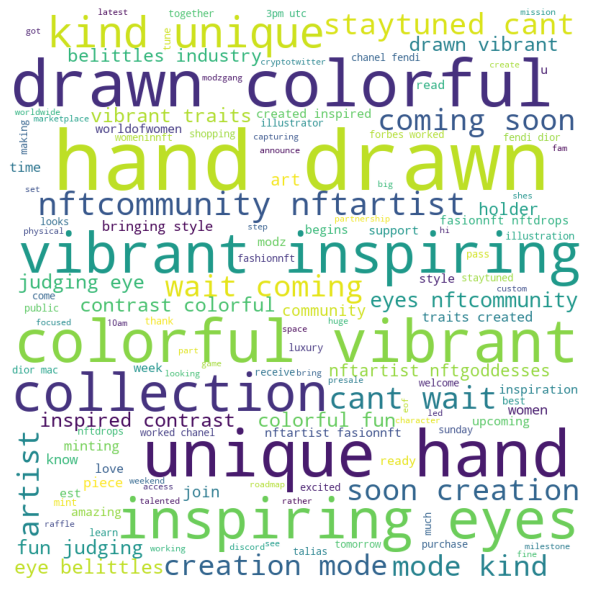

In [34]:
comment_words = ''

# iterate through list
for tweet_text in results:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "

# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [35]:
try1 = results
vectorizer = CountVectorizer()
try1_vecs = vectorizer.fit_transform(try1)

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names()

In [36]:
# Build LDA Model
try1_lda = LatentDirichletAllocation(n_components=4,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)              # use all available CPU
lda_output = try1_lda.fit_transform(try1_vecs)

In [37]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20
display_topics(try1_lda, feature_names, 20)

Topic 0:
art collection community artist shopping read style marketplace got eyes weeks know talented latest luxury minting vibrant bringing ones claim
Topic 1:
nftcommunity eyes drawn colorful hand kind inspiring vibrant unique staytuned 888 nftartist cant wait coming creation soon mode nftdrops nftgoddesses
Topic 2:
eye traits hand drawn 250 colorful judging inspired fun belittles industry contrast vibrant style 888 created bringing collection est begins
Topic 3:
eyes collection know together purchase love inspiration looks women 2022 beauties well honored continual week boss colourful summer artworks display


In [57]:
general_tweets_df = pd.read_csv('general_tweets.csv')
general = general_tweets_df['Text'].tolist()
results = [clean_tweet(tx) for tx in general]
#results

C:\Users\Parveen\AppData\Local\Temp/ipykernel_118536/4232908300.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


In [58]:
compiler_tweets_df = pd.read_csv('compiler_tweets.csv')
compiler = compiler_tweets_df['Text']

In [60]:
compiler.head()

0    Fashion fam, which artworks would you display ...
1    @blackgold11_nft @TaliaZoref Hi! Big hugs and ...
2    @bcnftgallery @fashionary_nft @WEAV3io @Joysti...
3    @hannahrose_nft @fame_ladies @cryptostacys Hi ...
4    We are working our way through all of our road...
Name: Text, dtype: object

In [61]:
from textblob import TextBlob

In [67]:
sentence = '''The platform provides universal access to the world's best education, partnering with top universities and organizations to offer courses online.'''

# Creating a textblob object and assigning the sentiment property
analysis = TextBlob(sentence).sentiment
print(analysis)

Sentiment(polarity=0.5, subjectivity=0.26666666666666666)


# Try Topic

In [ ]:
general_tweets_df = pd.read_csv('general_tweets.csv')
general = general_tweets_df['Text'].tolist()
results = [clean_tweet(tx) for tx in general]

In [79]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
porter_stemmer = PorterStemmer()

general_words = []
for tweet_text in results:
    tokens = tokenizer.tokenize(tweet_text)
    general_words.append(tokens)

print(len(general_words))

general_stemmed = []
for tokenized in general_words:
    temp = []
    for w in tokenized:
        temp.append(porter_stemmer.stem(w))
    
    general_stemmed.append(temp)
    
print(len(general_stemmed))

25002
25002


In [80]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
#import pyLDAvis.gensim_models as gensimvis

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [82]:
general_bigram = gensim.models.Phrases(general_words, min_count=5, threshold=100) # higher threshold fewer phrases.
general_trigram = gensim.models.Phrases(general_bigram[general_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
general_bigram_mod = gensim.models.phrases.Phraser(general_bigram)
general_trigram_mod = gensim.models.phrases.Phraser(general_trigram)

# See trigram example
print(general_trigram_mod[general_bigram_mod[general_words[0]]])

['virtual', 'spaces', 'expanding_beyond', 'games', 'roblox', 'even', 'identify', 'gaming', 'platform', 'upcoming', 'week', 'many', 'brands', 'selling', 'physical', 'versions', 'designs', 'gucci', 'adidas', 'ar']


In [83]:
def make_bigrams3(texts):
    return [general_bigram_mod[doc] for doc in texts]

def make_trigrams3(texts):
    return [general_trigram_mod[general_bigram_mod[doc]] for doc in texts]

def lemmatization3(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [85]:
# Form Bigrams
general_bigrams = make_bigrams3(general_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
general_lemmatized = lemmatization3(general_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(general_lemmatized[:1])

[['virtual', 'space', 'game', 'roblox', 'even', 'identify', 'gaming', 'platform', 'upcoming', 'week', 'many', 'brand', 'sell', 'physical', 'version', 'design', 'gucci']]


In [87]:
# Create Dictionary
general_id2word = corpora.Dictionary(general_lemmatized)

# Create Corpus
general_texts = general_lemmatized

# Term Document Frequency
general_corpus = [general_id2word.doc2bow(text) for text in general_texts]

# View
print(general_corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]]


In [88]:
[[(general_id2word[id], freq) for id, freq in cp] for cp in general_corpus[:1]]

[[('brand', 1),
  ('design', 1),
  ('even', 1),
  ('game', 1),
  ('gaming', 1),
  ('gucci', 1),
  ('identify', 1),
  ('many', 1),
  ('physical', 1),
  ('platform', 1),
  ('roblox', 1),
  ('sell', 1),
  ('space', 1),
  ('upcoming', 1),
  ('version', 1),
  ('virtual', 1),
  ('week', 1)]]

In [89]:
general_topics = []
general_perplexity_score = []
general_coherence_score = []
general_vis = []

for i in range(3,9):
    general_lda_model = gensim.models.ldamodel.LdaModel(corpus=general_corpus,
                                           id2word=general_id2word,
                                           num_topics=i, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    general_topics.append(general_lda_model.print_topics())
    
    general_perplexity_score.append(general_lda_model.log_perplexity(general_corpus))
    print('\nPerplexity: ',general_perplexity_score[i-3])  # a measure of how good the model is. lower the better.
    
    coherence_model_lda = CoherenceModel(model=general_lda_model, texts=general_lemmatized, dictionary=general_id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    general_coherence_score.append(coherence_lda)
    print('\nCoherence Score: ', coherence_lda)
    
    pyLDAvis.enable_notebook()
    vis_i = pyLDAvis.gensim_models.prepare(general_lda_model, general_corpus, general_id2word)
    general_vis.append(vis_i)


Perplexity:  -8.433221265368521

Coherence Score:  0.22018290025530388


C:\Users\Parveen\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(



Perplexity:  -8.532026542524283

Coherence Score:  0.21371920525724128

Perplexity:  -8.624164891312176

Coherence Score:  0.29152470455670915

Perplexity:  -8.712460276628612

Coherence Score:  0.2733799081425291

Perplexity:  -8.810433547267534

Coherence Score:  0.3163637979219006

Perplexity:  -8.943860381306084

Coherence Score:  0.3355131150817954


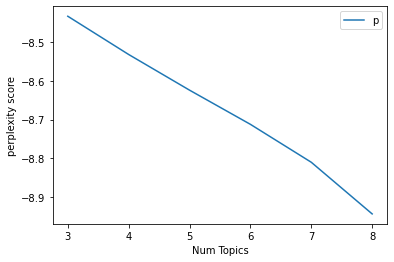

In [105]:
import matplotlib.pyplot as plt

limit=3+len(general_perplexity_score); start=3;
x = range(start, limit)
plt.plot(x, general_perplexity_score)
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

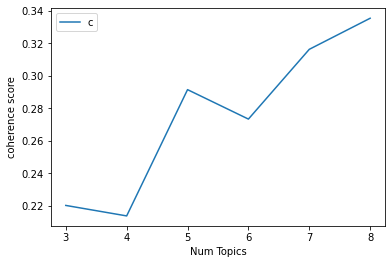

In [106]:
import matplotlib.pyplot as plt

limit=3+len(general_coherence_score); start=3;
x = range(start, limit)
plt.plot(x, general_coherence_score)
plt.xlabel("Num Topics")
plt.ylabel("coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [110]:
general_vis[4]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.410498  0.017012       1        1  27.216624
0     -0.085258  0.398441       2        1  25.717598
3     -0.068753 -0.092601       3        1  17.249391
2     -0.067683 -0.064838       4        1   9.629225
4     -0.050406 -0.081665       5        1   8.307682
6     -0.065142 -0.098987       6        1   7.942887
1     -0.073255 -0.077362       7        1   3.936594, topic_info=               Term         Freq        Total Category  logprob  loglift
327             art  3921.000000  3921.000000  Default  30.0000  30.0000
130          future  2156.000000  2156.000000  Default  29.0000  29.0000
0             brand  2684.000000  2684.000000  Default  28.0000  28.0000
143          luxury  1812.000000  1812.000000  Default  27.0000  27.0000
371    nftcollector  1739.000000  1739.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
138            vibe    65.723523    66.526106   Topic7  -5.0009   3.2227
895         massive    63.300029    64.103147   Topic7  -5.0384   3.2222
125       cant_wait    61.558728    62.363984   Topic7  -5.0663   3.2219
644           guess    55.655340    56.459389   Topic7  -5.1671   3.2205
17122   bll_passive    62.952571    86.367931   Topic7  -5.0439   2.9186

[249 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
743       7  0.989782     00_pm
394       4  0.997712   already
958       5  0.997959    always
892       7  0.995567     anime
27        5  0.995562  announce
...     ...       ...       ...
75        4  0.997948      web3
16        5  0.999396      week
317       2  0.997095      well
159       2  0.999295      work
313       3  0.999625     world

[251 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 4, 3, 5, 7, 2])

In [92]:
general_topics[0]

[(0,
  '0.040*"art" + 0.016*"work" + 0.015*"get" + 0.013*"artist" + 0.012*"look" + 0.012*"space" + 0.012*"see" + 0.011*"come" + 0.011*"make" + 0.010*"design"'),
 (1,
  '0.028*"collection" + 0.025*"future" + 0.021*"nftcommunity" + 0.019*"luxury" + 0.017*"nftcollector" + 0.013*"nftart" + 0.012*"check" + 0.012*"go" + 0.012*"game" + 0.010*"drop"'),
 (2,
  '0.036*"brand" + 0.024*"designer" + 0.019*"blockchain" + 0.018*"marketplace" + 0.017*"digitalfashion" + 0.016*"virtual" + 0.014*"launch" + 0.013*"experience" + 0.013*"sell" + 0.012*"music"')]